<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 2: MARKET BASKET ANALYSIS </h1> </center> <br>
<center> <h2> Group G </h2> </center> <br>
<center> <h3> 2022/2023 </h3> </center> <br>

**Table of Contents** <br>
* [Setup](#setup)
    * [Import Libraries and Definitions](#importlibraries)
    * [Import Data](#importdata)
* [4. Modeling](#modeling) 
    * [4.1. General](#general)
        * [4.1.1. Using the Product Variable](#product)
        * [4.1.2. Using the ProductWithQuantity Variable](#productqt)
        * [4.1.3. Using the ProductCategoryI Variable](#productcat1)
        * [4.1.4. Using the ProductCategoryII Variable](#productcat2)
    * [4.2. Considering only the Indian Dishes](#ind)
        * [4.2.1. Using the Product Variable](#product_ind)
        * [4.2.2. Using the ProductWithQuantity Variable](#productqt_ind)
    * [4.3. Considering if the Sale is Dine-inn or a Delivery](#dineinn_delivery)
        * [4.3.1 Dine-inn](#dine-inn)
            * [4.3.1.1. Using the Product Variable](#product_dineinn)
            * [4.3.1.2. Using the ProductCategoryII Variable](#productcat_dineinn)
        * [4.3.2. Delivery](#delivery)
            * [4.3.2.1. Using the Product Variable](#product_delivery)
            * [4.3.2.2. Using the ProductCategoryII Variable](#productcat_delivery)
    * [4.4. Considering the Seasons](#seasons)
        * [4.4.1 Spring](#spring)
            * [4.4.1.1. Using the Product Variable](#product_spring)
            * [4.4.1.2. Using the ProductCategoryII Variable](#productcat_spring)
        * [4.4.1 Summer](#summer)
            * [4.4.1.1. Using the Product Variable](#product_summer)
            * [4.4.1.2. Using the ProductCategoryII Variable](#productcat_summer)
        * [4.4.1 Fall](#fall)
            * [4.4.1.1. Using the Product Variable](#product_fall)
            * [4.4.1.2. Using the ProductCategoryII Variable](#productcat_fall)
        * [4.4.1 Winter](#winter)
            * [4.4.1.1. Using the Product Variable](#product_winter)
            * [4.4.1.2. Using the ProductCategoryII Variable](#productcat_winter)
    * [4.5. Considering Weekends](#weekends)
        * [4.5.1. Using the Product Variable](#product_weekend)
        * [4.5.2. Using the ProductCategoryII Variable](#productcat_weekend)
            

<hr>
<a class="anchor" id="setup">
    
# Setup
    
</a>

<a class="anchor" id="importlibraries">

## Import Libraries and Initial Definitions

</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

<a class="anchor" id="importlibraries">

## Import Data

</a>

In [3]:
ds_imp=pd.read_csv('data_new.csv').drop(columns='Unnamed: 0')
ds_imp.head()

DocNumber  Qty  TotalAmount      InvoiceDateHour  IsDelivery  Pax  \
0  TKD0320000012018  1.0         27.1  2018-01-01 19:12:12           1  NaN   
1  TKD0320000012018  8.0         17.6  2018-01-01 19:12:12           1  NaN   
2  TKD0320000012018  2.0         20.2  2018-01-01 19:12:12           1  NaN   
3  TKD0320000012018  1.0         10.1  2018-01-01 19:12:12           1  NaN   
4  TKD0320000012018  2.0          8.8  2018-01-01 19:12:12           1  NaN   

   CustomerID CustomerCity CustomerSince  IsHoliday  ... CustomerSinceMonths  \
0     53908.0     LEYKOSIA           NaN          1  ...                 NaN   
1     53908.0     LEYKOSIA           NaN          1  ...                 NaN   
2     53908.0     LEYKOSIA           NaN          1  ...                 NaN   
3     53908.0     LEYKOSIA           NaN          1  ...                 NaN   
4     53908.0     LEYKOSIA           NaN          1  ...                 NaN   

   CustomerSinceYear  CustomerSinceMonth  CustomerSinceDay  InvoiceMonth  \
0                NaN                 NaN               NaN       January   
1                NaN                 NaN               NaN       January   
2                NaN                 NaN               NaN       January   
3                NaN                 NaN               NaN       January   
4                NaN                 NaN               NaN       January   

  InvoiceDay InvoiceHour DayWeek PaxBin   TempBin  
0          1          19  Monday    NaN  (10, 20]  
1          1          19  Monday    NaN  (10, 20]  
2          1          19  Monday    NaN  (10, 20]  
3          1          19  Monday    NaN  (10, 20]  
4          1          19  Monday    NaN  (10, 20]  

[5 rows x 29 columns]

<hr>
<a class="anchor" id="modeling">
    
# 4. Modeling
    
    
</a>

FP-Growth and ECLAT tend to be more efficient and faster but considering we are able to use apriori without problems we only 
used the apriori.

<a class="anchor" id="general">
    
## 4.1. General
    
    
</a>

<a class="anchor" id="product">
    
    
## 4.1.1. Using the Product Variable
    
    
</a>

In [117]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_imp[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if len(x)>0 
                    else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BABY CORN  \
DocNumber                                                                     
TK0110000012018            False         False         False          False   
TK0110000022018            False         False         False          False   
TK0110000032018            False         False         False          False   
TK0110000042018            False         False         False          False   
TK0110000052018            False         False         False          False   

Product           NO BEANSPROUTS   NO CHILLY   NO EGG   NO MEAT  \
DocNumber                                                         
TK0110000012018            False       False    False     False   
TK0110000022018            False       False    False      True   
TK0110000032018            False       False    False     False   
TK0110000042018            False       False    False     False   
TK0110000052018            False       False    False     False   

Product           NO MUSHROOMS   NO ONION  ...  VEG BBS  VEG RICE  \
DocNumber                                  ...                      
TK0110000012018          False      False  ...    False     False   
TK0110000022018          False      False  ...    False     False   
TK0110000032018          False      False  ...    False     False   
TK0110000042018          False      False  ...    False     False   
TK0110000052018          False      False  ...    False     False   

Product          VELOUDO RED  VEUVE CLICQUOT  VLASSIDES SHIRAZ  VOLCANO MAKI  \
DocNumber                                                                      
TK0110000012018        False           False             False         False   
TK0110000022018        False           False             False         False   
TK0110000032018        False           False             False         False   
TK0110000042018        False           False             False         False   
TK0110000052018        False           False             False         False   

Product          WHISKY  YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                             
TK0110000012018   False             False         False        False  
TK0110000022018   False             False         False        False  
TK0110000032018   False             False         False        False  
TK0110000042018   False             False         False        False  
TK0110000052018   False             False         False        False  

[5 rows x 231 columns]

In [118]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
# Decided this because 
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [119]:
# Generate the association rules - by confidence 
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents            consequents  \
0                                          ( NO MEAT)    (NOODLES WITH MEAT)   
4                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
5                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
6                     ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
7                             (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
1                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
3                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
2                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
19       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
16    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
29  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
18            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
9                     (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
15              (DUCK, BEEF BBS, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
26  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
28  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, MINERA...       (EGG FRIED RICE)   
21       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
12                     (SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
20                      (SPRING ROLL, DUCK, BEEF BBS)  (MINERAL WATER 1.5LT)   
11                    (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
27  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
24    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
23  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...                 (DUCK)   
17                      (SPRING ROLL, DUCK, BEEF BBS)       (EGG FRIED RICE)   
25            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
14          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
10                            (SPRING ROLL, BEEF BBS)                 (DUCK)   
22            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)  (MINERAL WATER 1.5LT)   
13                          (DUCK, NOODLES WITH MEAT)  (MINERAL WATER 1.5LT)   
8                    (SPRING ROLL, NOODLES WITH MEAT)             ( NO MEAT)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.097689            0.159534  0.097689    1.000000  6.268251   
4             0.060401            0.159534  0.060401    1.000000  6.268251   
5             0.056789            0.159534  0.056789    1.000000  6.268251   
6             0.066269            0.159534  0.066269    1.000000  6.268251   
7             0.064012            0.159534  0.064012    1.000000  6.268251   
1             0.129650            0.514807  0.120982    0.933148  1.812617   
3             0.058776            0.514807  0.053720    0.913978  1.775382   
2             0.098140            0.514807  0.084778    0.863845  1.677999   
19            0.075749            0.428404  0.059317    0.783075  1.827890   
16            0.083965            0.428404  0.064012    0.762366  1.779549   
29            0.069700            0.428404  0.052456    0.752591  1.756732   
18            0.077645            0.428404  0.058324    0.751163  1.753399   
9             0.115836            0.428404  0.086132    0.743570  1.735675   
15            0.086132            0.402853  0.064012    0.743187  1.844808   
26            0.096515            0.428404  0.071506    0.740879  1.729395   
28            0.071506            0.402853  0.052456    0.733586  1.820976   
21            0.075749            0.402853  0.055074    0.727056  1.804767   
12            0.094890            0.402853  0.068978    0.726927  1.804447   
20            0.081708            0.514807  0.059317    0.725967  1.410173   
1

We can see by the first row that every time no meat was asked for, noodles with meat were also present in the transaction (confidence of 1). They appear together 9.8% of the times (as indicated by the support). It also has a lift of around 6, 
indicating that the probability of observing both "no meat" and "noodles with meat" together in a transaction is six times 
higher than if the two items were independent of each other. The leverage of 0.082 indicates that the probability of observing both "no meat" and "noodles with meat" together in a transaction is 0.082 higher than if the two items were independent of each other. We also have a conviction of inf., as expected since we have confidence of 1.

In [121]:
# Generate the association rules - by lift 
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
51                  (SPRING ROLL, NOODLES WITH MEAT)   
54                                        ( NO MEAT)   
48                                        ( NO MEAT)   
47          (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
40                                        ( NO MEAT)   
39                         (DUCK, NOODLES WITH MEAT)   
44                                        ( NO MEAT)   
43               (NOODLES WITH MEAT, EGG FRIED RICE)   
1                                (NOODLES WITH MEAT)   
50                           (SPRING ROLL,  NO MEAT)   
49                               (NOODLES WITH MEAT)   
38                                  ( NO MEAT, DUCK)   
55                               (NOODLES WITH MEAT)   
46                   ( NO MEAT, MINERAL WATER 1.5LT)   
45                               (NOODLES WITH MEAT)   
41                               (NOODLES WITH MEAT)   
0                                         ( NO MEAT)   
42                        ( NO MEAT, EGG FRIED RICE)   
18                              (CHICK TIKKA MASALA)   
19                                      (JIRA PULAO)   
30                                            (NAAN)   
31                                      (JIRA PULAO)   
20                              (CHICK TIKKA MASALA)   
21                                            (NAAN)   
314              (SPRING ROLL, DUCK, EGG FRIED RICE)   
325        (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
226                  (MINERAL WATER 1.5LT, BEEF BBS)   
225                              (SPRING ROLL, DUCK)   
328                    (SPRING ROLL, EGG FRIED RICE)   
311  (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)   
238                  (MINERAL WATER 1.5LT, BEEF BBS)   
237                    (SPRING ROLL, EGG FRIED RICE)   
223               (SPRING ROLL, MINERAL WATER 1.5LT)   
228                                 (DUCK, BEEF BBS)   
329            (MINERAL WATER 1.5LT, EGG FRIED RICE)   
310          (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
227                      (MINERAL WATER 1.5LT, DUCK)   
224                          (SPRING ROLL, BEEF BBS)   
236                          (SPRING ROLL, BEEF BBS)   
239            (MINERAL WATER 1.5LT, EGG FRIED RICE)   
198                                 (DUCK, BEEF BBS)   
201            (MINERAL WATER 1.5LT, EGG FRIED RICE)   
230                                       (BEEF BBS)   
221         (SPRING ROLL, MINERAL WATER 1.5LT, DUCK)   

                                         consequents  antecedent support  \
51                                        ( NO MEAT)            0.090827   
54                  (SPRING ROLL, NOODLES WITH MEAT)            0.097689   
48          (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.097689   
47                                        ( NO MEAT)            0.099224   
40                         (DUCK, NOODLES WITH MEAT)            0.097689   
39                                        ( NO MEAT)            0.091188   
44               (NOODLES WITH MEAT, EGG FRIED RICE)            0.097689   
43                                        ( NO MEAT)            0.089202   
1                                         ( NO MEAT)            0.159534   
50                               (NOODLES WITH MEAT)            0.064012   
49                   ( NO MEAT, MINERAL WATER 1.5LT)            0.159534   
38                               (NOODLES WITH MEAT)            0.060401   
55                           (SPRING ROLL,  NO MEAT)            0.159534   
46                               (NOODLES WITH MEAT)            0.066269   
45                        ( NO MEAT, EGG FRIED RICE)            0.159534   
41                                  ( NO MEAT, DUCK)            0.159534   
0                                (NOODLES WITH MEAT)            0.097689   
42                               (NOODLES WITH MEAT)            0.056789   
18                                      (JIRA PULAO)            0.085681   


In [122]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [123]:
# Length>=2 and Support>=0.15
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.15)]

support                                   itemsets  length
47  0.247472                     (DUCK, EGG FRIED RICE)       2
49  0.223276                (MINERAL WATER 1.5LT, DUCK)       2
52  0.217949                        (SPRING ROLL, DUCK)       2
54  0.193301                 (DUCK, SWEET SOUR CHICKEN)       2
56  0.209010      (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
59  0.203142              (SPRING ROLL, EGG FRIED RICE)       2
60  0.218671       (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
69  0.190863         (SPRING ROLL, MINERAL WATER 1.5LT)       2
71  0.163868  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       2
77  0.166306          (SPRING ROLL, SWEET SOUR CHICKEN)       2

In [124]:
frequent_itemsets[frequent_itemsets['length']>=5]

support                                           itemsets  length
121  0.052456  (DUCK, SWEET SOUR CHICKEN, SPRING ROLL, MINERA...       5

In [125]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents            consequents  \
0                                          ( NO MEAT)    (NOODLES WITH MEAT)   
4                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
5                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
6                     ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
7                             (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
1                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
3                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
2                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
19       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
16    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
29  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
18            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
9                     (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
15              (DUCK, BEEF BBS, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
26  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
28  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, MINERA...       (EGG FRIED RICE)   
21       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
12                     (SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
11                    (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
27  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
24    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
23  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...                 (DUCK)   
17                      (SPRING ROLL, DUCK, BEEF BBS)       (EGG FRIED RICE)   
25            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
14          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
10                            (SPRING ROLL, BEEF BBS)                 (DUCK)   
8                    (SPRING ROLL, NOODLES WITH MEAT)             ( NO MEAT)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.097689            0.159534  0.097689    1.000000  6.268251   
4             0.060401            0.159534  0.060401    1.000000  6.268251   
5             0.056789            0.159534  0.056789    1.000000  6.268251   
6             0.066269            0.159534  0.066269    1.000000  6.268251   
7             0.064012            0.159534  0.064012    1.000000  6.268251   
1             0.129650            0.514807  0.120982    0.933148  1.812617   
3             0.058776            0.514807  0.053720    0.913978  1.775382   
2             0.098140            0.514807  0.084778    0.863845  1.677999   
19            0.075749            0.428404  0.059317    0.783075  1.827890   
16            0.083965            0.428404  0.064012    0.762366  1.779549   
29            0.069700            0.428404  0.052456    0.752591  1.756732   
18            0.077645            0.428404  0.058324    0.751163  1.753399   
9             0.115836            0.428404  0.086132    0.743570  1.735675   
15            0.086132            0.402853  0.064012    0.743187  1.844808   
26            0.096515            0.428404  0.071506    0.740879  1.729395   
28            0.071506            0.402853  0.052456    0.733586  1.820976   
21            0.075749            0.402853  0.055074    0.727056  1.804767   
12            0.094890            0.402853  0.068978    0.726927  1.804447   
11            0.115836            0.402853  0.083965    0.724864  1.799325   
27            0.096515            0.402853  0.069700    0.722170  1.792640   
24            0.110238            0.402853  0.079541    0.721540  1.791074   
23            0.120621            0.428404  0.086945    0.720808  1.682545   
17     

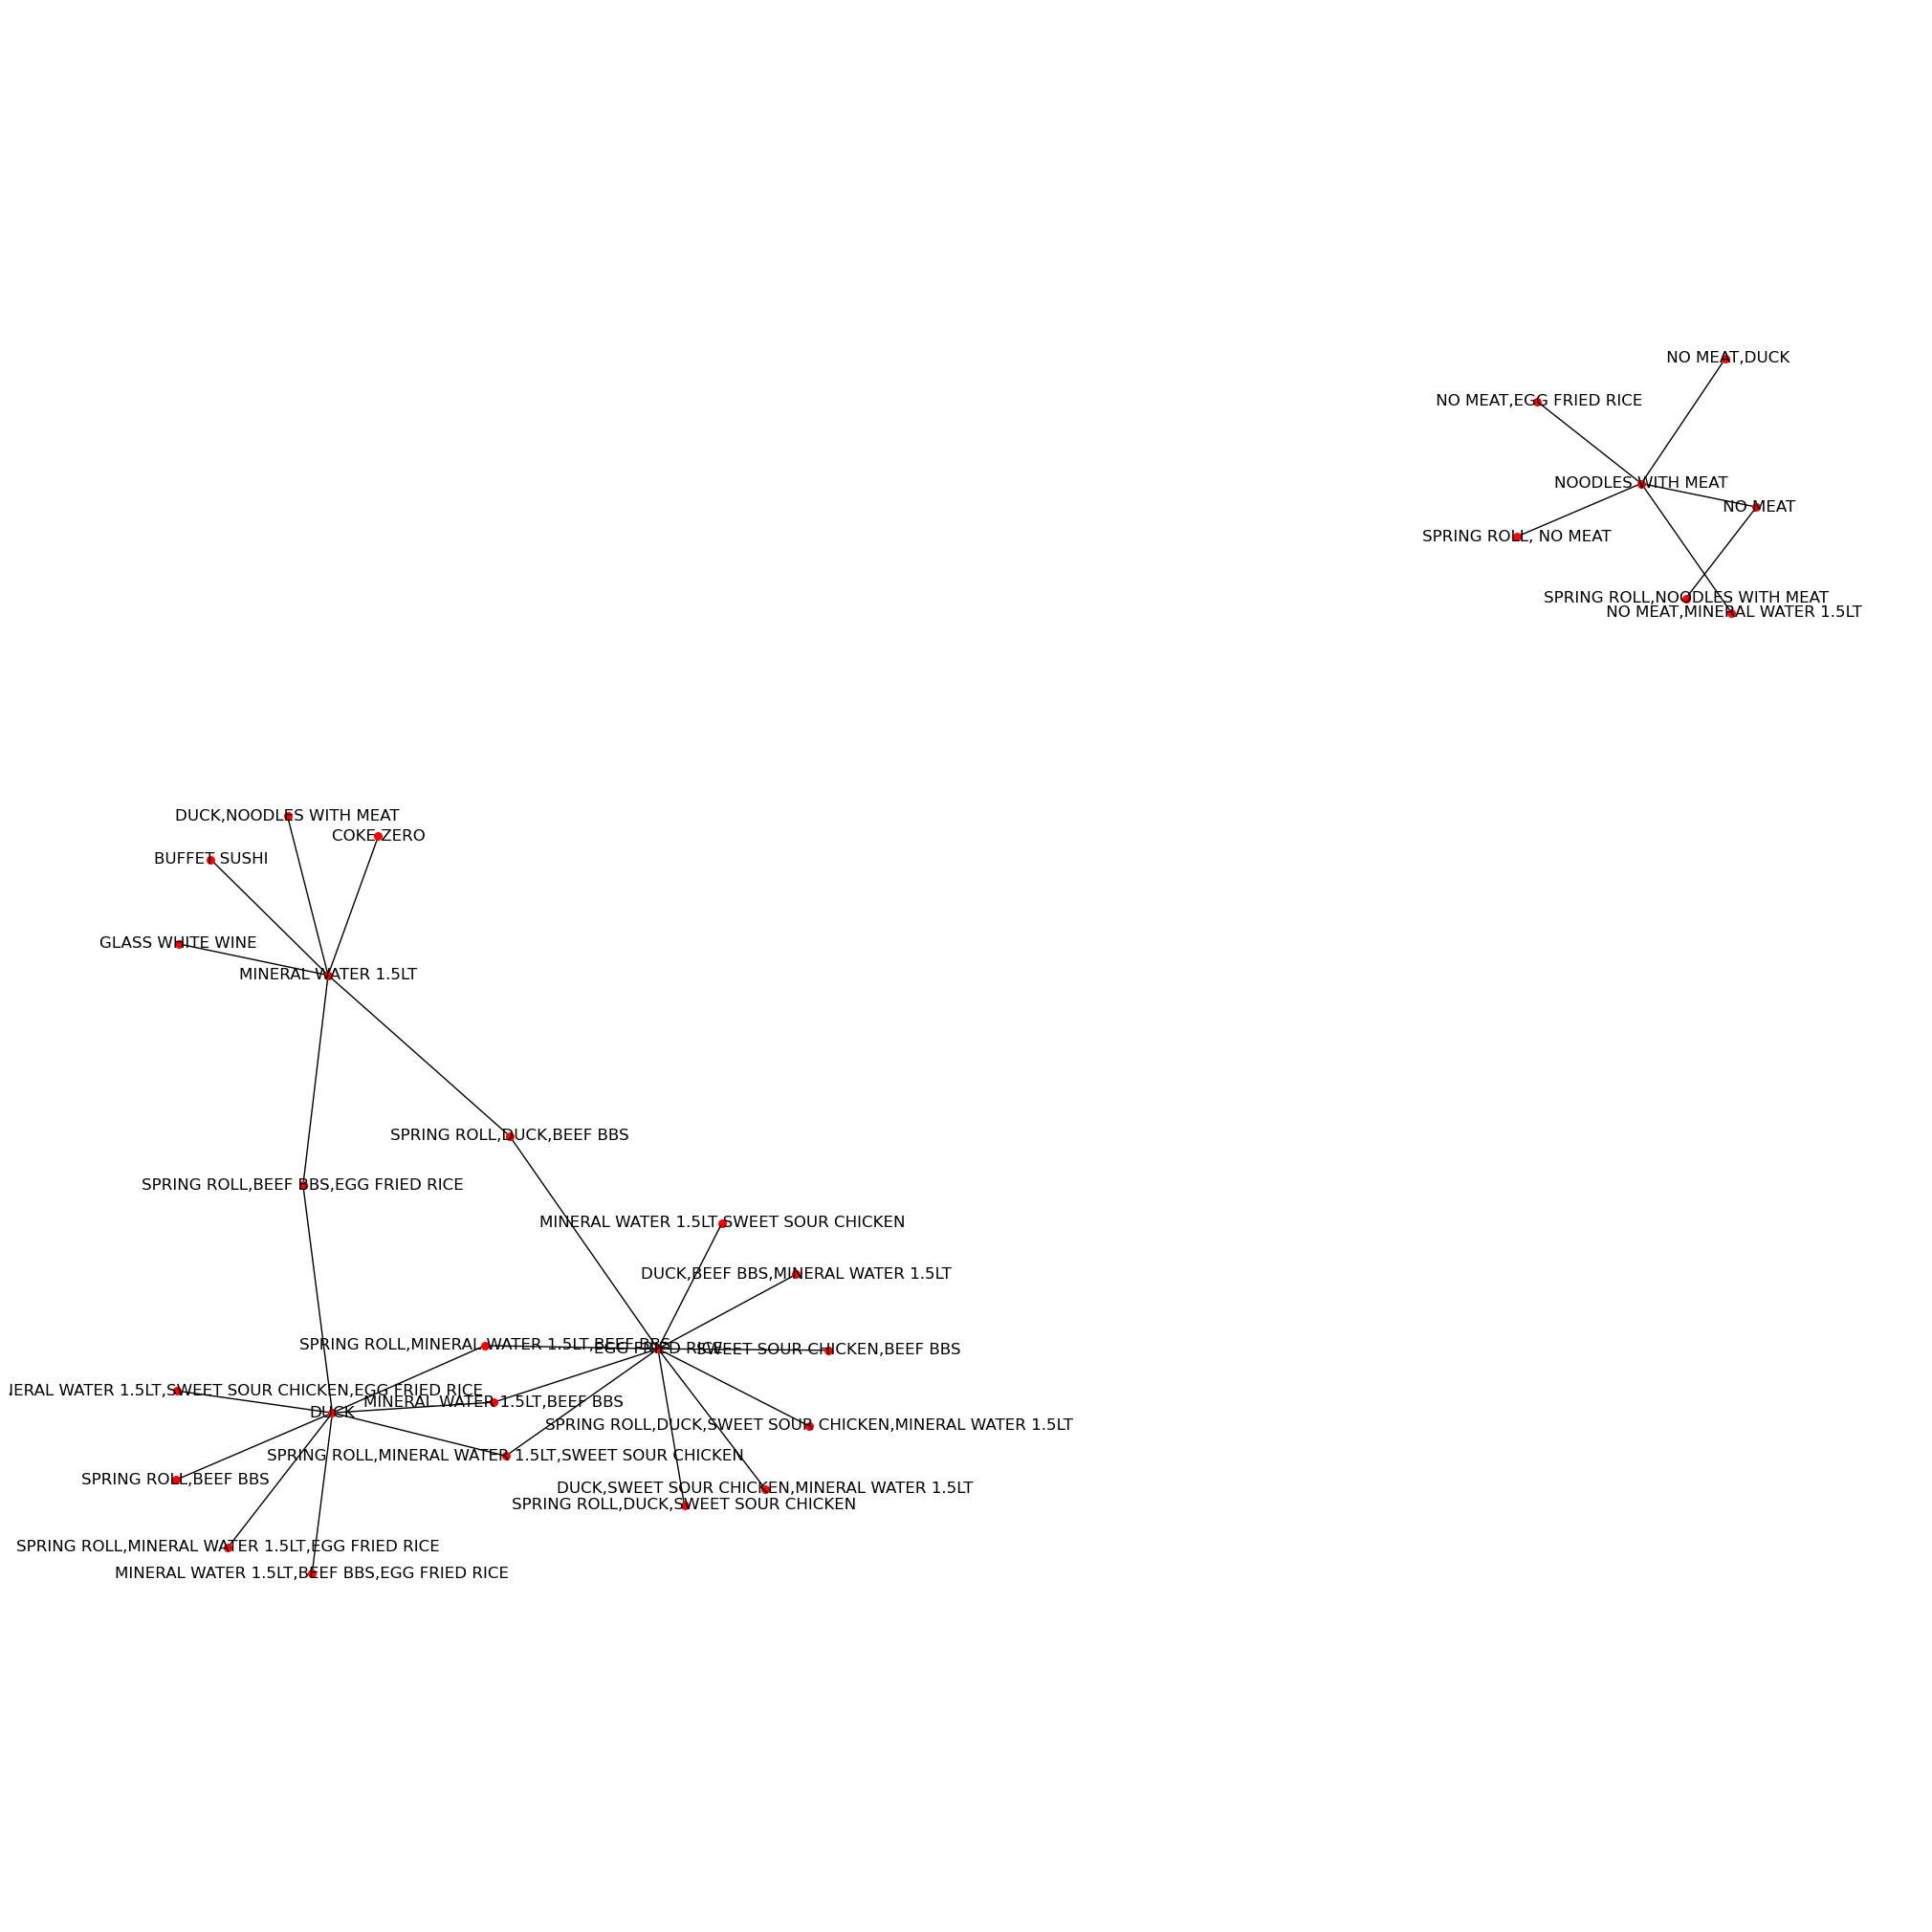

In [126]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [127]:
ds_imp['Product'].value_counts()

MINERAL WATER 1.5LT       5702
DUCK                      4775
EGG FRIED RICE            4462
SPRING ROLL               3968
SWEET SOUR CHICKEN        3573
                          ... 
BABATZIM ERODIOS ROSE        1
VEUVE CLICQUOT               1
CLASSIC ROLLS CUCUMBER       1
KTIMA MALLIA RED             1
SELCTION FOR  TWO            1
Name: Product, Length: 231, dtype: int64

In [128]:
ds_imp[ds_imp['Product']==' NO MEAT'].shape[0]

1082

In [129]:
ds_imp[ds_imp['Product']=='NOODLES WITH MEAT'].shape[0]

1767

Considering the rules we got for confidence equal or higher than 0.7 and with a lift equal or higher than 1.5:
- We have an interesting pattern when it comes to no meat and noodles with meat. It seems that all the tables that asked for no
meat also ordered noodles with meat (rule 0). 61% of the times noodles with meat was ordered, no meat was also asked for. From this, we argue that a new product should be created of only noodles (not spicy - since they already have one - and without meat). 
- One possible menu would be: spring roll and duck as starters + beef bbs or sweet sour chicken as main with egg fried rice as side + mineral water. The rules found indicate that it would work well (for instance, rows with index 21, 23, 26 and 28). The frequent itemsets and the graph also indicate these combinations.
- There are a lot of rules containing water, duck, egg fried rice and spring roll since they are the 4 products people most ask for.

In [130]:
# Low Confidence and low Lift
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rulesConfidence[(rulesConfidence['confidence'] <= 1) & (rulesConfidence['lift'] <= 1)]

antecedents            consequents  antecedent support  \
74                 (NAAN)  (MINERAL WATER 1.5LT)            0.119267   
75  (MINERAL WATER 1.5LT)                 (NAAN)            0.514807   
84  (MINERAL WATER 1.5LT)   (SWEET SOUR CHICKEN)            0.514807   
85   (SWEET SOUR CHICKEN)  (MINERAL WATER 1.5LT)            0.322589   

    consequent support   support  confidence      lift  leverage  conviction  
74            0.514807  0.059949    0.502650  0.976385 -0.001450    0.975556  
75            0.119267  0.059949    0.116450  0.976385 -0.001450    0.996812  
84            0.322589  0.163868    0.318309  0.986732 -0.002203    0.993721  
85            0.514807  0.163868    0.507976  0.986732 -0.002203    0.986118

This seems to indicate there are no strong relationships of substitution between products. This might be happening since in a table we have people with distinct tastes and they order different products that could be considered substitutes (like different main dishes) but that appear under the same order.

<a class="anchor" id="productqt">
    
## 4.1.2. Using the ProductWithQuantity Variable
    
    
</a>

In [131]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_imp[['DocNumber', 'ProductWithQuantity']], index='DocNumber', columns='ProductWithQuantity', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductWithQuantity  1.0  EXTRA PANCAKES  1.0  EXTRA SALAD  1.0  EXTRA SAUCE  \
DocNumber                                                                      
TK0110000012018                    False             False             False   
TK0110000022018                    False             False             False   
TK0110000032018                    False             False             False   
TK0110000042018                    False             False             False   
TK0110000052018                    False             False             False   

ProductWithQuantity  1.0  NO BABY CORN  1.0  NO BEANSPROUTS  1.0  NO CHILLY  \
DocNumber                                                                     
TK0110000012018                  False                False           False   
TK0110000022018                  False                False           False   
TK0110000032018                  False                False           False   
TK0110000042018                  False                False           False   
TK0110000052018                  False                False           False   

ProductWithQuantity  1.0  NO EGG  1.0  NO MEAT  1.0  NO MUSHROOMS  \
DocNumber                                                           
TK0110000012018            False         False              False   
TK0110000022018            False          True              False   
TK0110000032018            False         False              False   
TK0110000042018            False         False              False   
TK0110000052018            False         False              False   

ProductWithQuantity  1.0  NO ONION  ...  8.0 STEAMED RICE  \
DocNumber                           ...                     
TK0110000012018              False  ...             False   
TK0110000022018              False  ...             False   
TK0110000032018              False  ...             False   
TK0110000042018              False  ...             False   
TK0110000052018              False  ...             False   

ProductWithQuantity  8.0 VALENTINES BUFET  8.0 WHISKY PREMIUM 5CL  \
DocNumber                                                           
TK0110000012018                     False                   False   
TK0110000022018                     False                   False   
TK0110000032018                     False                   False   
TK0110000042018                     False                   False   
TK0110000052018                     False                   False   

ProductWithQuantity  9.0 BUFFET SUSHI  9.0 CARLSBERG 33CL  9.0 COKE ZERO  \
DocNumber                                                                  
TK0110000012018                 False               False          False   
TK0110000022018                 False               False          False   
TK0110000032018                 False               False          False   
TK0110000042018                 False               False          False   
TK0110000052018                 False               False          False   

ProductWithQuantity  9.0 KEO  9.0 MINERAL WATER 1.5LT  9.0 ORANGE JUICE  \
DocNumber                                                                 
TK0110000012018        False                    False             False   
TK0110000022018        False                    False             False   
TK0110000032018        False                    False             False   
TK0110000042018        False                    False             False   
TK0110000052018        False                    False             False   

ProductWithQuantity  9.0 SPRING ROLL  
DocNumber                             
TK0110000012018                False  
TK0110000022018                False  
TK0110000032018                False  
TK0110000042018                False  
TK0110000052018                False  

[5 rows x 784 columns]

In [132]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [133]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
1                                     (1.0  NO MEAT)   
6  (1.0 MINERAL WATER 1.5LT, 1.0 SWEET SOUR CHICKEN)   
0                            (1.0 NOODLES WITH MEAT)   
4             (1.0 SWEET SOUR CHICKEN, 1.0 1/4 DUCK)   
3                           (1.0 SWEET SOUR CHICKEN)   
7      (1.0 MINERAL WATER 1.5LT, 1.0 EGG FRIED RICE)   
2                                     (1.0 BEEF BBS)   
5                 (1.0 EGG FRIED RICE, 1.0 1/4 DUCK)   

                consequents  antecedent support  consequent support   support  \
1   (1.0 NOODLES WITH MEAT)            0.093355            0.149964  0.091369   
6      (1.0 EGG FRIED RICE)            0.109697            0.333785  0.068978   
0            (1.0  NO MEAT)            0.149964            0.093355  0.091369   
4      (1.0 EGG FRIED RICE)            0.092091            0.333785  0.052365   
3      (1.0 EGG FRIED RICE)            0.294420            0.333785  0.166396   
7  (1.0 SWEET SOUR CHICKEN)            0.132268            0.294420  0.068978   
2      (1.0 EGG FRIED RICE)            0.189148            0.333785  0.097147   
5  (1.0 SWEET SOUR CHICKEN)            0.103918            0.294420  0.052365   

   confidence      lift  leverage  conviction  
1    0.978723  6.526394  0.077369   39.951697  
6    0.628807  1.883868  0.032363    1.794793  
0    0.609272  6.526394  0.077369    2.320397  
4    0.568627  1.703575  0.021627    1.544408  
3    0.565164  1.693199  0.068123    1.532107  
7    0.521502  1.771283  0.030036    1.474571  
2    0.513604  1.538728  0.034012    1.369697  
5    0.503910  1.711531  0.021770    1.422280

In [134]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
0                             (1.0 NOODLES WITH MEAT)   
1                                      (1.0  NO MEAT)   
49                               (1.0 EGG FRIED RICE)   
44  (1.0 MINERAL WATER 1.5LT, 1.0 SWEET SOUR CHICKEN)   
48                           (1.0 SWEET SOUR CHICKEN)   
45      (1.0 MINERAL WATER 1.5LT, 1.0 EGG FRIED RICE)   
41                           (1.0 SWEET SOUR CHICKEN)   
40                 (1.0 EGG FRIED RICE, 1.0 1/4 DUCK)   
39             (1.0 SWEET SOUR CHICKEN, 1.0 1/4 DUCK)   
42                               (1.0 EGG FRIED RICE)   
26                           (1.0 SWEET SOUR CHICKEN)   
27                               (1.0 EGG FRIED RICE)   
2                                      (1.0 BEEF BBS)   
3                                      (1.0 1/4 DUCK)   
15                               (1.0 EGG FRIED RICE)   
14                                     (1.0 BEEF BBS)   
35                            (1.0 NOODLES WITH MEAT)   
34                           (1.0 SWEET SOUR CHICKEN)   
8                                      (1.0 1/6 DUCK)   
9                                (1.0 EGG FRIED RICE)   
18                               (1.0 EGG FRIED RICE)   
19                                (1.0 LEMON CHICKEN)   
24                               (1.0 EGG FRIED RICE)   
25                                (1.0 SESAME PRAWNS)   
17                                     (1.0 BEEF BBS)   
16                           (1.0 SWEET SOUR CHICKEN)   
38       (1.0 SWEET SOUR CHICKEN, 1.0 EGG FRIED RICE)   
43                                     (1.0 1/4 DUCK)   
6                            (1.0 SWEET SOUR CHICKEN)   
7                                      (1.0 1/4 DUCK)   
4                                (1.0 EGG FRIED RICE)   
5                                      (1.0 1/4 DUCK)   
29                                  (2.0 SPRING ROLL)   
28                               (1.0 EGG FRIED RICE)   
37                                  (2.0 SPRING ROLL)   
36                           (1.0 SWEET SOUR CHICKEN)   
13                                     (1.0 1/6 DUCK)   
12                           (1.0 SWEET SOUR CHICKEN)   
23                            (1.0 NOODLES WITH MEAT)   
22                               (1.0 EGG FRIED RICE)   
11                                     (1.0 1/6 DUCK)   
10                          (1.0 MINERAL WATER 1.5LT)   
33                                  (2.0 SPRING ROLL)   
32                          (1.0 MINERAL WATER 1.5LT)   

                                          consequents  antecedent support  \
0                                      (1.0  NO MEAT)            0.149964   
1                             (1.0 NOODLES WITH MEAT)            0.093355   
49  (1.0 MINERAL WATER 1.5LT, 1.0 SWEET SOUR CHICKEN)            0.333785   
44                               (1.0 EGG FRIED RICE)            0.109697   
48      (1.0 MINERAL WATER 1.5LT, 1.0 EGG FRIED RICE)            0.294420   
45                           (1.0 SWEET SOUR CHICKEN)            0.132268   
41                 (1.0 EGG FRIED RICE, 1.0 1/4 DUCK)            0.294420   
40                           (1.0 SWEET SOUR CHICKEN)            0.103918   
39                               (1.0 EGG FRIED RICE)            0.092091   
42             (1.0 SWEET SOUR CHICKEN, 1.0 1/4 DUCK)            0.333785   
26                               (1.0 EGG FRIED RICE)            0.294420   
27                           (1.0 SWEET SOUR CHICKEN)            0.333785   
2                                      (1.0 1/4 DUCK)            0.189148   
3                                      (1.0 BEEF BBS)            0.216956   
15                                     (1.0 BEEF BBS)            0.333785   
14                               (1.0 EGG FRIED RICE)            0.189148   
35                           (1.0 SWEET SOUR CHICKEN)            0.149964   
34                            (1.0 NOODLES WITH MEAT)            0.294420   
8            

In [135]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [136]:
# Length>=2 and Support>=0.15
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.15)]

support                                      itemsets  length
47  0.166396  (1.0 SWEET SOUR CHICKEN, 1.0 EGG FRIED RICE)       2

In [137]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.5) & (rulesConfidence['lift'] >= 1)]

antecedents  \
1                                     (1.0  NO MEAT)   
6  (1.0 MINERAL WATER 1.5LT, 1.0 SWEET SOUR CHICKEN)   
0                            (1.0 NOODLES WITH MEAT)   
4             (1.0 SWEET SOUR CHICKEN, 1.0 1/4 DUCK)   
3                           (1.0 SWEET SOUR CHICKEN)   
7      (1.0 MINERAL WATER 1.5LT, 1.0 EGG FRIED RICE)   
2                                     (1.0 BEEF BBS)   
5                 (1.0 EGG FRIED RICE, 1.0 1/4 DUCK)   

                consequents  antecedent support  consequent support   support  \
1   (1.0 NOODLES WITH MEAT)            0.093355            0.149964  0.091369   
6      (1.0 EGG FRIED RICE)            0.109697            0.333785  0.068978   
0            (1.0  NO MEAT)            0.149964            0.093355  0.091369   
4      (1.0 EGG FRIED RICE)            0.092091            0.333785  0.052365   
3      (1.0 EGG FRIED RICE)            0.294420            0.333785  0.166396   
7  (1.0 SWEET SOUR CHICKEN)            0.132268            0.294420  0.068978   
2      (1.0 EGG FRIED RICE)            0.189148            0.333785  0.097147   
5  (1.0 SWEET SOUR CHICKEN)            0.103918            0.294420  0.052365   

   confidence      lift  leverage  conviction  
1    0.978723  6.526394  0.077369   39.951697  
6    0.628807  1.883868  0.032363    1.794793  
0    0.609272  6.526394  0.077369    2.320397  
4    0.568627  1.703575  0.021627    1.544408  
3    0.565164  1.693199  0.068123    1.532107  
7    0.521502  1.771283  0.030036    1.474571  
2    0.513604  1.538728  0.034012    1.369697  
5    0.503910  1.711531  0.021770    1.422280

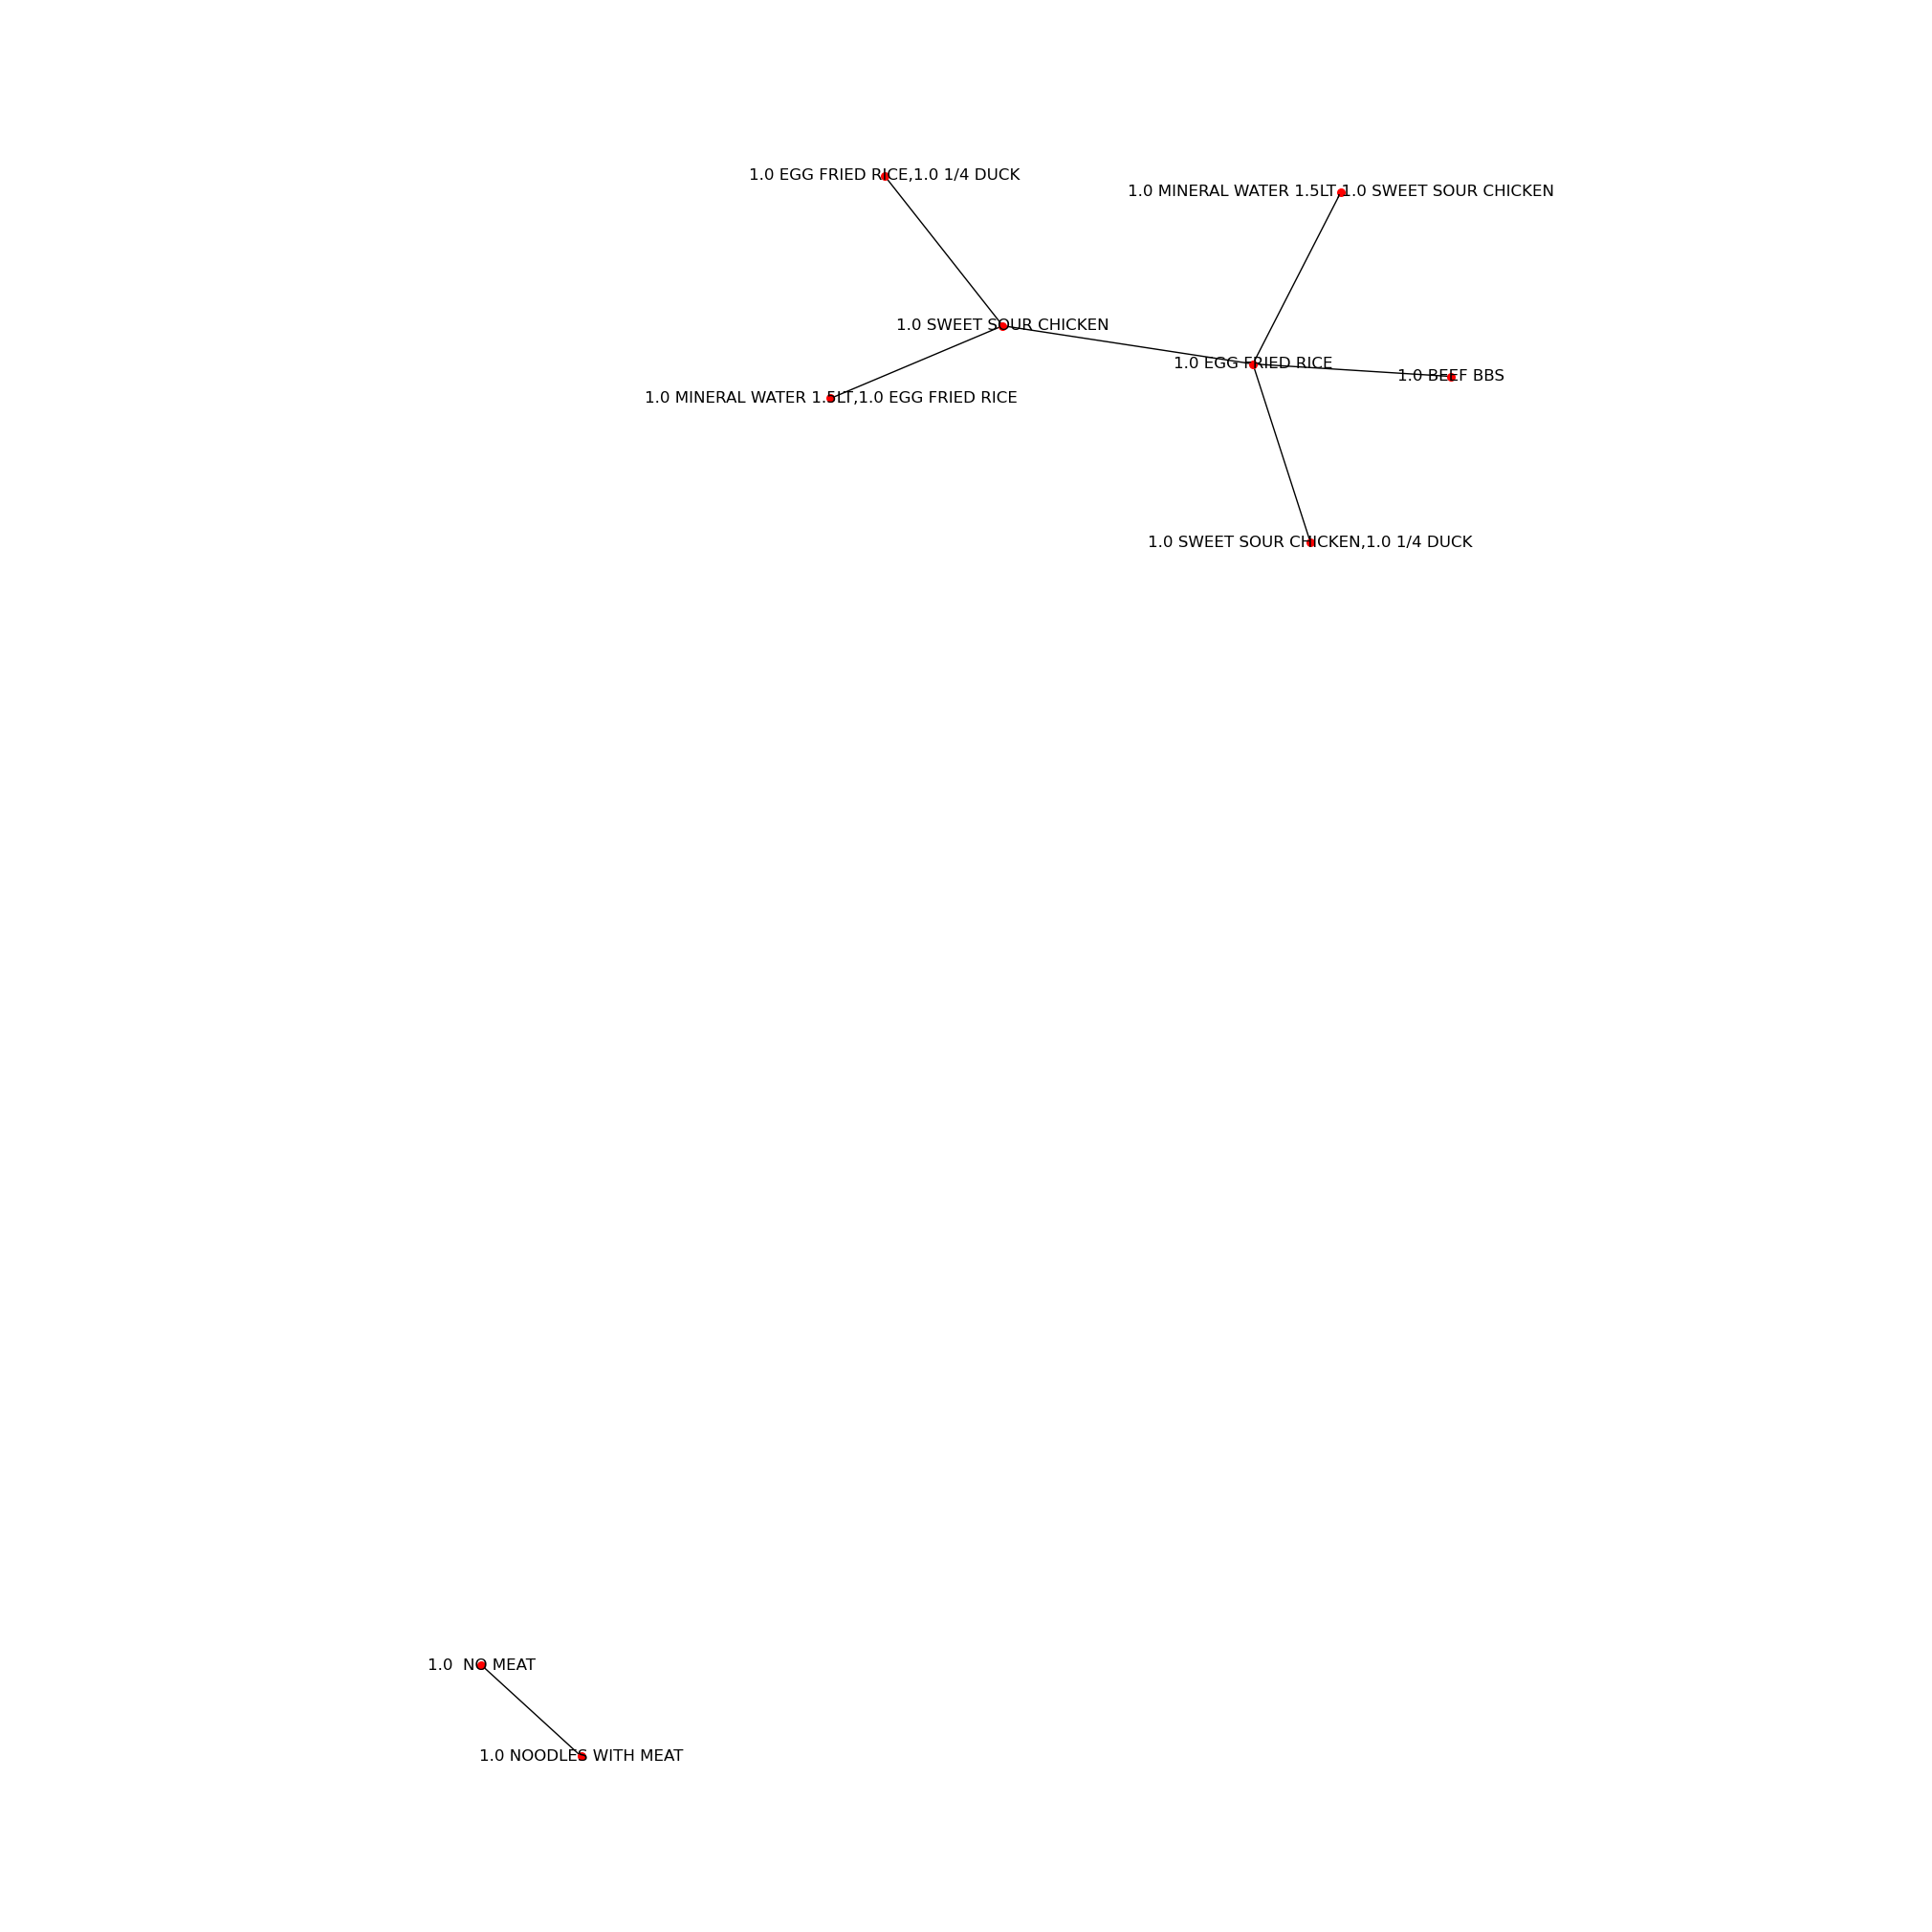

In [138]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

This variable does not provide much value besides insights regarding possible doses. It seems that 1/4 duck is enough for a sweet sour chicken (rule 5) and 1 egg fried rice for either beef bbs or sweet sour chicken (rules 2 and 3). As well as that, two spring rolls seem appropriate for a main (rule 36) and 1 mineral water 1.5LT (rules 6 and 7). Still, the restaurant could think about having water in different sizes such as 33cl or 50 cl. These tend to be more expensive per liter, generating more revenue and then these would be utilized in the menu. Therefore, the menu could be 1/4 duck and 2 spring rolls + 1 beef bbs or 1 sweet sour chicken + 1 mineral water 33cl/50cl.

<a class="anchor" id="productcat1">
    
## 4.1.3. Using the ProductCategoryI Variable
    
    
</a>

In [139]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_imp[['DocNumber', 'ProductCategoryI']], index='DocNumber', columns='ProductCategoryI', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryI  DESSERT  DRINKS  MAIN  OTHERS  SIDES  STARTERS
DocNumber                                                       
TK0110000012018     False    True  True   False   True      True
TK0110000022018     False    True  True    True   True      True
TK0110000032018     False    True  True   False   True      True
TK0110000042018      True    True  True   False   True      True
TK0110000052018     False    True  True   False   True      True

In [140]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [141]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents        consequents  antecedent support  \
40            (OTHERS, SIDES, DRINKS)             (MAIN)            0.093210   
64   (MAIN, STARTERS, OTHERS, DRINKS)            (SIDES)            0.086339   
63  (STARTERS, OTHERS, SIDES, DRINKS)             (MAIN)            0.086339   
39             (MAIN, OTHERS, DRINKS)            (SIDES)            0.093301   
14                    (SIDES, DRINKS)             (MAIN)            0.409095   
47          (STARTERS, SIDES, DRINKS)             (MAIN)            0.354127   
12                   (OTHERS, DRINKS)             (MAIN)            0.094295   
43         (STARTERS, OTHERS, DRINKS)             (MAIN)            0.087334   
52         (STARTERS, OTHERS, DRINKS)            (SIDES)            0.087334   
19                   (OTHERS, DRINKS)            (SIDES)            0.094295   
17                 (STARTERS, DRINKS)             (MAIN)            0.371576   
0                            (DRINKS)             (MAIN)            0.565229   
41                   (OTHERS, DRINKS)      (MAIN, SIDES)            0.094295   
67         (STARTERS, OTHERS, DRINKS)      (MAIN, SIDES)            0.087334   
55           (MAIN, STARTERS, OTHERS)            (SIDES)            0.152970   
24                     (MAIN, OTHERS)            (SIDES)            0.167345   
5                             (SIDES)             (MAIN)            0.788536   
32                  (STARTERS, SIDES)             (MAIN)            0.655366   
25                    (OTHERS, SIDES)             (MAIN)            0.167887   
57          (STARTERS, SIDES, OTHERS)             (MAIN)            0.154236   
36                 (STARTERS, OTHERS)            (SIDES)            0.160926   
8                            (OTHERS)            (SIDES)            0.175391   
45           (MAIN, STARTERS, DRINKS)            (SIDES)            0.366603   
3                            (OTHERS)             (MAIN)            0.175391   
21                 (STARTERS, DRINKS)            (SIDES)            0.371576   
7                          (STARTERS)             (MAIN)            0.705813   
28                 (STARTERS, OTHERS)             (MAIN)            0.160926   
30                   (MAIN, STARTERS)            (SIDES)            0.672362   
49                 (STARTERS, DRINKS)      (MAIN, SIDES)            0.371576   
10                         (STARTERS)            (SIDES)            0.705813   
26                           (OTHERS)      (MAIN, SIDES)            0.175391   
59                 (STARTERS, OTHERS)      (MAIN, SIDES)            0.160926   
53            (OTHERS, SIDES, DRINKS)         (STARTERS)            0.093210   
20                   (OTHERS, DRINKS)         (STARTERS)            0.094295   
62      (MAIN, OTHERS, SIDES, DRINKS)         (STARTERS)            0.092397   
42             (MAIN, OTHERS, DRINKS)         (STARTERS)            0.093301   
37                    (OTHERS, SIDES)         (STARTERS)            0.167887   
65            (OTHERS, SIDES, DRINKS)   (MAIN, STARTERS)            0.093210   
9                            (OTHERS)         (STARTERS)            0.175391   
66             (MAIN, OTHERS, DRINKS)  (STARTERS, SIDES)            0.093301   
56              (MAIN, OTHERS, SIDES)         (STARTERS)            0.162734   
54                   (OTHERS, DRINKS)  (STARTERS, SIDES)            0.094295   
44                   (OTHERS, DRINKS)   (MAIN, STARTERS)            0.094295   
27                     (MAIN, OTHERS)         (STARTERS)            0.167345   

    consequent support   support  confidence      lift  leverage  conviction  
40            0.960492  0.092397    0.991271  1.032045  0.002869    4.525882  
64            0.788536  0.085526    0.990576  1.256221  0.017444   22.438648  
63            0.960492  0.085526    0.990576  1.031322  0.002597    4.192257  
39            0.788536  0.092397    0.990310  1.255884  0.018826   21.823054  
14            0.960492  0.4050

In [142]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents                      consequents  \
94                    (MAIN, OTHERS)        (STARTERS, SIDES, DRINKS)   
85         (STARTERS, SIDES, DRINKS)                   (MAIN, OTHERS)   
96                  (OTHERS, DRINKS)          (MAIN, STARTERS, SIDES)   
83           (MAIN, STARTERS, SIDES)                 (OTHERS, DRINKS)   
98                (STARTERS, DRINKS)            (MAIN, OTHERS, SIDES)   
81             (MAIN, OTHERS, SIDES)               (STARTERS, DRINKS)   
93                 (STARTERS, SIDES)           (MAIN, OTHERS, DRINKS)   
86            (MAIN, OTHERS, DRINKS)                (STARTERS, SIDES)   
62                  (OTHERS, DRINKS)                (STARTERS, SIDES)   
57                 (STARTERS, SIDES)                 (OTHERS, DRINKS)   
79   (MAIN, STARTERS, SIDES, DRINKS)                         (OTHERS)   
100                         (OTHERS)  (MAIN, STARTERS, SIDES, DRINKS)   
54         (STARTERS, SIDES, DRINKS)                         (OTHERS)   
65                          (OTHERS)        (STARTERS, SIDES, DRINKS)   
88          (MAIN, STARTERS, DRINKS)                  (OTHERS, SIDES)   
91                   (OTHERS, SIDES)         (MAIN, STARTERS, DRINKS)   
41                    (MAIN, OTHERS)               (STARTERS, DRINKS)   
42                (STARTERS, DRINKS)                   (MAIN, OTHERS)   
60                   (OTHERS, SIDES)               (STARTERS, DRINKS)   
59                (STARTERS, DRINKS)                  (OTHERS, SIDES)   
87          (MAIN, STARTERS, OTHERS)                  (SIDES, DRINKS)   
92                   (SIDES, DRINKS)         (MAIN, STARTERS, OTHERS)   
95                  (MAIN, STARTERS)          (OTHERS, SIDES, DRINKS)   
84           (OTHERS, SIDES, DRINKS)                 (MAIN, STARTERS)   
40                  (MAIN, STARTERS)                 (OTHERS, DRINKS)   
43                  (OTHERS, DRINKS)                 (MAIN, STARTERS)   
71                    (MAIN, OTHERS)                (STARTERS, SIDES)   
72                 (STARTERS, SIDES)                   (MAIN, OTHERS)   
34                   (SIDES, DRINKS)                   (MAIN, OTHERS)   
33                    (MAIN, OTHERS)                  (SIDES, DRINKS)   
38          (MAIN, STARTERS, DRINKS)                         (OTHERS)   
45                          (OTHERS)         (MAIN, STARTERS, DRINKS)   
24                 (STARTERS, SIDES)                         (OTHERS)   
29                          (OTHERS)                (STARTERS, SIDES)   
11                          (OTHERS)               (STARTERS, DRINKS)   
8                 (STARTERS, DRINKS)                         (OTHERS)   
77                          (OTHERS)          (MAIN, STARTERS, SIDES)   
66           (MAIN, STARTERS, SIDES)                         (OTHERS)   
74                   (OTHERS, SIDES)                 (MAIN, STARTERS)   
69                  (MAIN, STARTERS)                  (OTHERS, SIDES)   
56           (OTHERS, SIDES, DRINKS)                       (STARTERS)   
63                        (STARTERS)          (OTHERS, SIDES, DRINKS)   
10                        (STARTERS)                 (OTHERS, DRINKS)   
9                   (OTHERS, DRINKS)                       (STARTERS)   

     antecedent support  consequent support   support  confidence      lift  \
94             0.167345            0.354127  0.085526    0.511075  1.443197   
85             0.354127            0.167345  0.085526    0.241511  1.443197   
96             0.094295            0.635386  0.085526    0.906999  1.427478   
83             0.635386            0.094295  0.085526    0.134604  1.427478   
98             0.371576            0.162734  0.085526    0.230170  1.414397   
81             0.162734            0.371576  0.085526    0.525556  1.414397   
93             0.655366            0.093301  0.085526    0.130501  1.398710   
86             0.093301            0.655366  0.085526    0.916667  1.398710   
62             0.094295     

In [143]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [144]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                         itemsets  length
5   0.556460                   (MAIN, DRINKS)       2
7   0.409095                  (SIDES, DRINKS)       2
8   0.371576               (STARTERS, DRINKS)       2
10  0.765844                    (MAIN, SIDES)       2
11  0.672362                 (MAIN, STARTERS)       2
14  0.655366                (STARTERS, SIDES)       2
16  0.405027            (MAIN, SIDES, DRINKS)       3
17  0.366603         (MAIN, STARTERS, DRINKS)       3
20  0.354127        (STARTERS, SIDES, DRINKS)       3
23  0.635386          (MAIN, STARTERS, SIDES)       3
27  0.350601  (MAIN, STARTERS, SIDES, DRINKS)       4

In [145]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.6) & (rulesConfidence['lift'] >= 1.2)]

antecedents              consequents  \
64  (MAIN, STARTERS, OTHERS, DRINKS)                  (SIDES)   
39            (MAIN, OTHERS, DRINKS)                  (SIDES)   
52        (STARTERS, OTHERS, DRINKS)                  (SIDES)   
19                  (OTHERS, DRINKS)                  (SIDES)   
41                  (OTHERS, DRINKS)            (MAIN, SIDES)   
67        (STARTERS, OTHERS, DRINKS)            (MAIN, SIDES)   
55          (MAIN, STARTERS, OTHERS)                  (SIDES)   
24                    (MAIN, OTHERS)                  (SIDES)   
36                (STARTERS, OTHERS)                  (SIDES)   
8                           (OTHERS)                  (SIDES)   
45          (MAIN, STARTERS, DRINKS)                  (SIDES)   
21                (STARTERS, DRINKS)                  (SIDES)   
49                (STARTERS, DRINKS)            (MAIN, SIDES)   
26                          (OTHERS)            (MAIN, SIDES)   
59                (STARTERS, OTHERS)            (MAIN, SIDES)   
53           (OTHERS, SIDES, DRINKS)               (STARTERS)   
20                  (OTHERS, DRINKS)               (STARTERS)   
62     (MAIN, OTHERS, SIDES, DRINKS)               (STARTERS)   
42            (MAIN, OTHERS, DRINKS)               (STARTERS)   
37                   (OTHERS, SIDES)               (STARTERS)   
65           (OTHERS, SIDES, DRINKS)         (MAIN, STARTERS)   
9                           (OTHERS)               (STARTERS)   
66            (MAIN, OTHERS, DRINKS)        (STARTERS, SIDES)   
56             (MAIN, OTHERS, SIDES)               (STARTERS)   
54                  (OTHERS, DRINKS)        (STARTERS, SIDES)   
44                  (OTHERS, DRINKS)         (MAIN, STARTERS)   
27                    (MAIN, OTHERS)               (STARTERS)   
68                  (OTHERS, DRINKS)  (MAIN, STARTERS, SIDES)   
58                    (MAIN, OTHERS)        (STARTERS, SIDES)   
60                   (OTHERS, SIDES)         (MAIN, STARTERS)   
38                          (OTHERS)        (STARTERS, SIDES)   
29                          (OTHERS)         (MAIN, STARTERS)   
22                   (SIDES, DRINKS)               (STARTERS)   
46             (MAIN, SIDES, DRINKS)               (STARTERS)   
50                   (SIDES, DRINKS)         (MAIN, STARTERS)   
61                          (OTHERS)  (MAIN, STARTERS, SIDES)   

    antecedent support  consequent support   support  confidence      lift  \
64            0.086339            0.788536  0.085526    0.990576  1.256221   
39            0.093301            0.788536  0.092397    0.990310  1.255884   
52            0.087334            0.788536  0.086339    0.988613  1.253732   
19            0.094295            0.788536  0.093210    0.988495  1.253582   
41            0.094295            0.765844  0.092397    0.979866  1.279459   
67            0.087334            0.765844  0.085526    0.979296  1.278715   
55            0.152970            0.788536  0.149173    0.975177  1.236693   
24            0.167345            0.788536  0.162734    0.972447  1.233231   
36            0.160926            0.788536  0.154236    0.958427  1.215451   
8             0.175391            0.788536  0.167887    0.957216  1.213916   
45            0.366603            0.788536  0.350601    0.956350  1.212817   
21            0.371576            0.788536  0.354127    0.953041  1.208621   
49            0.371576            0.765844  0.350601    0.943552  1.232043   
26            0.175391            0.765844  0.162734    0.927835  1.211520   
59            0.160926            0.765844  0.149173    0.926966  1.210385   
53            0.093210            0.705813  0.086339    0.926285  1.312366   
20            0.094295            0.705813  0.087334    0.926174  1.312209   
62            0.092397            0.705813  0.085526    0.925636  1.311446   
42            0.093301            0.705813  0.086339    0.925388  1.311094   
37            0.167887            0.705813  0.154236    0.9

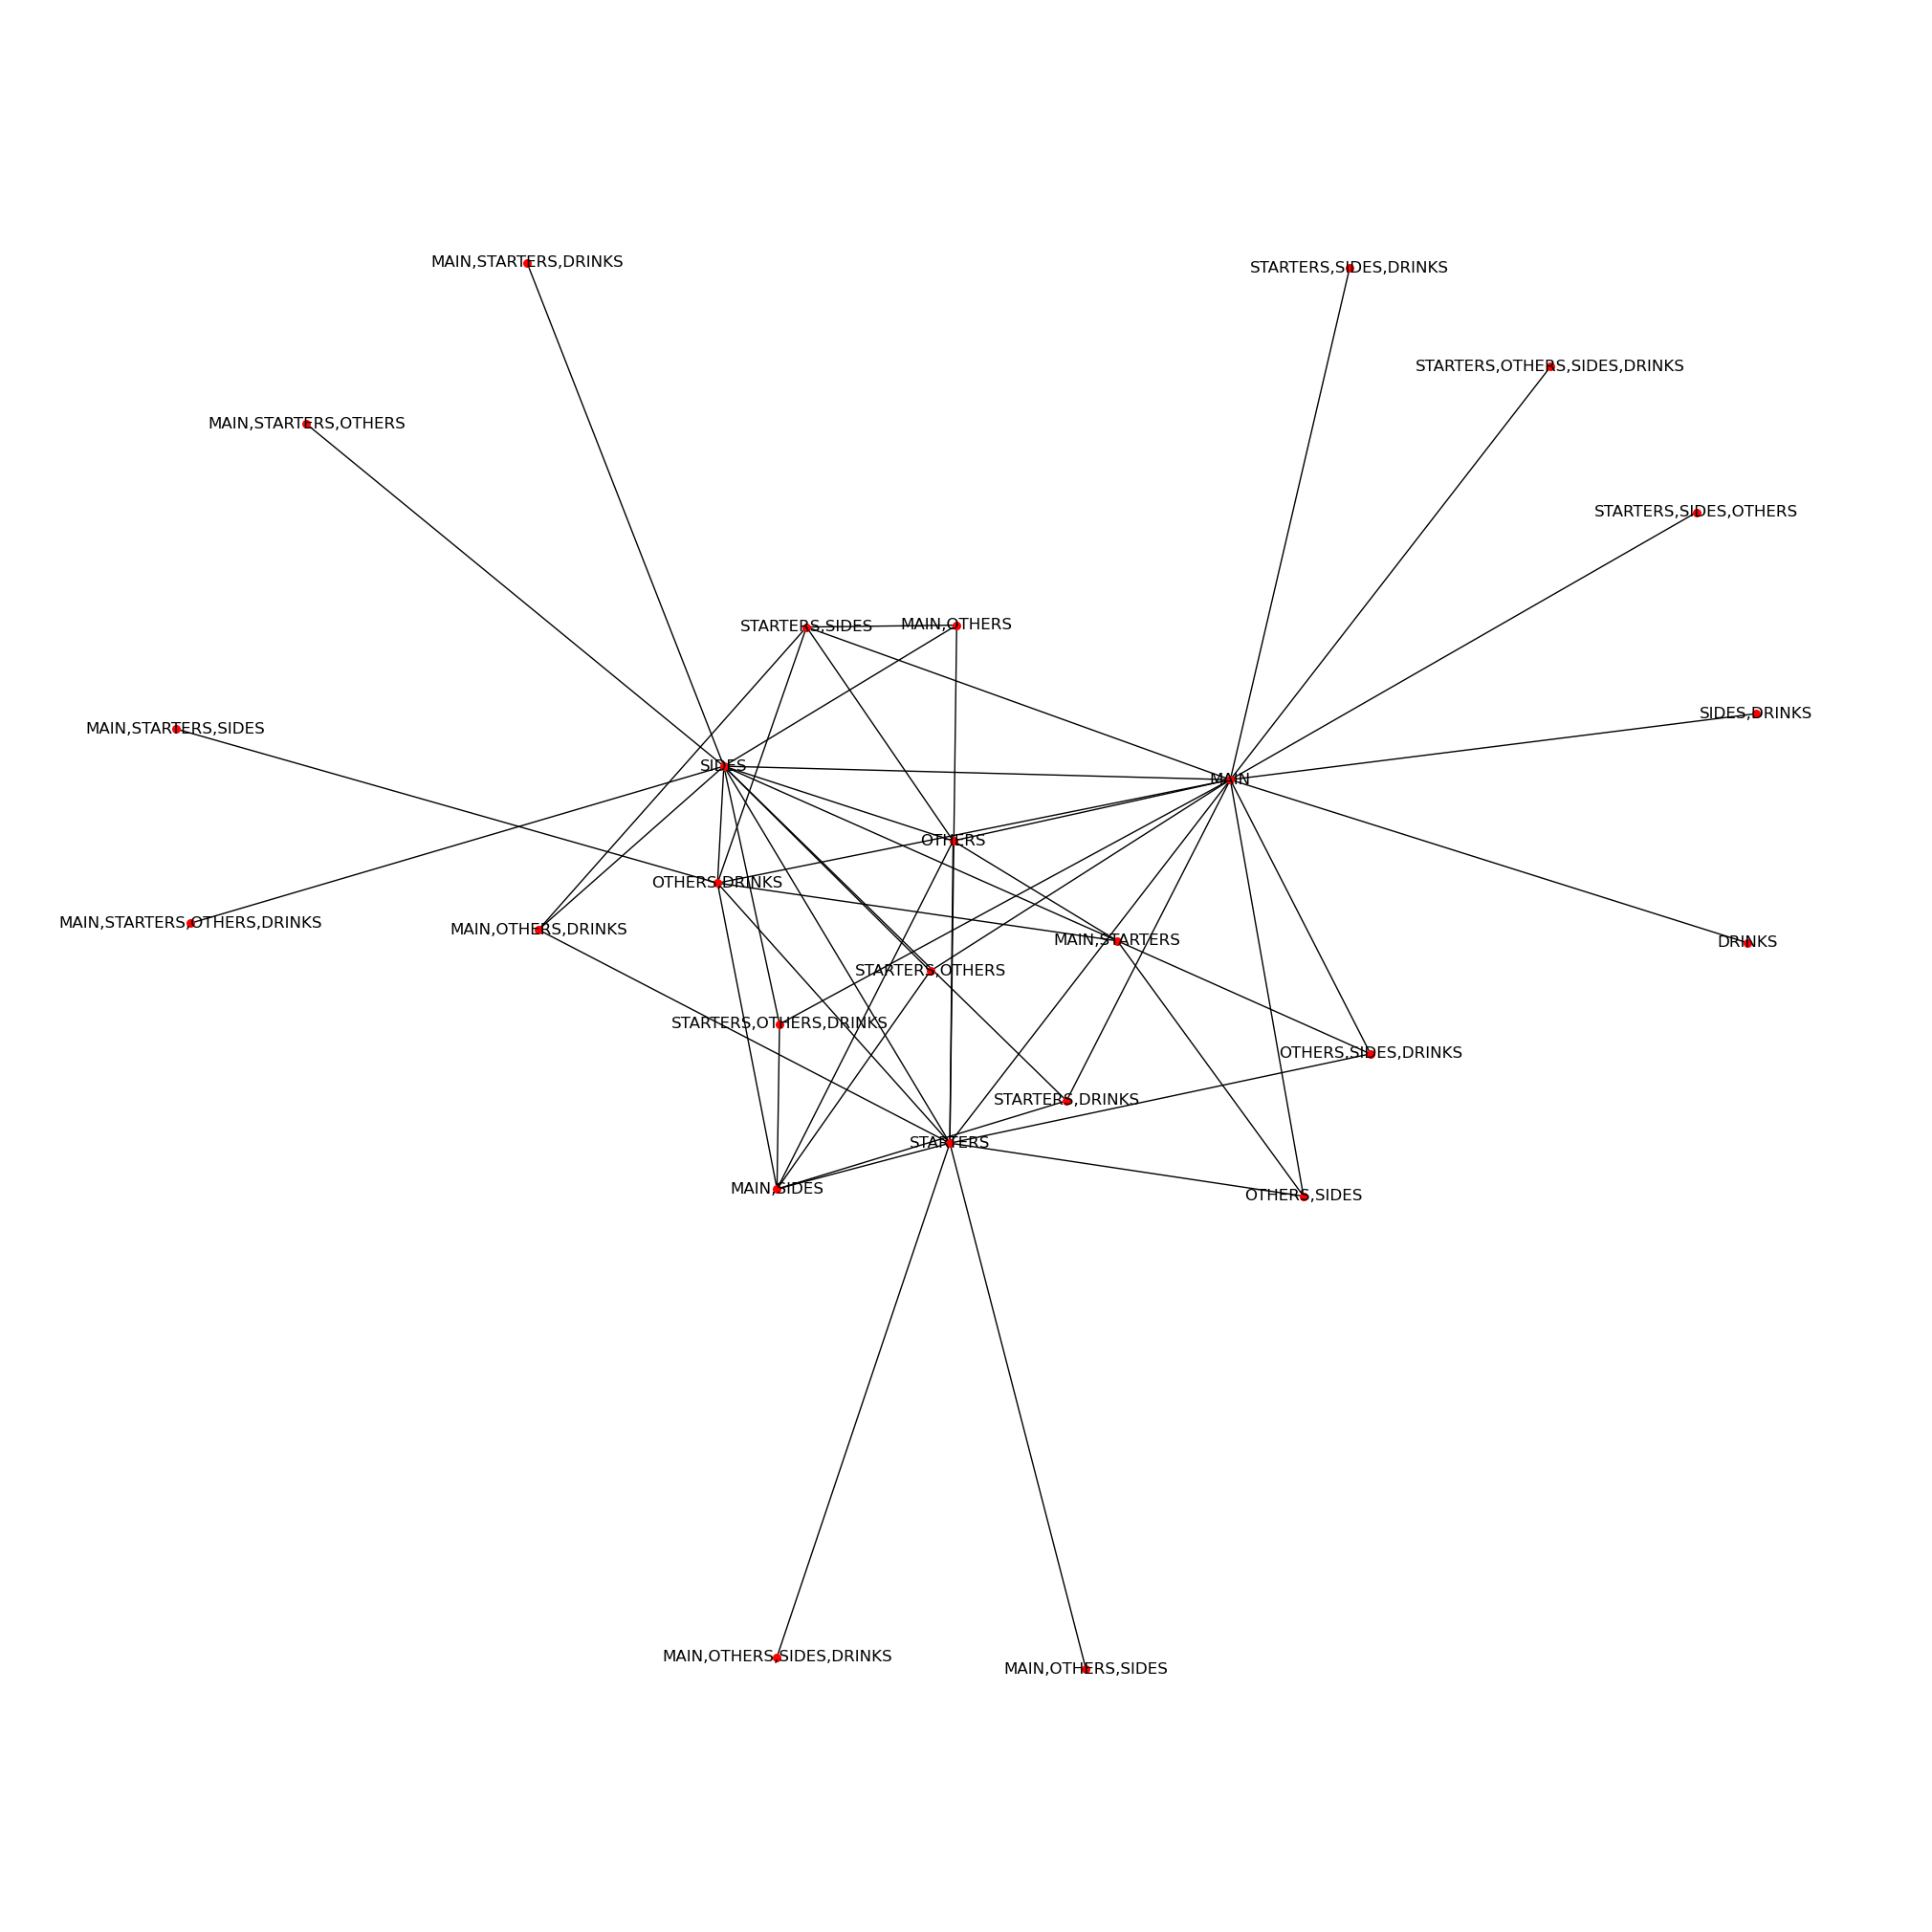

In [146]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [147]:
ds_imp[ds_imp['IsDelivery']==0]['ProductCategoryI'].value_counts()

MAIN        14818
DRINKS      11910
STARTERS     8725
SIDES        7354
OTHERS       1105
DESSERT       115
Name: ProductCategoryI, dtype: int64

In [148]:
ds_imp[ds_imp['IsDelivery']==1]['ProductCategoryI'].value_counts()

MAIN        9350
STARTERS    6745
SIDES       6118
OTHERS      1509
DRINKS       227
Name: ProductCategoryI, dtype: int64

This variable also does not provide many insights. From rule 24, we can see that it is important for our menu to contain egg fried rice (side). From rule 27, we can also see that it is important for our menu to contain the starters. The 2 categories most combined are sides and main, with 77%, and of 3 are starters, sides and main, with 64%. Therefore, we can see that it is interesting, as seen before, to combine starters, sides and main in the menu. Nevertheless, when you add drinks the support lowers to 35% (should also be very related to the fact that delivery customers do not usually ask for drinks). When it comes to the graph, it is very connected, as expected.

In [149]:
# Low Confidence and low Lift
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rulesConfidence[(rulesConfidence['confidence'] <= 1) & (rulesConfidence['lift'] <= 1)]

antecedents                consequents  antecedent support  \
2                     (OTHERS)                   (DRINKS)            0.175391   
3                     (DRINKS)                   (OTHERS)            0.565229   
4                      (SIDES)                   (DRINKS)            0.788536   
5                     (DRINKS)                    (SIDES)            0.565229   
6                   (STARTERS)                   (DRINKS)            0.705813   
7                     (DRINKS)                 (STARTERS)            0.565229   
8                       (MAIN)                   (OTHERS)            0.960492   
9                     (OTHERS)                     (MAIN)            0.175391   
12                      (MAIN)                 (STARTERS)            0.960492   
13                  (STARTERS)                     (MAIN)            0.705813   
20              (MAIN, OTHERS)                   (DRINKS)            0.167345   
21              (MAIN, DRINKS)                   (OTHERS)            0.556460   
24                    (OTHERS)             (MAIN, DRINKS)            0.175391   
25                    (DRINKS)             (MAIN, OTHERS)            0.565229   
26               (MAIN, SIDES)                   (DRINKS)            0.765844   
27              (MAIN, DRINKS)                    (SIDES)            0.556460   
30                     (SIDES)             (MAIN, DRINKS)            0.788536   
31                    (DRINKS)              (MAIN, SIDES)            0.565229   
32            (MAIN, STARTERS)                   (DRINKS)            0.672362   
33              (MAIN, DRINKS)                 (STARTERS)            0.556460   
36                  (STARTERS)             (MAIN, DRINKS)            0.705813   
37                    (DRINKS)           (MAIN, STARTERS)            0.565229   
38             (OTHERS, SIDES)                   (DRINKS)            0.167887   
43                    (DRINKS)            (OTHERS, SIDES)            0.565229   
44          (STARTERS, OTHERS)                   (DRINKS)            0.160926   
49                    (DRINKS)         (STARTERS, OTHERS)            0.565229   
50           (STARTERS, SIDES)                   (DRINKS)            0.655366   
55                    (DRINKS)          (STARTERS, SIDES)            0.565229   
64          (STARTERS, OTHERS)                     (MAIN)            0.160926   
65                      (MAIN)         (STARTERS, OTHERS)            0.960492   
86              (MAIN, DRINKS)            (OTHERS, SIDES)            0.556460   
87             (OTHERS, SIDES)             (MAIN, DRINKS)            0.167887   
94    (MAIN, STARTERS, OTHERS)                   (DRINKS)            0.152970   
100             (MAIN, DRINKS)         (STARTERS, OTHERS)            0.556460   
101         (STARTERS, OTHERS)             (MAIN, DRINKS)            0.160926   
107                   (DRINKS)   (MAIN, STARTERS, OTHERS)            0.565229   
108    (MAIN, STARTERS, SIDES)                   (DRINKS)            0.635386   
114             (MAIN, DRINKS)          (STARTERS, SIDES)            0.556460   
115          (STARTERS, SIDES)             (MAIN, DRINKS)            0.655366   
121                   (DRINKS)    (MAIN, STARTERS, SIDES)            0.565229   
122  (STARTERS, SIDES, OTHERS)                   (DRINKS)            0.154236   
135                   (DRINKS)  (STARTERS, SIDES, OTHERS)            0.565229   
159  (OTHERS, SIDES, STARTERS)             (MAIN, DRINKS)            0.154236   
170             (MAIN, DRINKS)  (OTHERS, SIDES, STARTERS)            0.556460   

     consequent support   support  confidence      lift  leverage  conviction  
2              0.565229  0.094295    0.537629  0.951170 -0.004841    0.940307  
3              0.175391  0.094295    0.166827  0.951170 -0.004841    0.989721  
4              0.565229  0.409095    0.518803  0.917863 -0.036609    0.903519  
5              0.788536  0.409095    0.723768  0.9178

Again, no strong relationships of substitution (lift values very close to 1).

<a class="anchor" id="productcat2">
    
## 4.1.4. Using the ProductCategoryII Variable
    
    
</a>

In [11]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_imp[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND   MAIN  MAIN IND  \
DocNumber                                                                    
TK0110000012018               False    False        False   True      True   
TK0110000022018                True    False        False   True      True   
TK0110000032018               False    False        False   True     False   
TK0110000042018               False    False         True  False      True   
TK0110000052018               False    False        False  False     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110000012018       False         False                  True   False   
TK0110000022018       False         False                  True    True   
TK0110000032018       False         False                  True   False   
TK0110000042018       False          True                  True   False   
TK0110000052018       False          True                  True   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110000012018     True       True      True         False  
TK0110000022018     True       True      True         False  
TK0110000032018     True      False      True         False  
TK0110000042018    False       True     False          True  
TK0110000052018    False       True     False          True

In [12]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [13]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
208     (MAIN, NON-ALCOHOLIC DRINKS, OTHERS, STARTERS)   
192  (ALCOHOLIC DRINKS, SIDES, NON-ALCOHOLIC DRINKS...   
130                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
155               (MAIN, OTHERS, NON-ALCOHOLIC DRINKS)   
207    (SIDES, NON-ALCOHOLIC DRINKS, OTHERS, STARTERS)   
186           (OTHERS, NON-ALCOHOLIC DRINKS, STARTERS)   
156              (SIDES, OTHERS, NON-ALCOHOLIC DRINKS)   
103                     (OTHERS, NON-ALCOHOLIC DRINKS)   
163           (OTHERS, NON-ALCOHOLIC DRINKS, STARTERS)   
57                      (OTHERS, NON-ALCOHOLIC DRINKS)   
116    (ALCOHOLIC DRINKS, SIDES, NON-ALCOHOLIC DRINKS)   
170            (SIDES, NON-ALCOHOLIC DRINKS, STARTERS)   
33                           (ALCOHOLIC DRINKS, SIDES)   
61                       (SIDES, NON-ALCOHOLIC DRINKS)   
178                           (MAIN, OTHERS, STARTERS)   
214           (NON-ALCOHOLIC DRINKS, OTHERS, STARTERS)   
191          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
123  (ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS, START...   
114                    (MAIN, ALCOHOLIC DRINKS, SIDES)   
136                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
122                 (MAIN, ALCOHOLIC DRINKS, STARTERS)   
36                        (ALCOHOLIC DRINKS, STARTERS)   
39                           (ALCOHOLIC DRINKS, SIDES)   
159                     (OTHERS, NON-ALCOHOLIC DRINKS)   
70                                      (MAIN, OTHERS)   
43                        (ALCOHOLIC DRINKS, STARTERS)   
68                    (NON-ALCOHOLIC DRINKS, STARTERS)   
29                            (MAIN, ALCOHOLIC DRINKS)   
38                        (MAIN IND, ALCOHOLIC DRINKS)   
196                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
80                                   (SIDES, STARTERS)   
71                                     (SIDES, OTHERS)   
179                          (SIDES, OTHERS, STARTERS)   
1                                   (ALCOHOLIC DRINKS)   
118                          (ALCOHOLIC DRINKS, SIDES)   
9                                              (SIDES)   
193  (MAIN, ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS,...   
112                                 (OTHERS, STARTERS)   
129                 (MAIN, ALCOHOLIC DRINKS, STARTERS)   
24                                            (OTHERS)   
169             (MAIN, NON-ALCOHOLIC DRINKS, STARTERS)   
126                       (ALCOHOLIC DRINKS, STARTERS)   
79                                    (MAIN, STARTERS)   
7                                             (OTHERS)   

                      consequents  antecedent support  consequent support  \
208                       (SIDES)            0.082904            0.685110   
192                        (MAIN)            0.123587            0.855167   
130                        (MAIN)            0.127746            0.855167   
155                       (SIDES)            0.090498            0.685110   
207                        (MAIN)            0.083175            0.855167   
186                       (SIDES)            0.084531            0.685110   
156                        (MAIN)            0.090769            0.855167   
103                       (SIDES)            0.092397            0.685110   
163                        (MAIN)            0.084531            0.855167   
57                         (MAIN)            0.092397            0.855167   
116                        (MAIN)            0.140403            0.855167   
170                        (MAIN)            0.305578            0.855167   
33                         (MAIN)            0.145376            0.855167   
61                         (MAIN)            0.354308            0.855167   
178                       (SIDES)            0.146370            0.685110   
214                 (MAIN, SIDES)            0.084531            0.647500   
191        (NON-ALCOHOLIC DRINKS)            0.126028            0.553747   
123                        (MAIN)            0

In [14]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
46                              (SIDES IND)   
43                 (MAIN IND, STARTERS IND)   
7                               (SIDES IND)   
6                            (MAIN VEG IND)   
31        (SIDES IND, NON-ALCOHOLIC DRINKS)   
32                               (MAIN IND)   
2                                (MAIN IND)   
3                               (SIDES IND)   
45                               (MAIN IND)   
44                (SIDES IND, STARTERS IND)   
8                               (SIDES IND)   
9                            (STARTERS IND)   
47                           (STARTERS IND)   
42                    (MAIN IND, SIDES IND)   
28                               (MAIN IND)   
27                        (MAIN, SIDES IND)   
40                               (MAIN IND)   
39                    (SIDES IND, STARTERS)   
35                       (SIDES IND, SIDES)   
36                               (MAIN IND)   
30         (MAIN IND, NON-ALCOHOLIC DRINKS)   
33                              (SIDES IND)   
38                     (MAIN IND, STARTERS)   
41                              (SIDES IND)   
29                              (SIDES IND)   
26                         (MAIN, MAIN IND)   
5                            (STARTERS IND)   
4                                (MAIN IND)   
34                        (MAIN IND, SIDES)   
37                              (SIDES IND)   
95   (MAIN, NON-ALCOHOLIC DRINKS, STARTERS)   
96                (ALCOHOLIC DRINKS, SIDES)   
92       (MAIN, ALCOHOLIC DRINKS, STARTERS)   
99            (SIDES, NON-ALCOHOLIC DRINKS)   
90          (MAIN, ALCOHOLIC DRINKS, SIDES)   
101        (NON-ALCOHOLIC DRINKS, STARTERS)   
93      (MAIN, SIDES, NON-ALCOHOLIC DRINKS)   
98             (ALCOHOLIC DRINKS, STARTERS)   
66                (ALCOHOLIC DRINKS, SIDES)   
69         (NON-ALCOHOLIC DRINKS, STARTERS)   
67             (ALCOHOLIC DRINKS, STARTERS)   
68            (SIDES, NON-ALCOHOLIC DRINKS)   
16                       (ALCOHOLIC DRINKS)   
15         (MAIN IND, NON-ALCOHOLIC DRINKS)   

                                consequents  antecedent support  \
46                 (MAIN IND, STARTERS IND)            0.172317   
43                              (SIDES IND)            0.071332   
7                            (MAIN VEG IND)            0.172317   
6                               (SIDES IND)            0.060212   
31                               (MAIN IND)            0.090679   
32        (SIDES IND, NON-ALCOHOLIC DRINKS)            0.189856   
2                               (SIDES IND)            0.189856   
3                                (MAIN IND)            0.172317   
45                (SIDES IND, STARTERS IND)            0.189856   
44                               (MAIN IND)            0.078836   
8                            (STARTERS IND)            0.172317   
9                               (SIDES IND)            0.109213   
47                    (MAIN IND, SIDES IND)            0.109213   
42                           (STARTERS IND)            0.139409   
28                        (MAIN, SIDES IND)            0.189856   
27                               (MAIN IND)            0.080101   
40                    (SIDES IND, STARTERS)            0.189856   
39                               (MAIN IND)            0.069976   
35                               (MAIN IND)            0.068891   
36                       (SIDES IND, SIDES)            0.189856   
30                              (SIDES IND)            0.114999   
33         (MAIN IND, NON-ALCOHOLIC DRINKS)            0.172317   
38                              (SIDES IND)            0.081729   
41                     (MAIN IND, STARTERS)            0.172317   
29                         (MAIN, MAIN IND)            0.172317   
26                              (SIDES IND)            0.099449   
5                                (MAIN IND)            0.109213   
4                            (STARTERS I

In [15]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [16]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                       itemsets  length
12  0.207667       (ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS)       2
16  0.499774                   (MAIN, NON-ALCOHOLIC DRINKS)       2
18  0.647500                                  (MAIN, SIDES)       2
20  0.589187                               (MAIN, STARTERS)       2
29  0.354308                  (SIDES, NON-ALCOHOLIC DRINKS)       2
31  0.334328               (NON-ALCOHOLIC DRINKS, STARTERS)       2
36  0.574360                              (SIDES, STARTERS)       2
51  0.344363            (MAIN, SIDES, NON-ALCOHOLIC DRINKS)       3
53  0.320043         (MAIN, NON-ALCOHOLIC DRINKS, STARTERS)       3
57  0.547419                        (MAIN, SIDES, STARTERS)       3
68  0.305578        (SIDES, NON-ALCOHOLIC DRINKS, STARTERS)       3
78  0.299159  (MAIN, SIDES, NON-ALCOHOLIC DRINKS, STARTERS)       4

In [17]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
191  (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
114            (MAIN, ALCOHOLIC DRINKS, SIDES)   
136        (ALCOHOLIC DRINKS, SIDES, STARTERS)   
122         (MAIN, ALCOHOLIC DRINKS, STARTERS)   
39                   (ALCOHOLIC DRINKS, SIDES)   
43                (ALCOHOLIC DRINKS, STARTERS)   
29                    (MAIN, ALCOHOLIC DRINKS)   
38                (MAIN IND, ALCOHOLIC DRINKS)   
196        (ALCOHOLIC DRINKS, SIDES, STARTERS)   
1                           (ALCOHOLIC DRINKS)   
118                  (ALCOHOLIC DRINKS, SIDES)   
126               (ALCOHOLIC DRINKS, STARTERS)   
198         (MAIN, ALCOHOLIC DRINKS, STARTERS)   
212       (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
210      (SIDES, NON-ALCOHOLIC DRINKS, OTHERS)   
188             (OTHERS, NON-ALCOHOLIC DRINKS)   
165             (OTHERS, NON-ALCOHOLIC DRINKS)   
140               (ALCOHOLIC DRINKS, STARTERS)   
99                    (MAIN IND, STARTERS IND)   
216             (NON-ALCOHOLIC DRINKS, OTHERS)   
203               (ALCOHOLIC DRINKS, STARTERS)   
180                             (MAIN, OTHERS)   
194            (MAIN, ALCOHOLIC DRINKS, SIDES)   
31                          (ALCOHOLIC DRINKS)   
16                              (MAIN VEG IND)   
90           (SIDES IND, NON-ALCOHOLIC DRINKS)   
138                  (ALCOHOLIC DRINKS, SIDES)   
200                  (ALCOHOLIC DRINKS, SIDES)   
14                                 (SIDES IND)   
100                  (SIDES IND, STARTERS IND)   
53                           (MAIN, SIDES IND)   
98                       (SIDES IND, STARTERS)   
94                          (SIDES IND, SIDES)   
13                                  (MAIN IND)   
28                              (STARTERS IND)   

                                consequents  antecedent support  \
191                  (NON-ALCOHOLIC DRINKS)            0.126028   
114                  (NON-ALCOHOLIC DRINKS)            0.142121   
136                  (NON-ALCOHOLIC DRINKS)            0.127746   
122                  (NON-ALCOHOLIC DRINKS)            0.134075   
39                   (NON-ALCOHOLIC DRINKS)            0.145376   
43                   (NON-ALCOHOLIC DRINKS)            0.138776   
29                   (NON-ALCOHOLIC DRINKS)            0.196546   
38                   (NON-ALCOHOLIC DRINKS)            0.053973   
196            (MAIN, NON-ALCOHOLIC DRINKS)            0.127746   
1                    (NON-ALCOHOLIC DRINKS)            0.219148   
118            (MAIN, NON-ALCOHOLIC DRINKS)            0.145376   
126            (MAIN, NON-ALCOHOLIC DRINKS)            0.138776   
198           (SIDES, NON-ALCOHOLIC DRINKS)            0.134075   
212                       (SIDES, STARTERS)            0.090498   
210                        (MAIN, STARTERS)            0.090769   
188                       (SIDES, STARTERS)            0.092397   
165                        (MAIN, STARTERS)            0.092397   
140           (SIDES, NON-ALCOHOLIC DRINKS)            0.138776   
99                              (SIDES IND)            0.071332   
216                 (MAIN, SIDES, STARTERS)            0.092397   
203     (MAIN, SIDES, NON-ALCOHOLIC DRINKS)            0.138776   
180                       (SIDES, STARTERS)            0.162011   
194        (NON-ALCOHOLIC DRINKS, STARTERS)            0.142121   
31             (MAIN, NON-ALCOHOLIC DRINKS)            0.219148   
16                              (SIDES IND)            0.060212   
90                               (MAIN IND)            0.090679   
138        (NON-ALCOHOLIC DRINKS, STARTERS)            0.145376   
200  (MAIN, NON-ALCOHOLIC DRINKS, STARTERS)            0.145376   
14                               (MAIN IND)            0.172317   
100                              (MAIN IND)            0.078836   
53                               (MAIN IND)            0.080101   
98                               (MAIN IND)            0.069976   
94                     

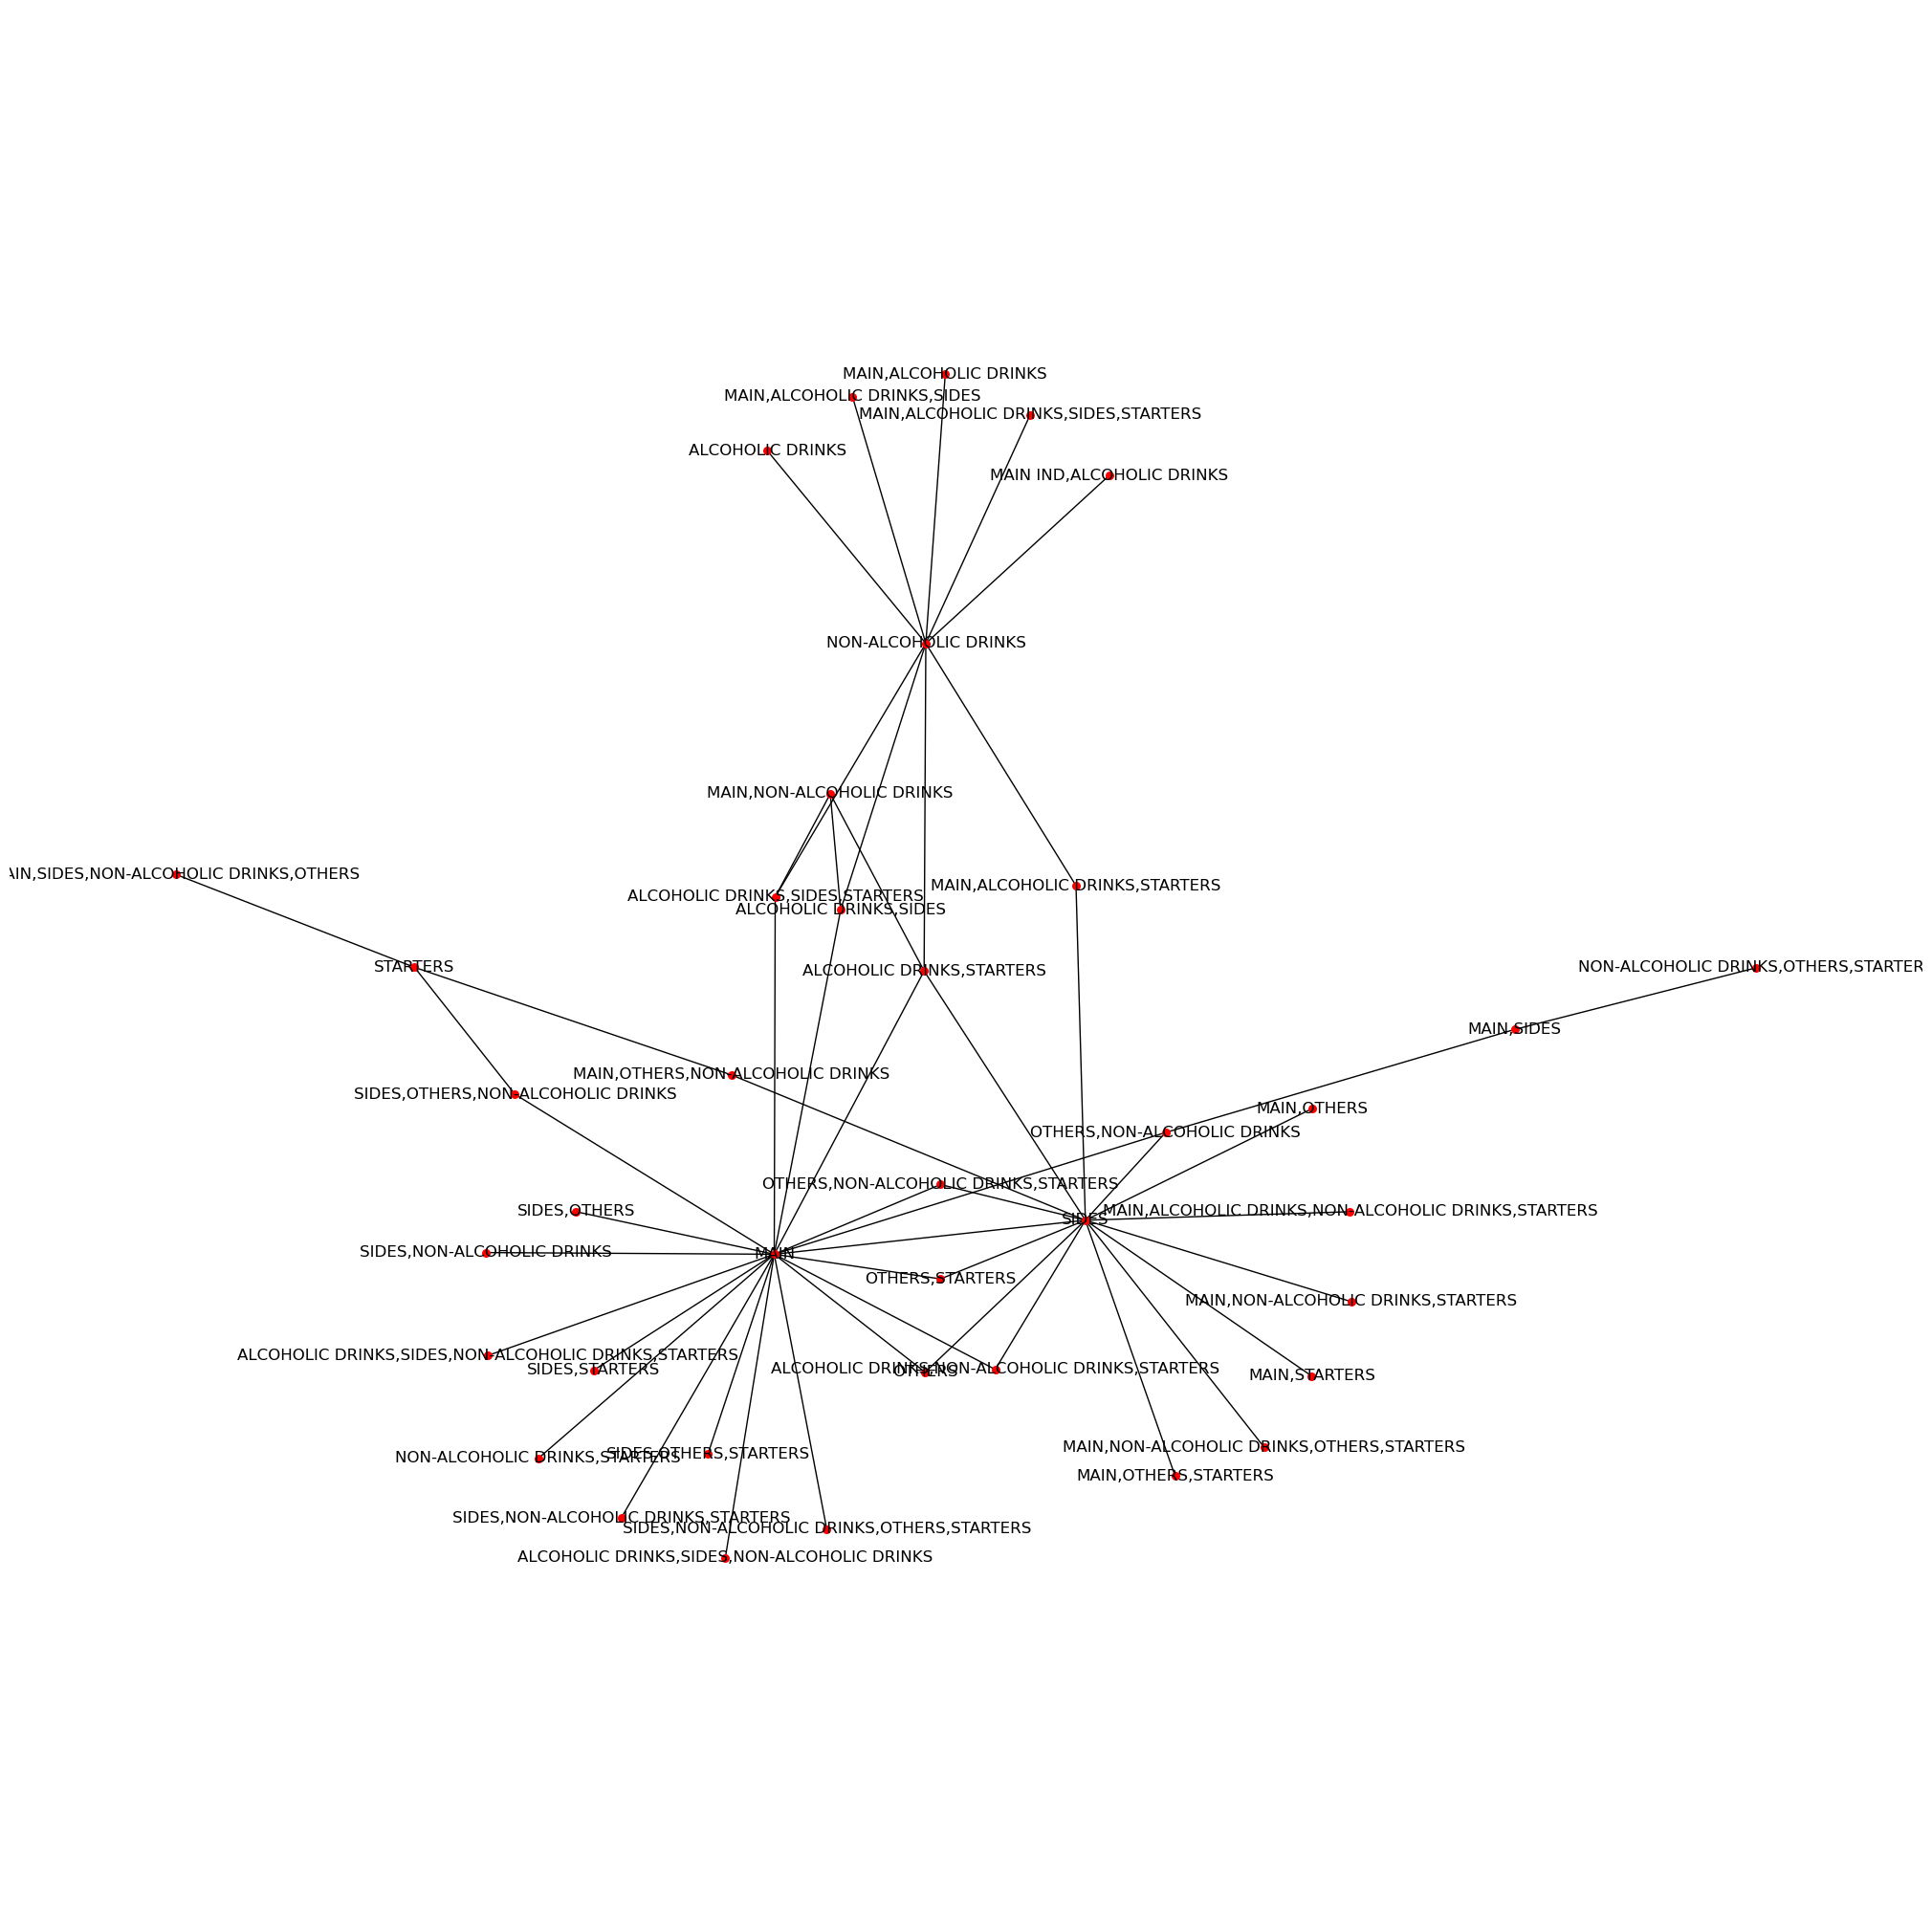

In [18]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [19]:
ds_imp['ProductCategoryII'].value_counts()

MAIN                    19806
STARTERS                13817
SIDES                   10445
NON-ALCOHOLIC DRINKS     9265
SIDES IND                3027
MAIN IND                 3016
ALCOHOLIC DRINKS         2872
OTHERS                   2614
STARTERS IND             1653
MAIN VEG IND              893
MAIN VEG                  453
DESSERT IND                59
DESSERT                    56
Name: ProductCategoryII, dtype: int64

We can see that, when it comes to indian dishes, main and sides tend to come together (rules 13 and 14), suggesting that we could also create an indian menu. Alcoholic and non-alcoholic drinks appear together (rule 1) probably because in tables there tends to be not only people that drink alcohol but also others that don't or even people asking for both.

In [23]:
# Low Confidence and low Lift
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rulesConfidence[(rulesConfidence['confidence'] <= 0.7) & (rulesConfidence['lift'] <= 0.7)]

antecedents                        consequents  \
10                              (MAIN)                         (MAIN IND)   
11                          (MAIN IND)                             (MAIN)   
18                              (MAIN)                        (SIDES IND)   
19                         (SIDES IND)                             (MAIN)   
22                              (MAIN)                     (STARTERS IND)   
23                      (STARTERS IND)                             (MAIN)   
30                          (MAIN IND)                         (STARTERS)   
31                          (STARTERS)                         (MAIN IND)   
50                         (SIDES IND)                            (SIDES)   
51                             (SIDES)                        (SIDES IND)   
54                         (SIDES IND)                         (STARTERS)   
55                          (STARTERS)                        (SIDES IND)   
107                      (MAIN, SIDES)                         (MAIN IND)   
110                         (MAIN IND)                      (MAIN, SIDES)   
114              (MAIN IND, SIDES IND)                             (MAIN)   
115                             (MAIN)              (MAIN IND, SIDES IND)   
119                   (MAIN, STARTERS)                         (MAIN IND)   
122                         (MAIN IND)                   (MAIN, STARTERS)   
137       (MAIN, NON-ALCOHOLIC DRINKS)                        (SIDES IND)   
138  (SIDES IND, NON-ALCOHOLIC DRINKS)                             (MAIN)   
139                             (MAIN)  (SIDES IND, NON-ALCOHOLIC DRINKS)   
140                        (SIDES IND)       (MAIN, NON-ALCOHOLIC DRINKS)   
161                      (MAIN, SIDES)                        (SIDES IND)   
164                        (SIDES IND)                      (MAIN, SIDES)   
173                   (MAIN, STARTERS)                        (SIDES IND)   
176                        (SIDES IND)                   (MAIN, STARTERS)   
196              (MAIN IND, SIDES IND)                            (SIDES)   
201                            (SIDES)              (MAIN IND, SIDES IND)   
204                  (SIDES, STARTERS)                         (MAIN IND)   
205                         (MAIN IND)                  (SIDES, STARTERS)   
208              (MAIN IND, SIDES IND)                         (STARTERS)   
213                         (STARTERS)              (MAIN IND, SIDES IND)   
316            (MAIN, SIDES, STARTERS)                         (MAIN IND)   
325                         (MAIN IND)            (MAIN, SIDES, STARTERS)   

     antecedent support  consequent support   support  confidence      lift  \
10             0.855167            0.189856  0.099449    0.116291  0.612523   
11             0.189856            0.855167  0.099449    0.523810  0.612523   
18             0.855167            0.172317  0.080101    0.093667  0.543576   
19             0.172317            0.855167  0.080101    0.464848  0.543576   
22             0.855167            0.109213  0.051532    0.060260  0.551769   
23             0.109213            0.855167  0.051532    0.471854  0.551769   
30             0.189856            0.643432  0.081729    0.430476  0.669031   
31             0.643432            0.189856  0.081729    0.127020  0.669031   
50             0.172317            0.685110  0.068891    0.399790  0.583542   
51             0.685110            0.172317  0.068891    0.100554  0.583542   
54             0.172317            0.643432  0.069976    0.406086  0.631125   
55             0.643432            0.172317  0.069976    0.108754  0.631125   
107            0.647500            0.189856  0.079107    0.122173  0.643500   
110            0.189856            0.647500  0.079107    0.416667  0.643500   
114            0.139409            0.855167  0.061387    0.440337  0.514914   
115            0.855167            0.139409  0.061387    0.071783  

We can see that there are relationships of substitution between indian and not indian dishes, which is expected. We would predict that the people that go for indian main would also go for indian sides, startes and even dessert.

<a class="anchor" id="ind">
    
## 4.2. Considering only the Indian Dishes
    
    
</a>

In [4]:
ds_ind=ds_imp[(ds_imp['ProductCategoryII']=='SIDES IND') | (ds_imp['ProductCategoryII']=='STARTERS IND') |
              (ds_imp['ProductCategoryII']=='MAIN IND') | (ds_imp['ProductCategoryII']=='DESSERT IND')].copy()

<a class="anchor" id="product_ind">
    
## 4.2.1. Using the Product Variable
    
    
</a>

In [7]:
# Pivot the data
pt = pd.pivot_table(ds_ind[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product          ASSORTED PICKLES  BUTTER CHICKEN  CARRAT HALWA  CARROT HALWA  \
DocNumber                                                                       
TK0110000012018             False           False         False         False   
TK0110000022018             False           False         False         False   
TK0110000042018             False           False         False         False   
TK0110000052018             False           False         False         False   
TK0110000082018             False           False         False         False   

Product          CHICK KORMA KASHMIRI  CHICK TIKKA BHUNA  CHICK TIKKA MASALA  \
DocNumber                                                                      
TK0110000012018                 False              False               False   
TK0110000022018                 False              False                True   
TK0110000042018                 False              False               False   
TK0110000052018                 False              False               False   
TK0110000082018                 False              False               False   

Product          CHICKEN KALIMIRCH TIKKA  CHICKEN TIKKA  CHICKEN VINDALOO  \
DocNumber                                                                   
TK0110000012018                    False          False             False   
TK0110000022018                    False          False             False   
TK0110000042018                    False          False              True   
TK0110000052018                    False          False             False   
TK0110000082018                    False          False              True   

Product          ...  POPPDUMS  PRAWN PURI   ROTI  SAMOSA  SAMOSA CHICKEN  \
DocNumber        ...                                                        
TK0110000012018  ...     False       False  False   False           False   
TK0110000022018  ...     False       False  False   False           False   
TK0110000042018  ...     False        True  False   False           False   
TK0110000052018  ...     False       False   True    True           False   
TK0110000082018  ...     False       False  False   False           False   

Product          SORBET IND  STEAMED RICE IND  TANDOORI CHICK  \
DocNumber                                                       
TK0110000012018       False             False           False   
TK0110000022018       False             False           False   
TK0110000042018       False             False           False   
TK0110000052018       False             False           False   
TK0110000082018       False             False           False   

Product          TANDOORI TILL JHEENGA  TANDOORI TRILOGY  
DocNumber                                                 
TK0110000012018                  False             False  
TK0110000022018                  False             False  
TK0110000042018                  False             False  
TK0110000052018                  False             False  
TK0110000082018                  False             False  

[5 rows x 33 columns]

In [8]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [162]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(60)

antecedents   consequents  antecedent support  \
2  (JIRA PULAO, CHICK KORMA KASHMIRI)        (NAAN)            0.082292   
0        (BUTTER CHICKEN, JIRA PULAO)        (NAAN)            0.095151   
1        (NAAN, CHICK KORMA KASHMIRI)  (JIRA PULAO)            0.086334   

   consequent support   support  confidence      lift  leverage  conviction  
2            0.485305  0.061352    0.745536  1.536221  0.021415    2.022661  
0            0.485305  0.070904    0.745174  1.535475  0.024727    2.019788  
1            0.416973  0.061352    0.710638  1.704280  0.025353    2.014873

In [163]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents                         consequents  \
13              (CHICK KORMA KASHMIRI)                  (NAAN, JIRA PULAO)   
8                   (NAAN, JIRA PULAO)              (CHICK KORMA KASHMIRI)   
12                        (JIRA PULAO)        (NAAN, CHICK KORMA KASHMIRI)   
9         (NAAN, CHICK KORMA KASHMIRI)                        (JIRA PULAO)   
19                        (JIRA PULAO)                      (NAAN, SAMOSA)   
18                      (NAAN, SAMOSA)                        (JIRA PULAO)   
4                   (NAAN, JIRA PULAO)                    (BUTTER CHICKEN)   
5                     (BUTTER CHICKEN)                  (NAAN, JIRA PULAO)   
17                        (JIRA PULAO)          (CHICK TIKKA MASALA, NAAN)   
14          (CHICK TIKKA MASALA, NAAN)                        (JIRA PULAO)   
0                    (LAMB ROGAN JOSH)                        (JIRA PULAO)   
1                         (JIRA PULAO)                   (LAMB ROGAN JOSH)   
6                         (JIRA PULAO)              (BUTTER CHICKEN, NAAN)   
3               (BUTTER CHICKEN, NAAN)                        (JIRA PULAO)   
11                              (NAAN)  (JIRA PULAO, CHICK KORMA KASHMIRI)   
10  (JIRA PULAO, CHICK KORMA KASHMIRI)                              (NAAN)   
7                               (NAAN)        (BUTTER CHICKEN, JIRA PULAO)   
2         (BUTTER CHICKEN, JIRA PULAO)                              (NAAN)   
15                  (NAAN, JIRA PULAO)                (CHICK TIKKA MASALA)   
16                (CHICK TIKKA MASALA)                  (NAAN, JIRA PULAO)   

    antecedent support  consequent support   support  confidence      lift  \
13            0.135929            0.264144  0.061352    0.451351  1.708732   
8             0.264144            0.135929  0.061352    0.232267  1.708732   
12            0.416973            0.086334  0.061352    0.147137  1.704280   
9             0.086334            0.416973  0.061352    0.710638  1.704280   
19            0.416973            0.074210  0.051065    0.122467  1.650273   
18            0.074210            0.416973  0.051065    0.688119  1.650273   
4             0.264144            0.164217  0.070904    0.268428  1.634591   
5             0.164217            0.264144  0.070904    0.431767  1.634591   
17            0.416973            0.207201  0.141073    0.338326  1.632843   
14            0.207201            0.416973  0.141073    0.680851  1.632843   
0             0.088538            0.416973  0.058780    0.663900  1.592191   
1             0.416973            0.088538  0.058780    0.140969  1.592191   
6             0.416973            0.108009  0.070904    0.170044  1.574353   
3             0.108009            0.416973  0.070904    0.656463  1.574353   
11            0.485305            0.082292  0.061352    0.126419  1.536221   
10            0.082292            0.485305  0.061352    0.745536  1.536221   
7             0.485305            0.095151  0.070904    0.146101  1.535475   
2             0.095151            0.485305  0.070904    0.745174  1.535475   
15            0.264144            0.348641  0.141073    0.534075  1.531878   
16            0.348641            0.264144  0.141073    0.404636  1.531878   

    leverage  conviction  
13  0.025447    1.341215  
8   0.025447    1.125483  
12  0.025353    1.071293  
9   0.025353    2.014873  
19  0.020122    1.054991  
18  0.020122    1.869389  
4   0.027527    1.142448  
5   0.027527    1.294991  
17  0.054676    1.198172  
14  0.054676    1.826819  
0   0.021862    1.734686  
1   0.021862    1.061035  
6   0.025867    1.074745  
3   0.025867    1.697129  
11  0.021415    1.050513  
10  0.021415    2.022661  
7   0.024727    1.059668  
2   0.024727    2.019788  
15  0.048981    1.397992  
16  0.048981    1.235978

In [164]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [165]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                          itemsets  length
22  0.204996  (CHICK TIKKA MASALA, JIRA PULAO)       2
23  0.207201        (CHICK TIKKA MASALA, NAAN)       2
26  0.264144                (NAAN, JIRA PULAO)       2

In [166]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.5) & (rulesConfidence['lift'] >= 1.0)]

antecedents   consequents  antecedent support  \
2  (JIRA PULAO, CHICK KORMA KASHMIRI)        (NAAN)            0.082292   
0        (BUTTER CHICKEN, JIRA PULAO)        (NAAN)            0.095151   
1        (NAAN, CHICK KORMA KASHMIRI)  (JIRA PULAO)            0.086334   

   consequent support   support  confidence      lift  leverage  conviction  
2            0.485305  0.061352    0.745536  1.536221  0.021415    2.022661  
0            0.485305  0.070904    0.745174  1.535475  0.024727    2.019788  
1            0.416973  0.061352    0.710638  1.704280  0.025353    2.014873

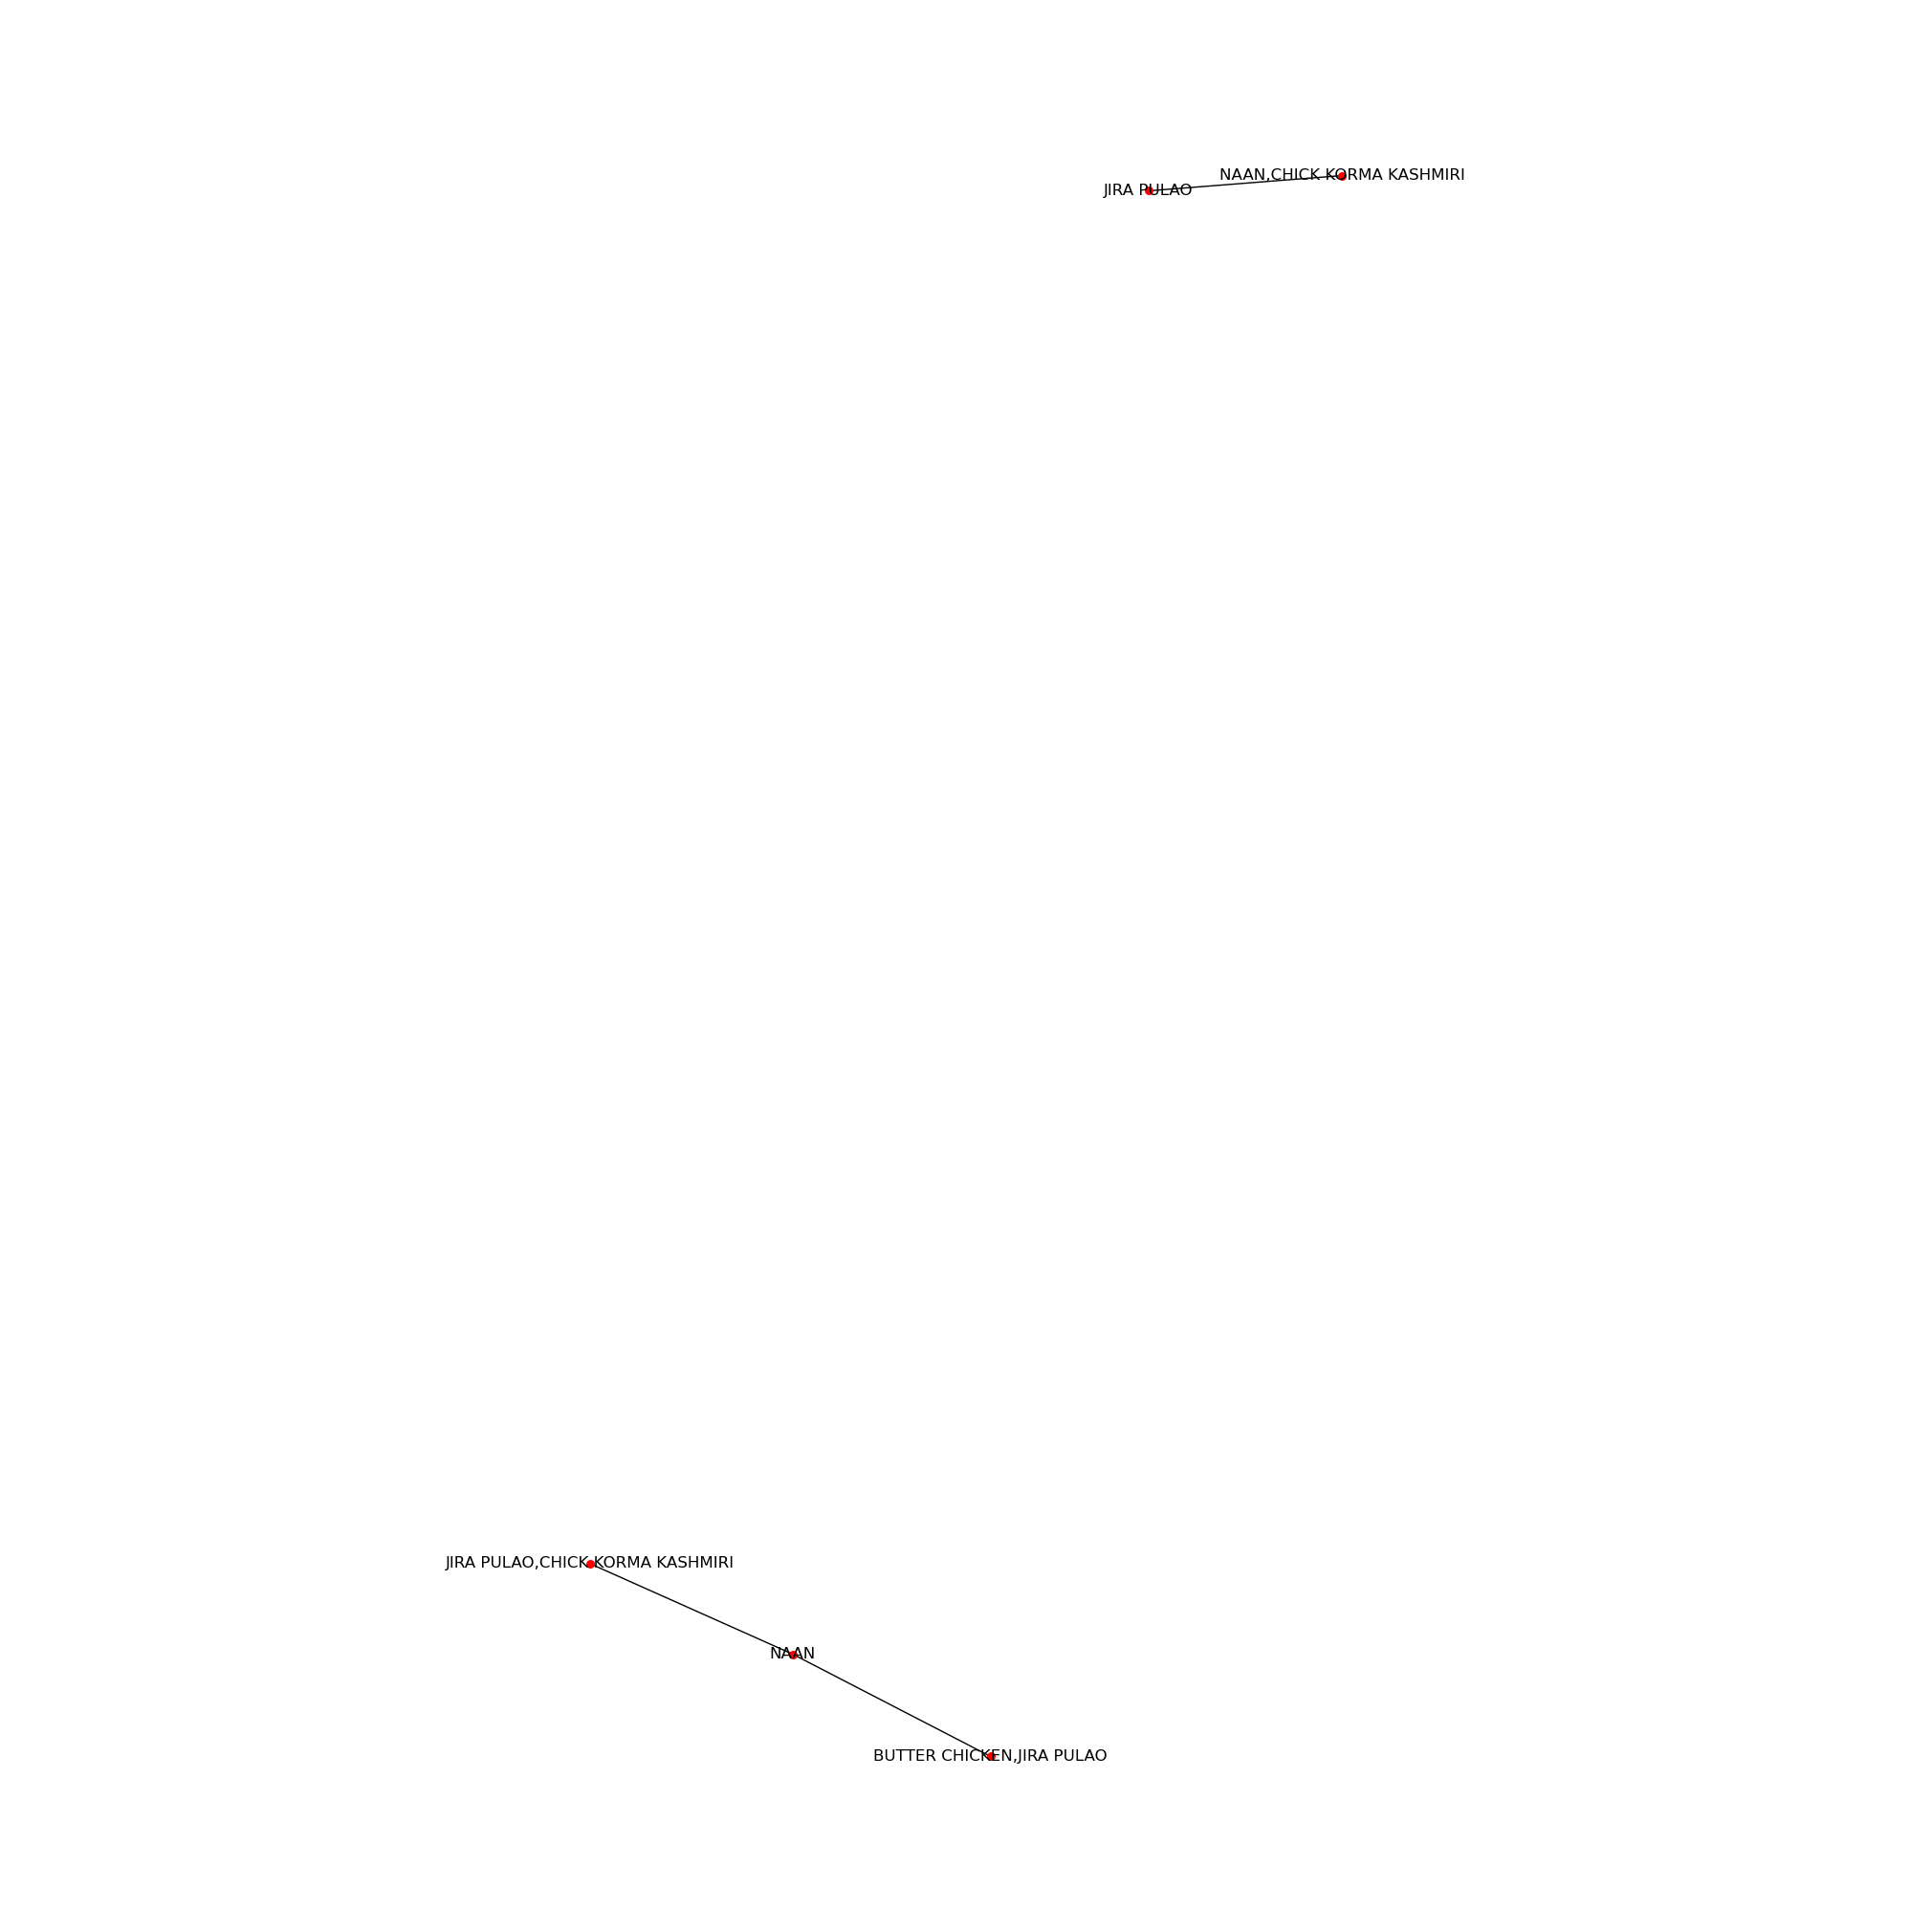

In [167]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [168]:
ds_ind['ProductCategoryII'].value_counts()

SIDES IND       3027
MAIN IND        3016
STARTERS IND    1653
DESSERT IND       59
Name: ProductCategoryII, dtype: int64

In [305]:
ds_ind['Product'].value_counts().head(7)

NAAN                    1321
JIRA PULAO              1135
CHICK TIKKA MASALA       949
BUTTER CHICKEN           447
SAMOSA                   375
CHICK KORMA KASHMIRI     370
MALAI MANGO CHICK        331
Name: Product, dtype: int64

We could think about creating a similar menu but for indian dishes with jira pulao and naan as sides, butter chicken or chick korma kashmiri or chick tikka masala (rules 0, 1, 2 and 16) as main and mineral water. Still, the graph does not show many connections which also could be because of the low support for the indian products.

In [9]:
# Low Confidence and low Lift
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rulesConfidence[(rulesConfidence['confidence'] <= 1) & (rulesConfidence['lift'] <= 1)]

antecedents           consequents  antecedent support  \
0  (CHICK TIKKA MASALA)      (BUTTER CHICKEN)            0.348641   
1      (BUTTER CHICKEN)  (CHICK TIKKA MASALA)            0.164217   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.164217  0.052168    0.149631  0.911177 -0.005085    0.982847  
1            0.348641  0.052168    0.317673  0.911177 -0.005085    0.954615

Again, not very strong relationships of substitution (when it comes to the lift value). Still, it makes sense to have two different main dishes as substitute products.

<a class="anchor" id="productqt_ind">
    
## 4.2.2. Using the ProductWithQuantity Variable
    
    
</a>

In [169]:
# Pivot the data
pt = pd.pivot_table(ds_ind[['DocNumber', 'ProductWithQuantity']], index='DocNumber', columns='ProductWithQuantity', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductWithQuantity  1.0 ASSORTED PICKLES  1.0 BUTTER CHICKEN  \
DocNumber                                                       
TK0110000012018                     False               False   
TK0110000022018                     False               False   
TK0110000042018                     False               False   
TK0110000052018                     False               False   
TK0110000082018                     False               False   

ProductWithQuantity  1.0 CARRAT HALWA  1.0 CARROT HALWA  \
DocNumber                                                 
TK0110000012018                 False             False   
TK0110000022018                 False             False   
TK0110000042018                 False             False   
TK0110000052018                 False             False   
TK0110000082018                 False             False   

ProductWithQuantity  1.0 CHICK KORMA KASHMIRI  1.0 CHICK TIKKA BHUNA  \
DocNumber                                                              
TK0110000012018                         False                  False   
TK0110000022018                         False                  False   
TK0110000042018                         False                  False   
TK0110000052018                         False                  False   
TK0110000082018                         False                  False   

ProductWithQuantity  1.0 CHICK TIKKA MASALA  1.0 CHICKEN KALIMIRCH TIKKA  \
DocNumber                                                                  
TK0110000012018                       False                        False   
TK0110000022018                        True                        False   
TK0110000042018                       False                        False   
TK0110000052018                       False                        False   
TK0110000082018                       False                        False   

ProductWithQuantity  1.0 CHICKEN TIKKA  1.0 CHICKEN VINDALOO  ...  \
DocNumber                                                     ...   
TK0110000012018                  False                 False  ...   
TK0110000022018                  False                 False  ...   
TK0110000042018                  False                  True  ...   
TK0110000052018                  False                 False  ...   
TK0110000082018                  False                  True  ...   

ProductWithQuantity  6.0 INDIAN BUFFET  6.0 LAMB ROGAN JOSH  6.0 NAAN  \
DocNumber                                                               
TK0110000012018                  False                False     False   
TK0110000022018                  False                False     False   
TK0110000042018                  False                False     False   
TK0110000052018                  False                False     False   
TK0110000082018                  False                False     False   

ProductWithQuantity  6.0 SAMOSA  6.0 SAMOSA CHICKEN  \
DocNumber                                             
TK0110000012018           False               False   
TK0110000022018           False               False   
TK0110000042018           False               False   
TK0110000052018           False               False   
TK0110000082018           False               False   

ProductWithQuantity  6.0 TANDOORI TILL JHEENGA  7.0 CHICKEN TIKKA  \
DocNumber                                                           
TK0110000012018                          False              False   
TK0110000022018                          False              False   
TK0110000042018                          False              False   
TK0110000052018                          False              False   
TK0110000082018                          False              False   

ProductWithQuantity  7.0 INDIAN BUFFET  7.0 ONION BADJI  8.0 SAMOSA  
DocNumber                                                            
TK0110000012018                  False            False       False  
TK0110000022018 

In [170]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [171]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [172]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents                         consequents  \
0  (1.0 CHICK TIKKA MASALA, 1.0 NAAN)                    (1.0 JIRA PULAO)   
1                    (1.0 JIRA PULAO)  (1.0 CHICK TIKKA MASALA, 1.0 NAAN)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.134093            0.343865  0.078986    0.589041  1.713002   
1            0.343865            0.134093  0.078986    0.229701  1.713002   

   leverage  conviction  
0  0.032876    1.596596  
1  0.032876    1.124118

In [173]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [174]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

Empty DataFrame
Columns: [support, itemsets, length]
Index: []

In [175]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.5) & (rulesConfidence['lift'] >= 1)]

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

We can see that although the rules have a small confidence, the indicated doses for the menu would be 1 naan, 1 main and 1 jira pulao (rules 0 and 1).

<a class="anchor" id="dineinn_delivery">
    
## 4.3. Considering if the Sale is Dine-inn or a Delivery
    
    
</a>

<a class="anchor" id="dine-inn">
    
## 4.3.1. Dine-inn
    
    
</a>

In [176]:
ds_dineinn = ds_imp[ds_imp['IsDelivery']==0].copy()

<a class="anchor" id="product_dineinn">
    
### 4.3.1.1. Using the Product Variable
    
    
</a>

In [177]:
# Pivot the data
pt = pd.pivot_table(ds_dineinn[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BABY CORN  \
DocNumber                                                                     
TK0110000012018            False         False         False          False   
TK0110000022018            False         False         False          False   
TK0110000032018            False         False         False          False   
TK0110000042018            False         False         False          False   
TK0110000052018            False         False         False          False   

Product           NO BEANSPROUTS   NO CHILLY   NO EGG   NO MEAT   NO ONION  \
DocNumber                                                                    
TK0110000012018            False       False    False     False      False   
TK0110000022018            False       False    False      True      False   
TK0110000032018            False       False    False     False      False   
TK0110000042018            False       False    False     False      False   
TK0110000052018            False       False    False     False      False   

Product           NO PRAWNS  ...  VEG BBS  VEG RICE  VELOUDO RED  \
DocNumber                    ...                                   
TK0110000012018       False  ...    False     False        False   
TK0110000022018       False  ...    False     False        False   
TK0110000032018       False  ...    False     False        False   
TK0110000042018       False  ...    False     False        False   
TK0110000052018       False  ...    False     False        False   

Product          VEUVE CLICQUOT  VLASSIDES SHIRAZ  VOLCANO MAKI  WHISKY  \
DocNumber                                                                 
TK0110000012018           False             False         False   False   
TK0110000022018           False             False         False   False   
TK0110000032018           False             False         False   False   
TK0110000042018           False             False         False   False   
TK0110000052018           False             False         False   False   

Product          YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                     
TK0110000012018             False         False        False  
TK0110000022018             False         False        False  
TK0110000032018             False         False        False  
TK0110000042018             False         False        False  
TK0110000052018             False         False        False  

[5 rows x 225 columns]

In [178]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [179]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(60)

antecedents  \
146    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
245  ( NO MEAT, DUCK, MINERAL WATER 1.5LT, EGG FRIE...   
57                      ( NO MEAT, SWEET SOUR CHICKEN)   
53                             (SPRING ROLL,  NO MEAT)   
155       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
151            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
47                     ( NO MEAT, MINERAL WATER 1.5LT)   
45                          ( NO MEAT, EGG FRIED RICE)   
42                                    ( NO MEAT, DUCK)   
1                                           ( NO MEAT)   
39                                ( NO MEAT, BEEF BBS)   
142                      (SPRING ROLL,  NO MEAT, DUCK)   
136              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
132                   ( NO MEAT, DUCK, EGG FRIED RICE)   
128          ( NO MEAT, MINERAL WATER 1.5LT, BEEF BBS)   
162  ( NO MEAT, MINERAL WATER 1.5LT, SWEET SOUR CHI...   
260  (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT, E...   
251  (SPRING ROLL,  NO MEAT, DUCK, MINERAL WATER 1....   
274  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, BEEF BBS)   
280  (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS, EG...   
283  (SPRING ROLL, DUCK, NOODLES WITH MEAT, EGG FRI...   
235   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
118                       (SPRING ROLL, LEMON CHICKEN)   
225             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
149            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
257  (SPRING ROLL,  NO MEAT, NOODLES WITH MEAT, EGG...   
262            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
191      (BEEF BBS, NOODLES WITH MEAT, EGG FRIED RICE)   
265      (SPRING ROLL, DUCK, BEEF BBS, EGG FRIED RICE)   
64                            (SPRING ROLL, BABY PORK)   
270  (DUCK, SWEET SOUR CHICKEN, BEEF BBS, EGG FRIED...   
199         (SPRING ROLL, BEEF BBS, NOODLES WITH MEAT)   
180                (DUCK, BEEF BBS, NOODLES WITH MEAT)   
99                               (LEMON CHICKEN, DUCK)   
201        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
194            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
108                    (LEMON CHICKEN, EGG FRIED RICE)   
232            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
209              (LEMON CHICKEN, DUCK, EGG FRIED RICE)   
212          (DUCK, NOODLES WITH MEAT, EGG FRIED RICE)   
28                                 (SALT PEPPER SQUID)   
24                                     (LEMON CHICKEN)   
172                   (DUCK, BEEF BBS, EGG FRIED RICE)   
241  (SPRING ROLL, SWEET SOUR CHICKEN, NOODLES WITH...   
186               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)   
120                   (SPRING ROLL, NOODLES WITH MEAT)   
288  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, EGG FR...   
230                  (SPRING ROLL, DUCK, STEAMED RICE)   
227      (DUCK, SWEET SOUR CHICKEN, NOODLES WITH MEAT)   
183                      (SPRING ROLL, DUCK, BEEF BBS)   
248   (SPRING ROLL,  NO MEAT, DUCK, NOODLES WITH MEAT)   
139                      (SPRING ROLL,  NO MEAT, DUCK)   
254                      (SPRING ROLL,  NO MEAT, DUCK)   
60                                   (BABY PORK, DUCK)   
215                (SPRING ROLL, DUCK, EGG FRIED RICE)   
159                            (SPRING ROLL,  NO MEAT)   
156         (SPRING ROLL,  NO MEAT, NOODLES WITH MEAT)   
50                             (SPRING ROLL,  NO MEAT)   
68                                    (DUCK, BEEF BBS)   
166                  (EGG FRIED RICE, BABY PORK, DUCK)   

                                  consequents  antecedent support  \
146                       (NOODLES WITH MEAT)            0.074366   
245                       (NOODLES WITH MEAT)            0.054770   
57                        (NOODLES WITH MEAT)            0.065532   
53                        (NOODLES WITH MEAT)            0.087857   
155                       (NOODLES WITH MEAT)            0.084484   
151                       (NOODLES WITH MEAT)            0.056055   
47                   

In [180]:
rulesConfidence[(rulesConfidence['consequents']!={'MINERAL WATER 1.5LT'})&
               (rulesConfidence['consequents']!={'NOODLES WITH MEAT'})&
               (rulesConfidence['consequents']!={'NOODLES WITH MEAT, MINERAL WATER 1.5LT'})&
               (rulesConfidence['consequents']!={'MINERAL WATER 1.5LT', 'NOODLES WITH MEAT'})].head(40)

antecedents  \
276  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
188        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
266  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...   
167   (BABY PORK, MINERAL WATER 1.5LT, EGG FRIED RICE)   
176            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
59                         (BABY PORK, EGG FRIED RICE)   
206      (SPRING ROLL, COKE ZERO, MINERAL WATER 1.5LT)   
278        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
182       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
179  (MINERAL WATER 1.5LT, BEEF BBS, NOODLES WITH M...   
71                             (SPRING ROLL, BEEF BBS)   
87                            (SPRING ROLL, COKE ZERO)   
268            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
271  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
70                       (BEEF BBS, NOODLES WITH MEAT)   
185  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
269  (MINERAL WATER 1.5LT, DUCK, SWEET SOUR CHICKEN...   
279  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
169                        (BABY PORK, EGG FRIED RICE)   
177               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)   
195  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
97          (MINERAL WATER 1.5LT, FRIED SHREDDED BEEF)   
178     (SWEET SOUR CHICKEN, BEEF BBS, EGG FRIED RICE)   
171    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)   
198        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
61                    (BABY PORK, MINERAL WATER 1.5LT)   
143             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
77                      (SWEET SOUR CHICKEN, BEEF BBS)   
72                      (SWEET SOUR CHICKEN, BEEF BBS)   
54                    (SPRING ROLL, NOODLES WITH MEAT)   
66                          (BEEF BBS, EGG FRIED RICE)   
289  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
15                               (FRIED SHREDDED BEEF)   
249  (SPRING ROLL, MINERAL WATER 1.5LT, DUCK, NOODL...   
157  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
3                                          (BABY PORK)   
184                            (SPRING ROLL, BEEF BBS)   
203   (COKE ZERO, MINERAL WATER 1.5LT, EGG FRIED RICE)   
285  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
220   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   

                     consequents  antecedent support  consequent support  \
276                       (DUCK)            0.073562            0.419692   
188                       (DUCK)            0.075972            0.419692   
266                       (DUCK)            0.097816            0.419692   
167                       (DUCK)            0.063604            0.419692   
176                       (DUCK)            0.101028            0.419692   
59                        (DUCK)            0.066495            0.419692   
206                       (DUCK)            0.065371            0.419692   
278  (DUCK, MINERAL WATER 1.5LT)            0.075972            0.396723   
182                       (DUCK)            0.134597            0.419692   
179                       (DUCK)            0.072759            0.419692   
71                        (DUCK)            0.140540            0.419692   
87                        (DUCK)            0.069868            0.419692   
268  (DUCK, MINERAL WATER 1.5LT)            0.101028            0.396723   
271                       (DUCK)            0.080630            0.419692   
70                        (DUCK)            0.075811            0.419692   
185                       (DUCK)            0.105525            0.419692   
269             (EGG FRIED RICE)            0.081111            0.394154   
279             (EGG FRIED RICE)            0.073562            0.394154   
169  (DUCK, MINERAL WATER 1.5LT)            0.066495            0.396723   
177             (EGG FRIED RICE)            0.084003            0.394154   
195             (EGG FRIED RICE)            0.105525            0.39

In [181]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
1045                   (SPRING ROLL, NOODLES WITH MEAT)   
1042              ( NO MEAT, DUCK, MINERAL WATER 1.5LT)   
1072                   (SPRING ROLL, NOODLES WITH MEAT)   
1071    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
518                    (SPRING ROLL, NOODLES WITH MEAT)   
519                                    ( NO MEAT, DUCK)   
1049                                   ( NO MEAT, DUCK)   
1038  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
1053                    ( NO MEAT, MINERAL WATER 1.5LT)   
1034             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
1015    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
1016                          (DUCK, NOODLES WITH MEAT)   
1080                         ( NO MEAT, EGG FRIED RICE)   
1063  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
569                    (SPRING ROLL, NOODLES WITH MEAT)   
570                     ( NO MEAT, MINERAL WATER 1.5LT)   
1079                    ( NO MEAT, MINERAL WATER 1.5LT)   
1064   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
555                    (SPRING ROLL, NOODLES WITH MEAT)   
558                          ( NO MEAT, EGG FRIED RICE)   
1007     (MINERAL WATER 1.5LT, DUCK, NOODLES WITH MEAT)   
1024                         ( NO MEAT, EGG FRIED RICE)   
481                           (DUCK, NOODLES WITH MEAT)   
480                          ( NO MEAT, EGG FRIED RICE)   
1019                (NOODLES WITH MEAT, EGG FRIED RICE)   
1012              ( NO MEAT, DUCK, MINERAL WATER 1.5LT)   
523                                          ( NO MEAT)   
514              (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
1020                                   ( NO MEAT, DUCK)   
1011  (MINERAL WATER 1.5LT, NOODLES WITH MEAT, EGG F...   
483                 (NOODLES WITH MEAT, EGG FRIED RICE)   
478                                    ( NO MEAT, DUCK)   
145                    (SPRING ROLL, NOODLES WITH MEAT)   
148                                          ( NO MEAT)   
1030  (SPRING ROLL, MINERAL WATER 1.5LT, DUCK, NOODL...   
1057                                         ( NO MEAT)   
565   (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
574                                          ( NO MEAT)   
552    (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
561                                          ( NO MEAT)   
1084                                         ( NO MEAT)   
1059  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
413                                        (JIRA PULAO)   
410                         (NAAN, MINERAL WATER 1.5LT)   

                                            consequents  antecedent support  \
1045              ( NO MEAT, DUCK, MINERAL WATER 1.5LT)            0.116608   
1042                   (SPRING ROLL, NOODLES WITH MEAT)            0.079023   
1072    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)            0.116608   
1071                   (SPRING ROLL, NOODLES WITH MEAT)            0.074366   
518                                    ( NO MEAT, DUCK)            0.116608   
519                    (SPRING ROLL, NOODLES WITH MEAT)            0.083199   
1049  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...            0.083199   
1038                                   ( NO MEAT, DUCK)            0.112592   
1053             (SPRING ROLL, DUCK, NOODLES WITH MEAT)            0.117732   
1034                    ( NO MEAT, MINERAL WATER 1.5LT)            0.080148   
1015                          (DUCK, NOODLES WITH MEAT)            0.074366   
1016    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)            0.119178   
1080  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...            0.078381   
1063                         ( NO MEAT, EGG FRIED RICE)            0.112592   
569                     ( NO MEAT, MINERAL WATER 1.5LT)            0.116608   
570                    (SPRING ROLL, NOODLES WITH MEAT)            0.117732   
1079   (SPRING ROLL, NOODLES WITH MEAT, EGG F

In [182]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [183]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                           itemsets  length
45   0.205911                    (MINERAL WATER 1.5LT, BEEF BBS)       2
51   0.215226                (BUFFET SUSHI, MINERAL WATER 1.5LT)       2
64   0.262287                             (DUCK, EGG FRIED RICE)       2
67   0.396723                        (DUCK, MINERAL WATER 1.5LT)       2
70   0.239640                                (SPRING ROLL, DUCK)       2
72   0.205268                         (DUCK, SWEET SOUR CHICKEN)       2
75   0.371507              (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
78   0.224382                      (SPRING ROLL, EGG FRIED RICE)       2
79   0.220527               (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
95   0.339223                 (SPRING ROLL, MINERAL WATER 1.5LT)       2
98   0.291359          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       2
150  0.250402        (DUCK, MINERAL WATER 1.5LT, EGG FRIED RICE)       3
159  0.229200           (SPRING ROLL, DUCK, MINERAL WATER 1.5LT)       3
170  0.214263  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...       3
171  0.207356  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, EGG ...       3

In [184]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
146    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
245  ( NO MEAT, DUCK, MINERAL WATER 1.5LT, EGG FRIE...   
57                      ( NO MEAT, SWEET SOUR CHICKEN)   
53                             (SPRING ROLL,  NO MEAT)   
155       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
151            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
47                     ( NO MEAT, MINERAL WATER 1.5LT)   
45                          ( NO MEAT, EGG FRIED RICE)   
42                                    ( NO MEAT, DUCK)   
1                                           ( NO MEAT)   
39                                ( NO MEAT, BEEF BBS)   
142                      (SPRING ROLL,  NO MEAT, DUCK)   
136              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
132                   ( NO MEAT, DUCK, EGG FRIED RICE)   
128          ( NO MEAT, MINERAL WATER 1.5LT, BEEF BBS)   
162  ( NO MEAT, MINERAL WATER 1.5LT, SWEET SOUR CHI...   
260  (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT, E...   
251  (SPRING ROLL,  NO MEAT, DUCK, MINERAL WATER 1....   
262            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
254                      (SPRING ROLL,  NO MEAT, DUCK)   
159                            (SPRING ROLL,  NO MEAT)   
246                   ( NO MEAT, DUCK, EGG FRIED RICE)   
129                               ( NO MEAT, BEEF BBS)   
138                                   ( NO MEAT, DUCK)   
148                         ( NO MEAT, EGG FRIED RICE)   
49                                          ( NO MEAT)   
164                     ( NO MEAT, SWEET SOUR CHICKEN)   
276  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
188        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
266  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...   
167   (BABY PORK, MINERAL WATER 1.5LT, EGG FRIED RICE)   

                                  consequents  antecedent support  \
146                       (NOODLES WITH MEAT)            0.074366   
245                       (NOODLES WITH MEAT)            0.054770   
57                        (NOODLES WITH MEAT)            0.065532   
53                        (NOODLES WITH MEAT)            0.087857   
155                       (NOODLES WITH MEAT)            0.084484   
151                       (NOODLES WITH MEAT)            0.056055   
47                        (NOODLES WITH MEAT)            0.117732   
45                        (NOODLES WITH MEAT)            0.078381   
42                        (NOODLES WITH MEAT)            0.083199   
1                         (NOODLES WITH MEAT)            0.124960   
39                        (NOODLES WITH MEAT)            0.053164   
142                       (NOODLES WITH MEAT)            0.060713   
136                       (NOODLES WITH MEAT)            0.079023   
132                       (NOODLES WITH MEAT)            0.057019   
128                       (NOODLES WITH MEAT)            0.050916   
162                       (NOODLES WITH MEAT)            0.061677   
260                       (NOODLES WITH MEAT)            0.054449   
251                       (NOODLES WITH MEAT)            0.058465   
262  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.056055   
254  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.060713   
159  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.087857   
246  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.057019   
129  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.053164   
138  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.083199   
148  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.078381   
49   (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.124960   
164  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.065532   
276                                    (DUCK)            0.073562   
188                                    (DUCK)            0.075972   
266                                    (DUCK)            0.097816   
167                                    (DUCK)  

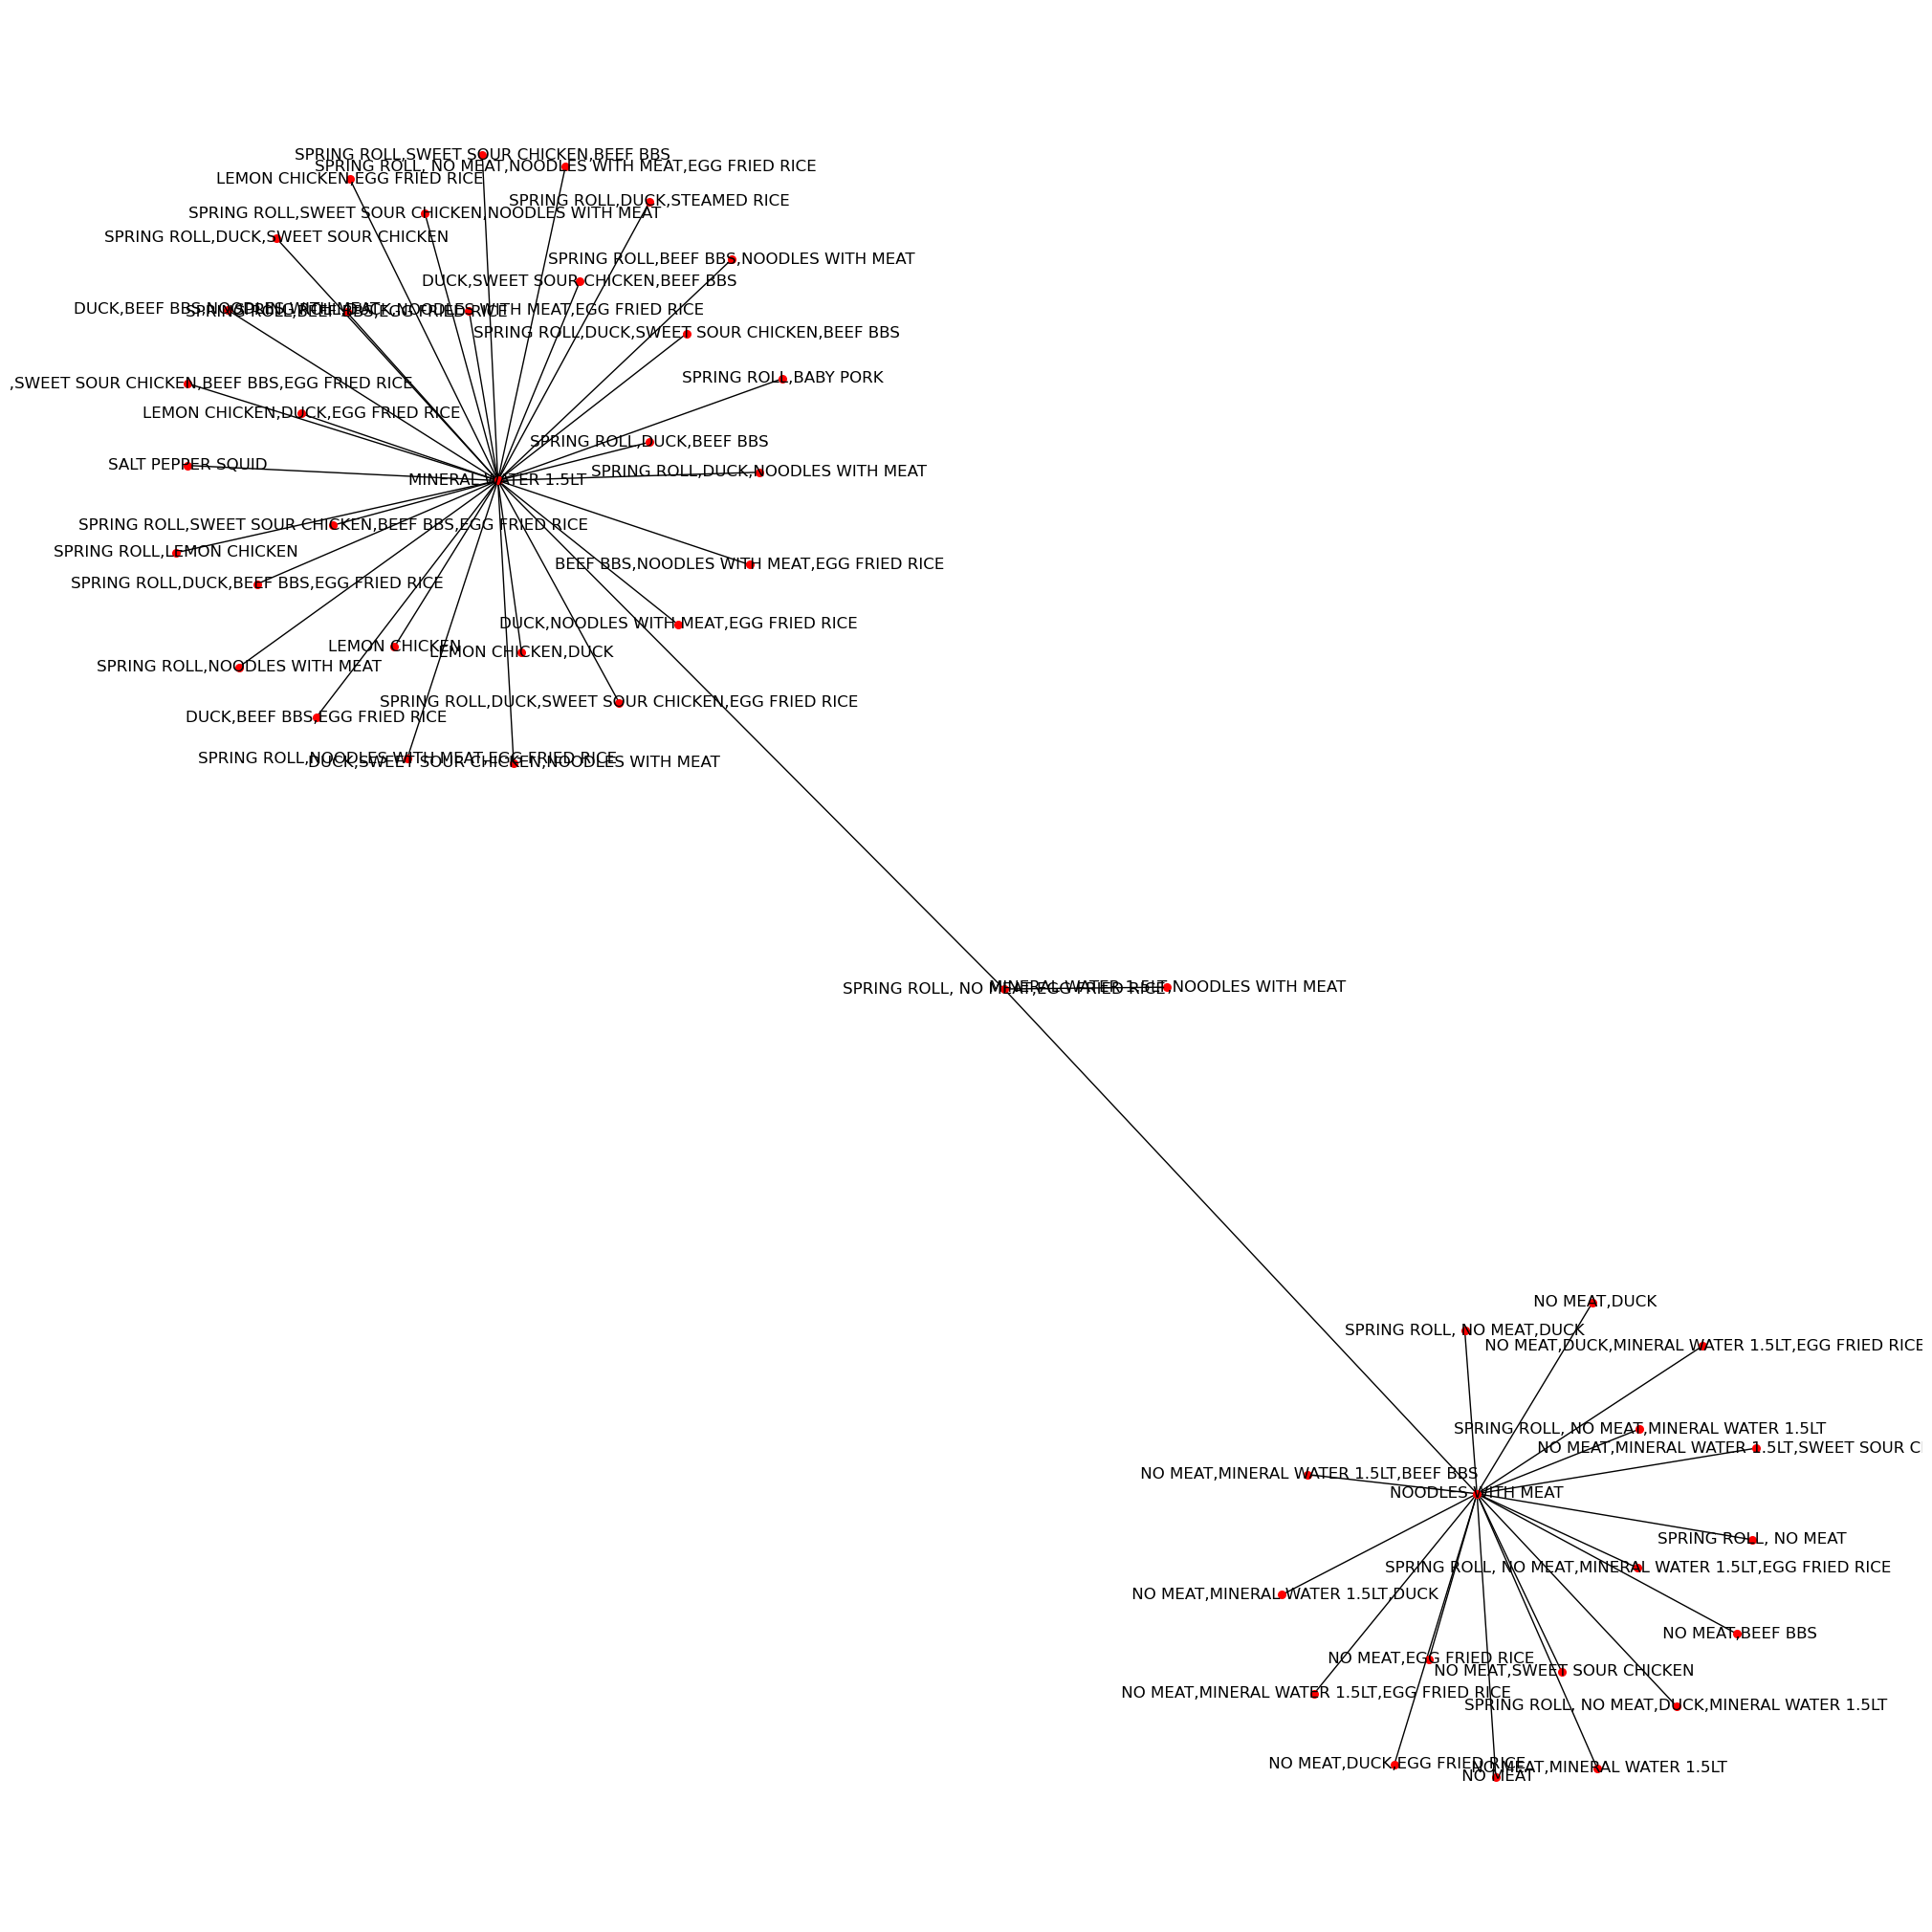

In [185]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [186]:
ds_dineinn[ds_dineinn['Product']==' NO MEAT'].shape[0]

778

In [187]:
ds_dineinn[ds_dineinn['Product']=='NOODLES WITH MEAT'].shape[0]

1154

Here, we see again a strong presence of the products no meat and noodles with meat. Most of the times people asked for no meat they were dine-inn customers. The combinations found in the general case were also found here.

<a class="anchor" id="productcat_dineinn">
    
### 4.3.1.2. Using the ProductCategoryII Variable
    
    
</a>

In [188]:
# Pivot the data
pt = pd.pivot_table(ds_dineinn[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND   MAIN  MAIN IND  \
DocNumber                                                                    
TK0110000012018               False    False        False   True      True   
TK0110000022018                True    False        False   True      True   
TK0110000032018               False    False        False   True     False   
TK0110000042018               False    False         True  False      True   
TK0110000052018               False    False        False  False     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110000012018       False         False                  True   False   
TK0110000022018       False         False                  True    True   
TK0110000032018       False         False                  True   False   
TK0110000042018       False          True                  True   False   
TK0110000052018       False          True                  True   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110000012018     True       True      True         False  
TK0110000022018     True       True      True         False  
TK0110000032018     True      False      True         False  
TK0110000042018    False       True     False          True  
TK0110000052018    False       True     False          True

In [189]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [190]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
119               (ALCOHOLIC DRINKS, OTHERS, STARTERS)   
261        (OTHERS, ALCOHOLIC DRINKS, SIDES, STARTERS)   
243  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHER...   
320  (NON-ALCOHOLIC DRINKS, SIDES, OTHERS, ALCOHOLI...   
298     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
23                          (ALCOHOLIC DRINKS, OTHERS)   
297    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
116                  (ALCOHOLIC DRINKS, SIDES, OTHERS)   
106   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHERS)   
235  (NON-ALCOHOLIC DRINKS, OTHERS, ALCOHOLIC DRINK...   
200                          (STARTERS, SIDES, OTHERS)   
198                           (MAIN, STARTERS, OTHERS)   
224           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
165               (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
250  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
123                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
174           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
167              (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
54                                     (OTHERS, SIDES)   
53                                      (MAIN, OTHERS)   
80                      (NON-ALCOHOLIC DRINKS, OTHERS)   
268  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHER...   
43                      (NON-ALCOHOLIC DRINKS, OTHERS)   
321  (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, ALCOHOLIC...   
57                                  (STARTERS, OTHERS)   
97                                  (STARTERS, OTHERS)   
187            (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
4                                             (OTHERS)   
15                                            (OTHERS)   
63                                   (STARTERS, SIDES)   
130   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHERS)   
236  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
142               (ALCOHOLIC DRINKS, OTHERS, STARTERS)   
262         (MAIN, ALCOHOLIC DRINKS, OTHERS, STARTERS)   
110    (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
277                 (MAIN, MAIN IND, SIDES, SIDES IND)   
180                           (MAIN, SIDES, SIDES IND)   
25                           (ALCOHOLIC DRINKS, SIDES)   
33                          (ALCOHOLIC DRINKS, OTHERS)   
115                   (MAIN, ALCOHOLIC DRINKS, OTHERS)   
325  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHER...   
302           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
208                       (MAIN IND, SIDES, SIDES IND)   
314                 (MAIN, STARTERS, SIDES, SIDES IND)   

                consequents  antecedent support  consequent support   support  \
119                  (MAIN)            0.066173            0.902753  0.065690   
261                  (MAIN)            0.064885            0.902753  0.064402   
243                  (MAIN)            0.063758            0.902753  0.063275   
320                  (MAIN)            0.062792            0.902753  0.062309   
298                 (SIDES)            0.142972            0.633231  0.141523   
23                   (MAIN)            0.072130            0.902753  0.071325   
297                  (MAIN)            0.143133            0.902753  0.141523   
116                  (MAIN)            0.070520            0.902753  0.069715   
106                  (MAIN)            0.068910            0.902753  0.068105   
235                  (MAIN)            0.067622            0.902753  0.066817   
200                  (MAIN)            0.147480            0.902753  0.145709   
198                 (SIDES)            0.147480            0.633231  0.145709   
224                 (SIDES)            0.144904            0.633231  0.143133   
165                 (SIDES)            0.155853            0.633231  0.153920   
250                  (MAIN)            0.220093            0.902753  0.217356   
123                  (MAIN)            0.227339            0.902753  0.224441   
174                  (MAIN)            0.144904        

In [191]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
318                                   (MAIN, MAIN IND)   
309           (NON-ALCOHOLIC DRINKS, SIDES, SIDES IND)   
310             (NON-ALCOHOLIC DRINKS, MAIN, MAIN IND)   
317                                 (SIDES, SIDES IND)   
143                                 (SIDES, SIDES IND)   
140                                   (MAIN, MAIN IND)   
205                  (NON-ALCOHOLIC DRINKS, SIDES IND)   
202                           (MAIN IND, STARTERS IND)   
55                                         (SIDES IND)   
50                            (MAIN IND, STARTERS IND)   
209                                        (SIDES IND)   
198     (MAIN IND, NON-ALCOHOLIC DRINKS, STARTERS IND)   
334                               (MAIN IND, STARTERS)   
325            (NON-ALCOHOLIC DRINKS, MAIN, SIDES IND)   
333                                  (MAIN, SIDES IND)   
326         (NON-ALCOHOLIC DRINKS, STARTERS, MAIN IND)   
149                                  (MAIN, SIDES IND)   
150                               (MAIN IND, STARTERS)   
316                                  (MAIN IND, SIDES)   
311            (NON-ALCOHOLIC DRINKS, MAIN, SIDES IND)   
308            (NON-ALCOHOLIC DRINKS, MAIN IND, SIDES)   
319                                  (MAIN, SIDES IND)   
332                                   (MAIN, MAIN IND)   
327        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES IND)   
324             (NON-ALCOHOLIC DRINKS, MAIN, MAIN IND)   
335                              (STARTERS, SIDES IND)   
141                                  (MAIN, SIDES IND)   
142                                  (MAIN IND, SIDES)   
151                              (STARTERS, SIDES IND)   
148                                   (MAIN, MAIN IND)   
204               (NON-ALCOHOLIC DRINKS, STARTERS IND)   
203                              (MAIN IND, SIDES IND)   
54                                      (STARTERS IND)   
51                               (MAIN IND, SIDES IND)   
199        (MAIN IND, NON-ALCOHOLIC DRINKS, SIDES IND)   
208                                     (STARTERS IND)   
9                                          (SIDES IND)   
8                                       (STARTERS IND)   
64                (STARTERS IND, NON-ALCOHOLIC DRINKS)   
67                                         (SIDES IND)   
65                   (NON-ALCOHOLIC DRINKS, SIDES IND)   
66                                      (STARTERS IND)   
100                                         (MAIN IND)   
95   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   

                                           consequents  antecedent support  \
318           (NON-ALCOHOLIC DRINKS, SIDES, SIDES IND)            0.127999   
309                                   (MAIN, MAIN IND)            0.073901   
310                                 (SIDES, SIDES IND)            0.124296   
317             (NON-ALCOHOLIC DRINKS, MAIN, MAIN IND)            0.076638   
143                                   (MAIN, MAIN IND)            0.076638   
140                                 (SIDES, SIDES IND)            0.127999   
205                           (MAIN IND, STARTERS IND)            0.154081   
202                  (NON-ALCOHOLIC DRINKS, SIDES IND)            0.077443   
55                            (MAIN IND, STARTERS IND)            0.162776   
50                                         (SIDES IND)            0.077443   
209     (MAIN IND, NON-ALCOHOLIC DRINKS, STARTERS IND)            0.162776   
198                                        (SIDES IND)            0.073579   
334            (NON-ALCOHOLIC DRINKS, MAIN, SIDES IND)            0.104975   
325                               (MAIN IND, STARTERS)            0.091129   
333         (NON-ALCOHOLIC DRINKS, STARTERS, MAIN IND)            0.094027   
326                                  (MAIN, SIDES IND)            0.101916   
149                               (MAIN IND, STARTERS)            0.094027   
150                         

In [192]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [193]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                           itemsets  length
10   0.350024                           (MAIN, ALCOHOLIC DRINKS)       2
12   0.369667           (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)       2
14   0.258735                          (ALCOHOLIC DRINKS, SIDES)       2
16   0.246981                       (ALCOHOLIC DRINKS, STARTERS)       2
19   0.868459                       (MAIN, NON-ALCOHOLIC DRINKS)       2
21   0.616004                                      (MAIN, SIDES)       2
23   0.572372                                   (MAIN, STARTERS)       2
32   0.610852                      (NON-ALCOHOLIC DRINKS, SIDES)       2
34   0.576719                   (NON-ALCOHOLIC DRINKS, STARTERS)       2
39   0.545001                                  (STARTERS, SIDES)       2
45   0.335051     (MAIN, ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS)       3
47   0.253099                    (MAIN, ALCOHOLIC DRINKS, SIDES)       3
48   0.238770                 (MAIN, ALCOHOLIC DRINKS, STARTERS)       3
54   0.250040    (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)       3
56   0.238287  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...       3
59   0.227339                (ALCOHOLIC DRINKS, SIDES, STARTERS)       3
65   0.595717                (MAIN, NON-ALCOHOLIC DRINKS, SIDES)       3
67   0.554822             (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)       3
72   0.535341                            (MAIN, STARTERS, SIDES)       3
85   0.528578            (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)       3
95   0.244888  (MAIN, ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS,...       4
96   0.230720  (MAIN, ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS,...       4
99   0.224441          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)       4
104  0.220093  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...       4
115  0.519562      (MAIN, STARTERS, NON-ALCOHOLIC DRINKS, SIDES)       4
127  0.217356  (NON-ALCOHOLIC DRINKS, SIDES, MAIN, ALCOHOLIC ...       5

In [194]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1.6)]

antecedents  \
323  (NON-ALCOHOLIC DRINKS, OTHERS, ALCOHOLIC DRINK...   
245   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHERS)   
324  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
270   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHERS)   
301               (NON-ALCOHOLIC DRINKS, MAIN, OTHERS)   
227                     (NON-ALCOHOLIC DRINKS, OTHERS)   
329   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, OTHERS)   
201                                     (MAIN, OTHERS)   
264                   (MAIN, ALCOHOLIC DRINKS, OTHERS)   
143                         (ALCOHOLIC DRINKS, OTHERS)   
99                                            (OTHERS)   
306                     (NON-ALCOHOLIC DRINKS, OTHERS)   
266                         (ALCOHOLIC DRINKS, OTHERS)   
128  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
204                                           (OTHERS)   
78                            (MAIN IND, STARTERS IND)   
219     (MAIN IND, NON-ALCOHOLIC DRINKS, STARTERS IND)   
308                                     (MAIN, OTHERS)   
331                   (MAIN, ALCOHOLIC DRINKS, OTHERS)   
230                                           (OTHERS)   
28                       (ALCOHOLIC DRINKS, SIDES IND)   
273                         (ALCOHOLIC DRINKS, OTHERS)   
221    (NON-ALCOHOLIC DRINKS, SIDES IND, STARTERS IND)   
333                         (ALCOHOLIC DRINKS, OTHERS)   
310                                           (OTHERS)   
79                           (STARTERS IND, SIDES IND)   
69                   (NON-ALCOHOLIC DRINKS, SIDES IND)   
222                           (MAIN IND, STARTERS IND)   
8                                          (SIDES IND)   
129                      (ALCOHOLIC DRINKS, SIDES IND)   
217        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES IND)   
77                               (STARTERS, SIDES IND)   
223                          (STARTERS IND, SIDES IND)   
209           (NON-ALCOHOLIC DRINKS, SIDES, SIDES IND)   
70                                         (SIDES IND)   
149            (MAIN, NON-ALCOHOLIC DRINKS, SIDES IND)   
274     (NON-ALCOHOLIC DRINKS, MAIN, SIDES, SIDES IND)   
40                                   (MAIN, SIDES IND)   
156                           (MAIN, SIDES, SIDES IND)   
74                                  (SIDES, SIDES IND)   

                                       consequents  antecedent support  \
323                               (MAIN, STARTERS)            0.067622   
245                               (MAIN, STARTERS)            0.068910   
324                              (STARTERS, SIDES)            0.068105   
270                              (STARTERS, SIDES)            0.068910   
301                              (STARTERS, SIDES)            0.155853   
227                              (STARTERS, SIDES)            0.158268   
329                        (MAIN, STARTERS, SIDES)            0.068910   
201                              (STARTERS, SIDES)            0.161166   
264                              (STARTERS, SIDES)            0.071325   
143                              (STARTERS, SIDES)            0.072130   
99                               (STARTERS, SIDES)            0.164064   
306                        (MAIN, STARTERS, SIDES)            0.158268   
266                        (MAIN, STARTERS, SIDES)            0.072130   
128                                     (MAIN IND)            0.068266   
204                        (MAIN, STARTERS, SIDES)            0.164064   
78                                     (SIDES IND)            0.077443   
219                                    (SIDES IND)            0.073579   
308        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)            0.161166   
331        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)            0.071325   
230        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)            0.164064   
28                                      (MAIN IND)            0.072774   
273        (NON-ALCOHOLIC DRINKS, ST

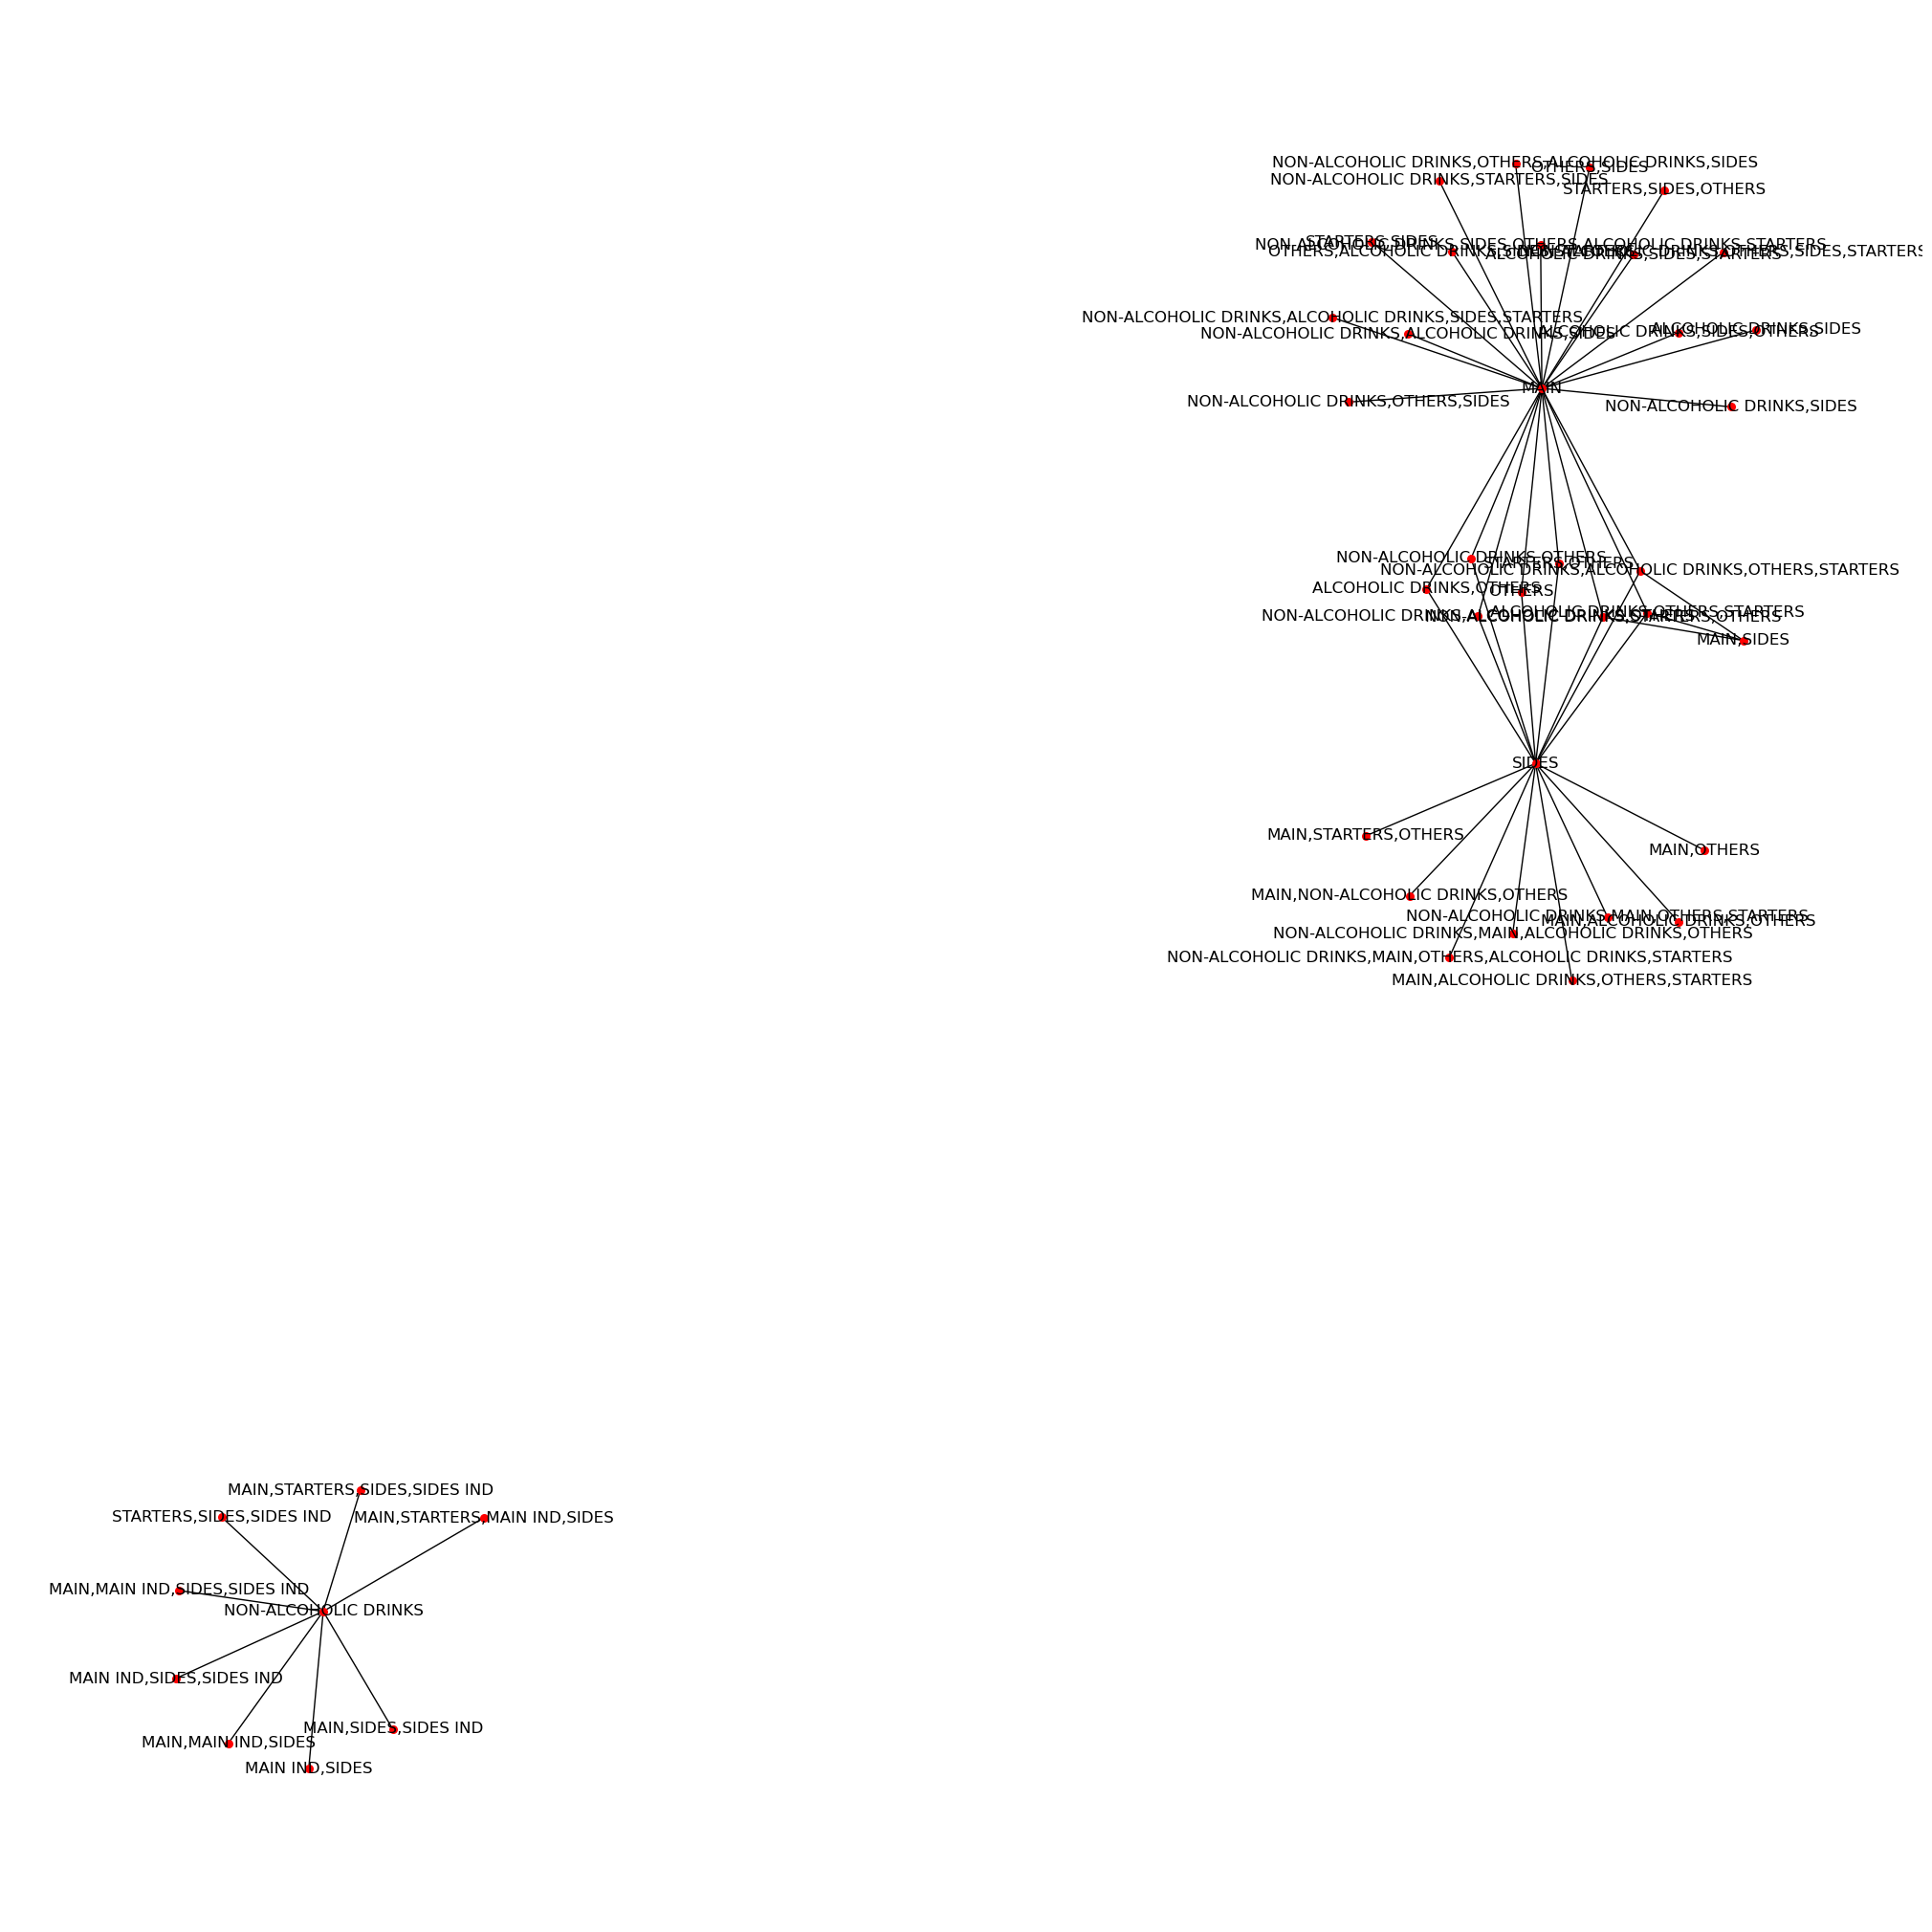

In [195]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [196]:
ds_imp['ProductCategoryII'].value_counts()

MAIN                    19806
STARTERS                13817
SIDES                   10445
NON-ALCOHOLIC DRINKS     9265
SIDES IND                3027
MAIN IND                 3016
ALCOHOLIC DRINKS         2872
OTHERS                   2614
STARTERS IND             1653
MAIN VEG IND              893
MAIN VEG                  453
DESSERT IND                59
DESSERT                    56
Name: ProductCategoryII, dtype: int64

In [197]:
ds_imp[ds_imp['ProductCategoryII']=='OTHERS']['Product'].unique()

array([' NO MEAT', ' EXTRA SAUCE', ' WITH BEEF', ' WITH CHICKEN',
       ' WITH SHRIMP', ' EXTRA PANCAKES', ' EXTRA SALAD', ' NO MUSHROOMS',
       ' NO ONION', ' WITH PORK', ' NO EGG', nan, ' NO BEANSPROUTS',
       ' NO SAUCE', ' NO CHILLY', ' NO PRAWNS', ' NO PORK',
       ' NO BABY CORN'], dtype=object)

We see again combinations between side and main in indian dishes. We also see that people who order others, alcoholic and non-alcoholic drinks also tend to ask for starters and main (rule 245). The most ordered categories are main and starters even when you sum both alcholic and non-alcoholic drinks and the category others generally implies that food was ordered so that association is not unexpected.

<a class="anchor" id="delivery">
    
## 4.3.2. Delivery
    
    
</a>

In [198]:
ds_delivery = ds_imp[ds_imp['IsDelivery']==1].copy()

<a class="anchor" id="product_delivery">
    
### 4.3.2.1. Using the Product Variable
    
    
</a>

In [199]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_delivery[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product            EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE  \
DocNumber                                                       
TKD0310000012018            False         False         False   
TKD0310000022018            False         False         False   
TKD0310000032018            False         False         False   
TKD0310000042018            False         False         False   
TKD0310000052018            False         False         False   

Product            NO BEANSPROUTS   NO CHILLY   NO EGG   NO MEAT  \
DocNumber                                                          
TKD0310000012018            False       False    False     False   
TKD0310000022018            False       False    False     False   
TKD0310000032018            False       False    False     False   
TKD0310000042018            False       False    False     False   
TKD0310000052018            False       False    False     False   

Product            NO MUSHROOMS   NO ONION   NO PORK  ...  SZECHUAN PRAWNS  \
DocNumber                                             ...                    
TKD0310000012018          False      False     False  ...            False   
TKD0310000022018          False      False     False  ...            False   
TKD0310000032018          False      False     False  ...            False   
TKD0310000042018          False      False     False  ...            False   
TKD0310000052018          False      False     False  ...            False   

Product           TANDOORI CHICK  TANDOORI TILL JHEENGA  TANDOORI TRILOGY  \
DocNumber                                                                   
TKD0310000012018           False                  False              True   
TKD0310000022018           False                  False             False   
TKD0310000032018           False                  False             False   
TKD0310000042018           False                  False             False   
TKD0310000052018           False                  False              True   

Product           TEMPURA MAKI  TIN JIAN STYLE CHICKEN  VEG BBS  VEG RICE  \
DocNumber                                                                   
TKD0310000012018         False                   False    False     False   
TKD0310000022018         False                   False    False     False   
TKD0310000032018         False                   False    False     False   
TKD0310000042018         False                   False    False     False   
TKD0310000052018         False                   False    False     False   

Product           VOLCANO MAKI  YELLOW DAL DHABA  
DocNumber                                         
TKD0310000012018         False             False  
TKD0310000022018         False             False  
TKD0310000032018         False             False  
TKD0310000042018         False             False  
TKD0310000052018         False             False  

[5 rows x 135 columns]

In [200]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [201]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents              consequents  \
4                       ( NO MEAT)      (NOODLES WITH MEAT)   
5  ( EXTRA SAUCE,  EXTRA PANCAKES)                   (DUCK)   
2                ( EXTRA PANCAKES)                   (DUCK)   
3                   ( EXTRA SAUCE)                   (DUCK)   
6             ( EXTRA SAUCE, DUCK)        ( EXTRA PANCAKES)   
7          ( EXTRA PANCAKES, DUCK)           ( EXTRA SAUCE)   
1                ( EXTRA PANCAKES)           ( EXTRA SAUCE)   
9                ( EXTRA PANCAKES)     ( EXTRA SAUCE, DUCK)   
0                   ( EXTRA SAUCE)        ( EXTRA PANCAKES)   
8                   ( EXTRA SAUCE)  ( EXTRA PANCAKES, DUCK)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.062680            0.126392  0.062680    1.000000  7.911909   
5            0.064124            0.439588  0.063505    0.990354  2.252915   
2            0.085773            0.439588  0.083711    0.975962  2.220175   
3            0.090722            0.439588  0.082062    0.904545  2.057714   
6            0.082062            0.085773  0.063505    0.773869  9.022275   
7            0.083711            0.090722  0.063505    0.758621  8.362069   
1            0.085773            0.090722  0.064124    0.747596  8.240549   
9            0.085773            0.082062  0.063505    0.740385  9.022275   
0            0.090722            0.085773  0.064124    0.706818  8.240549   
8            0.090722            0.083711  0.063505    0.700000  8.362069   

   leverage  conviction  
4  0.054758         inf  
5  0.035317   58.096082  
2  0.046007   23.313155  
3  0.042182    5.870987  
6  0.056466    4.042914  
7  0.055911    3.767010  
1  0.056342    3.602474  
9  0.056466    3.535762  
0  0.056342    3.118293  
8  0.055911    3.054296

In [202]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
13                     ( EXTRA SAUCE, DUCK)   
16                        ( EXTRA PANCAKES)   
15                           ( EXTRA SAUCE)   
14                  ( EXTRA PANCAKES, DUCK)   
0                            ( EXTRA SAUCE)   
1                         ( EXTRA PANCAKES)   
6                                ( NO MEAT)   
7                       (NOODLES WITH MEAT)   
11                             (JIRA PULAO)   
10                                   (NAAN)   
12          ( EXTRA SAUCE,  EXTRA PANCAKES)   
17                                   (DUCK)   
3                                    (DUCK)   
2                         ( EXTRA PANCAKES)   
5                                    (DUCK)   
4                            ( EXTRA SAUCE)   
30               (DUCK, SWEET SOUR CHICKEN)   
29            (SPRING ROLL, EGG FRIED RICE)   
18               (DUCK, SWEET SOUR CHICKEN)   
21                         (EGG FRIED RICE)   
26  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
33                         (EGG FRIED RICE)   
31                   (DUCK, EGG FRIED RICE)   
28        (SPRING ROLL, SWEET SOUR CHICKEN)   
9                          (EGG FRIED RICE)   
8                      (SWEET SOUR CHICKEN)   
24                     (SWEET SOUR CHICKEN)   
23            (SPRING ROLL, EGG FRIED RICE)   
20                     (SWEET SOUR CHICKEN)   
19                   (DUCK, EGG FRIED RICE)   
32                     (SWEET SOUR CHICKEN)   
27      (SPRING ROLL, DUCK, EGG FRIED RICE)   
25                         (EGG FRIED RICE)   
22        (SPRING ROLL, SWEET SOUR CHICKEN)   

                                consequents  antecedent support  \
13                        ( EXTRA PANCAKES)            0.082062   
16                     ( EXTRA SAUCE, DUCK)            0.085773   
15                  ( EXTRA PANCAKES, DUCK)            0.090722   
14                           ( EXTRA SAUCE)            0.083711   
0                         ( EXTRA PANCAKES)            0.090722   
1                            ( EXTRA SAUCE)            0.085773   
6                       (NOODLES WITH MEAT)            0.062680   
7                                ( NO MEAT)            0.126392   
11                                   (NAAN)            0.097526   
10                             (JIRA PULAO)            0.119794   
12                                   (DUCK)            0.064124   
17          ( EXTRA SAUCE,  EXTRA PANCAKES)            0.439588   
3                         ( EXTRA PANCAKES)            0.439588   
2                                    (DUCK)            0.085773   
5                            ( EXTRA SAUCE)            0.439588   
4                                    (DUCK)            0.090722   
30            (SPRING ROLL, EGG FRIED RICE)            0.177938   
29               (DUCK, SWEET SOUR CHICKEN)            0.175876   
18                         (EGG FRIED RICE)            0.177938   
21               (DUCK, SWEET SOUR CHICKEN)            0.414021   
26                         (EGG FRIED RICE)            0.079381   
33  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)            0.414021   
31        (SPRING ROLL, SWEET SOUR CHICKEN)            0.228454   
28                   (DUCK, EGG FRIED RICE)            0.147629   
9                      (SWEET SOUR CHICKEN)            0.414021   
8                          (EGG FRIED RICE)            0.336907   
24            (SPRING ROLL, EGG FRIED RICE)            0.336907   
23                     (SWEET SOUR CHICKEN)            0.175876   
20                   (DUCK, EGG FRIED RICE)            0.336907   
19                     (SWEET SOUR CHICKEN)            0.228454   
32      (SPRING ROLL, DUCK, EGG FRIED RICE)            0.336907   
27                     (SWEET SOUR CHICKEN)            0.103918   
25        (SPRING ROLL, SWEET SOUR CHICKEN)            0.414021   
22                         (EGG FRIED RICE)            0.147629   

    consequent support   support  confid

In [203]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [204]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.05)]

support                                           itemsets  length
25  0.064124                    ( EXTRA SAUCE,  EXTRA PANCAKES)       2
26  0.083711                            ( EXTRA PANCAKES, DUCK)       2
27  0.082062                               ( EXTRA SAUCE, DUCK)       2
28  0.062680                      ( NO MEAT, NOODLES WITH MEAT)       2
29  0.102062                                   (DUCK, BEEF BBS)       2
30  0.110103                         (BEEF BBS, EGG FRIED RICE)       2
31  0.082474                            (SPRING ROLL, BEEF BBS)       2
32  0.074021                     (SWEET SOUR CHICKEN, BEEF BBS)       2
33  0.228454                             (DUCK, EGG FRIED RICE)       2
34  0.054227                              (LEMON CHICKEN, DUCK)       2
35  0.055258                          (DUCK, NOODLES WITH MEAT)       2
36  0.068660                              (DUCK, SESAME PRAWNS)       2
37  0.051959                  (SPECIAL MONTPARNASSE RICE, DUCK)       2
38  0.190103                                (SPRING ROLL, DUCK)       2
39  0.069897                               (DUCK, STEAMED RICE)       2
40  0.177938                         (DUCK, SWEET SOUR CHICKEN)       2
41  0.064330                    (LEMON CHICKEN, EGG FRIED RICE)       2
42  0.057938                (NOODLES WITH MEAT, EGG FRIED RICE)       2
43  0.065361                    (SESAME PRAWNS, EGG FRIED RICE)       2
44  0.175876                      (SPRING ROLL, EGG FRIED RICE)       2
45  0.216289               (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
46  0.052990                                 (NAAN, JIRA PULAO)       2
47  0.057732                   (SPRING ROLL, NOODLES WITH MEAT)       2
48  0.052165            (SWEET SOUR CHICKEN, NOODLES WITH MEAT)       2
49  0.067423                       (SPRING ROLL, SESAME PRAWNS)       2
50  0.052371           (SPRING ROLL, SPECIAL MONTPARNASSE RICE)       2
51  0.058144                        (SPRING ROLL, STEAMED RICE)       2
52  0.147629                  (SPRING ROLL, SWEET SOUR CHICKEN)       2
53  0.051134                 (STEAMED RICE, SWEET SOUR CHICKEN)       2
54  0.063505              ( EXTRA SAUCE,  EXTRA PANCAKES, DUCK)       3
55  0.062887                   (DUCK, BEEF BBS, EGG FRIED RICE)       3
56  0.103918                (SPRING ROLL, DUCK, EGG FRIED RICE)       3
57  0.118763         (DUCK, SWEET SOUR CHICKEN, EGG FRIED RICE)       3
58  0.079381            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)       3
59  0.091753  (SPRING ROLL, SWEET SOUR CHICKEN, EGG FRIED RICE)       3
60  0.052784  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, EGG FR...       4

In [205]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents              consequents  \
4                       ( NO MEAT)      (NOODLES WITH MEAT)   
5  ( EXTRA SAUCE,  EXTRA PANCAKES)                   (DUCK)   
2                ( EXTRA PANCAKES)                   (DUCK)   
3                   ( EXTRA SAUCE)                   (DUCK)   
6             ( EXTRA SAUCE, DUCK)        ( EXTRA PANCAKES)   
7          ( EXTRA PANCAKES, DUCK)           ( EXTRA SAUCE)   
1                ( EXTRA PANCAKES)           ( EXTRA SAUCE)   
9                ( EXTRA PANCAKES)     ( EXTRA SAUCE, DUCK)   
0                   ( EXTRA SAUCE)        ( EXTRA PANCAKES)   
8                   ( EXTRA SAUCE)  ( EXTRA PANCAKES, DUCK)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.062680            0.126392  0.062680    1.000000  7.911909   
5            0.064124            0.439588  0.063505    0.990354  2.252915   
2            0.085773            0.439588  0.083711    0.975962  2.220175   
3            0.090722            0.439588  0.082062    0.904545  2.057714   
6            0.082062            0.085773  0.063505    0.773869  9.022275   
7            0.083711            0.090722  0.063505    0.758621  8.362069   
1            0.085773            0.090722  0.064124    0.747596  8.240549   
9            0.085773            0.082062  0.063505    0.740385  9.022275   
0            0.090722            0.085773  0.064124    0.706818  8.240549   
8            0.090722            0.083711  0.063505    0.700000  8.362069   

   leverage  conviction  
4  0.054758         inf  
5  0.035317   58.096082  
2  0.046007   23.313155  
3  0.042182    5.870987  
6  0.056466    4.042914  
7  0.055911    3.767010  
1  0.056342    3.602474  
9  0.056466    3.535762  
0  0.056342    3.118293  
8  0.055911    3.054296

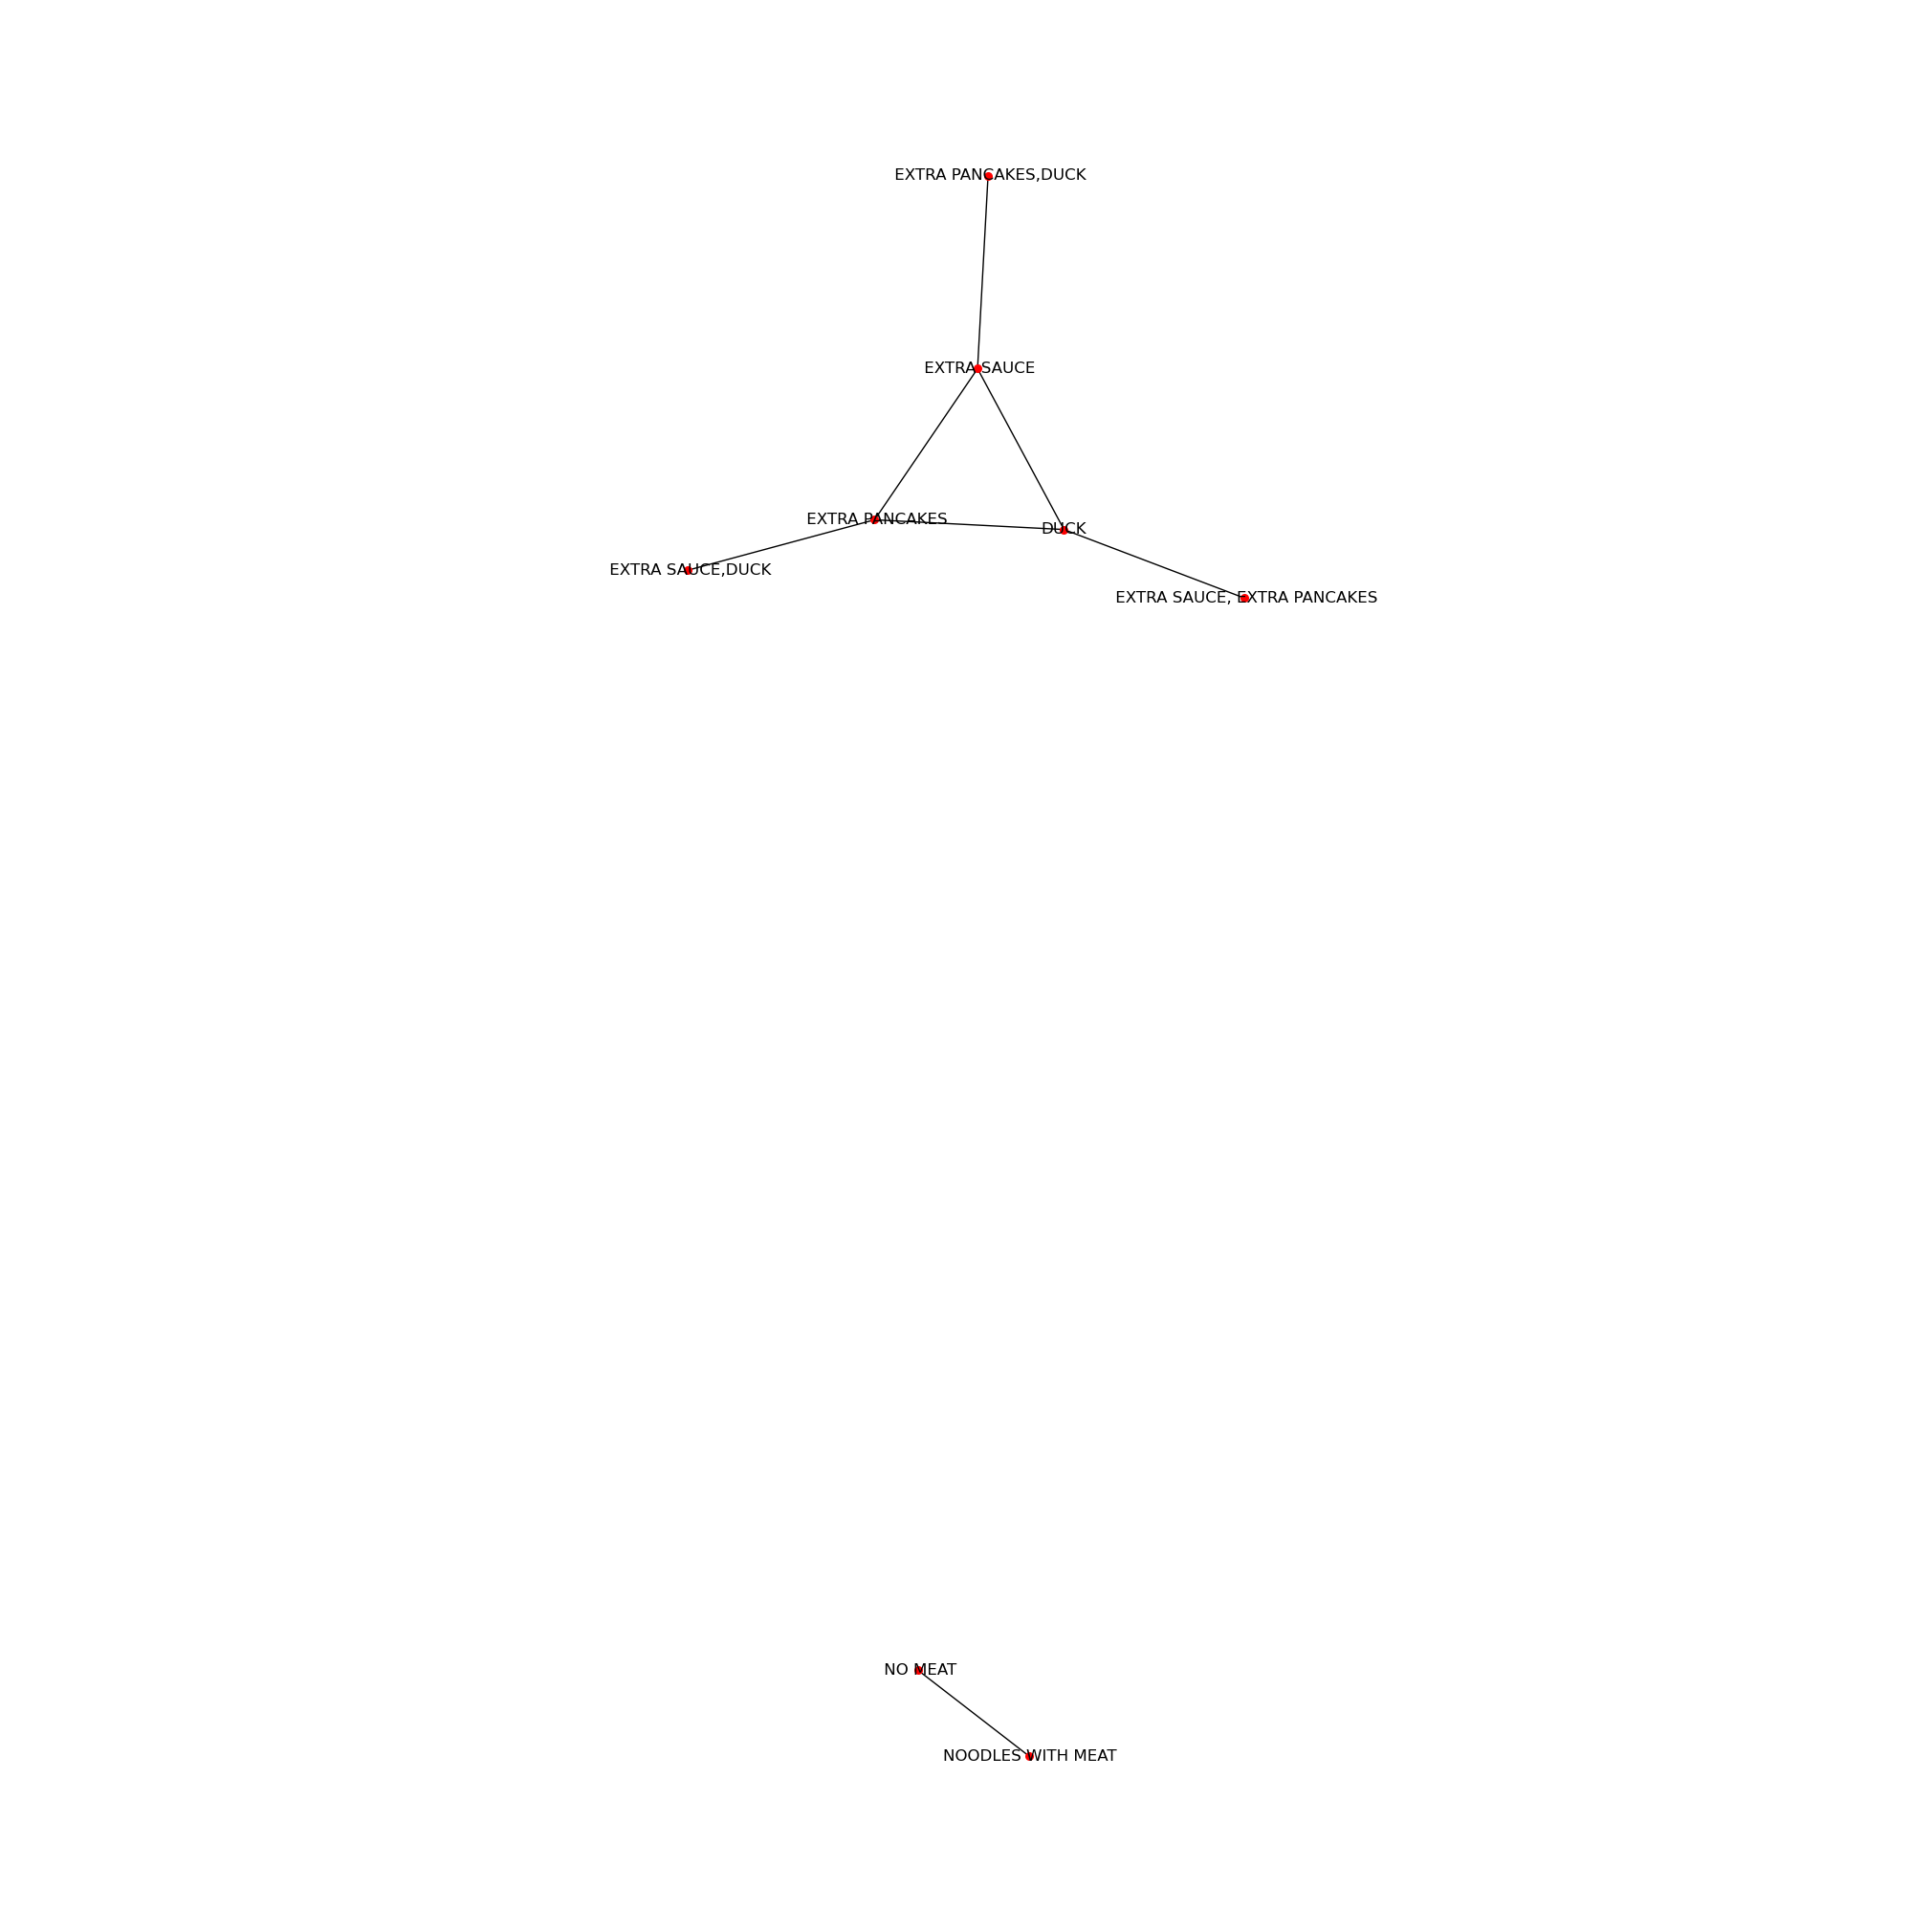

In [206]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [207]:
ds_imp[ds_imp['Product']==' EXTRA PANCAKES']['IsDelivery'].value_counts()

1    416
0      7
Name: IsDelivery, dtype: int64

In [208]:
ds_imp[ds_imp['Product']==' EXTRA SAUCE']['IsDelivery'].value_counts()

1    440
0      5
Name: IsDelivery, dtype: int64

Customers who ask for a delivery tend to ask for more extras (extra pancakes, extra sauce). Both extra pancakes and extra sauce tend to be strongly associated (rules 0 and 1) and used in duck. We could consider joining both extra pancakes and extra sauce to the duck, possibly as an offer to promote the delivery part of the business.

<a class="anchor" id="productcat_delivery">
    
### 4.3.2.2. Using the ProductCategoryII Variable
    
    
</a>

In [209]:
# Pivot the data
pt = pd.pivot_table(ds_delivery[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS   MAIN  MAIN IND  MAIN VEG  MAIN VEG IND  \
DocNumber                                                                      
TKD0310000012018              False   True     False     False         False   
TKD0310000022018              False   True     False     False         False   
TKD0310000032018              False  False     False     False         False   
TKD0310000042018              False   True     False     False         False   
TKD0310000052018              False  False      True     False         False   

ProductCategoryII  NON-ALCOHOLIC DRINKS  OTHERS  SIDES  SIDES IND  STARTERS  \
DocNumber                                                                     
TKD0310000012018                  False   False   True      False      True   
TKD0310000022018                  False   False   True      False      True   
TKD0310000032018                  False   False   True      False      True   
TKD0310000042018                  False   False   True      False      True   
TKD0310000052018                  False   False  False       True     False   

ProductCategoryII  STARTERS IND  
DocNumber                        
TKD0310000012018           True  
TKD0310000022018          False  
TKD0310000032018          False  
TKD0310000042018          False  
TKD0310000052018           True

In [210]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [211]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents              consequents  antecedent support  \
30   (MAIN, STARTERS, OTHERS)                  (SIDES)            0.144948   
13             (MAIN, OTHERS)                  (SIDES)            0.163093   
19           (MAIN, STARTERS)                  (SIDES)            0.610722   
21          (STARTERS, SIDES)                   (MAIN)            0.611959   
2                     (SIDES)                   (MAIN)            0.751546   
14            (OTHERS, SIDES)                   (MAIN)            0.168660   
32  (STARTERS, SIDES, OTHERS)                   (MAIN)            0.151959   
28            (OTHERS, SIDES)               (STARTERS)            0.168660   
9                    (OTHERS)               (STARTERS)            0.189897   
31      (MAIN, OTHERS, SIDES)               (STARTERS)            0.153196   
25   (MAIN IND, STARTERS IND)              (SIDES IND)            0.063505   
27         (STARTERS, OTHERS)                  (SIDES)            0.170309   
16             (MAIN, OTHERS)               (STARTERS)            0.163093   
8                    (OTHERS)                  (SIDES)            0.189897   
10                 (STARTERS)                  (SIDES)            0.704124   
4                  (STARTERS)                   (MAIN)            0.704124   
1                      (MAIN)                  (SIDES)            0.794227   
7              (MAIN VEG IND)              (SIDES IND)            0.062887   
0                    (OTHERS)                   (MAIN)            0.189897   
17         (STARTERS, OTHERS)                   (MAIN)            0.170309   
33             (MAIN, OTHERS)        (STARTERS, SIDES)            0.163093   
5                  (MAIN IND)              (SIDES IND)            0.170309   
20              (MAIN, SIDES)               (STARTERS)            0.687835   
11                    (SIDES)               (STARTERS)            0.751546   
35            (OTHERS, SIDES)         (MAIN, STARTERS)            0.168660   
15                   (OTHERS)            (MAIN, SIDES)            0.189897   
34         (STARTERS, OTHERS)            (MAIN, SIDES)            0.170309   
29                   (OTHERS)        (STARTERS, SIDES)            0.189897   
23                 (STARTERS)            (MAIN, SIDES)            0.704124   
6                 (SIDES IND)               (MAIN IND)            0.184536   
3                      (MAIN)               (STARTERS)            0.794227   
18                   (OTHERS)         (MAIN, STARTERS)            0.189897   
24                    (SIDES)         (MAIN, STARTERS)            0.751546   
26  (STARTERS IND, SIDES IND)               (MAIN IND)            0.077113   
12             (STARTERS IND)              (SIDES IND)            0.106392   
36                   (OTHERS)  (MAIN, STARTERS, SIDES)            0.189897   
22                     (MAIN)        (STARTERS, SIDES)            0.794227   

    consequent support   support  confidence      lift  leverage  conviction  
30            0.751546  0.137320    0.947368  1.260559  0.028384    4.720619  
13            0.751546  0.153196    0.939317  1.249846  0.030624    4.094308  
19            0.751546  0.562887    0.921675  1.226371  0.103901    3.172067  
21            0.794227  0.562887    0.919811  1.158122  0.076853    2.566113  
2             0.794227  0.687835    0.915226  1.152349  0.090937    2.427325  
14            0.794227  0.153196    0.908313  1.143644  0.019242    2.244300  
32            0.794227  0.137320    0.903664  1.137790  0.016630    2.135984  
28            0.704124  0.151959    0.900978  1.279573  0.033201    2.987985  
9             0.704124  0.170309    0.896851  1.273713  0.036598    2.868443  
31            0.704124  0.137320    0.896366  1.273024  0.029451    2.855014  
25            0.184536  0.056907    0.896104  4.855982  0.045188    7.848840  
27            0.751546  0.151959    0.892252  1.187221  0.023963    2.305873  
16            0.704124  0.

In [212]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents                consequents  antecedent support  \
8    (MAIN IND, STARTERS IND)                (SIDES IND)            0.063505   
13                (SIDES IND)   (MAIN IND, STARTERS IND)            0.184536   
4              (MAIN VEG IND)                (SIDES IND)            0.062887   
5                 (SIDES IND)             (MAIN VEG IND)            0.184536   
0                  (MAIN IND)                (SIDES IND)            0.170309   
1                 (SIDES IND)                 (MAIN IND)            0.184536   
10  (STARTERS IND, SIDES IND)                 (MAIN IND)            0.077113   
11                 (MAIN IND)  (STARTERS IND, SIDES IND)            0.170309   
6              (STARTERS IND)                (SIDES IND)            0.106392   
7                 (SIDES IND)             (STARTERS IND)            0.184536   
12             (STARTERS IND)      (MAIN IND, SIDES IND)            0.106392   
9       (MAIN IND, SIDES IND)             (STARTERS IND)            0.142887   
2                  (MAIN IND)             (STARTERS IND)            0.170309   
3              (STARTERS IND)                 (MAIN IND)            0.106392   

    consequent support   support  confidence      lift  leverage  conviction  
8             0.184536  0.056907    0.896104  4.855982  0.045188    7.848840  
13            0.063505  0.056907    0.308380  4.855982  0.045188    1.354060  
4             0.184536  0.054021    0.859016  4.655005  0.042416    5.784105  
5             0.062887  0.054021    0.292737  4.655005  0.042416    1.324987  
0             0.184536  0.142887    0.838983  4.546444  0.111458    5.064460  
1             0.170309  0.142887    0.774302  4.546444  0.111458    3.676105  
10            0.170309  0.056907    0.737968  4.333105  0.043774    3.166371  
11            0.077113  0.056907    0.334140  4.333105  0.043774    1.386008  
6             0.184536  0.077113    0.724806  3.927721  0.057480    2.963235  
7             0.106392  0.077113    0.417877  3.927721  0.057480    1.535085  
12            0.142887  0.056907    0.534884  3.743414  0.041705    1.842794  
9             0.106392  0.056907    0.398268  3.743414  0.041705    1.485061  
2             0.106392  0.063505    0.372881  3.504796  0.045386    1.424943  
3             0.170309  0.063505    0.596899  3.504796  0.045386    2.058271

In [213]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [214]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                 itemsets  length
10  0.687835            (MAIN, SIDES)       2
12  0.610722         (MAIN, STARTERS)       2
21  0.611959        (STARTERS, SIDES)       2
26  0.562887  (MAIN, STARTERS, SIDES)       3

In [215]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  consequents  antecedent support  \
25   (MAIN IND, STARTERS IND)  (SIDES IND)            0.063505   
7              (MAIN VEG IND)  (SIDES IND)            0.062887   
5                  (MAIN IND)  (SIDES IND)            0.170309   
6                 (SIDES IND)   (MAIN IND)            0.184536   
26  (STARTERS IND, SIDES IND)   (MAIN IND)            0.077113   
12             (STARTERS IND)  (SIDES IND)            0.106392   

    consequent support   support  confidence      lift  leverage  conviction  
25            0.184536  0.056907    0.896104  4.855982  0.045188    7.848840  
7             0.184536  0.054021    0.859016  4.655005  0.042416    5.784105  
5             0.184536  0.142887    0.838983  4.546444  0.111458    5.064460  
6             0.170309  0.142887    0.774302  4.546444  0.111458    3.676105  
26            0.170309  0.056907    0.737968  4.333105  0.043774    3.166371  
12            0.184536  0.077113    0.724806  3.927721  0.057480    2.963235

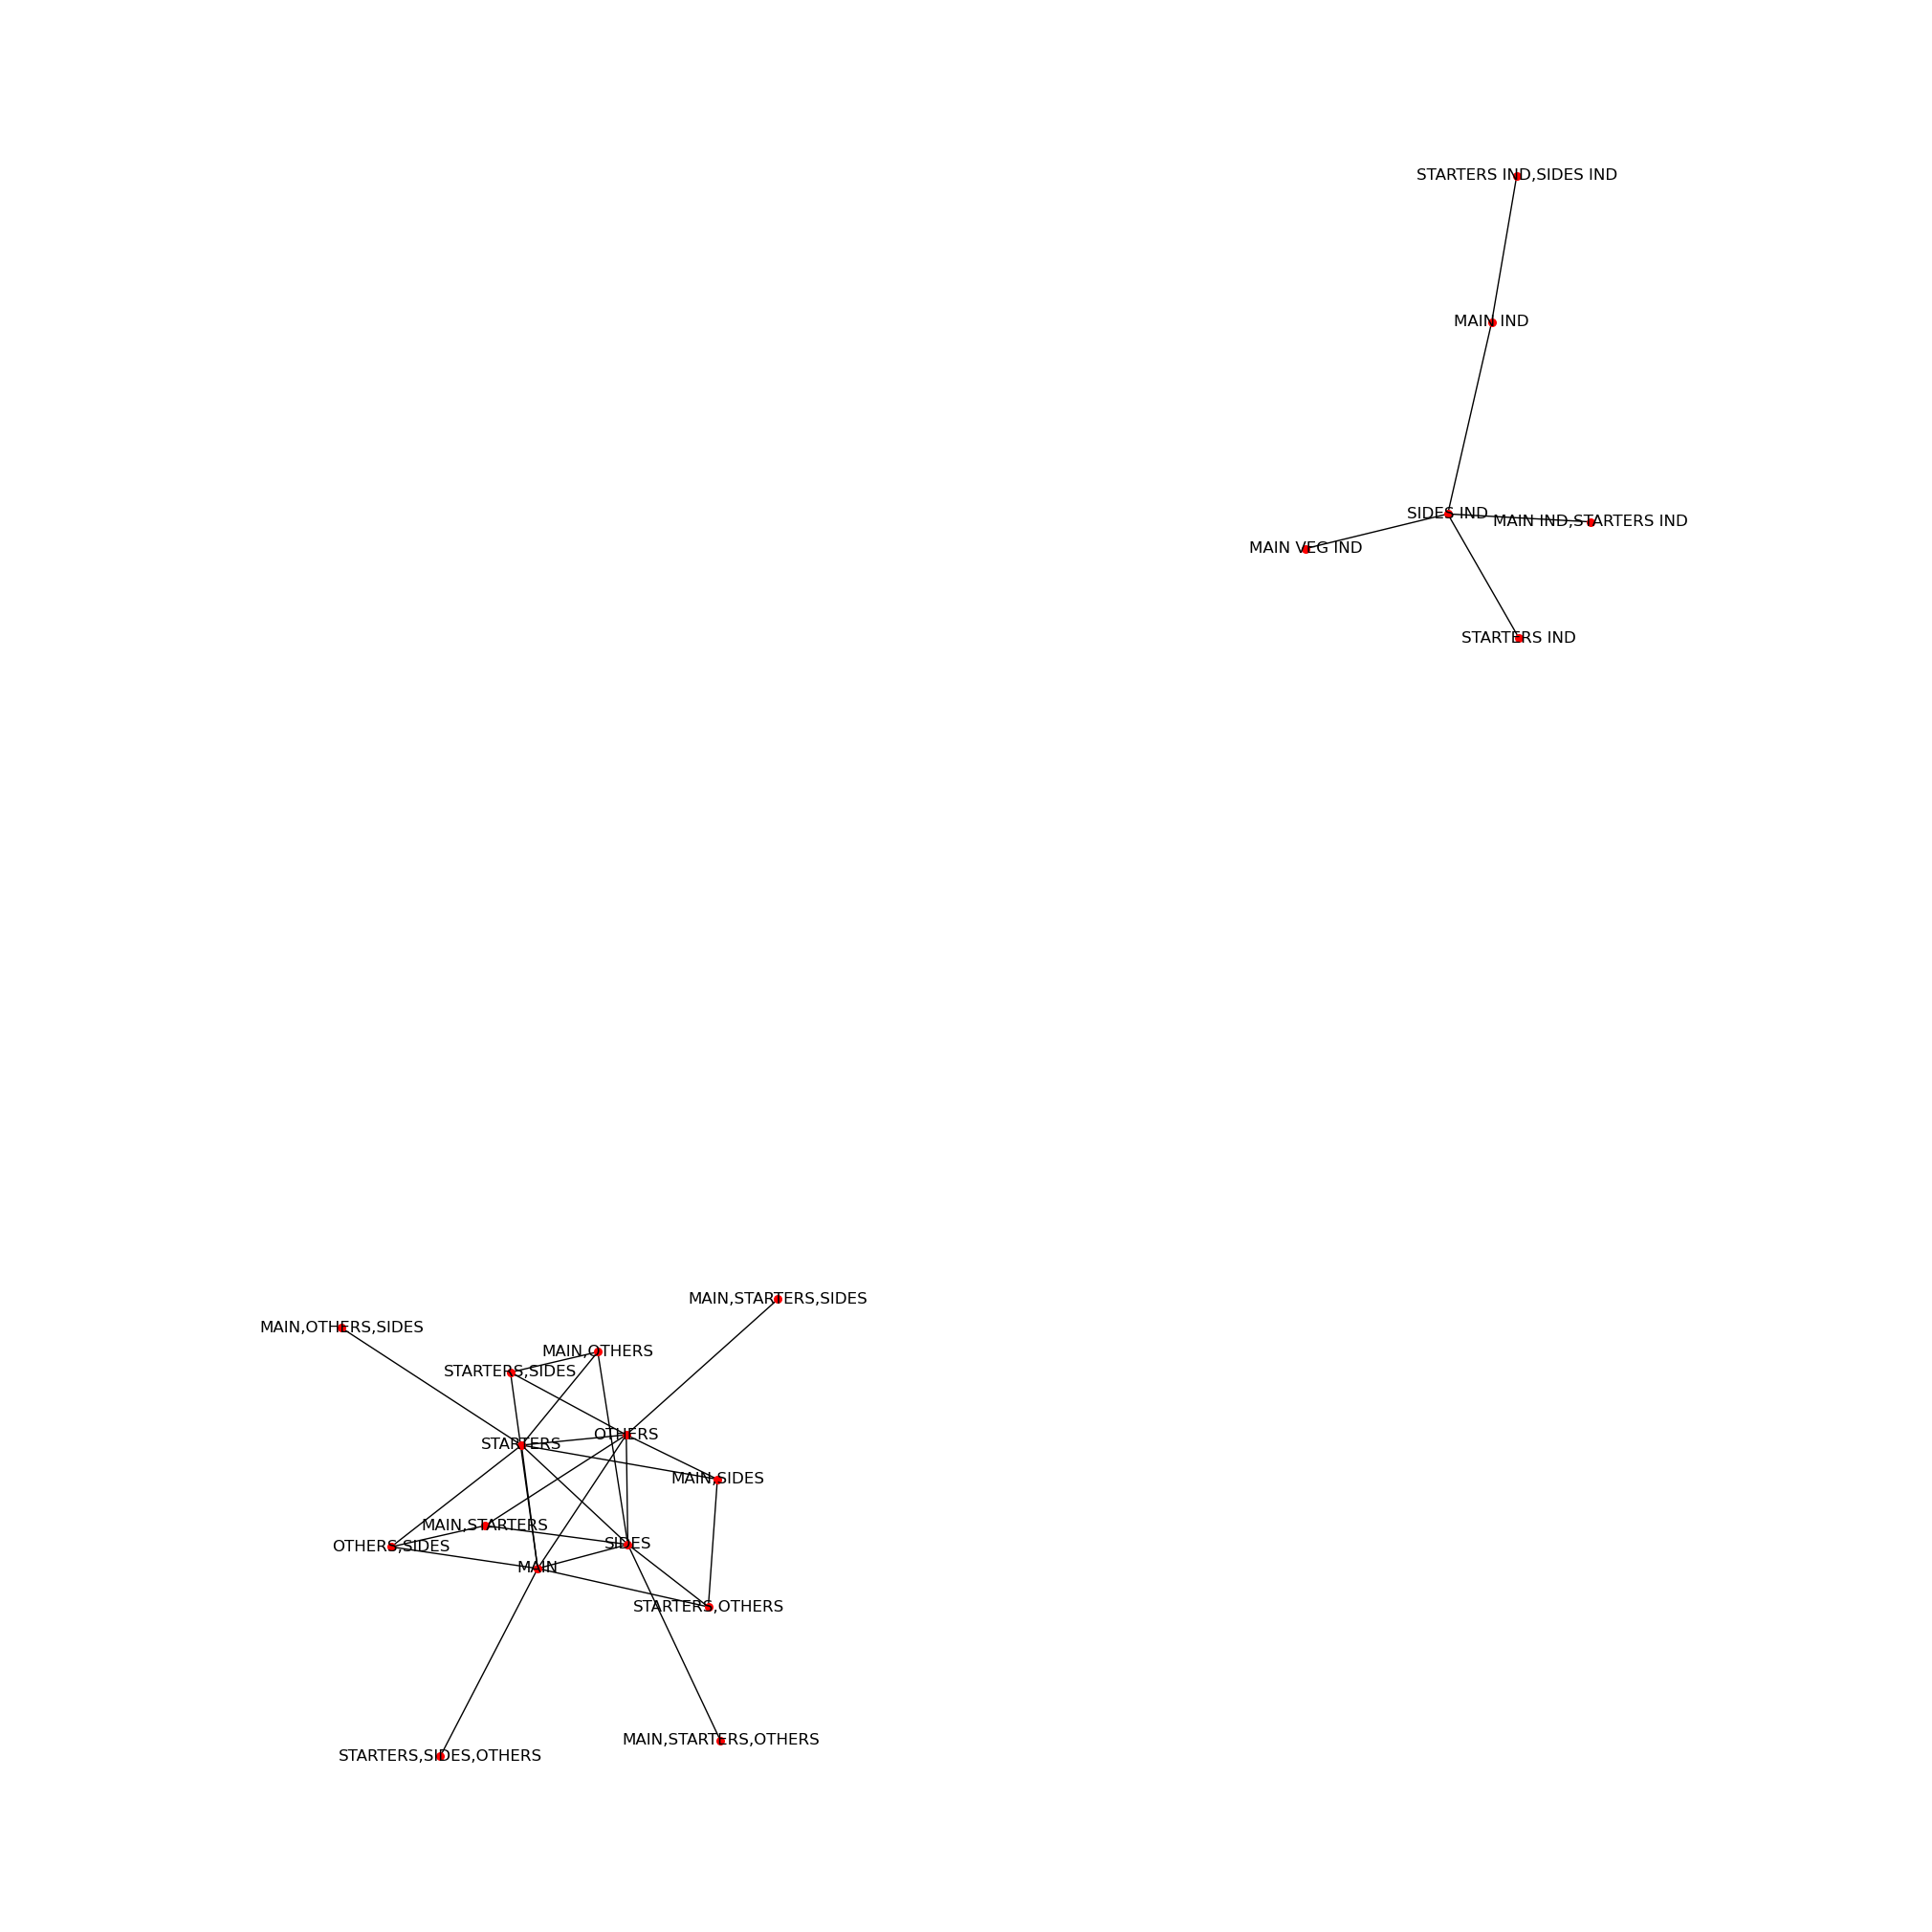

In [216]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

In [217]:
ds_delivery['ProductCategoryI'].value_counts()

MAIN        9350
STARTERS    6745
SIDES       6118
OTHERS      1509
DRINKS       227
Name: ProductCategoryI, dtype: int64

We see again strong combination between main and side for indian dishes (rules 5 and 6). Customers who ask for a delivery don't really order drinks, which is expected. An online discount could be offered for drinks to try to revert this pattern.

<a class="anchor" id="seasons">
    
## 4.4. Considering the Seasons
    
    
</a>

No major differences were found in the seasons when compared to the general case.

<a class="anchor" id="spring">
    
## 4.4.1. Spring
    
    
</a>

In [218]:
ds_spring = ds_imp[ds_imp['Season']=='Spring'].copy()

<a class="anchor" id="product_spring">
    
### 4.4.1.1. Using the Product Variable
    
    
</a>

In [219]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_spring[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BEANSPROUTS  \
DocNumber                                                                       
TK0110013152018            False         False         False            False   
TK0110013162018            False         False         False            False   
TK0110013172018            False         False         False            False   
TK0110013182018            False         False         False            False   
TK0110013192018            False         False         False            False   

Product           NO EGG   NO MEAT   NO MUSHROOMS   NO ONION   WITH BEEF  \
DocNumber                                                                  
TK0110013152018    False     False          False      False       False   
TK0110013162018    False      True          False      False       False   
TK0110013172018    False     False          False      False       False   
TK0110013182018    False      True          False      False       False   
TK0110013192018    False      True          False      False       False   

Product           WITH CHICKEN  ...  VASSILIKON XYNISTERI  VEG BBS  VEG RICE  \
DocNumber                       ...                                            
TK0110013152018          False  ...                 False    False     False   
TK0110013162018          False  ...                 False    False     False   
TK0110013172018          False  ...                 False    False     False   
TK0110013182018          False  ...                 False    False     False   
TK0110013192018          False  ...                 False    False     False   

Product          VELOUDO RED  VLASSIDES SHIRAZ  VOLCANO MAKI  WHISKY  \
DocNumber                                                              
TK0110013152018        False             False         False   False   
TK0110013162018        False             False         False   False   
TK0110013172018        False             False         False   False   
TK0110013182018        False             False         False   False   
TK0110013192018        False             False         False   False   

Product          YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                     
TK0110013152018             False         False        False  
TK0110013162018             False         False        False  
TK0110013172018             False         False        False  
TK0110013182018             False         False        False  
TK0110013192018             False         False        False  

[5 rows x 202 columns]

In [220]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [221]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents            consequents  \
0                                        ( NO MEAT)    (NOODLES WITH MEAT)   
3                   ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
1                                    (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
2                                       (COKE ZERO)  (MINERAL WATER 1.5LT)   
6                    (SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
9             (MINERAL WATER 1.5LT, BEEF BBS, DUCK)       (EGG FRIED RICE)   
5                   (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
10  (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
11  (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
4                   (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
7                         (DUCK, NOODLES WITH MEAT)  (MINERAL WATER 1.5LT)   
8         (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.078686            0.137128  0.078686    1.000000  7.292479   
3             0.051948            0.137128  0.051948    1.000000  7.292479   
1             0.133308            0.501528  0.126432    0.948424  1.891069   
2             0.098167            0.501528  0.084798    0.863813  1.722363   
6             0.083270            0.382735  0.061497    0.738532  1.929618   
9             0.074102            0.382735  0.053858    0.726804  1.898975   
5             0.105424            0.382735  0.075630    0.717391  1.874382   
10            0.075630            0.414820  0.053858    0.712121  1.716697   
11            0.098167            0.382735  0.069137    0.704280  1.840125   
4             0.105424            0.414820  0.074102    0.702899  1.694464   
7             0.074484            0.501528  0.052330    0.702564  1.400848   
8             0.150115            0.382735  0.105424    0.702290  1.834926   

    leverage  conviction  
0   0.067896         inf  
3   0.044825         inf  
1   0.059575    9.664820  
2   0.035564    3.660210  
6   0.029627    2.360768  
9   0.025496    2.259423  
5   0.035281    2.184169  
10  0.022485    2.032729  
11  0.031565    2.087331  
4   0.030370    1.969629  
7   0.014974    1.675898  
8   0.047970    2.073378

In [222]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
28                                    ( NO MEAT)   
27      (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
0                                     ( NO MEAT)   
1                            (NOODLES WITH MEAT)   
26               ( NO MEAT, MINERAL WATER 1.5LT)   
29                           (NOODLES WITH MEAT)   
10                          (CHICK TIKKA MASALA)   
11                                  (JIRA PULAO)   
20                                        (NAAN)   
21                                  (JIRA PULAO)   
12                          (CHICK TIKKA MASALA)   
13                                        (NAAN)   
131        (MINERAL WATER 1.5LT, EGG FRIED RICE)   
132                             (DUCK, BEEF BBS)   
127  (EGG FRIED RICE, MINERAL WATER 1.5LT, DUCK)   
136                                   (BEEF BBS)   
133                       (DUCK, EGG FRIED RICE)   
130              (MINERAL WATER 1.5LT, BEEF BBS)   
53         (MINERAL WATER 1.5LT, EGG FRIED RICE)   
54                                    (BEEF BBS)   
193                (SPRING ROLL, EGG FRIED RICE)   
194    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
156    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
155                       (DUCK, EGG FRIED RICE)   
134                   (BEEF BBS, EGG FRIED RICE)   
129                  (MINERAL WATER 1.5LT, DUCK)   
192            (SPRING ROLL, SWEET SOUR CHICKEN)   
195        (MINERAL WATER 1.5LT, EGG FRIED RICE)   
68            (SPRING ROLL, MINERAL WATER 1.5LT)   
71                                    (BEEF BBS)   
153                   (DUCK, SWEET SOUR CHICKEN)   
158        (MINERAL WATER 1.5LT, EGG FRIED RICE)   
57                 (SPRING ROLL, EGG FRIED RICE)   
60                                    (BEEF BBS)   
184    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
179                          (SPRING ROLL, DUCK)   
67                              (EGG FRIED RICE)   
62                (SWEET SOUR CHICKEN, BEEF BBS)   
31                        (DUCK, EGG FRIED RICE)   
34                                    (BEEF BBS)   
167            (SPRING ROLL, SWEET SOUR CHICKEN)   
170                       (DUCK, EGG FRIED RICE)   
180            (SPRING ROLL, SWEET SOUR CHICKEN)   
183                  (DUCK, MINERAL WATER 1.5LT)   

                                     consequents  antecedent support  \
28      (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.078686   
27                                    ( NO MEAT)            0.082506   
0                            (NOODLES WITH MEAT)            0.078686   
1                                     ( NO MEAT)            0.137128   
26                           (NOODLES WITH MEAT)            0.051948   
29               ( NO MEAT, MINERAL WATER 1.5LT)            0.137128   
10                                  (JIRA PULAO)            0.090527   
11                          (CHICK TIKKA MASALA)            0.109626   
20                                  (JIRA PULAO)            0.118411   
21                                        (NAAN)            0.109626   
12                                        (NAAN)            0.090527   
13                          (CHICK TIKKA MASALA)            0.118411   
131                             (DUCK, BEEF BBS)            0.192895   
132        (MINERAL WATER 1.5LT, EGG FRIED RICE)            0.118793   
127                                   (BEEF BBS)            0.123377   
136  (EGG FRIED RICE, MINERAL WATER 1.5LT, DUCK)            0.187930   
133              (MINERAL WATER 1.5LT, BEEF BBS)            0.225363   
130                       (DUCK, EGG FRIED RICE)            0.105424   
53                                    (BEEF BBS)            0.192895   
54         (MINERAL WATER 1.5LT, EGG FRIED RICE)            0.187930   
193    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)            0.181054   
194                (SPRING ROLL, EGG FRIED RICE)            0.150115   
156                       (DUCK, EGG FRI

In [223]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [224]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                              itemsets  length
40  0.225363                (DUCK, EGG FRIED RICE)       2
42  0.206264           (DUCK, MINERAL WATER 1.5LT)       2
53  0.201299  (SWEET SOUR CHICKEN, EGG FRIED RICE)       2

In [225]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents            consequents  \
0                                        ( NO MEAT)    (NOODLES WITH MEAT)   
3                   ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
1                                    (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
2                                       (COKE ZERO)  (MINERAL WATER 1.5LT)   
6                    (SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
9             (MINERAL WATER 1.5LT, BEEF BBS, DUCK)       (EGG FRIED RICE)   
5                   (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
10  (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
11  (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
4                   (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
8         (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.078686            0.137128  0.078686    1.000000  7.292479   
3             0.051948            0.137128  0.051948    1.000000  7.292479   
1             0.133308            0.501528  0.126432    0.948424  1.891069   
2             0.098167            0.501528  0.084798    0.863813  1.722363   
6             0.083270            0.382735  0.061497    0.738532  1.929618   
9             0.074102            0.382735  0.053858    0.726804  1.898975   
5             0.105424            0.382735  0.075630    0.717391  1.874382   
10            0.075630            0.414820  0.053858    0.712121  1.716697   
11            0.098167            0.382735  0.069137    0.704280  1.840125   
4             0.105424            0.414820  0.074102    0.702899  1.694464   
8             0.150115            0.382735  0.105424    0.702290  1.834926   

    leverage  conviction  
0   0.067896         inf  
3   0.044825         inf  
1   0.059575    9.664820  
2   0.035564    3.660210  
6   0.029627    2.360768  
9   0.025496    2.259423  
5   0.035281    2.184169  
10  0.022485    2.032729  
11  0.031565    2.087331  
4   0.030370    1.969629  
8   0.047970    2.073378

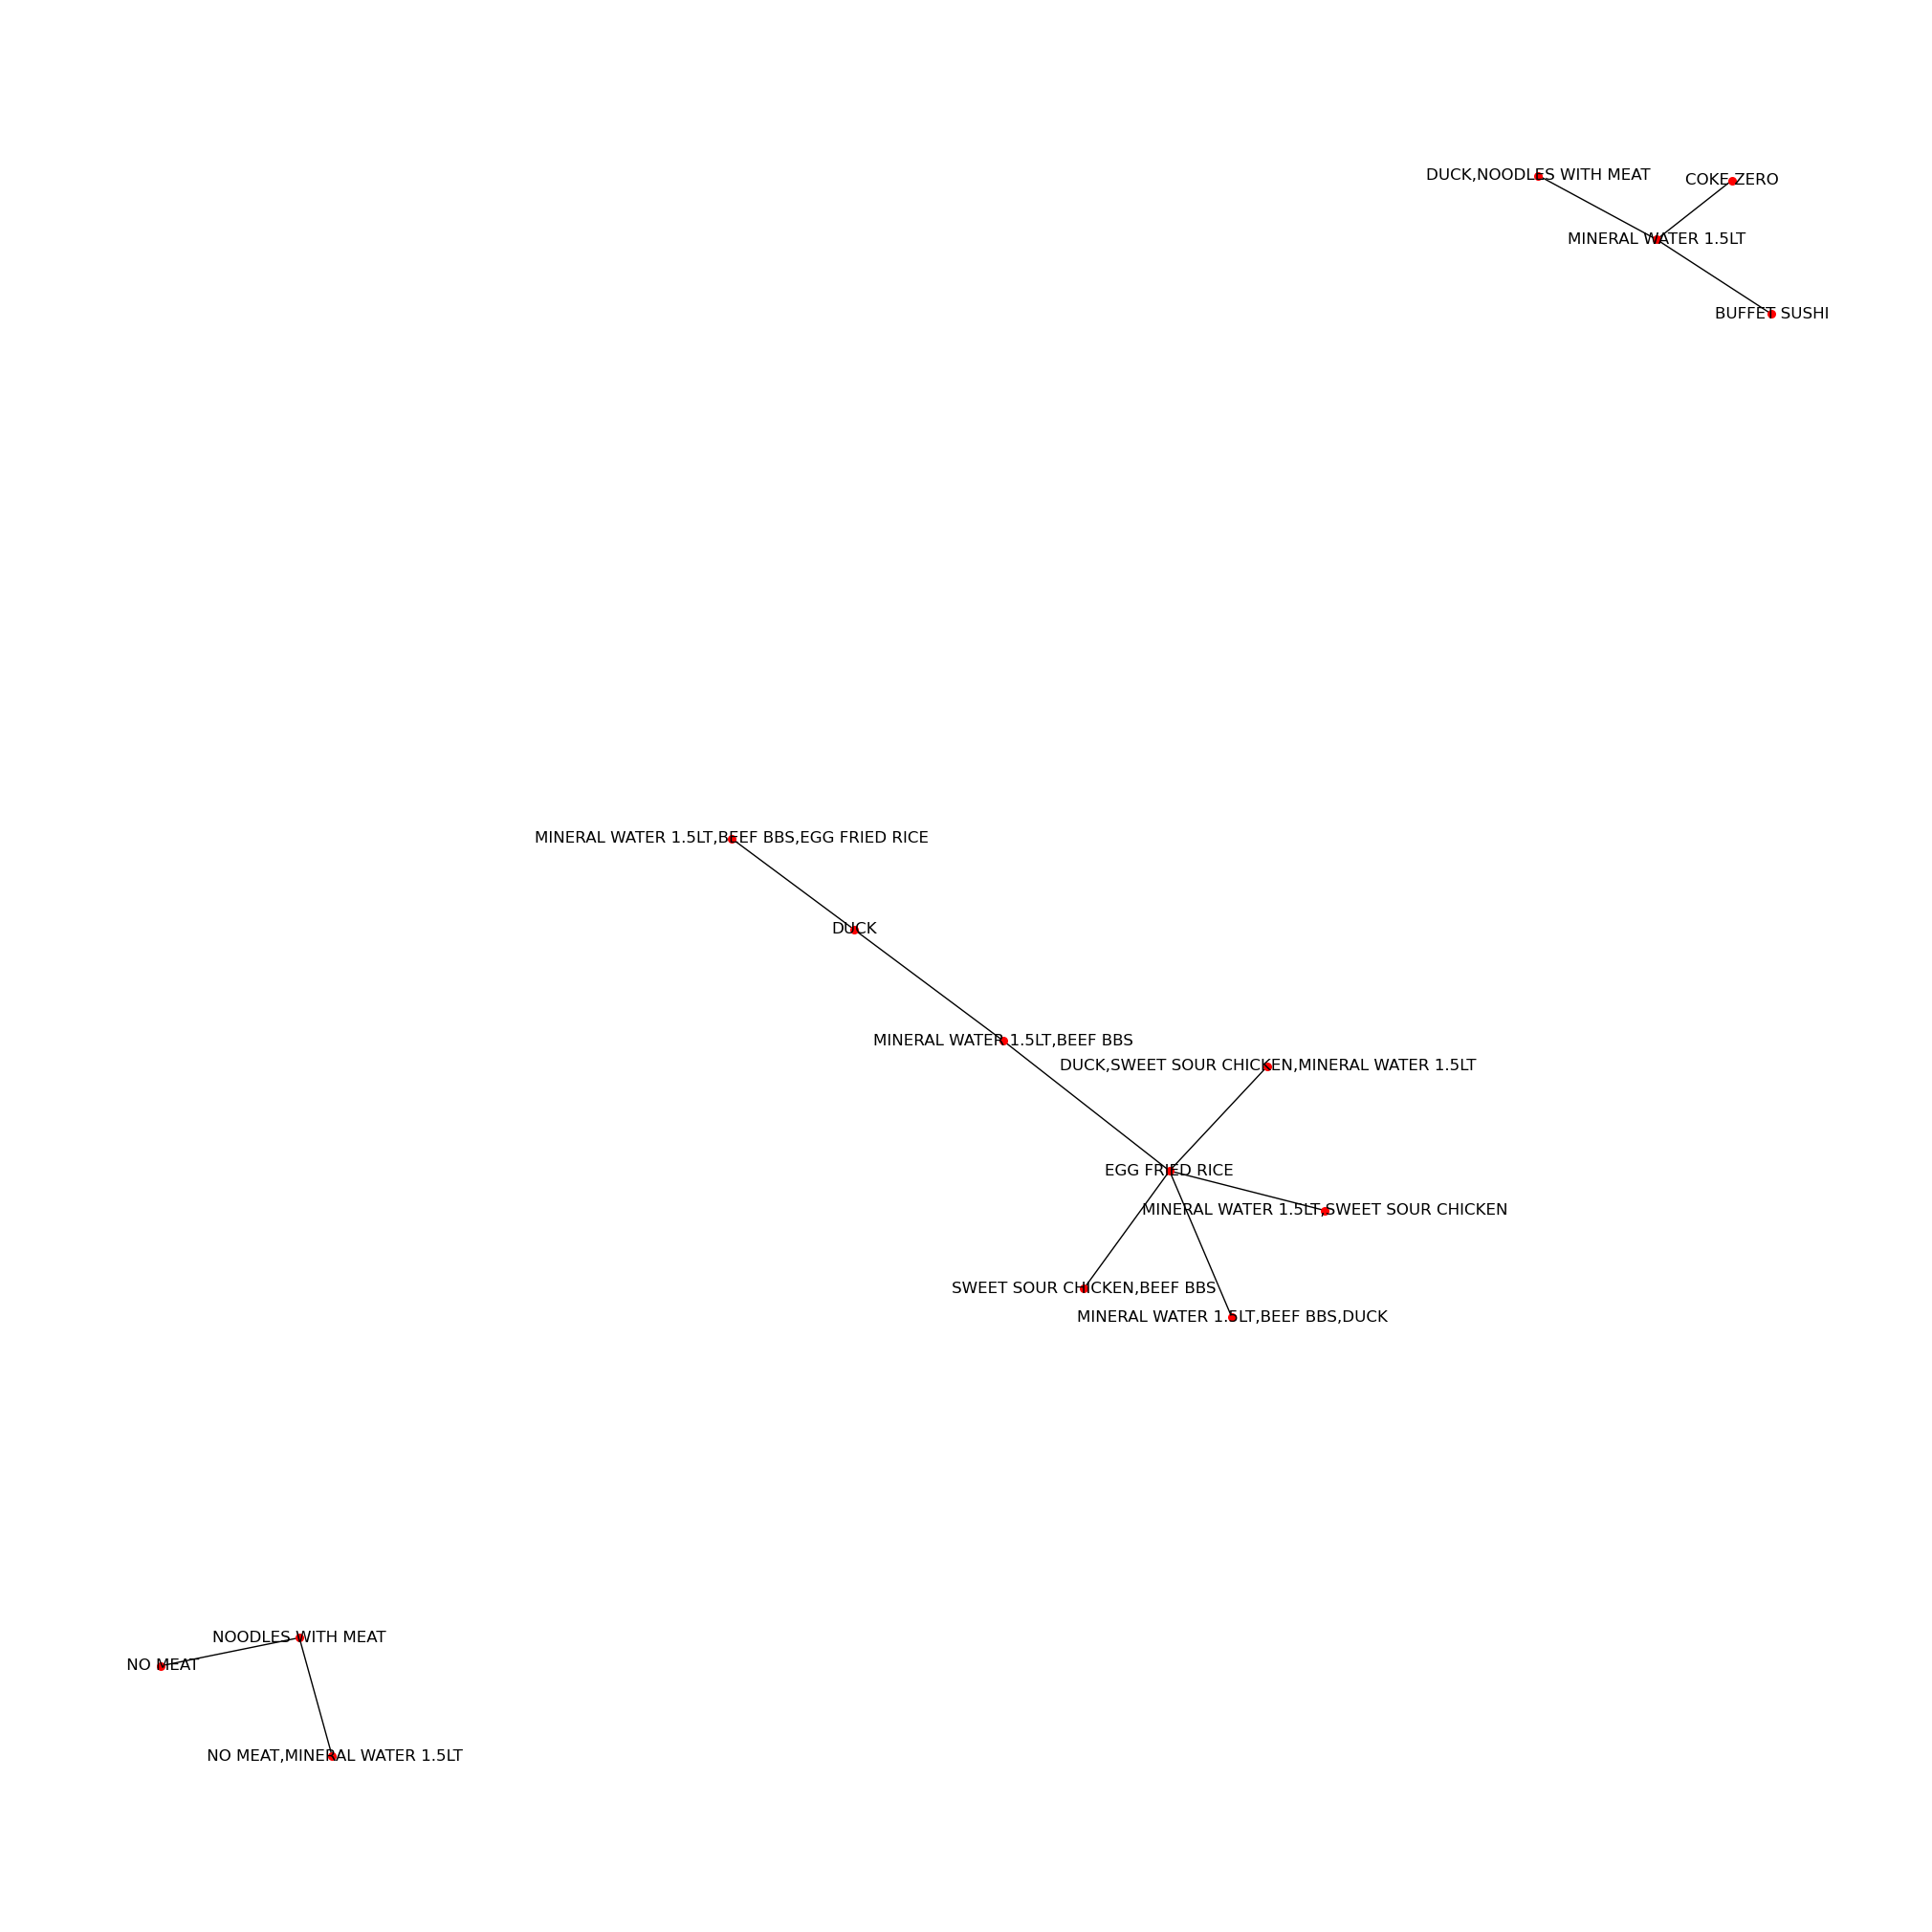

In [226]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="productcat_spring">
    
### 4.4.1.2. Using the ProductCategoryII Variable
    
    
</a>

In [227]:
# Pivot the data
pt = pd.pivot_table(ds_spring[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND   MAIN  MAIN IND  \
DocNumber                                                                    
TK0110013152018               False    False        False  False      True   
TK0110013162018                True    False        False   True     False   
TK0110013172018               False    False        False   True     False   
TK0110013182018                True    False        False   True     False   
TK0110013192018               False    False        False   True      True   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110013152018       False         False                  True   False   
TK0110013162018        True         False                  True    True   
TK0110013172018       False         False                  True   False   
TK0110013182018        True         False                  True    True   
TK0110013192018        True         False                  True    True   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110013152018     True       True     False          True  
TK0110013162018     True      False      True         False  
TK0110013172018    False      False      True         False  
TK0110013182018     True      False      True         False  
TK0110013192018     True      False      True         False

In [228]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [229]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
120     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
86                (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
63     (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
104           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
108  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
94             (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
18                           (ALCOHOLIC DRINKS, SIDES)   
70                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
87               (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
31                       (NON-ALCOHOLIC DRINKS, SIDES)   
119    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
97                            (MAIN, STARTERS, OTHERS)   
54                      (NON-ALCOHOLIC DRINKS, OTHERS)   
30                      (NON-ALCOHOLIC DRINKS, OTHERS)   
90            (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
65                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
33                                      (MAIN, OTHERS)   
110          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
22                        (ALCOHOLIC DRINKS, STARTERS)   
123           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
62                     (MAIN, ALCOHOLIC DRINKS, SIDES)   
75                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
21                           (ALCOHOLIC DRINKS, SIDES)   
15                            (MAIN, ALCOHOLIC DRINKS)   
88                      (NON-ALCOHOLIC DRINKS, OTHERS)   
66   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
43                                   (STARTERS, SIDES)   
20                        (MAIN IND, ALCOHOLIC DRINKS)   
32                    (NON-ALCOHOLIC DRINKS, STARTERS)   
19                        (ALCOHOLIC DRINKS, STARTERS)   
5                                              (SIDES)   
1                                   (ALCOHOLIC DRINKS)   
64                           (ALCOHOLIC DRINKS, SIDES)   
114                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
99                           (STARTERS, SIDES, OTHERS)   
58                                  (STARTERS, OTHERS)   
34                                     (OTHERS, SIDES)   
80             (NON-ALCOHOLIC DRINKS, MAIN IND, SIDES)   
10                                            (OTHERS)   
41                                    (MAIN, STARTERS)   
85                         (MAIN IND, STARTERS, SIDES)   
67                        (ALCOHOLIC DRINKS, STARTERS)   
92              (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)   
98                               (MAIN, OTHERS, SIDES)   

                      consequents  antecedent support  consequent support  \
120                       (SIDES)            0.068069            0.667304   
86                        (SIDES)            0.076099            0.667304   
63                         (MAIN)            0.125813            0.852390   
104                       (SIDES)            0.070363            0.667304   
108                        (MAIN)            0.110899            0.852390   
94                         (MAIN)            0.285277            0.852390   
18                         (MAIN)            0.131166            0.852390   
70                         (MAIN)            0.115488            0.852390   
87                         (MAIN)            0.076482            0.852390   
31                         (MAIN)            0.329254            0.852390   
119                        (MAIN)            0.069216            0.852390   
97                        (SIDES)            0.130402            0.667304   
54                        (SIDES)            0.078394            0.667304   
30                         (MAIN)            0.078394            0.852390   
90                         (MAIN)            0.070363            0.852390   
65         (NON-ALCOHOLIC DRINKS)            0.124665            0.537667   
33                        (SIDES)            0.144551            0.667304   
110        (NON-ALCOHOLIC DRINKS)            0

In [230]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
42                 (MAIN IND, STARTERS IND)   
47                              (SIDES IND)   
6                            (MAIN VEG IND)   
7                               (SIDES IND)   
31        (NON-ALCOHOLIC DRINKS, SIDES IND)   
32                               (MAIN IND)   
8                            (STARTERS IND)   
9                               (SIDES IND)   
2                                (MAIN IND)   
3                               (SIDES IND)   
46                           (STARTERS IND)   
43                    (MAIN IND, SIDES IND)   
40                               (MAIN IND)   
39                    (STARTERS, SIDES IND)   
28                               (MAIN IND)   
27                        (MAIN, SIDES IND)   
44                (STARTERS IND, SIDES IND)   
45                               (MAIN IND)   
36                               (MAIN IND)   
35                       (SIDES, SIDES IND)   
33                              (SIDES IND)   
30         (MAIN IND, NON-ALCOHOLIC DRINKS)   
41                              (SIDES IND)   
38                     (MAIN IND, STARTERS)   
26                         (MAIN, MAIN IND)   
29                              (SIDES IND)   
4                                (MAIN IND)   
5                            (STARTERS IND)   
37                              (SIDES IND)   
34                        (MAIN IND, SIDES)   
106               (ALCOHOLIC DRINKS, SIDES)   
99   (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)   
102      (MAIN, ALCOHOLIC DRINKS, STARTERS)   
103           (NON-ALCOHOLIC DRINKS, SIDES)   
100         (MAIN, ALCOHOLIC DRINKS, SIDES)   
105        (NON-ALCOHOLIC DRINKS, STARTERS)   
72                (ALCOHOLIC DRINKS, SIDES)   
71         (NON-ALCOHOLIC DRINKS, STARTERS)   
96      (NON-ALCOHOLIC DRINKS, MAIN, SIDES)   
109            (ALCOHOLIC DRINKS, STARTERS)   
73             (ALCOHOLIC DRINKS, STARTERS)   
70            (NON-ALCOHOLIC DRINKS, SIDES)   
15         (MAIN IND, NON-ALCOHOLIC DRINKS)   
16                       (ALCOHOLIC DRINKS)   

                                consequents  antecedent support  \
42                              (SIDES IND)            0.068069   
47                 (MAIN IND, STARTERS IND)            0.174761   
6                               (SIDES IND)            0.060038   
7                            (MAIN VEG IND)            0.174761   
31                               (MAIN IND)            0.092161   
32        (NON-ALCOHOLIC DRINKS, SIDES IND)            0.193499   
8                               (SIDES IND)            0.104015   
9                            (STARTERS IND)            0.174761   
2                               (SIDES IND)            0.193499   
3                                (MAIN IND)            0.174761   
46                    (MAIN IND, SIDES IND)            0.104015   
43                           (STARTERS IND)            0.141874   
40                    (STARTERS, SIDES IND)            0.193499   
39                               (MAIN IND)            0.069981   
28                        (MAIN, SIDES IND)            0.193499   
27                               (MAIN IND)            0.079924   
44                               (MAIN IND)            0.078394   
45                (STARTERS IND, SIDES IND)            0.193499   
36                       (SIDES, SIDES IND)            0.193499   
35                               (MAIN IND)            0.067686   
33         (MAIN IND, NON-ALCOHOLIC DRINKS)            0.174761   
30                              (SIDES IND)            0.121224   
41                     (MAIN IND, STARTERS)            0.174761   
38                              (SIDES IND)            0.084895   
26                              (SIDES IND)            0.102103   
29                         (MAIN, MAIN IND)            0.174761   
4                            (STARTERS IND)            0.193499   
5                                (MAIN I

In [231]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [232]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                       itemsets  length
16  0.480306                   (MAIN, NON-ALCOHOLIC DRINKS)       2
18  0.633270                                  (MAIN, SIDES)       2
20  0.573996                               (MAIN, STARTERS)       2
28  0.329254                  (NON-ALCOHOLIC DRINKS, SIDES)       2
30  0.321606               (NON-ALCOHOLIC DRINKS, STARTERS)       2
35  0.558317                              (STARTERS, SIDES)       2
50  0.322371            (MAIN, NON-ALCOHOLIC DRINKS, SIDES)       3
52  0.305927         (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)       3
56  0.531549                        (MAIN, STARTERS, SIDES)       3
66  0.285277        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)       3
77  0.280306  (MAIN, STARTERS, NON-ALCOHOLIC DRINKS, SIDES)       4

In [233]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
65                (MAIN, ALCOHOLIC DRINKS, STARTERS)   
110        (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
22                      (ALCOHOLIC DRINKS, STARTERS)   
123         (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
62                   (MAIN, ALCOHOLIC DRINKS, SIDES)   
75               (ALCOHOLIC DRINKS, SIDES, STARTERS)   
21                         (ALCOHOLIC DRINKS, SIDES)   
15                          (MAIN, ALCOHOLIC DRINKS)   
88                    (NON-ALCOHOLIC DRINKS, OTHERS)   
20                      (MAIN IND, ALCOHOLIC DRINKS)   
1                                 (ALCOHOLIC DRINKS)   
64                         (ALCOHOLIC DRINKS, SIDES)   
114              (ALCOHOLIC DRINKS, SIDES, STARTERS)   
67                      (ALCOHOLIC DRINKS, STARTERS)   
52                          (MAIN IND, STARTERS IND)   
122             (NON-ALCOHOLIC DRINKS, MAIN, OTHERS)   
121            (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
106                   (NON-ALCOHOLIC DRINKS, OTHERS)   
100                                   (MAIN, OTHERS)   
47                 (NON-ALCOHOLIC DRINKS, SIDES IND)   
115               (MAIN, ALCOHOLIC DRINKS, STARTERS)   
91                    (NON-ALCOHOLIC DRINKS, OTHERS)   
111  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
124                   (NON-ALCOHOLIC DRINKS, OTHERS)   
71                         (ALCOHOLIC DRINKS, SIDES)   
60                                          (OTHERS)   
9                                     (MAIN VEG IND)   
113                  (MAIN, ALCOHOLIC DRINKS, SIDES)   
76                         (ALCOHOLIC DRINKS, SIDES)   
77                      (ALCOHOLIC DRINKS, STARTERS)   
17                                (ALCOHOLIC DRINKS)   
117                     (ALCOHOLIC DRINKS, STARTERS)   
116                        (ALCOHOLIC DRINKS, SIDES)   
8                                        (SIDES IND)   
103                                         (OTHERS)   
51                             (STARTERS, SIDES IND)   
28                                 (MAIN, SIDES IND)   
53                         (STARTERS IND, SIDES IND)   
49                                (SIDES, SIDES IND)   
14                                    (STARTERS IND)   
7                                         (MAIN IND)   

                                consequents  antecedent support  \
65                   (NON-ALCOHOLIC DRINKS)            0.124665   
110                  (NON-ALCOHOLIC DRINKS)            0.113193   
22                   (NON-ALCOHOLIC DRINKS)            0.131166   
123                           (MAIN, SIDES)            0.070363   
62                   (NON-ALCOHOLIC DRINKS)            0.128872   
75                   (NON-ALCOHOLIC DRINKS)            0.115488   
21                   (NON-ALCOHOLIC DRINKS)            0.131166   
15                   (NON-ALCOHOLIC DRINKS)            0.184321   
88                            (MAIN, SIDES)            0.078394   
20                   (NON-ALCOHOLIC DRINKS)            0.055449   
1                    (NON-ALCOHOLIC DRINKS)            0.209178   
64             (MAIN, NON-ALCOHOLIC DRINKS)            0.131166   
114            (NON-ALCOHOLIC DRINKS, MAIN)            0.115488   
67             (MAIN, NON-ALCOHOLIC DRINKS)            0.131166   
52                              (SIDES IND)            0.068069   
122                       (STARTERS, SIDES)            0.076099   
121                        (MAIN, STARTERS)            0.076482   
106                       (STARTERS, SIDES)            0.078394   
100                       (STARTERS, SIDES)            0.144551   
47                               (MAIN IND)            0.092161   
115           (NON-ALCOHOLIC DRINKS, SIDES)            0.124665   
91                         (MAIN, STARTERS)            0.078394   
111                        (MAIN, STARTERS)            0.125813   
124                 (MAIN, STARTERS, SIDES)            0.078394   
71           

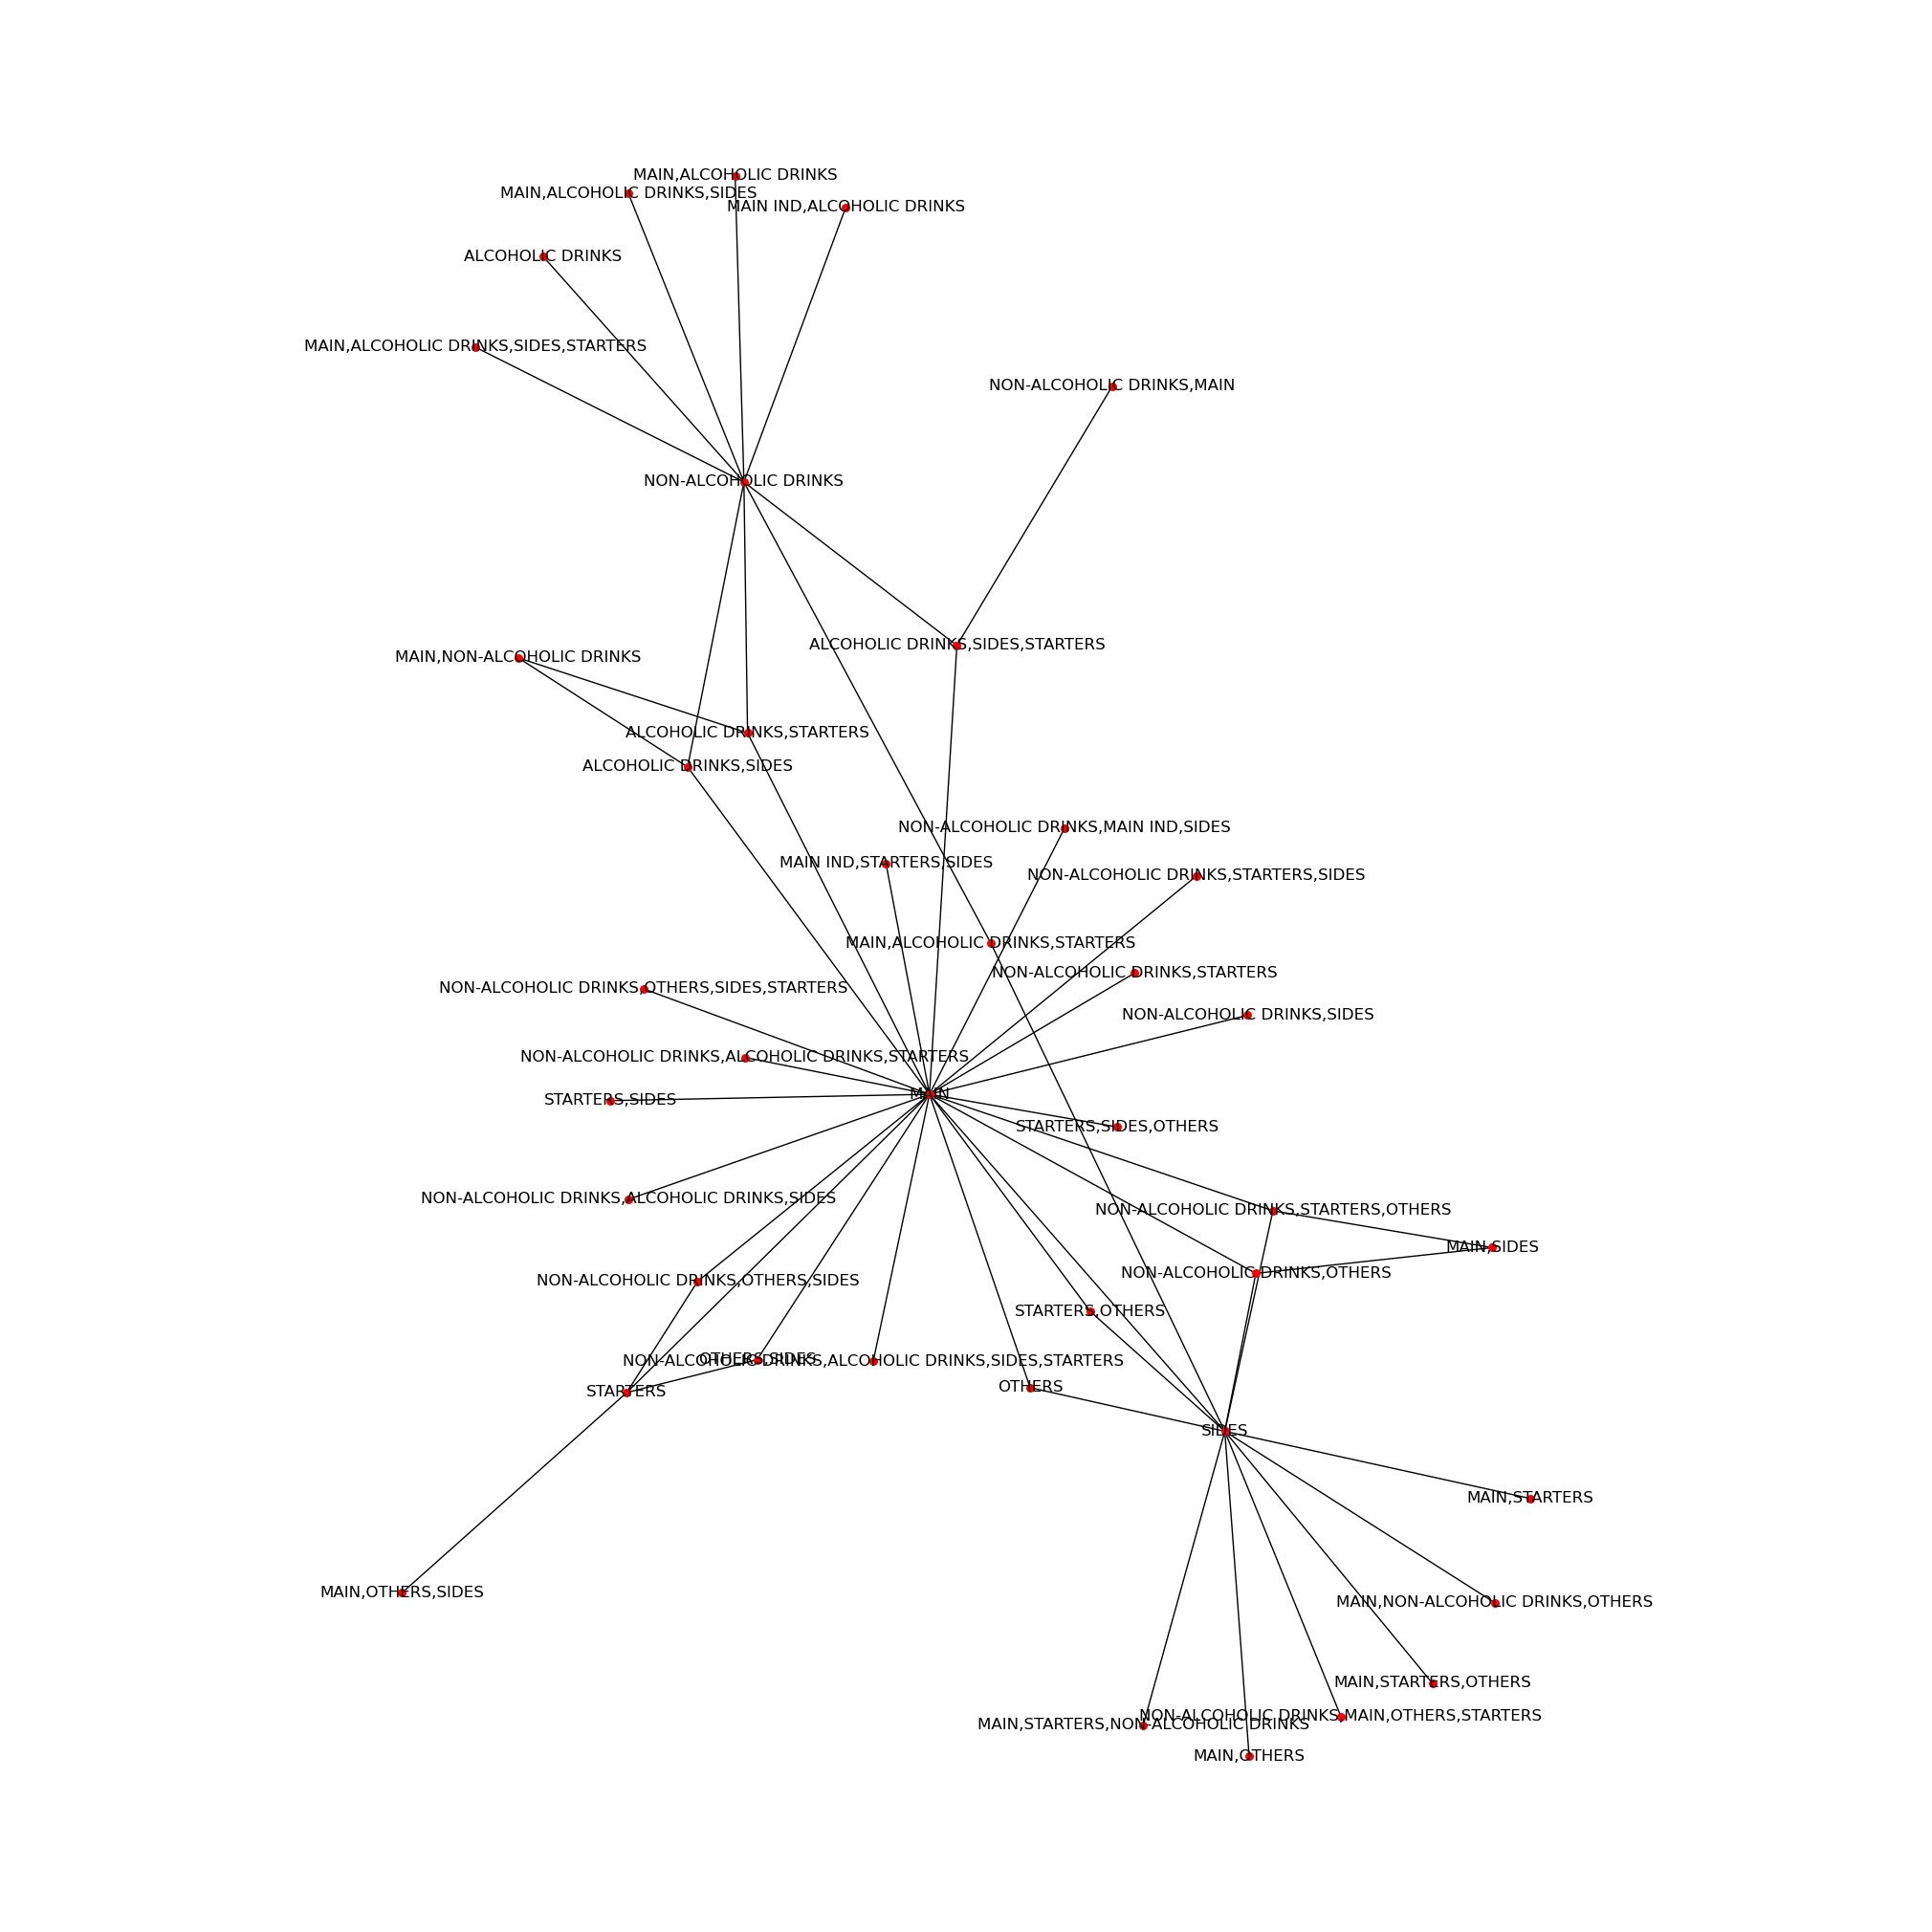

In [234]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="summer">
    
## 4.4.2. Summer
    
    
</a>

In [235]:
ds_summer = ds_imp[ds_imp['Season']=='Summer'].copy()

<a class="anchor" id="product_summer">
    
### 4.4.2.1. Using the Product Variable
    
    
</a>

In [236]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_summer[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BEANSPROUTS  \
DocNumber                                                                       
TK0110025702018            False         False         False            False   
TK0110025712018            False         False         False            False   
TK0110025722018            False         False         False            False   
TK0110025732018            False         False         False            False   
TK0110025742018            False         False         False            False   

Product           NO CHILLY   NO EGG   NO MEAT   NO MUSHROOMS   NO ONION  \
DocNumber                                                                  
TK0110025702018       False    False     False          False      False   
TK0110025712018       False    False     False          False      False   
TK0110025722018       False    False     False          False      False   
TK0110025732018       False    False     False          False      False   
TK0110025742018       False    False     False          False      False   

Product           NO PRAWNS  ...  VASSILIKON XYNISTERI  VEG BBS  VEG RICE  \
DocNumber                    ...                                            
TK0110025702018       False  ...                 False    False     False   
TK0110025712018       False  ...                 False    False     False   
TK0110025722018       False  ...                 False    False     False   
TK0110025732018       False  ...                 False    False      True   
TK0110025742018       False  ...                 False    False      True   

Product          VEUVE CLICQUOT  VLASSIDES SHIRAZ  VOLCANO MAKI  WHISKY  \
DocNumber                                                                 
TK0110025702018           False             False         False   False   
TK0110025712018           False             False         False   False   
TK0110025722018           False             False         False   False   
TK0110025732018           False             False         False   False   
TK0110025742018           False             False         False   False   

Product          YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                     
TK0110025702018             False         False        False  
TK0110025712018             False         False        False  
TK0110025722018             False         False        False  
TK0110025732018             False         False        False  
TK0110025742018             False         False        False  

[5 rows x 204 columns]

In [237]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [238]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents            consequents  \
10                    ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
8                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
9                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
1                                          ( NO MEAT)    (NOODLES WITH MEAT)   
13                            (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
3                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
7                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
5                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
44  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
4                                              (COKE)  (MINERAL WATER 1.5LT)   
31       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
45  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
43  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
30            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
39            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
41  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
33       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
26                   (SPRING ROLL, NOODLES WITH MEAT)  (MINERAL WATER 1.5LT)   
18                     (SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
32                      (SPRING ROLL, DUCK, BEEF BBS)  (MINERAL WATER 1.5LT)   
27              (MINERAL WATER 1.5LT, BEEF BBS, DUCK)       (EGG FRIED RICE)   
20                          (DUCK, NOODLES WITH MEAT)  (MINERAL WATER 1.5LT)   
46  (SPRING ROLL, DUCK, SWEET SOUR CHICKEN, EGG FR...  (MINERAL WATER 1.5LT)   
37  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...                 (DUCK)   
29                      (SPRING ROLL, DUCK, BEEF BBS)       (EGG FRIED RICE)   
34            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)  (MINERAL WATER 1.5LT)   
28    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
38    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
42            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)  (MINERAL WATER 1.5LT)   
17                    (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
22          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
21                (NOODLES WITH MEAT, EGG FRIED RICE)  (MINERAL WATER 1.5LT)   
24                (SWEET SOUR CHICKEN, SESAME PRAWNS)       (EGG FRIED RICE)   
15                    (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
14                                   (DUCK, BEEF BBS)       (EGG FRIED RICE)   
19                         (DUCK, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
35           (SPRING ROLL, DUCK, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
2                                         (BABY PORK)                 (DUCK)   
36                (SPRING ROLL, DUCK, EGG FRIED RICE)  (MINERAL WATER 1.5LT)   
25                  (SPRING ROLL, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   

    antecedent support  consequent support   support  confidence      lift  \
10            0.063196            0.152226  0.063196    1.000000  6.569191   
8             0.056836            0.152226  0.056836    1.000000  6.569191   
9             0.055246            0.152226  0.055246    1.000000  6.569191   
1             0.089030            0.152226  0.089030    1.000000  6.569191   
13            0.057234            0.152226  0.057234    1.000000  6.569191   
3             0.163355            0.562401  0.151828    0.929440  1.652630   
7             0.059618            0.562401  0.054054    0.906667  1.612137   
5             0.106121            0.562401  0.092607    0.872659  1.551668   
44            0.079094            0.411765  0.062003    0.7

In [239]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
59                    (SPRING ROLL, NOODLES WITH MEAT)   
62                                          ( NO MEAT)   
56                                          ( NO MEAT)   
55            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
45                           (DUCK, NOODLES WITH MEAT)   
46                                          ( NO MEAT)   
51                                          ( NO MEAT)   
50                 (NOODLES WITH MEAT, EGG FRIED RICE)   
57                                 (NOODLES WITH MEAT)   
3                                  (NOODLES WITH MEAT)   
58                             (SPRING ROLL,  NO MEAT)   
52                                 (NOODLES WITH MEAT)   
49                          ( NO MEAT, EGG FRIED RICE)   
47                                 (NOODLES WITH MEAT)   
44                                    ( NO MEAT, DUCK)   
63                                 (NOODLES WITH MEAT)   
54                     ( NO MEAT, MINERAL WATER 1.5LT)   
2                                           ( NO MEAT)   
31                                        (JIRA PULAO)   
30                                              (NAAN)   
365              (MINERAL WATER 1.5LT, EGG FRIED RICE)   
358            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
370                      (SPRING ROLL, EGG FRIED RICE)   
353    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, DUCK)   
362          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
361                (SPRING ROLL, DUCK, EGG FRIED RICE)   
357        (EGG FRIED RICE, MINERAL WATER 1.5LT, DUCK)   
366                  (SPRING ROLL, SWEET SOUR CHICKEN)   
371                             (DUCK, EGG FRIED RICE)   
352  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
356  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...   
367                         (DUCK, SWEET SOUR CHICKEN)   
280                    (MINERAL WATER 1.5LT, BEEF BBS)   
279                      (SPRING ROLL, EGG FRIED RICE)   
281              (MINERAL WATER 1.5LT, EGG FRIED RICE)   
278                            (SPRING ROLL, BEEF BBS)   
267                                (SPRING ROLL, DUCK)   
268                    (MINERAL WATER 1.5LT, BEEF BBS)   
266                            (SPRING ROLL, BEEF BBS)   
269                        (MINERAL WATER 1.5LT, DUCK)   
270                                   (DUCK, BEEF BBS)   
265                 (SPRING ROLL, MINERAL WATER 1.5LT)   
364                        (MINERAL WATER 1.5LT, DUCK)   
359  (SPRING ROLL, SWEET SOUR CHICKEN, EGG FRIED RICE)   

                                           consequents  antecedent support  \
59                                          ( NO MEAT)            0.085851   
62                    (SPRING ROLL, NOODLES WITH MEAT)            0.089030   
56            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.089030   
55                                          ( NO MEAT)            0.098967   
45                                          ( NO MEAT)            0.089825   
46                           (DUCK, NOODLES WITH MEAT)            0.089030   
51                 (NOODLES WITH MEAT, EGG FRIED RICE)            0.089030   
50                                          ( NO MEAT)            0.092607   
57                     ( NO MEAT, MINERAL WATER 1.5LT)            0.152226   
3                                           ( NO MEAT)            0.152226   
58                                 (NOODLES WITH MEAT)            0.057234   
52                          ( NO MEAT, EGG FRIED RICE)            0.152226   
49                                 (NOODLES WITH MEAT)            0.055246   
47                                    ( NO MEAT, DUCK)            0.152226   
44                                 (NOODLES WITH MEAT)            0.056836   
63                             (SPRING ROLL,  NO MEAT)            0.152226   
54                                 (NOODLES WITH MEAT)            0.063196   
2                           

In [240]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [241]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                               itemsets  length
48  0.253577                 (DUCK, EGG FRIED RICE)       2
50  0.244833            (MINERAL WATER 1.5LT, DUCK)       2
53  0.219793                    (SPRING ROLL, DUCK)       2
57  0.234897  (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
60  0.209459          (SPRING ROLL, EGG FRIED RICE)       2
61  0.227742   (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
70  0.205882     (SPRING ROLL, MINERAL WATER 1.5LT)       2

In [242]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
10                    ( NO MEAT, MINERAL WATER 1.5LT)   
8                                    ( NO MEAT, DUCK)   
9                          ( NO MEAT, EGG FRIED RICE)   
1                                          ( NO MEAT)   
13                            (SPRING ROLL,  NO MEAT)   
3                                      (BUFFET SUSHI)   
7                                  (GLASS WHITE WINE)   
5                                         (COKE ZERO)   
44  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
31       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
45  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
43  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
30            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
39            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
41  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...   
33       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
18                     (SWEET SOUR CHICKEN, BEEF BBS)   
27              (MINERAL WATER 1.5LT, BEEF BBS, DUCK)   
37  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...   
29                      (SPRING ROLL, DUCK, BEEF BBS)   
28    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)   
38    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)   
17                    (MINERAL WATER 1.5LT, BEEF BBS)   
22          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
24                (SWEET SOUR CHICKEN, SESAME PRAWNS)   
15                    (MINERAL WATER 1.5LT, BEEF BBS)   
14                                   (DUCK, BEEF BBS)   
19                         (DUCK, SWEET SOUR CHICKEN)   
35           (SPRING ROLL, DUCK, MINERAL WATER 1.5LT)   
2                                         (BABY PORK)   
25                  (SPRING ROLL, SWEET SOUR CHICKEN)   
23            (SWEET SOUR CHICKEN, NOODLES WITH MEAT)   
12                                         ( NO MEAT)   
16                            (SPRING ROLL, BEEF BBS)   
40  (SPRING ROLL, SWEET SOUR CHICKEN, EGG FRIED RICE)   
6                                (SWEET SOUR CHICKEN)   

                                 consequents  antecedent support  \
10                       (NOODLES WITH MEAT)            0.063196   
8                        (NOODLES WITH MEAT)            0.056836   
9                        (NOODLES WITH MEAT)            0.055246   
1                        (NOODLES WITH MEAT)            0.089030   
13                       (NOODLES WITH MEAT)            0.057234   
3                      (MINERAL WATER 1.5LT)            0.163355   
7                      (MINERAL WATER 1.5LT)            0.059618   
5                      (MINERAL WATER 1.5LT)            0.106121   
44                          (EGG FRIED RICE)            0.079094   
31                                    (DUCK)            0.074324   
45                                    (DUCK)            0.079889   
43                          (EGG FRIED RICE)            0.104134   
30                                    (DUCK)            0.075517   
39                          (EGG FRIED RICE)            0.108506   
41                                    (DUCK)            0.104134   
33                          (EGG FRIED RICE)            0.074324   
18                          (EGG FRIED RICE)            0.098172   
27                          (EGG FRIED RICE)            0.086645   
37                                    (DUCK)            0.137917   
29                          (EGG FRIED RICE)            0.077107   
28                                    (DUCK)            0.087440   
38                          (EGG FRIED RICE)            0.122814   
17                          (EGG FRIED RICE)            0.120032   
22                          (EGG FRIED RICE)            0.181240   
24                          (EGG FRIED RICE)            0.071542   
15                                    (DUCK)            0.120032   
14                          (EGG FRIED RICE)            0.129968   
19                          

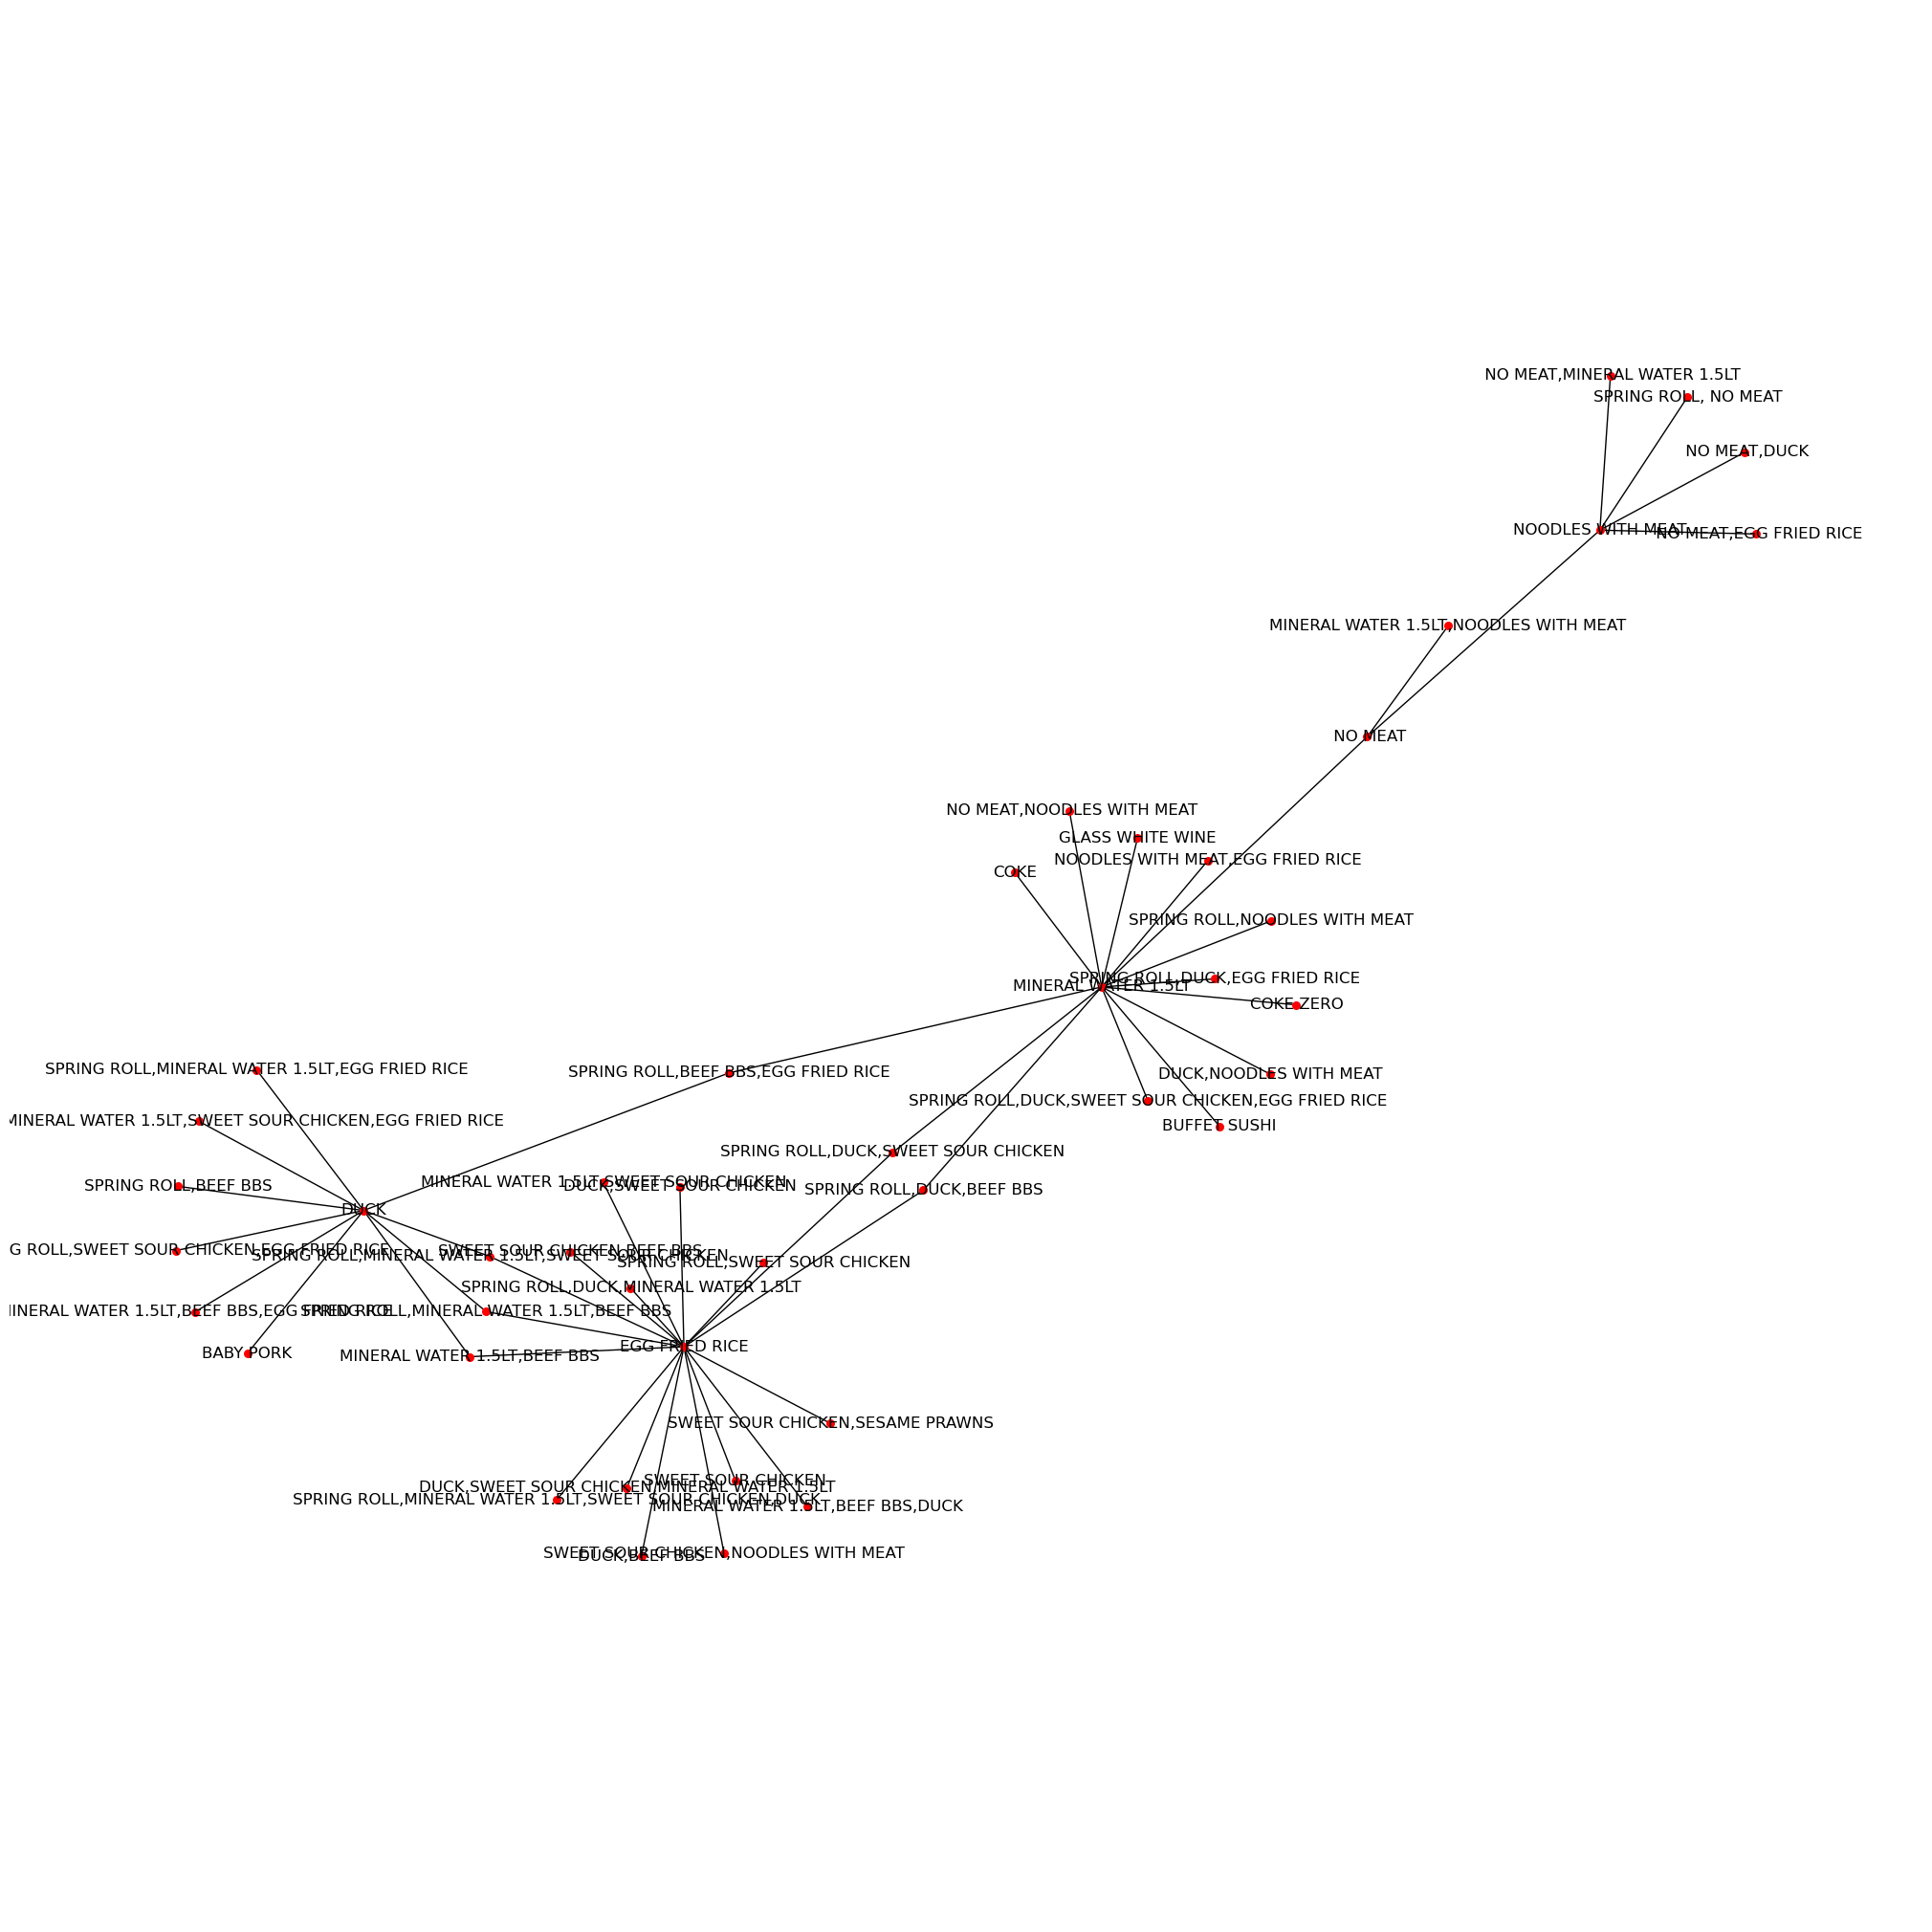

In [243]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="productcat_summer">
    
### 4.4.2.2. Using the ProductCategoryII Variable
    
    
</a>

In [244]:
# Pivot the data
pt = pd.pivot_table(ds_summer[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND   MAIN  MAIN IND  \
DocNumber                                                                    
TK0110025702018                True    False        False   True      True   
TK0110025712018                True    False        False  False      True   
TK0110025722018               False    False        False  False     False   
TK0110025732018                True    False        False  False      True   
TK0110025742018                True    False        False   True     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110025702018       False          True                 False   False   
TK0110025712018       False          True                  True   False   
TK0110025722018       False         False                  True   False   
TK0110025732018       False         False                  True   False   
TK0110025742018       False         False                 False   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110025702018     True       True     False          True  
TK0110025712018    False       True     False         False  
TK0110025722018     True      False      True         False  
TK0110025732018     True      False     False          True  
TK0110025742018     True      False      True         False

In [245]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [246]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
112    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
80               (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
28                      (NON-ALCOHOLIC DRINKS, OTHERS)   
83            (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
101  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
113     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
66                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
79                (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
59     (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
18                           (ALCOHOLIC DRINKS, SIDES)   
87             (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
97            (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
116           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
81                      (NON-ALCOHOLIC DRINKS, OTHERS)   
50                      (NON-ALCOHOLIC DRINKS, OTHERS)   
29                       (NON-ALCOHOLIC DRINKS, SIDES)   
62   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
19                        (ALCOHOLIC DRINKS, STARTERS)   
103          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
90                            (MAIN, STARTERS, OTHERS)   
32                                     (OTHERS, SIDES)   
58                     (MAIN, ALCOHOLIC DRINKS, SIDES)   
71                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
20                           (ALCOHOLIC DRINKS, SIDES)   
31                                      (MAIN, OTHERS)   
92                           (STARTERS, SIDES, OTHERS)   
14                            (MAIN, ALCOHOLIC DRINKS)   
30                    (NON-ALCOHOLIC DRINKS, STARTERS)   
61                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
21                        (ALCOHOLIC DRINKS, STARTERS)   
102  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
41                                   (STARTERS, SIDES)   
1                                   (ALCOHOLIC DRINKS)   
107                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
65                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
5                                              (SIDES)   
60                           (ALCOHOLIC DRINKS, SIDES)   
85              (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)   
70   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
3                                             (OTHERS)   
54                                  (STARTERS, OTHERS)   
23                        (ALCOHOLIC DRINKS, STARTERS)   
9                                             (OTHERS)   
15            (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)   

                      consequents  antecedent support  consequent support  \
112                        (MAIN)            0.073190            0.859984   
80                         (MAIN)            0.081941            0.859984   
28                         (MAIN)            0.084328            0.859984   
83                         (MAIN)            0.075179            0.859984   
101                        (MAIN)            0.137232            0.859984   
113                       (SIDES)            0.074383            0.667860   
66                         (MAIN)            0.143198            0.859984   
79                        (SIDES)            0.083532            0.667860   
59                         (MAIN)            0.150358            0.859984   
18                         (MAIN)            0.157120            0.859984   
87                         (MAIN)            0.326969            0.859984   
97                        (SIDES)            0.075179            0.667860   
116                 (MAIN, SIDES)            0.075179            0.626492   
81                  (MAIN, SIDES)            0.084328            0.626492   
50                        (SIDES)            0.084328            0.667860   
29                         (MAIN)            0.376293            0.859984   
62                         (MAIN)            0.147574            0.859984   
19                         (MAIN)            0

In [247]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
24                       (MAIN IND, STARTERS IND)   
29                                    (SIDES IND)   
21              (NON-ALCOHOLIC DRINKS, SIDES IND)   
22                                     (MAIN IND)   
6                                  (STARTERS IND)   
7                                     (SIDES IND)   
2                                      (MAIN IND)   
3                                     (SIDES IND)   
25                          (MAIN IND, SIDES IND)   
28                                 (STARTERS IND)   
27                                     (MAIN IND)   
26                      (STARTERS IND, SIDES IND)   
20               (MAIN IND, NON-ALCOHOLIC DRINKS)   
23                                    (SIDES IND)   
5                                  (STARTERS IND)   
4                                      (MAIN IND)   
78                      (ALCOHOLIC DRINKS, SIDES)   
71         (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)   
72                (MAIN, ALCOHOLIC DRINKS, SIDES)   
77               (NON-ALCOHOLIC DRINKS, STARTERS)   
52                      (ALCOHOLIC DRINKS, SIDES)   
51               (NON-ALCOHOLIC DRINKS, STARTERS)   
74             (MAIN, ALCOHOLIC DRINKS, STARTERS)   
75                  (NON-ALCOHOLIC DRINKS, SIDES)   
68            (NON-ALCOHOLIC DRINKS, MAIN, SIDES)   
81                   (ALCOHOLIC DRINKS, STARTERS)   
53                   (ALCOHOLIC DRINKS, STARTERS)   
50                  (NON-ALCOHOLIC DRINKS, SIDES)   
79                       (MAIN, ALCOHOLIC DRINKS)   
70        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
40                       (MAIN, ALCOHOLIC DRINKS)   
43               (NON-ALCOHOLIC DRINKS, STARTERS)   
32                       (MAIN, ALCOHOLIC DRINKS)   
35                  (NON-ALCOHOLIC DRINKS, SIDES)   
66  (NON-ALCOHOLIC DRINKS, MAIN, SIDES, STARTERS)   
83                             (ALCOHOLIC DRINKS)   
55                             (ALCOHOLIC DRINKS)   
48        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
44                             (ALCOHOLIC DRINKS)   
39         (MAIN, NON-ALCOHOLIC DRINKS, STARTERS)   
16               (NON-ALCOHOLIC DRINKS, STARTERS)   
19                             (ALCOHOLIC DRINKS)   
73            (ALCOHOLIC DRINKS, SIDES, STARTERS)   
76                   (NON-ALCOHOLIC DRINKS, MAIN)   

                                      consequents  antecedent support  \
24                                    (SIDES IND)            0.061257   
29                       (MAIN IND, STARTERS IND)            0.151551   
21                                     (MAIN IND)            0.085123   
22              (NON-ALCOHOLIC DRINKS, SIDES IND)            0.173031   
6                                     (SIDES IND)            0.098648   
7                                  (STARTERS IND)            0.151551   
2                                     (SIDES IND)            0.173031   
3                                      (MAIN IND)            0.151551   
25                                 (STARTERS IND)            0.121321   
28                          (MAIN IND, SIDES IND)            0.098648   
27                      (STARTERS IND, SIDES IND)            0.173031   
26                                     (MAIN IND)            0.070008   
20                                    (SIDES IND)            0.107001   
23               (MAIN IND, NON-ALCOHOLIC DRINKS)            0.151551   
5                                      (MAIN IND)            0.098648   
4                                  (STARTERS IND)            0.173031   
78         (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)            0.157120   
71                      (ALCOHOLIC DRINKS, SIDES)            0.340493   
72               (NON-ALCOHOLIC DRINKS, STARTERS)            0.153540   
77                (MAIN, ALCOHOLIC DRINKS, SIDES)            0.357597   
52               (NON-ALCOHOLIC DRINKS, STARTERS)            0.157120   
51                      (ALCOHOLIC DRINKS, SID

In [248]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [249]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                        itemsets  length
9   0.215593                        (MAIN, ALCOHOLIC DRINKS)       2
11  0.223150        (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)       2
15  0.549722                    (MAIN, NON-ALCOHOLIC DRINKS)       2
17  0.626492                                   (MAIN, SIDES)       2
19  0.576770                                (MAIN, STARTERS)       2
26  0.376293                   (NON-ALCOHOLIC DRINKS, SIDES)       2
28  0.357597                (NON-ALCOHOLIC DRINKS, STARTERS)       2
33  0.560064                               (STARTERS, SIDES)       2
36  0.205648  (MAIN, ALCOHOLIC DRINKS, NON-ALCOHOLIC DRINKS)       3
46  0.364757             (MAIN, NON-ALCOHOLIC DRINKS, SIDES)       3
47  0.340493          (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)       3
51  0.531424                         (MAIN, STARTERS, SIDES)       3
59  0.326969         (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)       3
69  0.318616   (MAIN, STARTERS, NON-ALCOHOLIC DRINKS, SIDES)       4

In [250]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
116         (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
81                    (NON-ALCOHOLIC DRINKS, OTHERS)   
103        (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
58                   (MAIN, ALCOHOLIC DRINKS, SIDES)   
71               (ALCOHOLIC DRINKS, SIDES, STARTERS)   
20                         (ALCOHOLIC DRINKS, SIDES)   
14                          (MAIN, ALCOHOLIC DRINKS)   
61                (MAIN, ALCOHOLIC DRINKS, STARTERS)   
21                      (ALCOHOLIC DRINKS, STARTERS)   
1                                 (ALCOHOLIC DRINKS)   
107              (ALCOHOLIC DRINKS, SIDES, STARTERS)   
60                         (ALCOHOLIC DRINKS, SIDES)   
63                      (ALCOHOLIC DRINKS, STARTERS)   
108               (MAIN, ALCOHOLIC DRINKS, STARTERS)   
104  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
67                         (ALCOHOLIC DRINKS, SIDES)   
114            (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
48                          (MAIN IND, STARTERS IND)   
73                      (ALCOHOLIC DRINKS, STARTERS)   
84                    (NON-ALCOHOLIC DRINKS, OTHERS)   
106                  (MAIN, ALCOHOLIC DRINKS, SIDES)   
115             (NON-ALCOHOLIC DRINKS, MAIN, OTHERS)   
72                         (ALCOHOLIC DRINKS, SIDES)   
16                                (ALCOHOLIC DRINKS)   
110                     (ALCOHOLIC DRINKS, STARTERS)   
99                    (NON-ALCOHOLIC DRINKS, OTHERS)   
117                   (NON-ALCOHOLIC DRINKS, OTHERS)   
109                        (ALCOHOLIC DRINKS, SIDES)   
93                                    (MAIN, OTHERS)   
45                 (NON-ALCOHOLIC DRINKS, SIDES IND)   
8                                        (SIDES IND)   
49                         (STARTERS IND, SIDES IND)   
13                                    (STARTERS IND)   
7                                         (MAIN IND)   

                                consequents  antecedent support  \
116                           (MAIN, SIDES)            0.075179   
81                            (MAIN, SIDES)            0.084328   
103                  (NON-ALCOHOLIC DRINKS)            0.140811   
58                   (NON-ALCOHOLIC DRINKS)            0.153540   
71                   (NON-ALCOHOLIC DRINKS)            0.143198   
20                   (NON-ALCOHOLIC DRINKS)            0.157120   
14                   (NON-ALCOHOLIC DRINKS)            0.215593   
61                   (NON-ALCOHOLIC DRINKS)            0.149562   
21                   (NON-ALCOHOLIC DRINKS)            0.155131   
1                    (NON-ALCOHOLIC DRINKS)            0.235879   
107            (NON-ALCOHOLIC DRINKS, MAIN)            0.143198   
60             (MAIN, NON-ALCOHOLIC DRINKS)            0.157120   
63             (MAIN, NON-ALCOHOLIC DRINKS)            0.155131   
108           (NON-ALCOHOLIC DRINKS, SIDES)            0.149562   
104                        (MAIN, STARTERS)            0.150358   
67                         (MAIN, STARTERS)            0.157120   
114                        (MAIN, STARTERS)            0.081941   
48                              (SIDES IND)            0.061257   
73            (NON-ALCOHOLIC DRINKS, SIDES)            0.155131   
84                         (MAIN, STARTERS)            0.084328   
106        (NON-ALCOHOLIC DRINKS, STARTERS)            0.153540   
115                       (STARTERS, SIDES)            0.083532   
72         (NON-ALCOHOLIC DRINKS, STARTERS)            0.157120   
16             (MAIN, NON-ALCOHOLIC DRINKS)            0.235879   
110     (NON-ALCOHOLIC DRINKS, MAIN, SIDES)            0.155131   
99                        (STARTERS, SIDES)            0.084328   
117                 (MAIN, STARTERS, SIDES)            0.084328   
109  (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)            0.157120   
93                        (STARTERS, SIDES)            0.147176   
45                               (MAIN IND)            0.085123   
8  

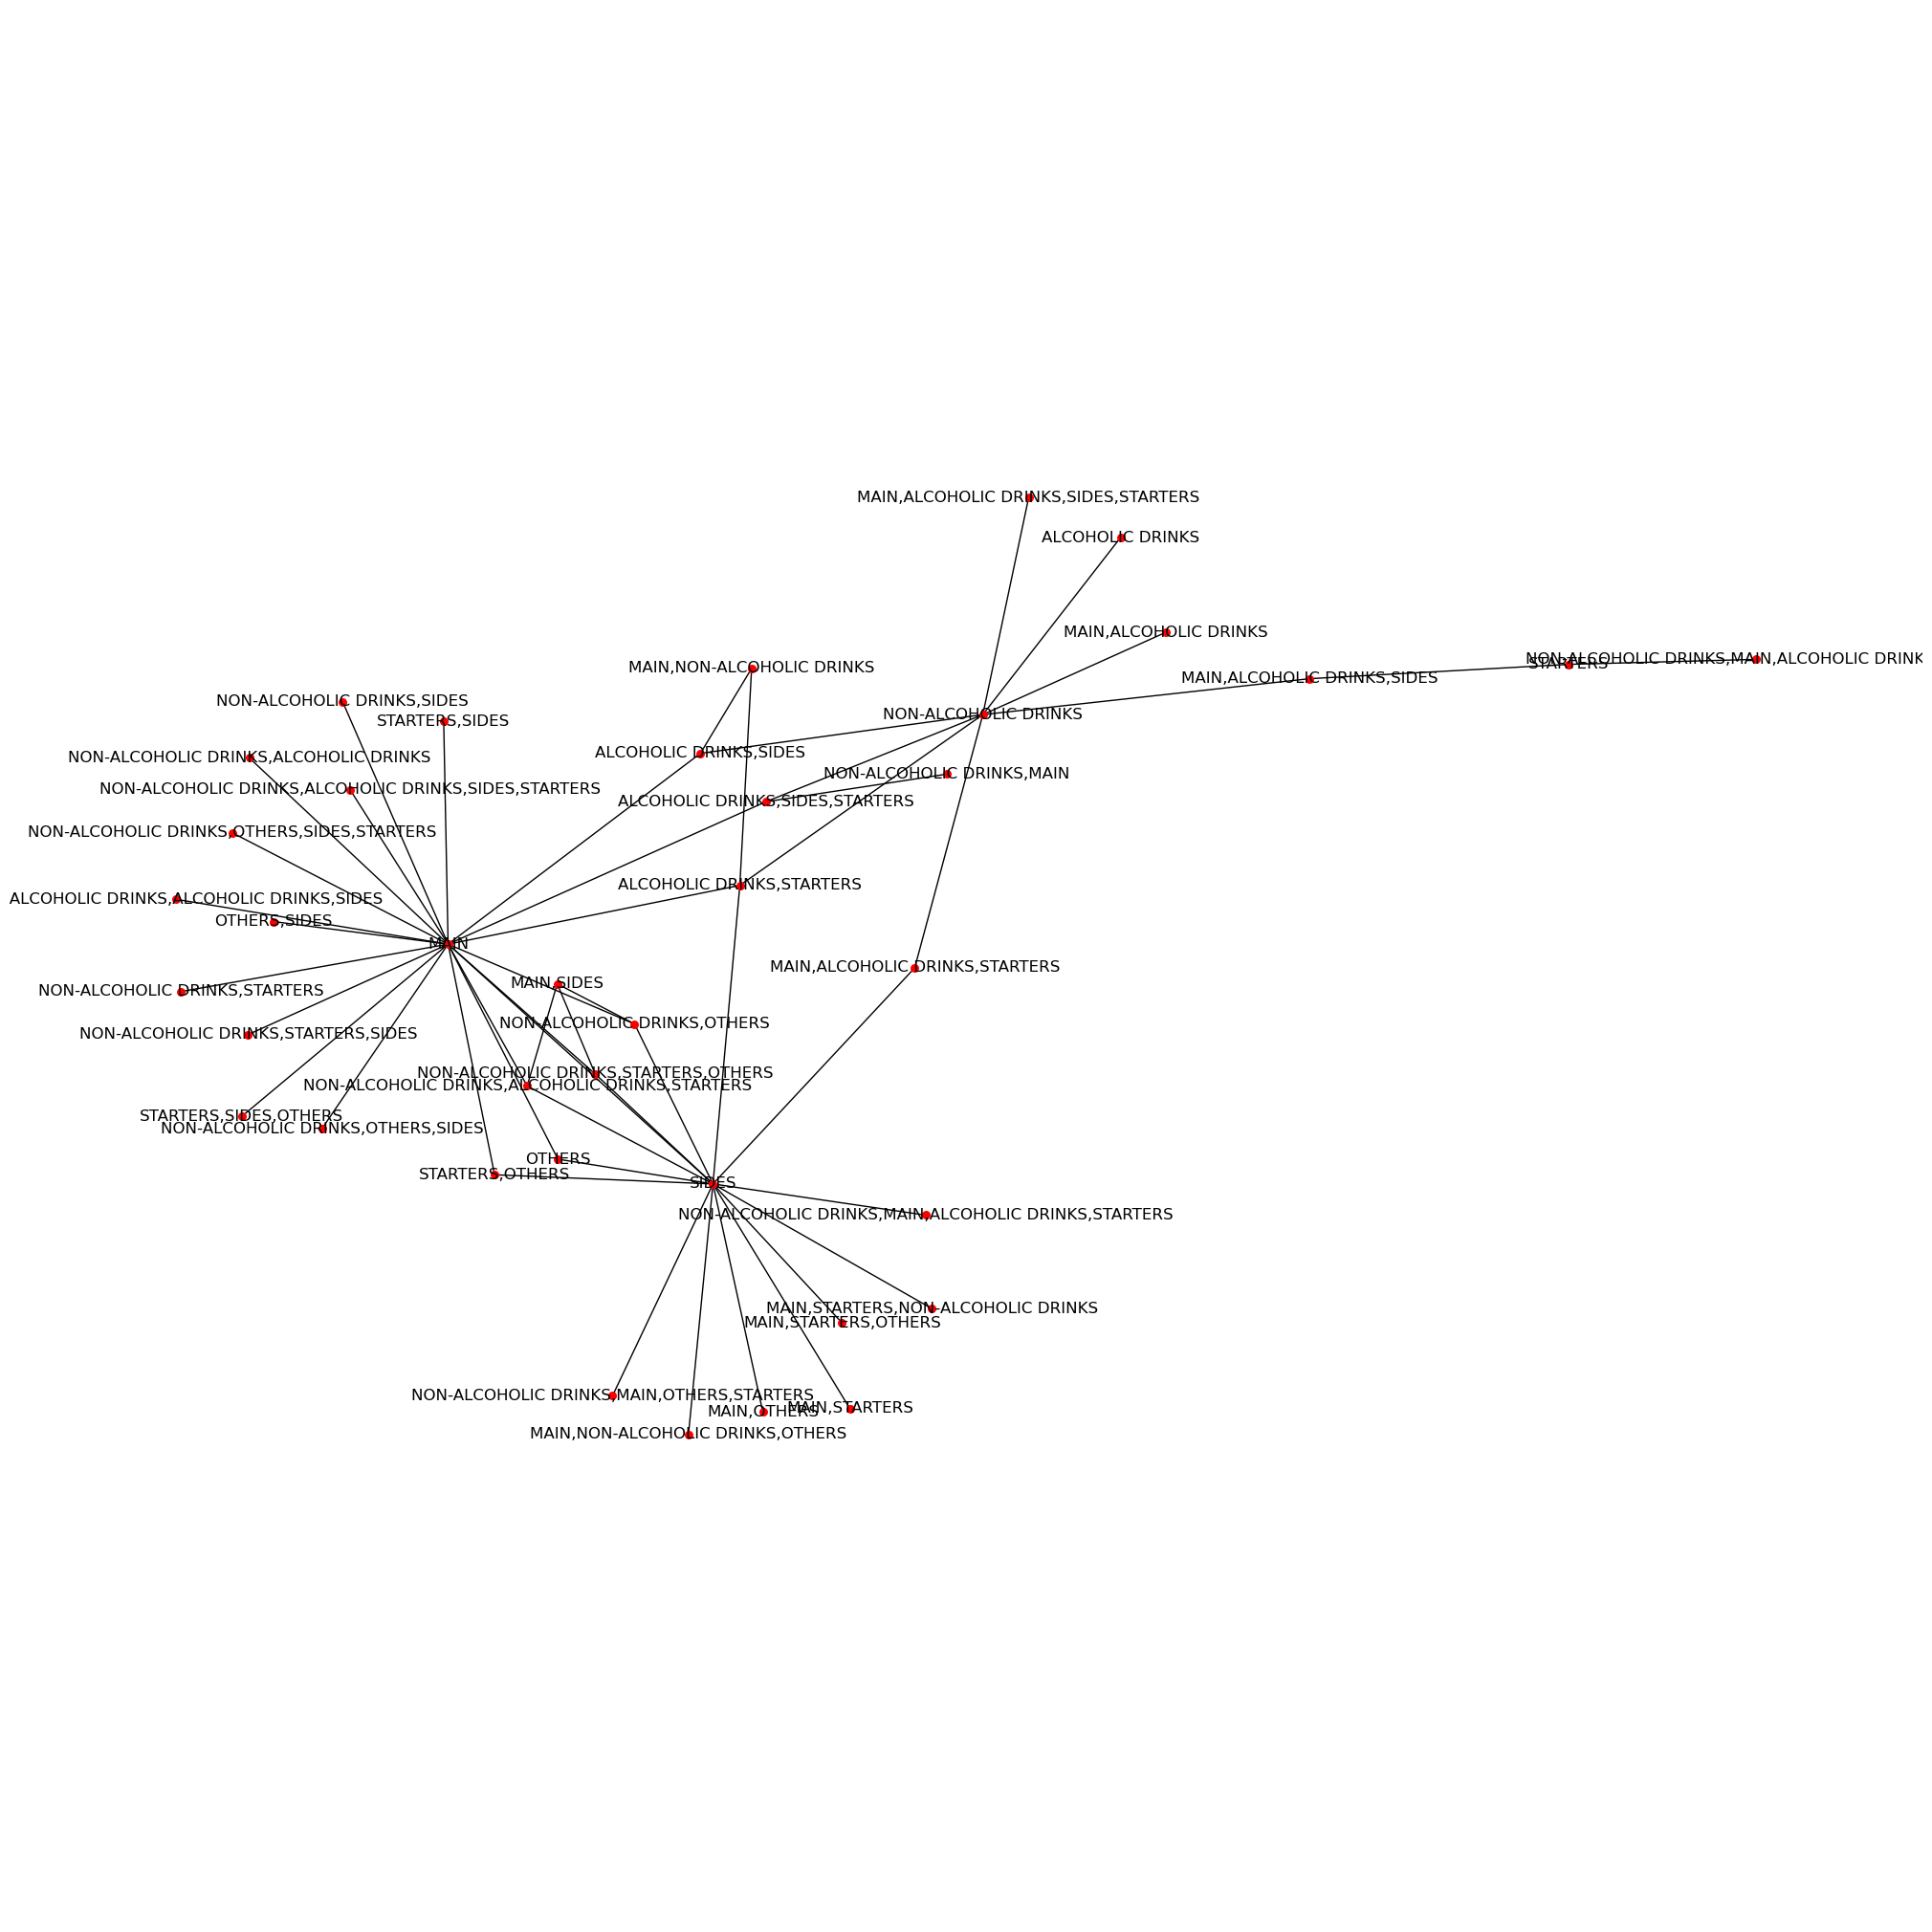

In [251]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="fall">
    
## 4.4.3. Fall
    
    
</a>

In [252]:
ds_fall = ds_imp[ds_imp['Season']=='Fall'].copy()

<a class="anchor" id="product_fall">
    
### 4.4.3.1. Using the Product Variable
    
    
</a>

In [253]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_fall[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BEANSPROUTS  \
DocNumber                                                                       
TK0110038942018            False         False         False            False   
TK0110038952018            False         False         False            False   
TK0110038962018            False         False         False            False   
TK0110038972018            False         False         False            False   
TK0110038982018            False         False         False            False   

Product           NO CHILLY   NO EGG   NO MEAT   NO MUSHROOMS   NO ONION  \
DocNumber                                                                  
TK0110038942018       False    False     False          False      False   
TK0110038952018       False    False     False          False      False   
TK0110038962018       False    False     False          False      False   
TK0110038972018       False    False      True          False      False   
TK0110038982018       False    False     False          False      False   

Product           NO PORK  ...  TONIC  VASSILIKON XYNISTERI  VEG BBS  \
DocNumber                  ...                                         
TK0110038942018     False  ...  False                 False    False   
TK0110038952018     False  ...  False                 False    False   
TK0110038962018     False  ...  False                 False    False   
TK0110038972018     False  ...  False                 False    False   
TK0110038982018     False  ...  False                 False    False   

Product          VEG RICE  VLASSIDES SHIRAZ  VOLCANO MAKI  WHISKY  \
DocNumber                                                           
TK0110038942018     False             False         False   False   
TK0110038952018     False             False         False   False   
TK0110038962018     False             False         False   False   
TK0110038972018     False             False         False   False   
TK0110038982018     False             False         False   False   

Product          YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                     
TK0110038942018             False         False        False  
TK0110038952018             False         False        False  
TK0110038962018             False         False        False  
TK0110038972018             False         False        False  
TK0110038982018             False         False        False  

[5 rows x 202 columns]

In [254]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [255]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents            consequents  \
0                                          ( NO MEAT)    (NOODLES WITH MEAT)   
4                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
5                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
6                     ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
7                             (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
9                      ( NO MEAT, SWEET SOUR CHICKEN)    (NOODLES WITH MEAT)   
1                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
3                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
2                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
23       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
19    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
33  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
12                    (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
30  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
32  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
27  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...                 (DUCK)   
24                      (SPRING ROLL, DUCK, BEEF BBS)  (MINERAL WATER 1.5LT)   
28    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
18              (MINERAL WATER 1.5LT, BEEF BBS, DUCK)       (EGG FRIED RICE)   
20            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
31  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
13                    (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
17          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
21               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
29  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, EGG ...                 (DUCK)   
15                          (DUCK, NOODLES WITH MEAT)  (MINERAL WATER 1.5LT)   
25       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
8                    (SPRING ROLL, NOODLES WITH MEAT)             ( NO MEAT)   
16                 (SPRING ROLL, MINERAL WATER 1.5LT)                 (DUCK)   
26            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)  (MINERAL WATER 1.5LT)   
11                         (BEEF BBS, EGG FRIED RICE)                 (DUCK)   
22     (SWEET SOUR CHICKEN, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
14              (MINERAL WATER 1.5LT, EGG FRIED RICE)                 (DUCK)   
10                                   (DUCK, BEEF BBS)       (EGG FRIED RICE)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.101595            0.165049  0.101595    1.000000  6.058824   
4             0.065187            0.165049  0.065187    1.000000  6.058824   
5             0.057906            0.165049  0.057906    1.000000  6.058824   
6             0.069695            0.165049  0.069695    1.000000  6.058824   
7             0.064494            0.165049  0.064494    1.000000  6.058824   
9             0.052011            0.165049  0.052011    1.000000  6.058824   
1             0.134882            0.510749  0.124133    0.920308  1.801880   
3             0.061026            0.510749  0.054785    0.897727  1.757668   
2             0.090499            0.510749  0.078710    0.869732  1.702856   
23            0.076283            0.424064  0.060333    0.790909  1.865071   
19            0.087379            0.424064  0.069001    0.789683  1.862179   
33            0.070388            0.424064  0.055132    0.783251  1.847013   
12            0.120666            0.424064  0.092926    0.770115  1.816036   
30            0.096047            0.424064  0.073162    0.761733  1.796269   
32            0.073162            0.399098  0.055132    0.753555  1.888

In [256]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
59                    (SPRING ROLL, NOODLES WITH MEAT)   
62                                          ( NO MEAT)   
46                           (DUCK, NOODLES WITH MEAT)   
47                                          ( NO MEAT)   
56                                          ( NO MEAT)   
55            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
51                 (NOODLES WITH MEAT, EGG FRIED RICE)   
52                                          ( NO MEAT)   
66             (SWEET SOUR CHICKEN, NOODLES WITH MEAT)   
67                                          ( NO MEAT)   
53                                 (NOODLES WITH MEAT)   
44                                    ( NO MEAT, DUCK)   
49                                 (NOODLES WITH MEAT)   
50                          ( NO MEAT, EGG FRIED RICE)   
54                     ( NO MEAT, MINERAL WATER 1.5LT)   
57                                 (NOODLES WITH MEAT)   
58                             (SPRING ROLL,  NO MEAT)   
64                      ( NO MEAT, SWEET SOUR CHICKEN)   
69                                 (NOODLES WITH MEAT)   
3                                  (NOODLES WITH MEAT)   
2                                           ( NO MEAT)   
63                                 (NOODLES WITH MEAT)   
18                                (CHICK TIKKA MASALA)   
19                                        (JIRA PULAO)   
32                                              (NAAN)   
33                                        (JIRA PULAO)   
21                                              (NAAN)   
20                                (CHICK TIKKA MASALA)   
348          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)   
347                (SPRING ROLL, DUCK, EGG FRIED RICE)   
356                      (SPRING ROLL, EGG FRIED RICE)   
339    (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, DUCK)   
342  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...   
353                         (DUCK, SWEET SOUR CHICKEN)   
351              (MINERAL WATER 1.5LT, EGG FRIED RICE)   
344            (SPRING ROLL, DUCK, SWEET SOUR CHICKEN)   
214                                   (DUCK, BEEF BBS)   
213              (MINERAL WATER 1.5LT, EGG FRIED RICE)   
253                            (SPRING ROLL, BEEF BBS)   
254                        (MINERAL WATER 1.5LT, DUCK)   
251                 (SPRING ROLL, MINERAL WATER 1.5LT)   
256                                   (DUCK, BEEF BBS)   
209        (EGG FRIED RICE, MINERAL WATER 1.5LT, DUCK)   
218                                         (BEEF BBS)   

                                           consequents  antecedent support  \
59                                          ( NO MEAT)            0.091193   
62                    (SPRING ROLL, NOODLES WITH MEAT)            0.101595   
46                                          ( NO MEAT)            0.093273   
47                           (DUCK, NOODLES WITH MEAT)            0.101595   
56            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.101595   
55                                          ( NO MEAT)            0.103675   
51                                          ( NO MEAT)            0.088766   
52                 (NOODLES WITH MEAT, EGG FRIED RICE)            0.101595   
66                                          ( NO MEAT)            0.082178   
67             (SWEET SOUR CHICKEN, NOODLES WITH MEAT)            0.101595   
53                          ( NO MEAT, EGG FRIED RICE)            0.165049   
44                                 (NOODLES WITH MEAT)            0.065187   
49                                    ( NO MEAT, DUCK)            0.165049   
50                                 (NOODLES WITH MEAT)            0.057906   
54                                 (NOODLES WITH MEAT)            0.069695   
57                     ( NO MEAT, MINERAL WATER 1.5LT)            0.165049   
58                                 (NOODLES WITH MEAT)            0.064494   
64                          

In [257]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [258]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                               itemsets  length
46  0.248960                 (DUCK, EGG FRIED RICE)       2
48  0.219140            (DUCK, MINERAL WATER 1.5LT)       2
51  0.214979                    (SPRING ROLL, DUCK)       2
55  0.200416  (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
59  0.216713   (SWEET SOUR CHICKEN, EGG FRIED RICE)       2

In [259]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents            consequents  \
0                                          ( NO MEAT)    (NOODLES WITH MEAT)   
4                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
5                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
6                     ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
7                             (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
9                      ( NO MEAT, SWEET SOUR CHICKEN)    (NOODLES WITH MEAT)   
1                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
3                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
2                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
23       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
19    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
33  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
12                    (MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   
30  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...                 (DUCK)   
32  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
27  (SPRING ROLL, MINERAL WATER 1.5LT, EGG FRIED R...                 (DUCK)   
28    (DUCK, SWEET SOUR CHICKEN, MINERAL WATER 1.5LT)       (EGG FRIED RICE)   
18              (MINERAL WATER 1.5LT, BEEF BBS, DUCK)       (EGG FRIED RICE)   
20            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
31  (SPRING ROLL, MINERAL WATER 1.5LT, SWEET SOUR ...       (EGG FRIED RICE)   
13                    (MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
17          (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       (EGG FRIED RICE)   
21               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)       (EGG FRIED RICE)   
29  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, EGG ...                 (DUCK)   
25       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)       (EGG FRIED RICE)   
8                    (SPRING ROLL, NOODLES WITH MEAT)             ( NO MEAT)   
16                 (SPRING ROLL, MINERAL WATER 1.5LT)                 (DUCK)   
11                         (BEEF BBS, EGG FRIED RICE)                 (DUCK)   
22     (SWEET SOUR CHICKEN, BEEF BBS, EGG FRIED RICE)                 (DUCK)   
14              (MINERAL WATER 1.5LT, EGG FRIED RICE)                 (DUCK)   
10                                   (DUCK, BEEF BBS)       (EGG FRIED RICE)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.101595            0.165049  0.101595    1.000000  6.058824   
4             0.065187            0.165049  0.065187    1.000000  6.058824   
5             0.057906            0.165049  0.057906    1.000000  6.058824   
6             0.069695            0.165049  0.069695    1.000000  6.058824   
7             0.064494            0.165049  0.064494    1.000000  6.058824   
9             0.052011            0.165049  0.052011    1.000000  6.058824   
1             0.134882            0.510749  0.124133    0.920308  1.801880   
3             0.061026            0.510749  0.054785    0.897727  1.757668   
2             0.090499            0.510749  0.078710    0.869732  1.702856   
23            0.076283            0.424064  0.060333    0.790909  1.865071   
19            0.087379            0.424064  0.069001    0.789683  1.862179   
33            0.070388            0.424064  0.055132    0.783251  1.847013   
12            0.120666            0.424064  0.092926    0.770115  1.816036   
30            0.096047            0.424064  0.073162    0.761733  1.796269   
32            0.073162            0.399098  0.055132    0.753555  1.888142   
27            0.113731            0.424064  0.085298    0.750000  1.768602   
28            0.110610            0.399098  0.082178    0.742947  1.861562   
18            0.092926            0.399098  0.069001    0.742537  1.860537   

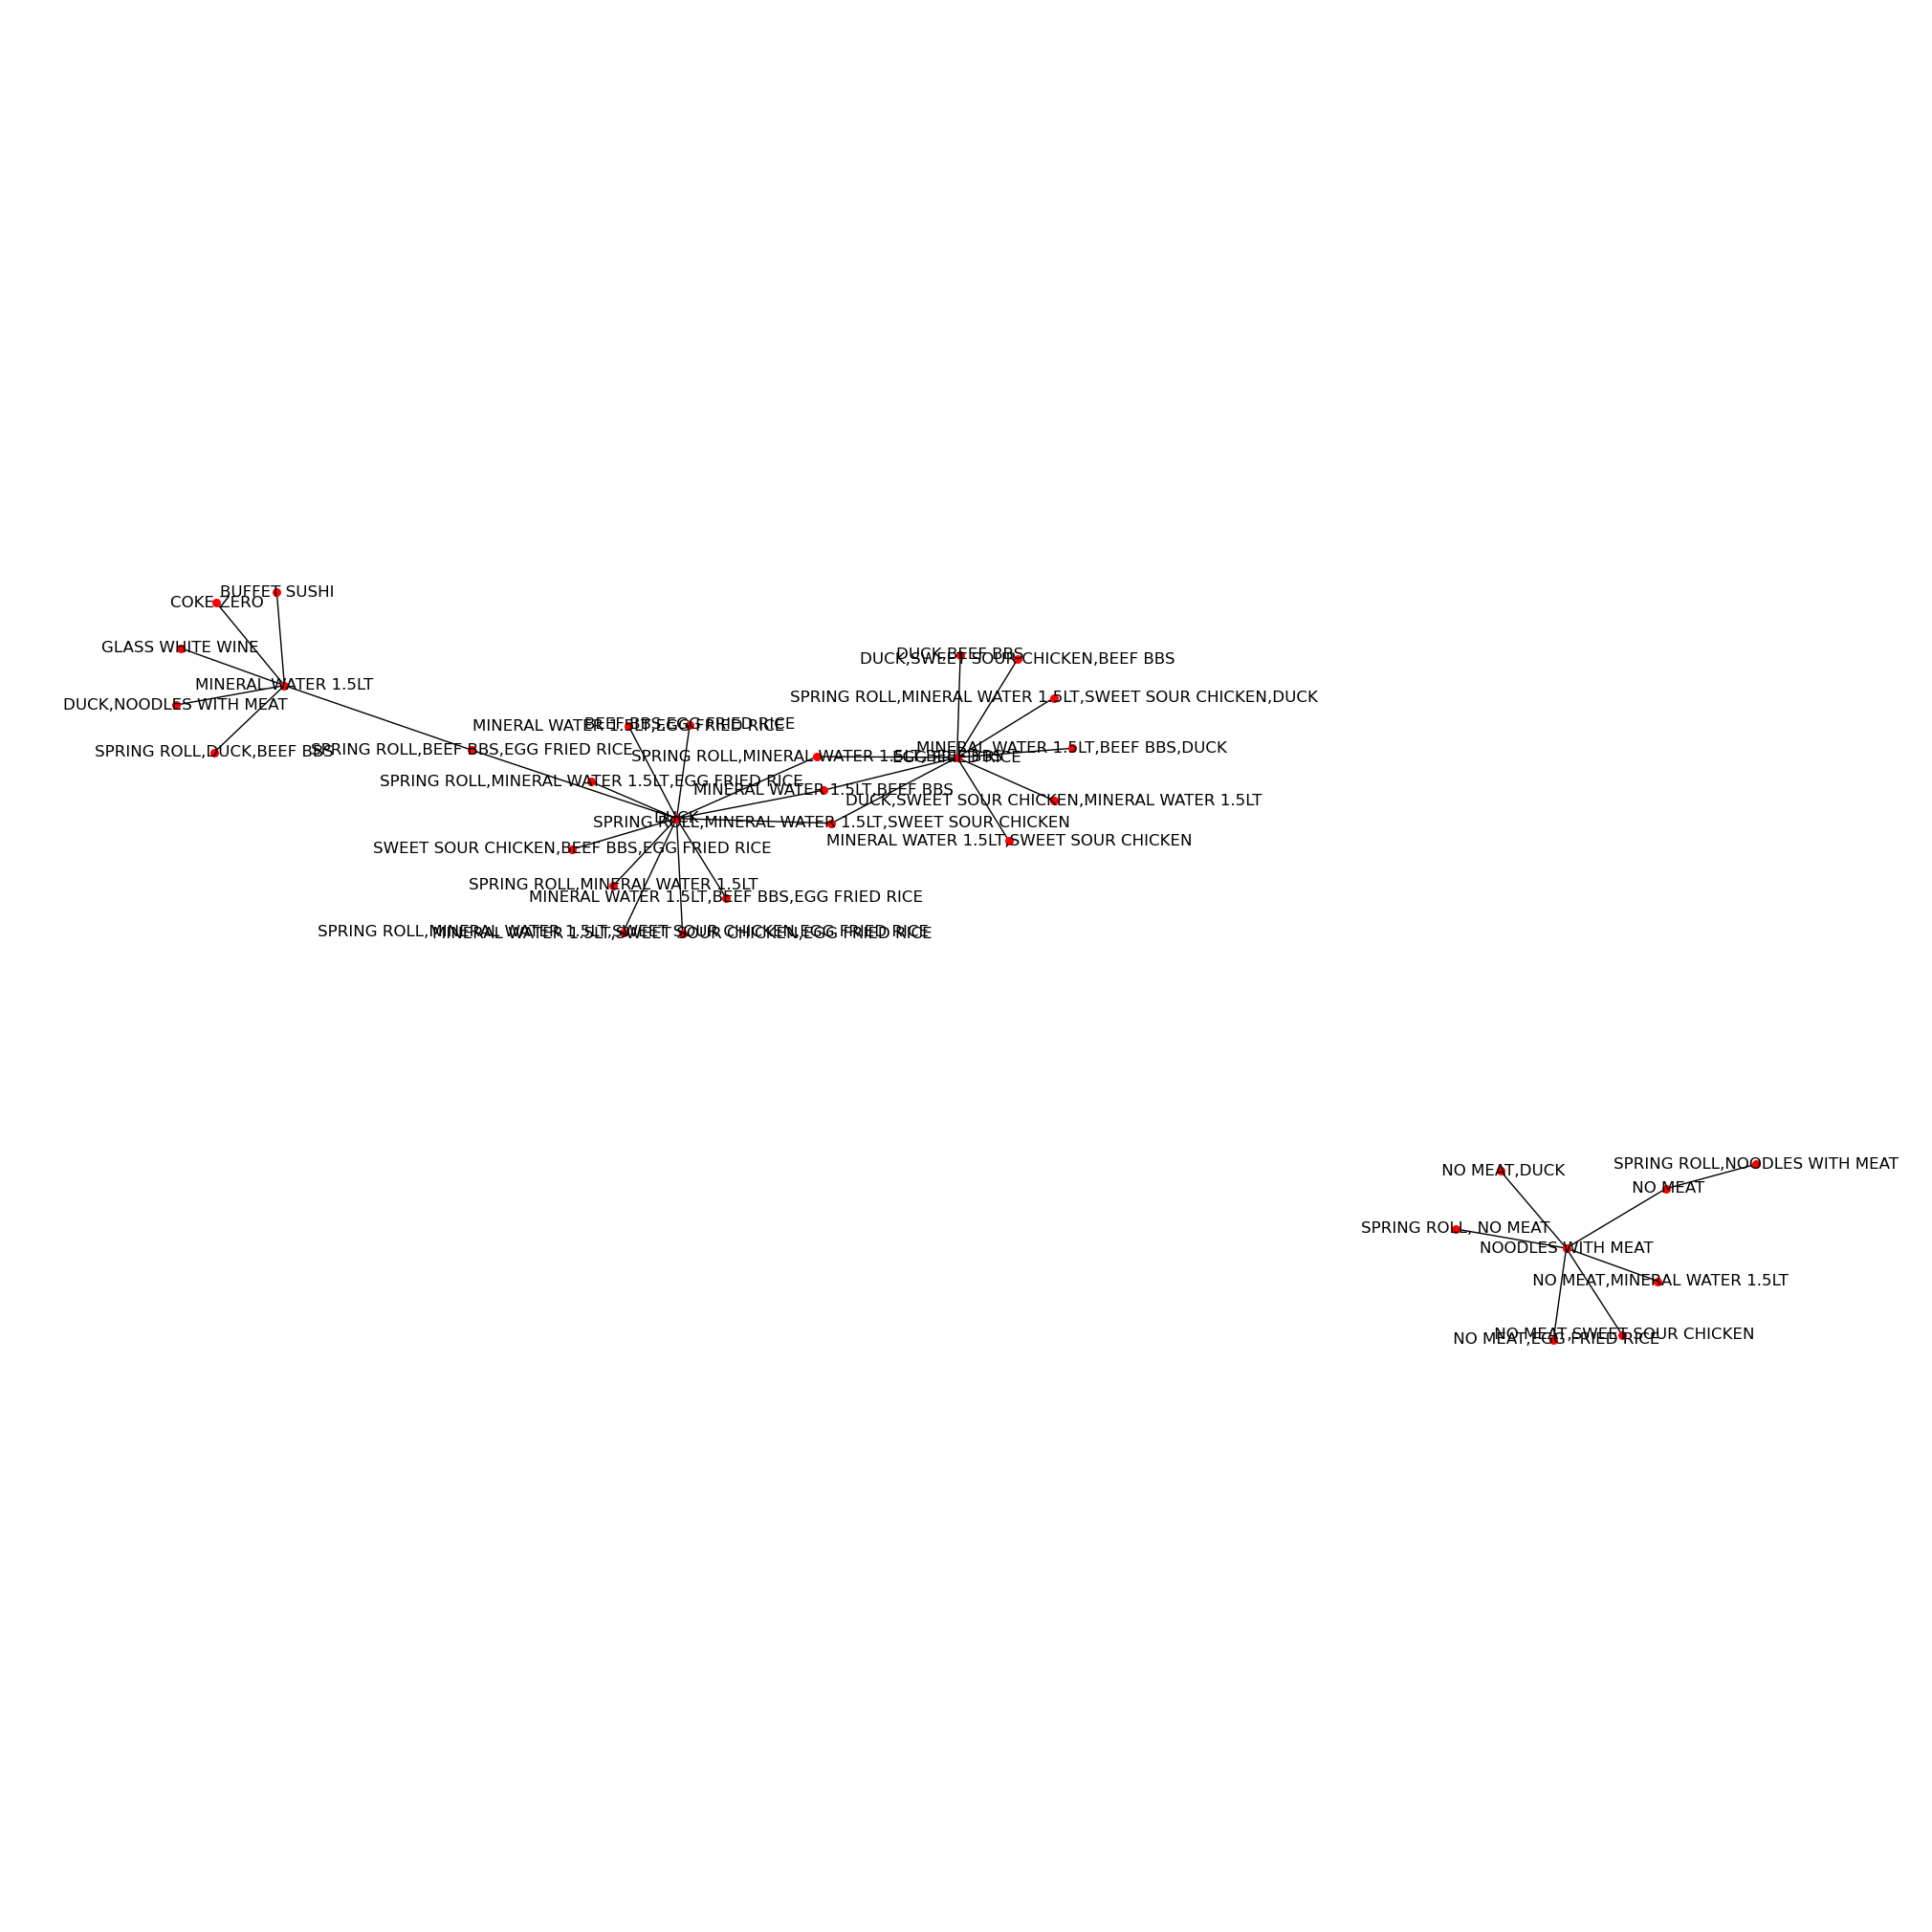

In [260]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="productcat_fall">
    
### 4.4.3.2. Using the ProductCategoryII Variable
    
    
</a>

In [261]:
# Pivot the data
pt = pd.pivot_table(ds_fall[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND  MAIN  MAIN IND  \
DocNumber                                                                   
TK0110038942018               False    False        False  True     False   
TK0110038952018               False    False        False  True     False   
TK0110038962018               False    False        False  True     False   
TK0110038972018                True    False         True  True     False   
TK0110038982018               False    False        False  True     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110038942018       False         False                  True   False   
TK0110038952018       False         False                  True   False   
TK0110038962018       False         False                  True   False   
TK0110038972018       False         False                  True    True   
TK0110038982018       False         False                  True   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110038942018     True      False      True         False  
TK0110038952018    False      False      True         False  
TK0110038962018     True      False      True         False  
TK0110038972018     True      False      True         False  
TK0110038982018     True      False      True         False

In [262]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [263]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
71                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
109  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
21                        (MAIN IND, ALCOHOLIC DRINKS)   
19                           (ALCOHOLIC DRINKS, SIDES)   
64     (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
95             (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
55                      (NON-ALCOHOLIC DRINKS, OTHERS)   
22                           (ALCOHOLIC DRINKS, SIDES)   
87                (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
63                     (MAIN, ALCOHOLIC DRINKS, SIDES)   
76                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
111          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
105           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
121     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
67   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
66                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
23                        (ALCOHOLIC DRINKS, STARTERS)   
20                        (ALCOHOLIC DRINKS, STARTERS)   
91            (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
120    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
31                      (NON-ALCOHOLIC DRINKS, OTHERS)   
88               (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
32                       (NON-ALCOHOLIC DRINKS, SIDES)   
115                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
33                    (NON-ALCOHOLIC DRINKS, STARTERS)   
43                                   (STARTERS, SIDES)   
16                            (MAIN, ALCOHOLIC DRINKS)   
65                           (ALCOHOLIC DRINKS, SIDES)   
98                            (MAIN, STARTERS, OTHERS)   
34                                      (MAIN, OTHERS)   
5                                              (SIDES)   
1                                   (ALCOHOLIC DRINKS)   
68                        (ALCOHOLIC DRINKS, STARTERS)   
35                                     (OTHERS, SIDES)   
89                      (NON-ALCOHOLIC DRINKS, OTHERS)   
124           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
100                          (STARTERS, SIDES, OTHERS)   
110  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
70                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
93              (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)   
59                                  (STARTERS, OTHERS)   
11                                            (OTHERS)   
75   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
90                (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   

                      consequents  antecedent support  consequent support  \
71                         (MAIN)            0.118362            0.854217   
109                        (MAIN)            0.115585            0.854217   
21         (NON-ALCOHOLIC DRINKS)            0.055536            0.552239   
19                         (MAIN)            0.136064            0.854217   
64                         (MAIN)            0.132940            0.854217   
95                         (MAIN)            0.295036            0.854217   
55                        (SIDES)            0.093370            0.680666   
22         (NON-ALCOHOLIC DRINKS)            0.136064            0.552239   
87                        (SIDES)            0.090594            0.680666   
63         (NON-ALCOHOLIC DRINKS)            0.133287            0.552239   
76         (NON-ALCOHOLIC DRINKS)            0.118362            0.552239   
111        (NON-ALCOHOLIC DRINKS)            0.117320            0.552239   
105                       (SIDES)            0.086428            0.680666   
121                       (SIDES)            0.083999            0.680666   
67                         (MAIN)            0.124610            0.854217   
66         (NON-ALCOHOLIC DRINKS)            0.124610            0.552239   
23         (NON-ALCOHOLIC DRINKS)            0.128081            0.552239   
20                         (MAIN)            0

In [264]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
42                  (MAIN IND, STARTERS IND)   
47                               (SIDES IND)   
6                             (MAIN VEG IND)   
7                                (SIDES IND)   
31         (NON-ALCOHOLIC DRINKS, SIDES IND)   
32                                (MAIN IND)   
43                     (MAIN IND, SIDES IND)   
46                            (STARTERS IND)   
45                                (MAIN IND)   
44                 (STARTERS IND, SIDES IND)   
8                             (STARTERS IND)   
9                                (SIDES IND)   
3                                (SIDES IND)   
2                                 (MAIN IND)   
27                         (MAIN, SIDES IND)   
28                                (MAIN IND)   
39                     (STARTERS, SIDES IND)   
40                                (MAIN IND)   
36                                (MAIN IND)   
35                        (SIDES, SIDES IND)   
33                               (SIDES IND)   
30          (MAIN IND, NON-ALCOHOLIC DRINKS)   
38                      (MAIN IND, STARTERS)   
41                               (SIDES IND)   
29                               (SIDES IND)   
26                          (MAIN, MAIN IND)   
5                             (STARTERS IND)   
4                                 (MAIN IND)   
34                         (MAIN IND, SIDES)   
37                               (SIDES IND)   
103                (ALCOHOLIC DRINKS, SIDES)   
96    (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)   
97           (MAIN, ALCOHOLIC DRINKS, SIDES)   
102         (NON-ALCOHOLIC DRINKS, STARTERS)   
105             (ALCOHOLIC DRINKS, STARTERS)   
94       (NON-ALCOHOLIC DRINKS, MAIN, SIDES)   
100            (NON-ALCOHOLIC DRINKS, SIDES)   
99        (MAIN, ALCOHOLIC DRINKS, STARTERS)   
68                 (ALCOHOLIC DRINKS, SIDES)   
67          (NON-ALCOHOLIC DRINKS, STARTERS)   
66             (NON-ALCOHOLIC DRINKS, SIDES)   
69              (ALCOHOLIC DRINKS, STARTERS)   
95   (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
104                 (MAIN, ALCOHOLIC DRINKS)   

                                 consequents  antecedent support  \
42                               (SIDES IND)            0.076709   
47                  (MAIN IND, STARTERS IND)            0.182228   
6                                (SIDES IND)            0.062825   
7                             (MAIN VEG IND)            0.182228   
31                                (MAIN IND)            0.100659   
32         (NON-ALCOHOLIC DRINKS, SIDES IND)            0.207914   
43                            (STARTERS IND)            0.153419   
46                     (MAIN IND, SIDES IND)            0.109337   
45                 (STARTERS IND, SIDES IND)            0.207914   
44                                (MAIN IND)            0.080875   
8                                (SIDES IND)            0.109337   
9                             (STARTERS IND)            0.182228   
3                                 (MAIN IND)            0.182228   
2                                (SIDES IND)            0.207914   
27                                (MAIN IND)            0.087470   
28                         (MAIN, SIDES IND)            0.207914   
39                                (MAIN IND)            0.070115   
40                     (STARTERS, SIDES IND)            0.207914   
36                        (SIDES, SIDES IND)            0.207914   
35                                (MAIN IND)            0.069420   
33          (MAIN IND, NON-ALCOHOLIC DRINKS)            0.182228   
30                               (SIDES IND)            0.127733   
38                               (SIDES IND)            0.085387   
41                      (MAIN IND, STARTERS)            0.182228   
29                          (MAIN, MAIN IND)            0.182228   
26                               (SIDES IND)            0.108296   
5                                 (M

In [265]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [266]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                       itemsets  length
12  0.202707       (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)       2
16  0.493579                   (MAIN, NON-ALCOHOLIC DRINKS)       2
18  0.646650                                  (MAIN, SIDES)       2
20  0.585908                               (MAIN, STARTERS)       2
29  0.346407                  (NON-ALCOHOLIC DRINKS, SIDES)       2
31  0.321069               (NON-ALCOHOLIC DRINKS, STARTERS)       2
36  0.565776                              (STARTERS, SIDES)       2
51  0.335647            (MAIN, NON-ALCOHOLIC DRINKS, SIDES)       3
53  0.309268         (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)       3
57  0.543214                        (MAIN, STARTERS, SIDES)       3
68  0.295036        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)       3
79  0.288789  (MAIN, STARTERS, NON-ALCOHOLIC DRINKS, SIDES)       4

In [267]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
21                (MAIN IND, ALCOHOLIC DRINKS)   
22                   (ALCOHOLIC DRINKS, SIDES)   
63             (MAIN, ALCOHOLIC DRINKS, SIDES)   
76         (ALCOHOLIC DRINKS, SIDES, STARTERS)   
111  (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
66          (MAIN, ALCOHOLIC DRINKS, STARTERS)   
23                (ALCOHOLIC DRINKS, STARTERS)   
115        (ALCOHOLIC DRINKS, SIDES, STARTERS)   
16                    (MAIN, ALCOHOLIC DRINKS)   
65                   (ALCOHOLIC DRINKS, SIDES)   
1                           (ALCOHOLIC DRINKS)   
68                (ALCOHOLIC DRINKS, STARTERS)   
116         (MAIN, ALCOHOLIC DRINKS, STARTERS)   
123       (NON-ALCOHOLIC DRINKS, MAIN, OTHERS)   
107             (NON-ALCOHOLIC DRINKS, OTHERS)   
78                (ALCOHOLIC DRINKS, STARTERS)   
53                    (MAIN IND, STARTERS IND)   
92              (NON-ALCOHOLIC DRINKS, OTHERS)   
122      (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
118               (ALCOHOLIC DRINKS, STARTERS)   
125             (NON-ALCOHOLIC DRINKS, OTHERS)   
48           (NON-ALCOHOLIC DRINKS, SIDES IND)   
101                             (MAIN, OTHERS)   
18                          (ALCOHOLIC DRINKS)   
114            (MAIN, ALCOHOLIC DRINKS, SIDES)   
54                   (STARTERS IND, SIDES IND)   
10                              (MAIN VEG IND)   
77                   (ALCOHOLIC DRINKS, SIDES)   
8                                  (SIDES IND)   
117                  (ALCOHOLIC DRINKS, SIDES)   
29                           (MAIN, SIDES IND)   
52                       (STARTERS, SIDES IND)   
50                          (SIDES, SIDES IND)   
15                              (STARTERS IND)   
7                                   (MAIN IND)   
9                               (STARTERS IND)   

                                consequents  antecedent support  \
21                   (NON-ALCOHOLIC DRINKS)            0.055536   
22                   (NON-ALCOHOLIC DRINKS)            0.136064   
63                   (NON-ALCOHOLIC DRINKS)            0.133287   
76                   (NON-ALCOHOLIC DRINKS)            0.118362   
111                  (NON-ALCOHOLIC DRINKS)            0.117320   
66                   (NON-ALCOHOLIC DRINKS)            0.124610   
23                   (NON-ALCOHOLIC DRINKS)            0.128081   
115            (NON-ALCOHOLIC DRINKS, MAIN)            0.118362   
16                   (NON-ALCOHOLIC DRINKS)            0.191253   
65             (MAIN, NON-ALCOHOLIC DRINKS)            0.136064   
1                    (NON-ALCOHOLIC DRINKS)            0.213468   
68             (MAIN, NON-ALCOHOLIC DRINKS)            0.128081   
116           (NON-ALCOHOLIC DRINKS, SIDES)            0.124610   
123                       (STARTERS, SIDES)            0.090594   
107                       (STARTERS, SIDES)            0.093370   
78            (NON-ALCOHOLIC DRINKS, SIDES)            0.128081   
53                              (SIDES IND)            0.076709   
92                         (MAIN, STARTERS)            0.093370   
122                        (MAIN, STARTERS)            0.091288   
118     (NON-ALCOHOLIC DRINKS, MAIN, SIDES)            0.128081   
125                 (MAIN, STARTERS, SIDES)            0.093370   
48                               (MAIN IND)            0.100659   
101                       (STARTERS, SIDES)            0.167303   
18             (MAIN, NON-ALCOHOLIC DRINKS)            0.213468   
114        (NON-ALCOHOLIC DRINKS, STARTERS)            0.133287   
54                               (MAIN IND)            0.080875   
10                              (SIDES IND)            0.062825   
77         (NON-ALCOHOLIC DRINKS, STARTERS)            0.136064   
8                                (MAIN IND)            0.182228   
117  (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)            0.136064   
29                               (MAIN IND)            0.087470   
52                               (MAIN I

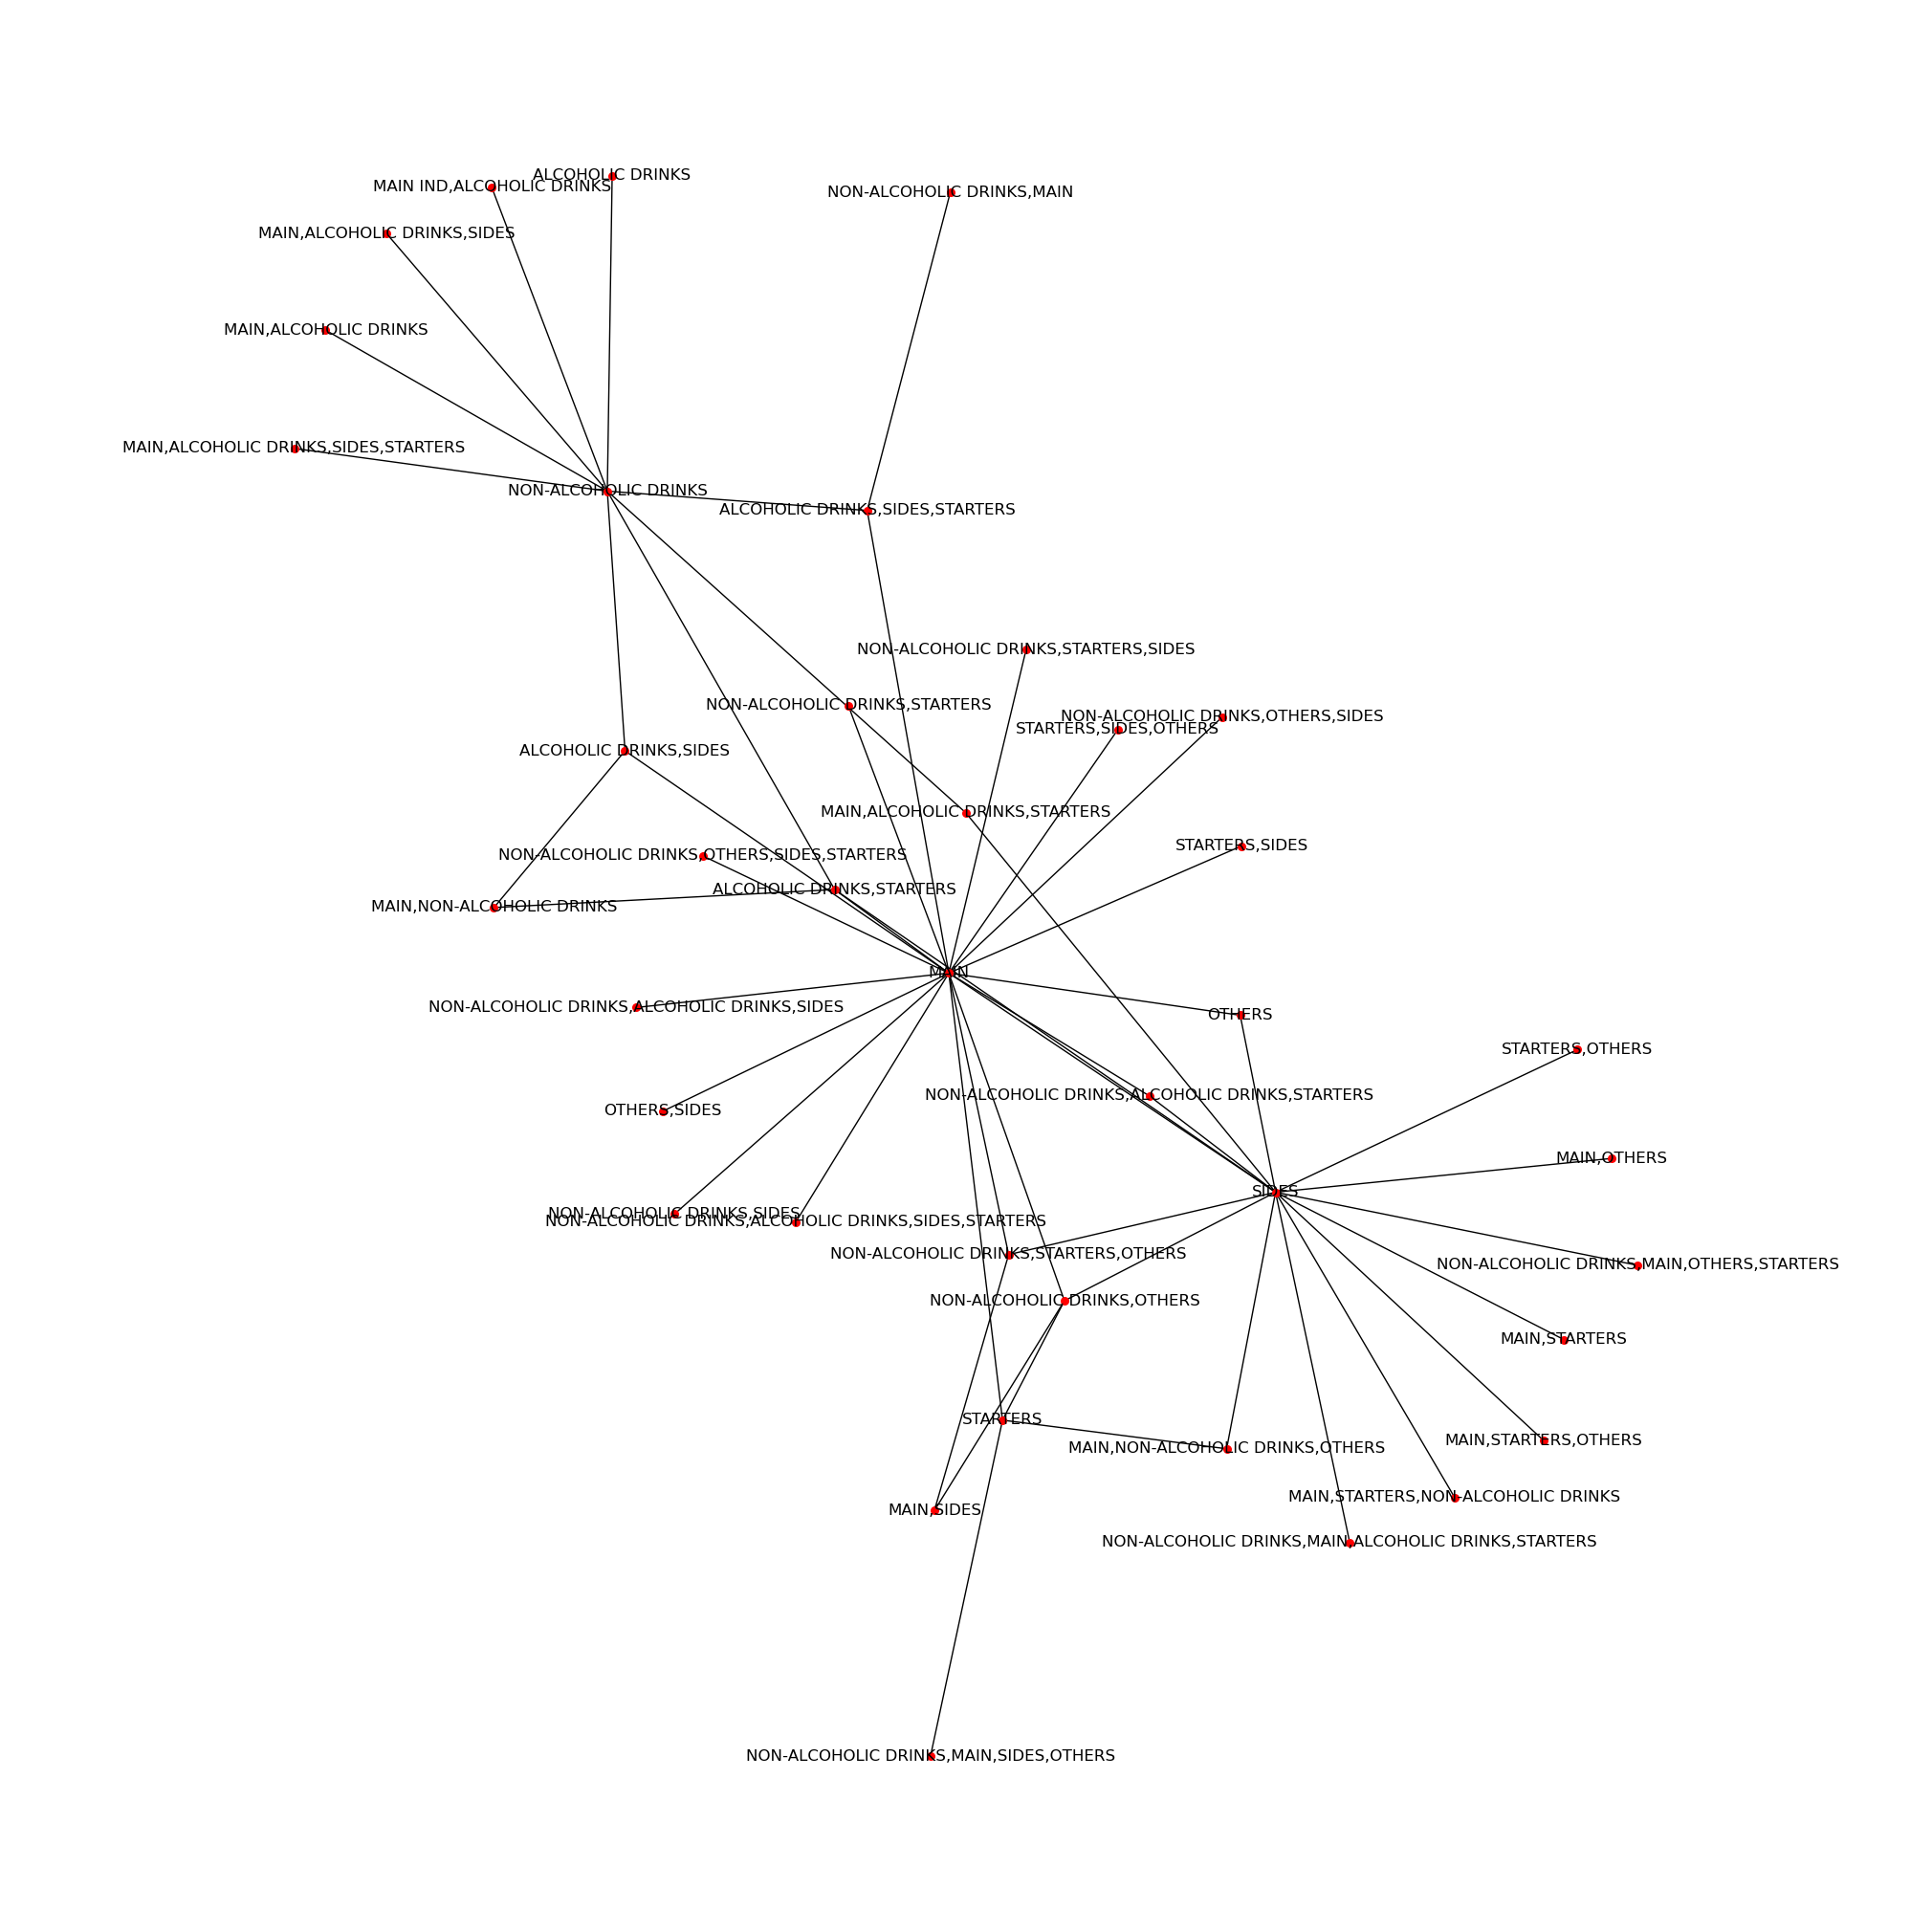

In [268]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="winter">
    
## 4.4.4. Winter
    
    
</a>

In [269]:
ds_winter = ds_imp[ds_imp['Season']=='Winter'].copy()

<a class="anchor" id="product_winter">
    
### 4.4.4.1. Using the Product Variable
    
    
</a>

In [270]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_winter[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BABY CORN  \
DocNumber                                                                     
TK0110000012018            False         False         False          False   
TK0110000022018            False         False         False          False   
TK0110000032018            False         False         False          False   
TK0110000042018            False         False         False          False   
TK0110000052018            False         False         False          False   

Product           NO BEANSPROUTS   NO CHILLY   NO EGG   NO MEAT  \
DocNumber                                                         
TK0110000012018            False       False    False     False   
TK0110000022018            False       False    False      True   
TK0110000032018            False       False    False     False   
TK0110000042018            False       False    False     False   
TK0110000052018            False       False    False     False   

Product           NO MUSHROOMS   NO ONION  ...  VASSILIKON XYNISTERI  VEG BBS  \
DocNumber                                  ...                                  
TK0110000012018          False      False  ...                 False    False   
TK0110000022018          False      False  ...                 False    False   
TK0110000032018          False      False  ...                 False    False   
TK0110000042018          False      False  ...                 False    False   
TK0110000052018          False      False  ...                 False    False   

Product          VEG RICE  VELOUDO RED  VLASSIDES SHIRAZ  VOLCANO MAKI  \
DocNumber                                                                
TK0110000012018     False        False             False         False   
TK0110000022018     False        False             False         False   
TK0110000032018     False        False             False         False   
TK0110000042018     False        False             False         False   
TK0110000052018     False        False             False         False   

Product          WHISKY  YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                             
TK0110000012018   False             False         False        False  
TK0110000022018   False             False         False        False  
TK0110000032018   False             False         False        False  
TK0110000042018   False             False         False        False  
TK0110000052018   False             False         False        False  

[5 rows x 215 columns]

In [271]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [272]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents  \
0                                          ( NO MEAT)   
9                          ( NO MEAT, EGG FRIED RICE)   
40            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
32              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
44       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
19                     ( NO MEAT, SWEET SOUR CHICKEN)   
15                            (SPRING ROLL,  NO MEAT)   
11                    ( NO MEAT, MINERAL WATER 1.5LT)   
36                      (SPRING ROLL,  NO MEAT, DUCK)   
7                                    ( NO MEAT, DUCK)   
5                                  (GLASS WHITE WINE)   
2                                      (BUFFET SUSHI)   
3                                         (COKE ZERO)   
74  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...   
58       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
53            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
46  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
51    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)   
14                    ( NO MEAT, MINERAL WATER 1.5LT)   
47  ( NO MEAT, MINERAL WATER 1.5LT, NOODLES WITH M...   
49                    ( NO MEAT, MINERAL WATER 1.5LT)   
73  (MINERAL WATER 1.5LT, DUCK, BEEF BBS, EGG FRIE...   
59              (MINERAL WATER 1.5LT, DUCK, BEEF BBS)   
70  (MINERAL WATER 1.5LT, NOODLES WITH MEAT, EGG F...   
10                         ( NO MEAT, EGG FRIED RICE)   
43                         ( NO MEAT, EGG FRIED RICE)   
42      ( NO MEAT, NOODLES WITH MEAT, EGG FRIED RICE)   
22                    (MINERAL WATER 1.5LT, BEEF BBS)   
67     (MINERAL WATER 1.5LT, NOODLES WITH MEAT, DUCK)   
41   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
37             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
66             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
4                                (SALT PEPPER PRAWNS)   
71  (SPRING ROLL, MINERAL WATER 1.5LT, DUCK, BEEF ...   
50              (MINERAL WATER 1.5LT, DUCK, BEEF BBS)   
62    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)   
39                                   ( NO MEAT, DUCK)   
38                ( NO MEAT, DUCK, NOODLES WITH MEAT)   
8                                    ( NO MEAT, DUCK)   
23                            (SPRING ROLL, BEEF BBS)   

                         consequents  antecedent support  consequent support  \
0                (NOODLES WITH MEAT)            0.117397            0.179529   
9                (NOODLES WITH MEAT)            0.067691            0.179529   
40               (NOODLES WITH MEAT)            0.051995            0.179529   
32               (NOODLES WITH MEAT)            0.051341            0.179529   
44               (NOODLES WITH MEAT)            0.061151            0.179529   
19               (NOODLES WITH MEAT)            0.059516            0.179529   
15               (NOODLES WITH MEAT)            0.083061            0.179529   
11               (NOODLES WITH MEAT)            0.077829            0.179529   
36               (NOODLES WITH MEAT)            0.053630            0.179529   
7                (NOODLES WITH MEAT)            0.071942            0.179529   
5              (MINERAL WATER 1.5LT)            0.060170            0.490844   
2              (MINERAL WATER 1.5LT)            0.093852            0.490844   
3              (MINERAL WATER 1.5LT)            0.098757            0.490844   
74                            (DUCK)            0.063440            0.445062   
58                            (DUCK)            0.086004            0.445062   
53                            (DUCK)            0.090255            0.445062   
46                        ( NO MEAT)            0.077502            0.117397   
51                            (DUCK)            0.085023            0.445062   
14                     (SPRING ROLL)            0.077829            0.392740   
47                     (SPRING ROLL)            0.077829            0.392740   
49  (SPRING ROLL, NOODLE

In [273]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
268                    ( NO MEAT, MINERAL WATER 1.5LT)   
267                   (SPRING ROLL, NOODLES WITH MEAT)   
256                         ( NO MEAT, EGG FRIED RICE)   
253                   (SPRING ROLL, NOODLES WITH MEAT)   
272                                         ( NO MEAT)   
263  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
270           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
265                            (SPRING ROLL,  NO MEAT)   
241                   (SPRING ROLL, NOODLES WITH MEAT)   
242                                   ( NO MEAT, DUCK)   
230           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
231                                   ( NO MEAT, DUCK)   
250   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
259                                         ( NO MEAT)   
257                (NOODLES WITH MEAT, EGG FRIED RICE)   
252                            (SPRING ROLL,  NO MEAT)   
246                                         ( NO MEAT)   
237             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
78                                          ( NO MEAT)   
75                    (SPRING ROLL, NOODLES WITH MEAT)   
233                          (DUCK, NOODLES WITH MEAT)   
228                    ( NO MEAT, MINERAL WATER 1.5LT)   
234                                         ( NO MEAT)   
227     (MINERAL WATER 1.5LT, NOODLES WITH MEAT, DUCK)   
239                            (SPRING ROLL,  NO MEAT)   
244                          (DUCK, NOODLES WITH MEAT)   
82             (SWEET SOUR CHICKEN, NOODLES WITH MEAT)   
83                                          ( NO MEAT)   
67            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
68                                          ( NO MEAT)   
58                                          ( NO MEAT)   
57                 (NOODLES WITH MEAT, EGG FRIED RICE)   
49                           (DUCK, NOODLES WITH MEAT)   
50                                          ( NO MEAT)   
85                                 (NOODLES WITH MEAT)   
249            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)   
273                                (NOODLES WITH MEAT)   
56                          ( NO MEAT, EGG FRIED RICE)   
262       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
260                                (NOODLES WITH MEAT)   
59                                 (NOODLES WITH MEAT)   
66                     ( NO MEAT, MINERAL WATER 1.5LT)   
1                                  (NOODLES WITH MEAT)   
226              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   

                                           consequents  antecedent support  \
268                   (SPRING ROLL, NOODLES WITH MEAT)            0.077829   
267                    ( NO MEAT, MINERAL WATER 1.5LT)            0.112165   
256                   (SPRING ROLL, NOODLES WITH MEAT)            0.067691   
253                         ( NO MEAT, EGG FRIED RICE)            0.112165   
272  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...            0.117397   
263                                         ( NO MEAT)            0.077502   
270                            (SPRING ROLL,  NO MEAT)            0.109549   
265           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.083061   
241                                   ( NO MEAT, DUCK)            0.112165   
242                   (SPRING ROLL, NOODLES WITH MEAT)            0.071942   
230                                   ( NO MEAT, DUCK)            0.109549   
231           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.071942   
250                                         ( NO MEAT)            0.068345   
259   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)            0.117397   
257                            (SPRING ROLL,  NO MEAT)            0.097449   
252                (NOODLES WITH MEAT, EGG FRIED RICE)            0.083061   
246             (SPRING ROLL, DUCK, NOODLES WITH MEAT)            0.117397   
237                         

In [274]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [275]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                               itemsets  length
51  0.259974                 (DUCK, EGG FRIED RICE)       2
54  0.224003            (DUCK, MINERAL WATER 1.5LT)       2
59  0.238391                    (SPRING ROLL, DUCK)       2
61  0.201766             (DUCK, SWEET SOUR CHICKEN)       2
63  0.209614  (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
66  0.222368          (SPRING ROLL, EGG FRIED RICE)       2
67  0.227927   (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
76  0.205690     (SPRING ROLL, MINERAL WATER 1.5LT)       2

In [276]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.8) & (rulesConfidence['lift'] >= 1.5)]

antecedents            consequents  \
0                                          ( NO MEAT)    (NOODLES WITH MEAT)   
9                          ( NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
40            (SPRING ROLL,  NO MEAT, EGG FRIED RICE)    (NOODLES WITH MEAT)   
32              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)    (NOODLES WITH MEAT)   
44       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
19                     ( NO MEAT, SWEET SOUR CHICKEN)    (NOODLES WITH MEAT)   
15                            (SPRING ROLL,  NO MEAT)    (NOODLES WITH MEAT)   
11                    ( NO MEAT, MINERAL WATER 1.5LT)    (NOODLES WITH MEAT)   
36                      (SPRING ROLL,  NO MEAT, DUCK)    (NOODLES WITH MEAT)   
7                                    ( NO MEAT, DUCK)    (NOODLES WITH MEAT)   
5                                  (GLASS WHITE WINE)  (MINERAL WATER 1.5LT)   
2                                      (BUFFET SUSHI)  (MINERAL WATER 1.5LT)   
3                                         (COKE ZERO)  (MINERAL WATER 1.5LT)   
74  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...                 (DUCK)   
58       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)                 (DUCK)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.117397            0.179529  0.117397    1.000000  5.570128   
9             0.067691            0.179529  0.067691    1.000000  5.570128   
40            0.051995            0.179529  0.051995    1.000000  5.570128   
32            0.051341            0.179529  0.051341    1.000000  5.570128   
44            0.061151            0.179529  0.061151    1.000000  5.570128   
19            0.059516            0.179529  0.059516    1.000000  5.570128   
15            0.083061            0.179529  0.083061    1.000000  5.570128   
11            0.077829            0.179529  0.077829    1.000000  5.570128   
36            0.053630            0.179529  0.053630    1.000000  5.570128   
7             0.071942            0.179529  0.071942    1.000000  5.570128   
5             0.060170            0.490844  0.056573    0.940217  1.915513   
2             0.093852            0.490844  0.087966    0.937282  1.909533   
3             0.098757            0.490844  0.084042    0.850993  1.733736   
74            0.063440            0.445062  0.052322    0.824742  1.853095   
58            0.086004            0.445062  0.069653    0.809886  1.819714   

    leverage  conviction  
0   0.096321         inf  
9   0.055539         inf  
40  0.042660         inf  
32  0.042124         inf  
44  0.050173         inf  
19  0.048831         inf  
15  0.068149         inf  
11  0.063856         inf  
36  0.044002         inf  
7   0.059027         inf  
5   0.027039    8.516796  
2   0.041899    8.118215  
3   0.035567    3.417005  
74  0.024087    3.166410  
58  0.031376    2.918973

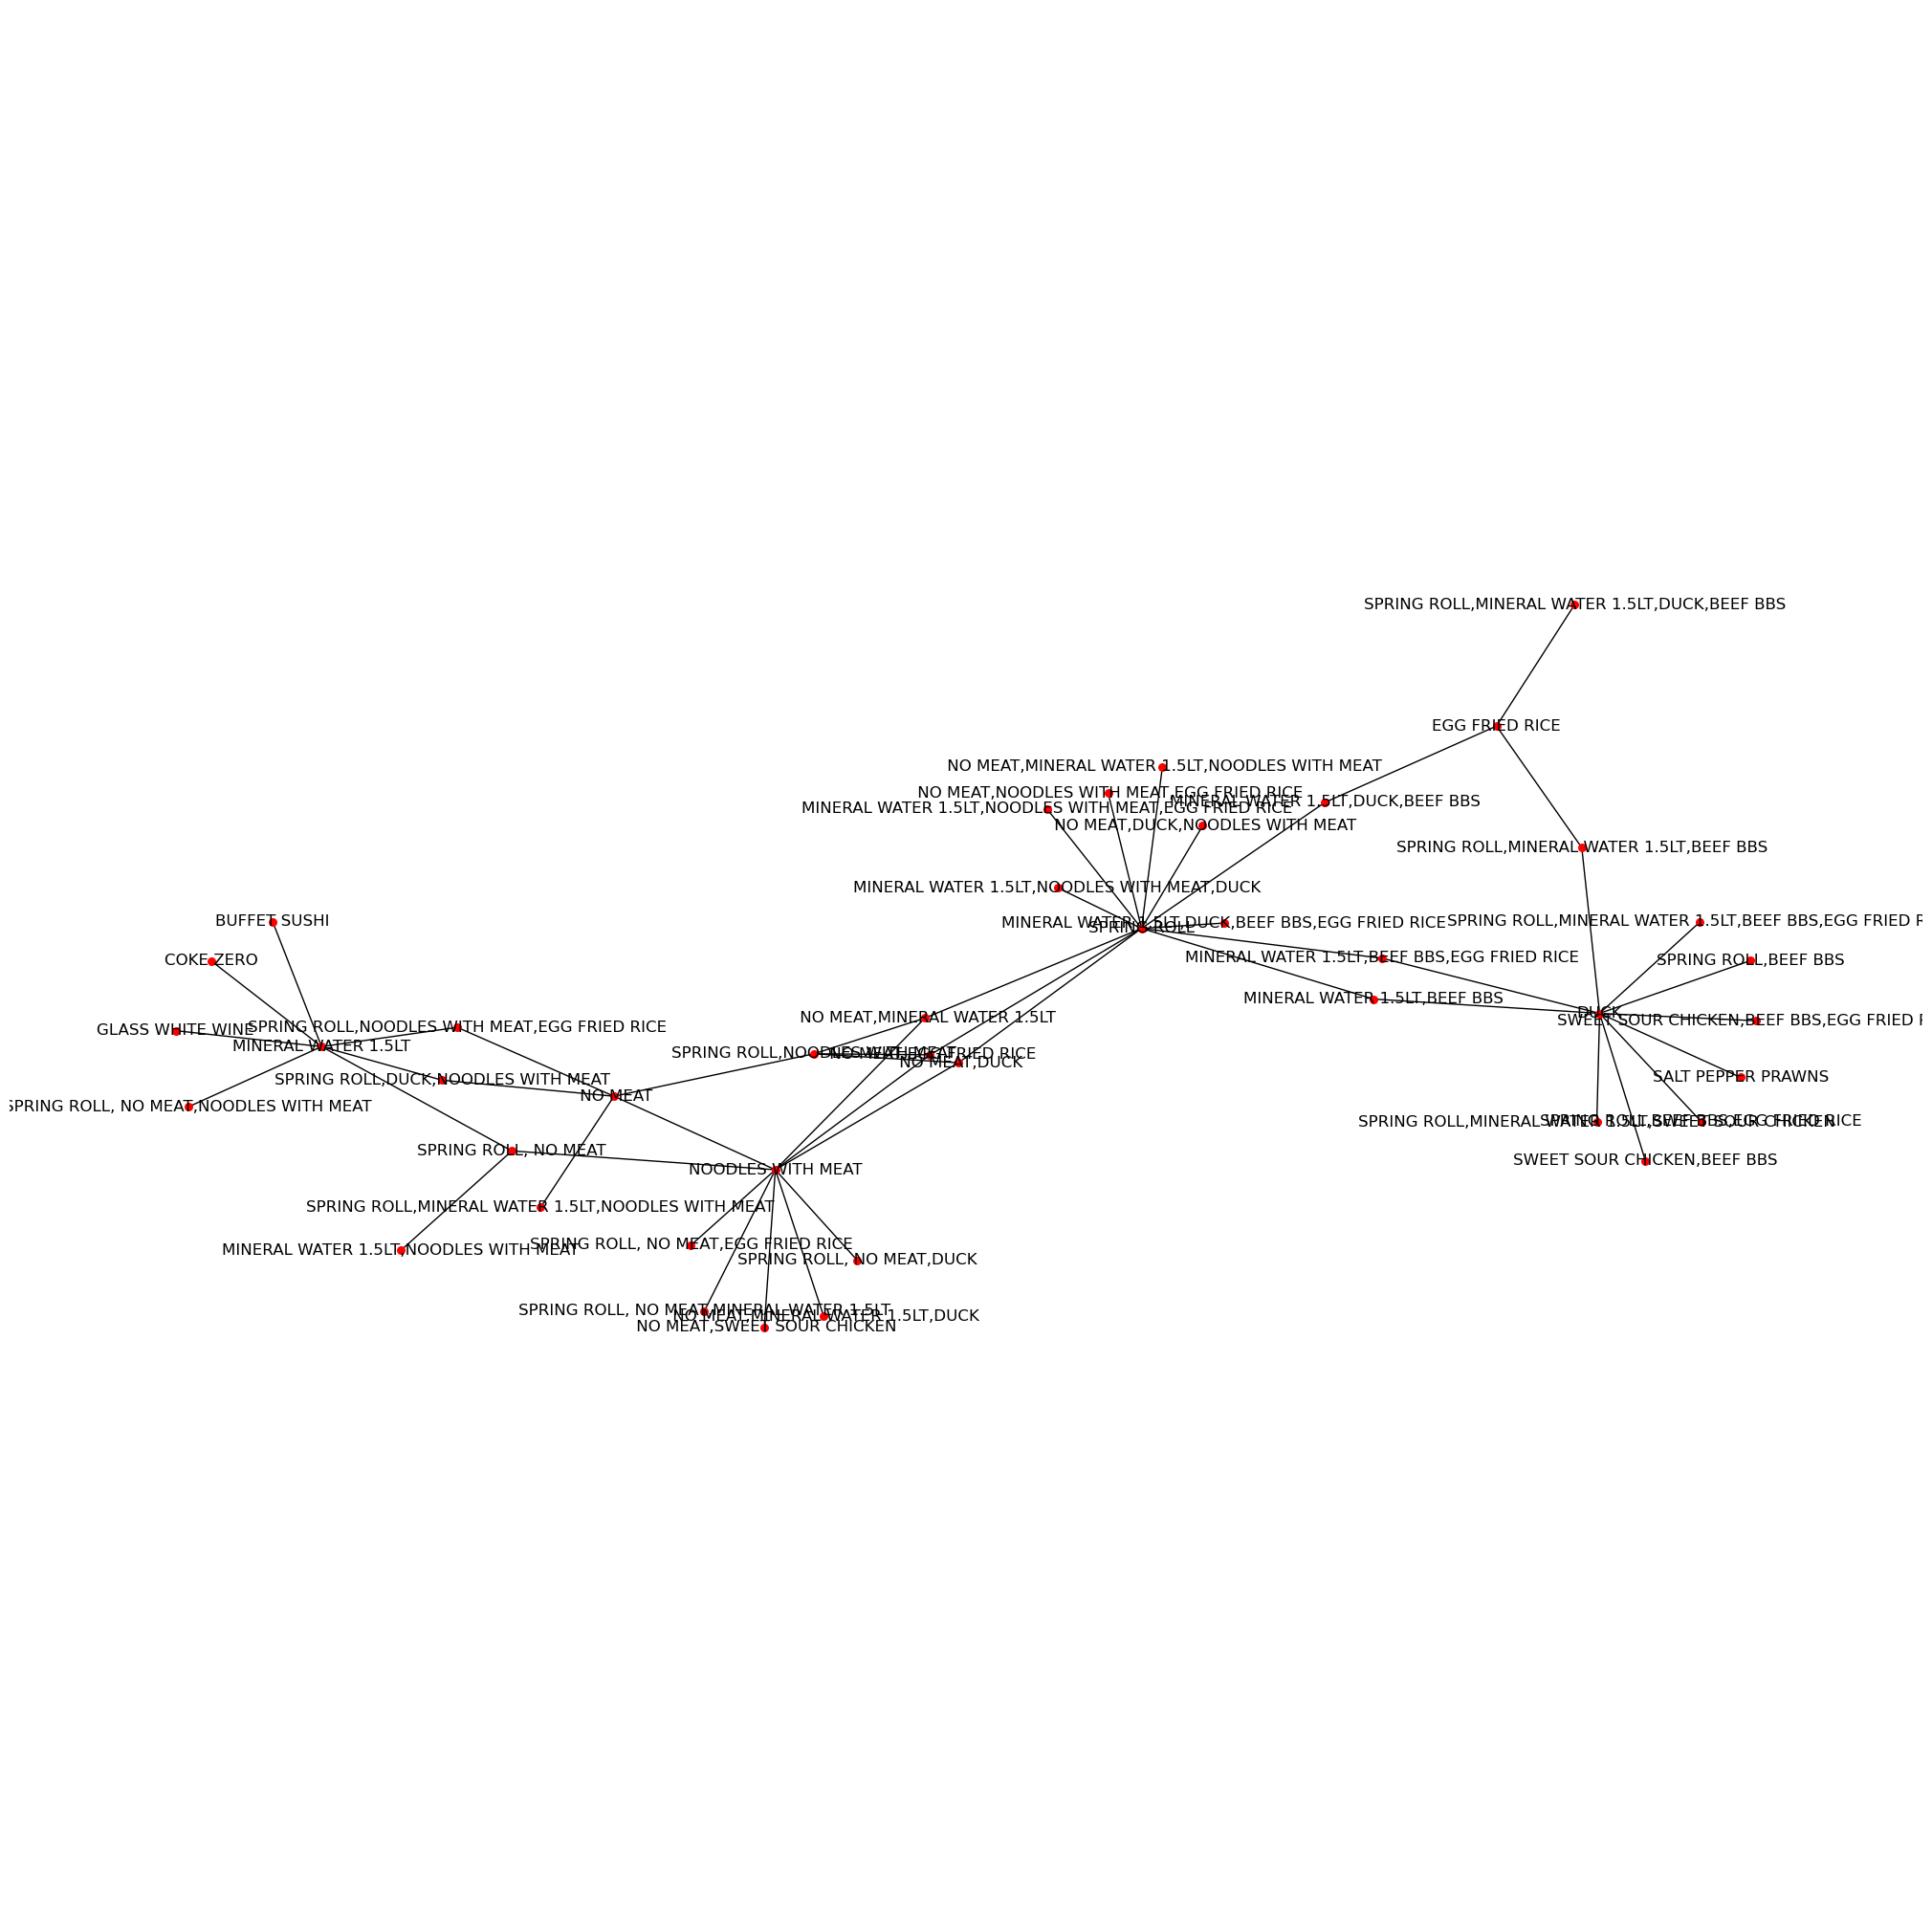

In [277]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="productcat_winter">
    
### 4.4.4.2. Using the ProductCategoryII Variable
    
    
</a>

In [278]:
# Pivot the data
pt = pd.pivot_table(ds_winter[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND   MAIN  MAIN IND  \
DocNumber                                                                    
TK0110000012018               False    False        False   True      True   
TK0110000022018                True    False        False   True      True   
TK0110000032018               False    False        False   True     False   
TK0110000042018               False    False         True  False      True   
TK0110000052018               False    False        False  False     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110000012018       False         False                  True   False   
TK0110000022018       False         False                  True    True   
TK0110000032018       False         False                  True   False   
TK0110000042018       False          True                  True   False   
TK0110000052018       False          True                  True   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110000012018     True       True      True         False  
TK0110000022018     True       True      True         False  
TK0110000032018     True      False      True         False  
TK0110000042018    False       True     False          True  
TK0110000052018    False       True     False          True

In [279]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [280]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
58                      (NON-ALCOHOLIC DRINKS, OTHERS)   
94                (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
112           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
128     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
98            (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
127    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
79                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
116  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
131           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
105                           (MAIN, STARTERS, OTHERS)   
37                                      (MAIN, OTHERS)   
33                      (NON-ALCOHOLIC DRINKS, OTHERS)   
95               (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
96                      (NON-ALCOHOLIC DRINKS, OTHERS)   
102            (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
69     (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
75   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
22                        (ALCOHOLIC DRINKS, STARTERS)   
84                 (ALCOHOLIC DRINKS, SIDES, STARTERS)   
118          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
20                           (ALCOHOLIC DRINKS, SIDES)   
68                     (MAIN, ALCOHOLIC DRINKS, SIDES)   
74                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
35                       (NON-ALCOHOLIC DRINKS, SIDES)   
26                        (ALCOHOLIC DRINKS, STARTERS)   
25                           (ALCOHOLIC DRINKS, SIDES)   
23                        (MAIN IND, ALCOHOLIC DRINKS)   
117  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
122                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
78                  (MAIN, ALCOHOLIC DRINKS, STARTERS)   
36                    (NON-ALCOHOLIC DRINKS, STARTERS)   
62                                  (STARTERS, OTHERS)   
12                                            (OTHERS)   
107                          (STARTERS, SIDES, OTHERS)   
16                            (MAIN, ALCOHOLIC DRINKS)   
38                                     (OTHERS, SIDES)   
47                                   (STARTERS, SIDES)   
83   (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
100             (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)   
28                        (ALCOHOLIC DRINKS, STARTERS)   
76                        (ALCOHOLIC DRINKS, STARTERS)   
1                                   (ALCOHOLIC DRINKS)   
72                           (ALCOHOLIC DRINKS, SIDES)   
6                                              (SIDES)   

                      consequents  antecedent support  consequent support  \
58                        (SIDES)            0.110128            0.718781   
94                        (SIDES)            0.108489            0.718781   
112                       (SIDES)            0.102589            0.718781   
128                       (SIDES)            0.101606            0.718781   
98                         (MAIN)            0.102589            0.854474   
127                        (MAIN)            0.102262            0.854474   
79                         (MAIN)            0.134382            0.854474   
116                        (MAIN)            0.130777            0.854474   
131                 (MAIN, SIDES)            0.102589            0.677811   
105                       (SIDES)            0.169780            0.718781   
37                        (SIDES)            0.184202            0.718781   
33                         (MAIN)            0.110128            0.854474   
95                         (MAIN)            0.109800            0.854474   
96                  (MAIN, SIDES)            0.110128            0.677811   
102                        (MAIN)            0.315306            0.854474   
69                         (MAIN)            0.151754            0.854474   
75                         (MAIN)            0.137660            0.854474   
22                         (MAIN)            0

In [281]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
42                 (MAIN IND, STARTERS IND)   
47                              (SIDES IND)   
6                            (MAIN VEG IND)   
7                               (SIDES IND)   
31        (NON-ALCOHOLIC DRINKS, SIDES IND)   
32                               (MAIN IND)   
45                               (MAIN IND)   
44                (STARTERS IND, SIDES IND)   
2                                (MAIN IND)   
3                               (SIDES IND)   
40                               (MAIN IND)   
39                    (STARTERS, SIDES IND)   
28                               (MAIN IND)   
27                        (MAIN, SIDES IND)   
35                       (SIDES, SIDES IND)   
36                               (MAIN IND)   
46                           (STARTERS IND)   
43                    (MAIN IND, SIDES IND)   
9                               (SIDES IND)   
8                            (STARTERS IND)   
33                              (SIDES IND)   
30         (MAIN IND, NON-ALCOHOLIC DRINKS)   
41                              (SIDES IND)   
38                     (MAIN IND, STARTERS)   
29                              (SIDES IND)   
26                         (MAIN, MAIN IND)   
5                            (STARTERS IND)   
4                                (MAIN IND)   
34                        (MAIN IND, SIDES)   
37                              (SIDES IND)   
107            (ALCOHOLIC DRINKS, STARTERS)   
96      (NON-ALCOHOLIC DRINKS, MAIN, SIDES)   
102           (NON-ALCOHOLIC DRINKS, SIDES)   
101      (MAIN, ALCOHOLIC DRINKS, STARTERS)   
98   (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)   
105               (ALCOHOLIC DRINKS, SIDES)   
73             (ALCOHOLIC DRINKS, STARTERS)   
70            (NON-ALCOHOLIC DRINKS, SIDES)   
104        (NON-ALCOHOLIC DRINKS, STARTERS)   
99          (MAIN, ALCOHOLIC DRINKS, SIDES)   
71         (NON-ALCOHOLIC DRINKS, STARTERS)   
72                (ALCOHOLIC DRINKS, SIDES)   
15         (MAIN IND, NON-ALCOHOLIC DRINKS)   
16                       (ALCOHOLIC DRINKS)   

                                consequents  antecedent support  \
42                              (SIDES IND)            0.077352   
47                 (MAIN IND, STARTERS IND)            0.177974   
6                               (SIDES IND)            0.067191   
7                            (MAIN VEG IND)            0.177974   
31                               (MAIN IND)            0.084562   
32        (NON-ALCOHOLIC DRINKS, SIDES IND)            0.183546   
45                (STARTERS IND, SIDES IND)            0.183546   
44                               (MAIN IND)            0.084562   
2                               (SIDES IND)            0.183546   
3                                (MAIN IND)            0.177974   
40                    (STARTERS, SIDES IND)            0.183546   
39                               (MAIN IND)            0.074074   
28                        (MAIN, SIDES IND)            0.183546   
27                               (MAIN IND)            0.082596   
35                               (MAIN IND)            0.074074   
36                       (SIDES, SIDES IND)            0.183546   
46                    (MAIN IND, SIDES IND)            0.122255   
43                           (STARTERS IND)            0.138971   
9                            (STARTERS IND)            0.177974   
8                               (SIDES IND)            0.122255   
33         (MAIN IND, NON-ALCOHOLIC DRINKS)            0.177974   
30                              (SIDES IND)            0.104228   
41                     (MAIN IND, STARTERS)            0.177974   
38                              (SIDES IND)            0.083579   
29                         (MAIN, MAIN IND)            0.177974   
26                              (SIDES IND)            0.098656   
5                                (MAIN IND)            0.122255   
4                            (STARTERS I

In [282]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [283]:
# Length>=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.2)]

support                                       itemsets  length
12  0.207473       (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)       2
16  0.481154                   (MAIN, NON-ALCOHOLIC DRINKS)       2
18  0.677811                                  (MAIN, SIDES)       2
20  0.615536                               (MAIN, STARTERS)       2
29  0.365126                  (NON-ALCOHOLIC DRINKS, SIDES)       2
31  0.338578               (NON-ALCOHOLIC DRINKS, STARTERS)       2
36  0.607997                              (STARTERS, SIDES)       2
53  0.354638            (MAIN, NON-ALCOHOLIC DRINKS, SIDES)       3
54  0.325467         (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)       3
58  0.578171                        (MAIN, STARTERS, SIDES)       3
69  0.315306        (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)       3
80  0.309079  (MAIN, STARTERS, NON-ALCOHOLIC DRINKS, SIDES)       4

In [284]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
84         (ALCOHOLIC DRINKS, SIDES, STARTERS)   
118  (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
68             (MAIN, ALCOHOLIC DRINKS, SIDES)   
74          (MAIN, ALCOHOLIC DRINKS, STARTERS)   
26                (ALCOHOLIC DRINKS, STARTERS)   
25                   (ALCOHOLIC DRINKS, SIDES)   
23                (MAIN IND, ALCOHOLIC DRINKS)   
122        (ALCOHOLIC DRINKS, SIDES, STARTERS)   
16                    (MAIN, ALCOHOLIC DRINKS)   
76                (ALCOHOLIC DRINKS, STARTERS)   
1                           (ALCOHOLIC DRINKS)   
72                   (ALCOHOLIC DRINKS, SIDES)   
123         (MAIN, ALCOHOLIC DRINKS, STARTERS)   
130       (NON-ALCOHOLIC DRINKS, MAIN, OTHERS)   
114             (NON-ALCOHOLIC DRINKS, OTHERS)   
86                (ALCOHOLIC DRINKS, STARTERS)   
132             (NON-ALCOHOLIC DRINKS, OTHERS)   
125               (ALCOHOLIC DRINKS, STARTERS)   
56                    (MAIN IND, STARTERS IND)   
11                              (MAIN VEG IND)   
18                          (ALCOHOLIC DRINKS)   
121            (MAIN, ALCOHOLIC DRINKS, SIDES)   
51           (NON-ALCOHOLIC DRINKS, SIDES IND)   
85                   (ALCOHOLIC DRINKS, SIDES)   
124                  (ALCOHOLIC DRINKS, SIDES)   
57                   (STARTERS IND, SIDES IND)   
10                                 (SIDES IND)   
9                                   (MAIN IND)   
55                       (STARTERS, SIDES IND)   
70                    (MAIN, ALCOHOLIC DRINKS)   
31                           (MAIN, SIDES IND)   
52                          (SIDES, SIDES IND)   

                                consequents  antecedent support  \
84                   (NON-ALCOHOLIC DRINKS)            0.134382   
118                  (NON-ALCOHOLIC DRINKS)            0.133071   
68                   (NON-ALCOHOLIC DRINKS)            0.152409   
74                   (NON-ALCOHOLIC DRINKS)            0.138315   
26                   (NON-ALCOHOLIC DRINKS)            0.141921   
25                   (NON-ALCOHOLIC DRINKS)            0.156670   
23                   (NON-ALCOHOLIC DRINKS)            0.054408   
122            (NON-ALCOHOLIC DRINKS, MAIN)            0.134382   
16                   (NON-ALCOHOLIC DRINKS)            0.196329   
76             (MAIN, NON-ALCOHOLIC DRINKS)            0.141921   
1                    (NON-ALCOHOLIC DRINKS)            0.219272   
72             (MAIN, NON-ALCOHOLIC DRINKS)            0.156670   
123           (NON-ALCOHOLIC DRINKS, SIDES)            0.138315   
130                       (STARTERS, SIDES)            0.108489   
114                       (STARTERS, SIDES)            0.110128   
86            (NON-ALCOHOLIC DRINKS, SIDES)            0.141921   
132                 (MAIN, STARTERS, SIDES)            0.110128   
125     (NON-ALCOHOLIC DRINKS, MAIN, SIDES)            0.141921   
56                              (SIDES IND)            0.077352   
11                              (SIDES IND)            0.067191   
18             (MAIN, NON-ALCOHOLIC DRINKS)            0.219272   
121        (NON-ALCOHOLIC DRINKS, STARTERS)            0.152409   
51                               (MAIN IND)            0.084562   
85         (NON-ALCOHOLIC DRINKS, STARTERS)            0.156670   
124  (NON-ALCOHOLIC DRINKS, MAIN, STARTERS)            0.156670   
57                               (MAIN IND)            0.084562   
10                               (MAIN IND)            0.177974   
9                               (SIDES IND)            0.183546   
55                               (MAIN IND)            0.074074   
70            (NON-ALCOHOLIC DRINKS, SIDES)            0.196329   
31                               (MAIN IND)            0.082596   
52                               (MAIN IND)            0.074074   

     consequent support   support  confidence      lift  leverage  conviction  
84             0.528679  0.130777    0.973171  1.840759  0.059732   17.567415  
118         

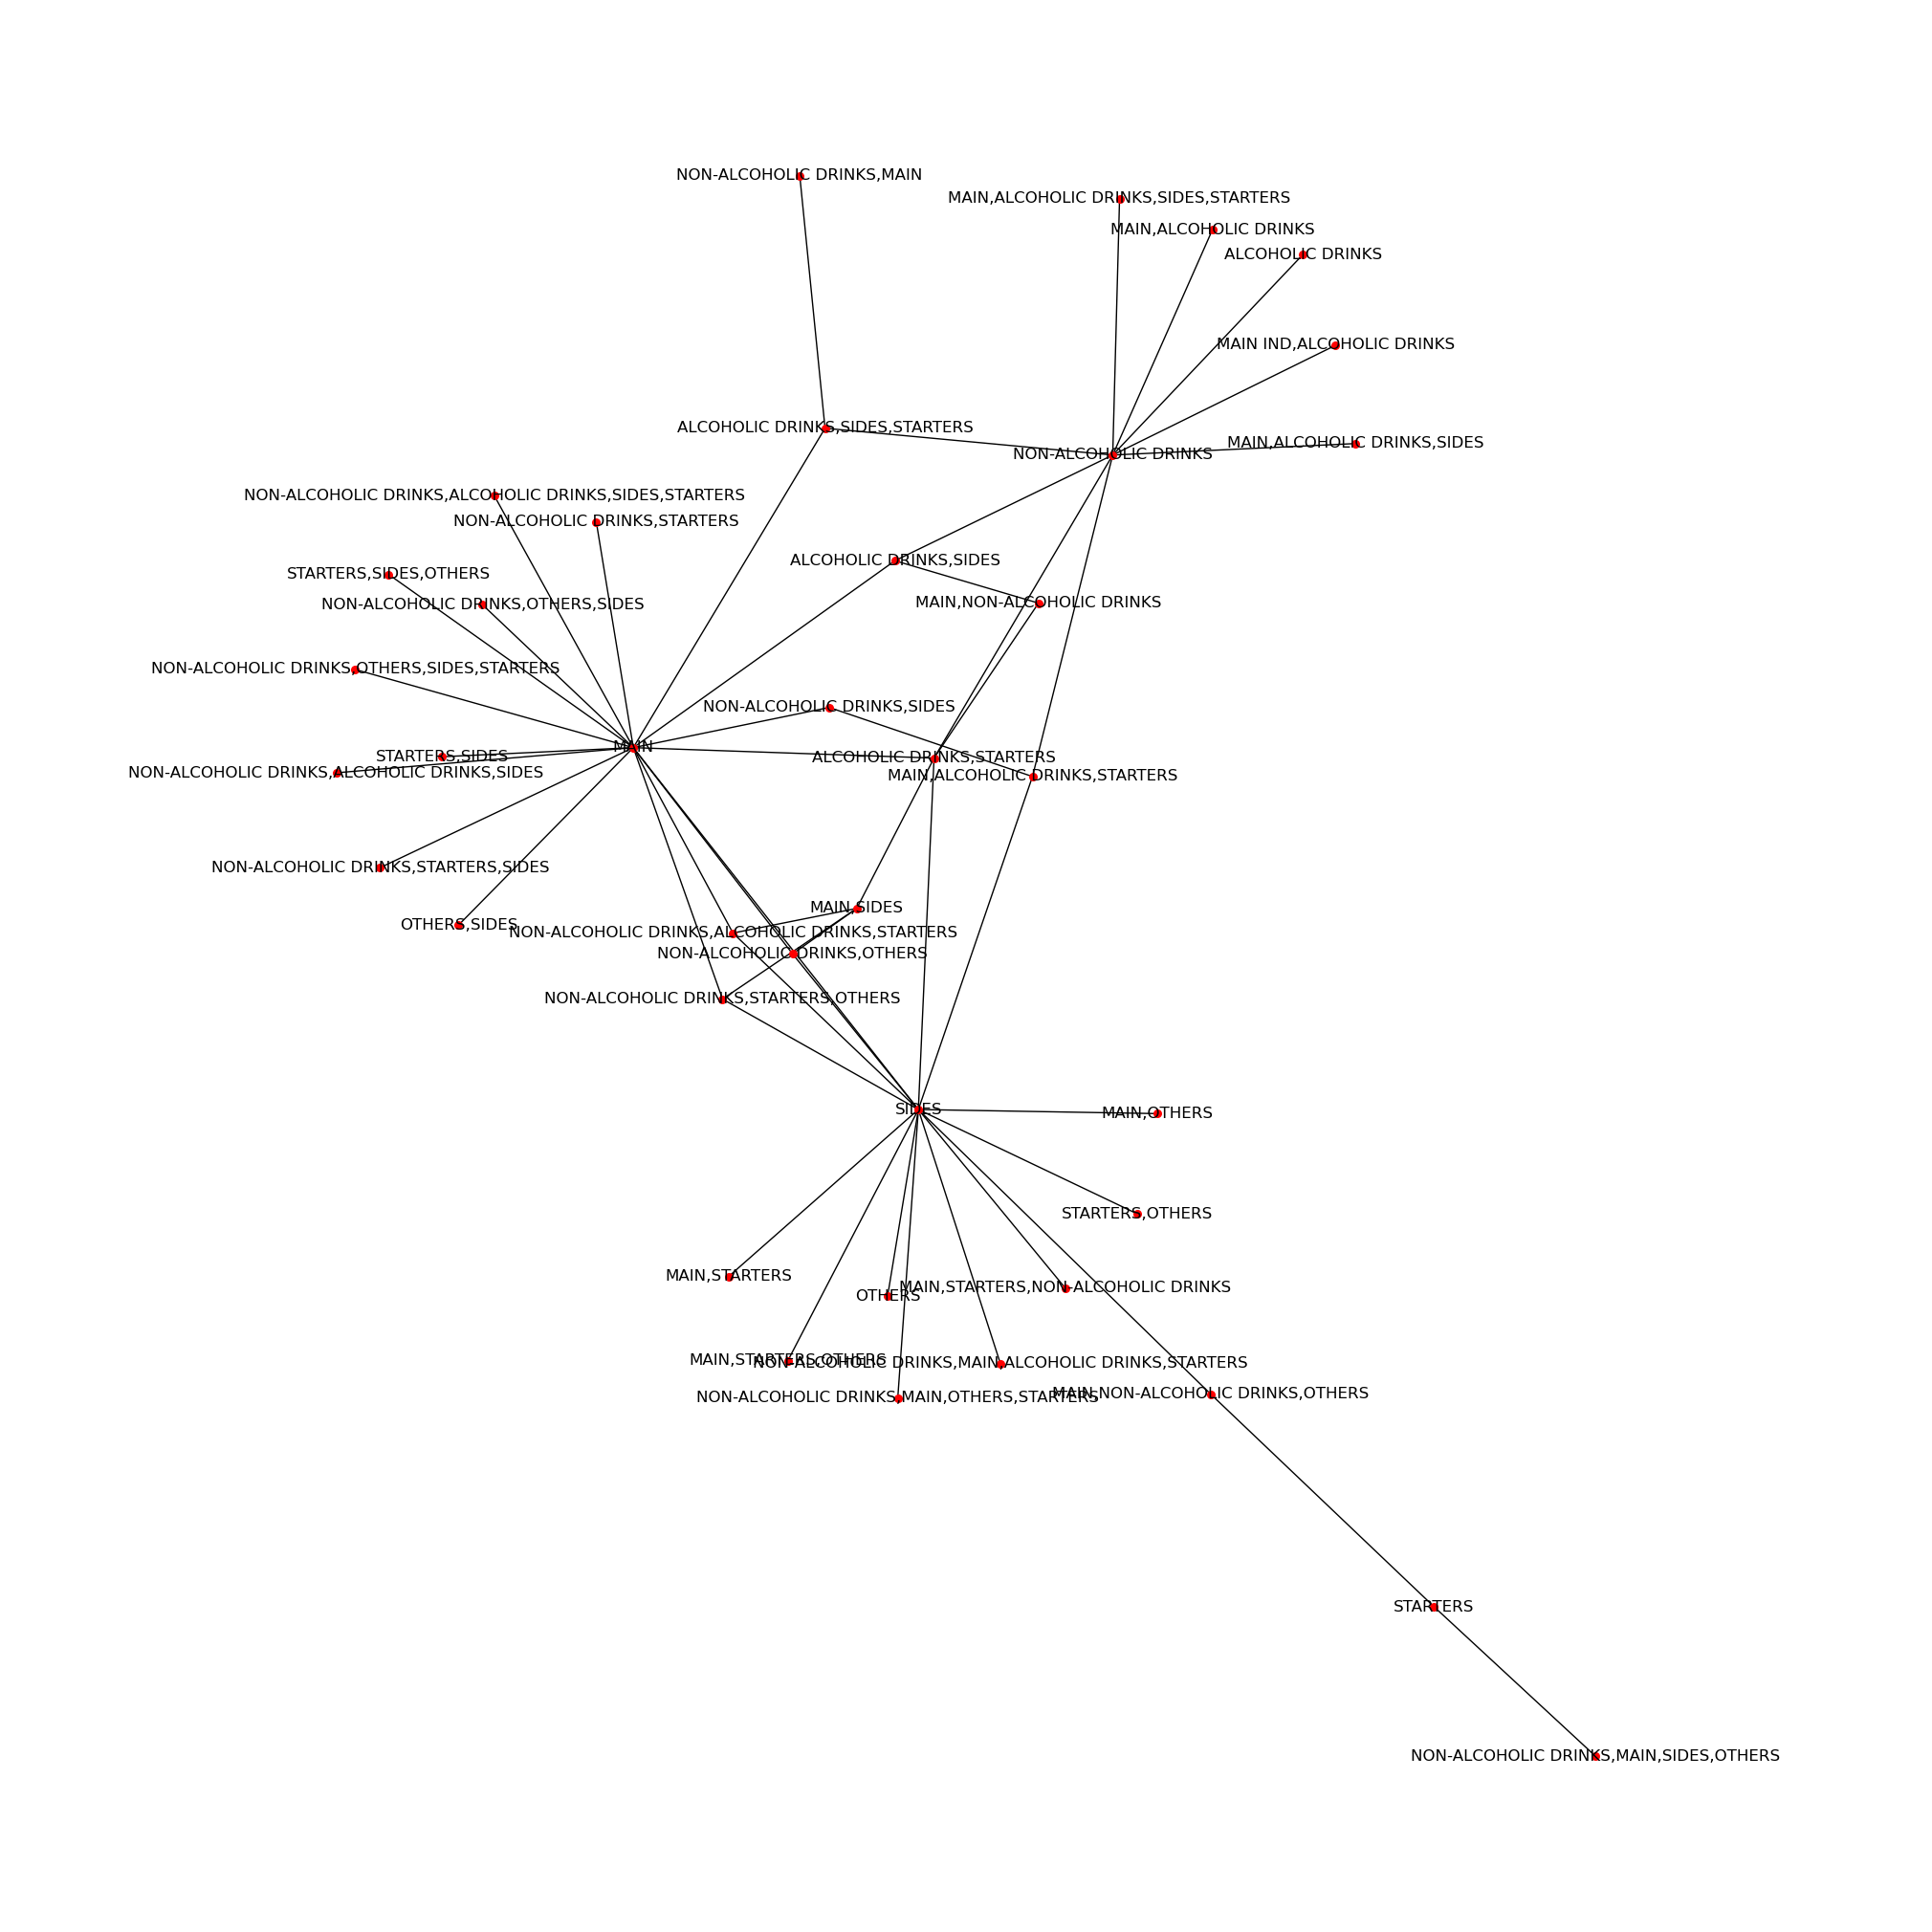

In [285]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="weekends">
    
## 4.5. Considering Weekends
    
    
</a>

No major differences were found in the weekends when compared to the general case.

In [286]:
ds_weekend = ds_imp[(ds_imp['DayWeek']=='Saturday') | (ds_imp['DayWeek']=='Sunday')].copy()

<a class="anchor" id="product_weekend">
    
### 4.5.1. Using the Product Variable
    
    
</a>

In [287]:
# Pivot the data (documents as rows and products as columns)
pt = pd.pivot_table(ds_weekend[['DocNumber', 'Product']], index='DocNumber', columns='Product', aggfunc=lambda x: True if 
                    len(x)>0 else False).fillna(False)
pt.head()

Product           EXTRA PANCAKES   EXTRA SALAD   EXTRA SAUCE   NO BABY CORN  \
DocNumber                                                                     
TK0110000882018            False         False         False          False   
TK0110000892018            False         False         False          False   
TK0110000902018            False         False         False          False   
TK0110000912018            False         False         False          False   
TK0110000922018            False         False         False          False   

Product           NO BEANSPROUTS   NO CHILLY   NO EGG   NO MEAT   NO ONION  \
DocNumber                                                                    
TK0110000882018            False       False    False     False      False   
TK0110000892018            False       False    False     False      False   
TK0110000902018            False       False    False      True      False   
TK0110000912018            False       False    False     False      False   
TK0110000922018            False       False    False     False      False   

Product           NO PRAWNS  ...  VASSILIKON XYNISTERI  VEG BBS  VEG RICE  \
DocNumber                    ...                                            
TK0110000882018       False  ...                 False    False     False   
TK0110000892018       False  ...                 False    False     False   
TK0110000902018       False  ...                 False    False     False   
TK0110000912018       False  ...                 False    False     False   
TK0110000922018       False  ...                 False    False     False   

Product          VELOUDO RED  VLASSIDES SHIRAZ  VOLCANO MAKI  WHISKY  \
DocNumber                                                              
TK0110000882018        False             False         False   False   
TK0110000892018        False             False         False   False   
TK0110000902018        False             False         False   False   
TK0110000912018        False             False         False   False   
TK0110000922018        False             False         False   False   

Product          YELLOW DAL DHABA  ZIVANIA 20CL  ZIVANIA 5CL  
DocNumber                                                     
TK0110000882018             False         False        False  
TK0110000892018             False         False        False  
TK0110000902018             False         False        False  
TK0110000912018             False         False        False  
TK0110000922018             False         False        False  

[5 rows x 215 columns]

In [288]:
# Applying the APRIORI algorithm
# Rules supported in at least 5% of the transactions
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [289]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(40)

antecedents  \
35    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
14                            (SPRING ROLL,  NO MEAT)   
38       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
1                                          ( NO MEAT)   
32              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
7                                    ( NO MEAT, DUCK)   
9                          ( NO MEAT, EGG FRIED RICE)   
10                    ( NO MEAT, MINERAL WATER 1.5LT)   
16                     ( NO MEAT, SWEET SOUR CHICKEN)   
5                                  (GLASS WHITE WINE)   
24                                  (COKE ZERO, DUCK)   
3                                         (COKE ZERO)   
23                      (BEEF BBS, NOODLES WITH MEAT)   
67  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...   
47       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
57          (DUCK, NOODLES WITH MEAT, EGG FRIED RICE)   
60             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
66      (SPRING ROLL, DUCK, BEEF BBS, EGG FRIED RICE)   
33                ( NO MEAT, DUCK, NOODLES WITH MEAT)   
34                                   ( NO MEAT, DUCK)   
6                                    ( NO MEAT, DUCK)   
37                         ( NO MEAT, EGG FRIED RICE)   
36      ( NO MEAT, NOODLES WITH MEAT, EGG FRIED RICE)   
8                          ( NO MEAT, EGG FRIED RICE)   
63   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
48                      (SPRING ROLL, DUCK, BEEF BBS)   
39         (SPRING ROLL,  NO MEAT, NOODLES WITH MEAT)   
54  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
41                            (SPRING ROLL,  NO MEAT)   
13                            (SPRING ROLL,  NO MEAT)   
45            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
43    (MINERAL WATER 1.5LT, BEEF BBS, EGG FRIED RICE)   
49  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
51        (SPRING ROLL, SWEET SOUR CHICKEN, BEEF BBS)   
53            (SPRING ROLL, BEEF BBS, EGG FRIED RICE)   
18                    (MINERAL WATER 1.5LT, BEEF BBS)   
46               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)   
26                          (DUCK, NOODLES WITH MEAT)   
25                              (LEMON CHICKEN, DUCK)   
42              (MINERAL WATER 1.5LT, BEEF BBS, DUCK)   

                                 consequents  antecedent support  \
35                       (NOODLES WITH MEAT)            0.056131   
14                       (NOODLES WITH MEAT)            0.078202   
38                       (NOODLES WITH MEAT)            0.059401   
1                        (NOODLES WITH MEAT)            0.121526   
32                       (NOODLES WITH MEAT)            0.056676   
7                        (NOODLES WITH MEAT)            0.073025   
9                        (NOODLES WITH MEAT)            0.072752   
10                       (NOODLES WITH MEAT)            0.087193   
16                       (NOODLES WITH MEAT)            0.059673   
5                      (MINERAL WATER 1.5LT)            0.058038   
24                     (MINERAL WATER 1.5LT)            0.062125   
3                      (MINERAL WATER 1.5LT)            0.093188   
23                     (MINERAL WATER 1.5LT)            0.069482   
67                                    (DUCK)            0.073569   
47                                    (DUCK)            0.102452   
57                     (MINERAL WATER 1.5LT)            0.072480   
60                     (MINERAL WATER 1.5LT)            0.066757   
66                     (MINERAL WATER 1.5LT)            0.074387   
33                     (MINERAL WATER 1.5LT)            0.073025   
34  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.073025   
6                      (MINERAL WATER 1.5LT)            0.073025   
37  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.072752   
36                     (MINERAL WATER 1.5LT)            0.072752   
8                      (MINERAL WATER 1.5LT)            0.072752   
63  

In [290]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
111                   (SPRING ROLL, NOODLES WITH MEAT)   
112                    ( NO MEAT, MINERAL WATER 1.5LT)   
116                                         ( NO MEAT)   
107  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
87            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
88                                    ( NO MEAT, DUCK)   
99                          ( NO MEAT, EGG FRIED RICE)   
100           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
85                     ( NO MEAT, MINERAL WATER 1.5LT)   
90                           (DUCK, NOODLES WITH MEAT)   
37                    (SPRING ROLL, NOODLES WITH MEAT)   
38                                          ( NO MEAT)   
114           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
109                            (SPRING ROLL,  NO MEAT)   
102                (NOODLES WITH MEAT, EGG FRIED RICE)   
97                     ( NO MEAT, MINERAL WATER 1.5LT)   
83      (MINERAL WATER 1.5LT, NOODLES WITH MEAT, DUCK)   
92                                          ( NO MEAT)   
103                                         ( NO MEAT)   
96   (MINERAL WATER 1.5LT, NOODLES WITH MEAT, EGG F...   
30                                          ( NO MEAT)   
29            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)   
17                           (DUCK, NOODLES WITH MEAT)   
18                                          ( NO MEAT)   
25                 (NOODLES WITH MEAT, EGG FRIED RICE)   
26                                          ( NO MEAT)   
41             (SWEET SOUR CHICKEN, NOODLES WITH MEAT)   
42                                          ( NO MEAT)   
117                                (NOODLES WITH MEAT)   
1                                  (NOODLES WITH MEAT)   
19                                 (NOODLES WITH MEAT)   
43                                 (NOODLES WITH MEAT)   
106       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
40                      ( NO MEAT, SWEET SOUR CHICKEN)   
105                                (NOODLES WITH MEAT)   
94     ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
93                                 (NOODLES WITH MEAT)   
39                                 (NOODLES WITH MEAT)   
0                                           ( NO MEAT)   
36                             (SPRING ROLL,  NO MEAT)   
82               ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
31                                 (NOODLES WITH MEAT)   
28                     ( NO MEAT, MINERAL WATER 1.5LT)   
27                                 (NOODLES WITH MEAT)   

                                           consequents  antecedent support  \
111                    ( NO MEAT, MINERAL WATER 1.5LT)            0.111444   
112                   (SPRING ROLL, NOODLES WITH MEAT)            0.087193   
116  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...            0.121526   
107                                         ( NO MEAT)            0.080654   
87                                    ( NO MEAT, DUCK)            0.133515   
88            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.073025   
99            (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.072752   
100                         ( NO MEAT, EGG FRIED RICE)            0.133515   
85                           (DUCK, NOODLES WITH MEAT)            0.087193   
90                     ( NO MEAT, MINERAL WATER 1.5LT)            0.112534   
37                                          ( NO MEAT)            0.111444   
38                    (SPRING ROLL, NOODLES WITH MEAT)            0.121526   
114                            (SPRING ROLL,  NO MEAT)            0.133515   
109           (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.078202   
102                    ( NO MEAT, MINERAL WATER 1.5LT)            0.114169   
97                 (NOODLES WITH MEAT, EGG FRIED RICE)            0.087193   
83                                          ( NO MEAT)            0.083379   
92      (MINERAL WATER 1.5LT

In [291]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [292]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

support                                   itemsets  length
58  0.302452                     (DUCK, EGG FRIED RICE)       2
61  0.297548                (DUCK, MINERAL WATER 1.5LT)       2
66  0.268665                        (SPRING ROLL, DUCK)       2
68  0.231608                 (DUCK, SWEET SOUR CHICKEN)       2
72  0.286921      (MINERAL WATER 1.5LT, EGG FRIED RICE)       2
75  0.253951              (SPRING ROLL, EGG FRIED RICE)       2
76  0.264305       (SWEET SOUR CHICKEN, EGG FRIED RICE)       2
87  0.260763         (SPRING ROLL, MINERAL WATER 1.5LT)       2
89  0.215531  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN)       2
98  0.209264          (SPRING ROLL, SWEET SOUR CHICKEN)       2

In [293]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
35    ( NO MEAT, MINERAL WATER 1.5LT, EGG FRIED RICE)   
14                            (SPRING ROLL,  NO MEAT)   
38       (SPRING ROLL,  NO MEAT, MINERAL WATER 1.5LT)   
1                                          ( NO MEAT)   
32              ( NO MEAT, MINERAL WATER 1.5LT, DUCK)   
7                                    ( NO MEAT, DUCK)   
9                          ( NO MEAT, EGG FRIED RICE)   
10                    ( NO MEAT, MINERAL WATER 1.5LT)   
16                     ( NO MEAT, SWEET SOUR CHICKEN)   
5                                  (GLASS WHITE WINE)   
24                                  (COKE ZERO, DUCK)   
3                                         (COKE ZERO)   
23                      (BEEF BBS, NOODLES WITH MEAT)   
67  (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS, E...   
47       (SPRING ROLL, MINERAL WATER 1.5LT, BEEF BBS)   
57          (DUCK, NOODLES WITH MEAT, EGG FRIED RICE)   
60             (SPRING ROLL, DUCK, NOODLES WITH MEAT)   
66      (SPRING ROLL, DUCK, BEEF BBS, EGG FRIED RICE)   
33                ( NO MEAT, DUCK, NOODLES WITH MEAT)   
34                                   ( NO MEAT, DUCK)   
6                                    ( NO MEAT, DUCK)   
37                         ( NO MEAT, EGG FRIED RICE)   
36      ( NO MEAT, NOODLES WITH MEAT, EGG FRIED RICE)   
8                          ( NO MEAT, EGG FRIED RICE)   
63   (SPRING ROLL, NOODLES WITH MEAT, EGG FRIED RICE)   
54  (MINERAL WATER 1.5LT, SWEET SOUR CHICKEN, BEEF...   
41                            (SPRING ROLL,  NO MEAT)   
46               (DUCK, SWEET SOUR CHICKEN, BEEF BBS)   
40  (SPRING ROLL, MINERAL WATER 1.5LT, NOODLES WIT...   
12                                         ( NO MEAT)   
15                   (SPRING ROLL, NOODLES WITH MEAT)   

                                 consequents  antecedent support  \
35                       (NOODLES WITH MEAT)            0.056131   
14                       (NOODLES WITH MEAT)            0.078202   
38                       (NOODLES WITH MEAT)            0.059401   
1                        (NOODLES WITH MEAT)            0.121526   
32                       (NOODLES WITH MEAT)            0.056676   
7                        (NOODLES WITH MEAT)            0.073025   
9                        (NOODLES WITH MEAT)            0.072752   
10                       (NOODLES WITH MEAT)            0.087193   
16                       (NOODLES WITH MEAT)            0.059673   
5                      (MINERAL WATER 1.5LT)            0.058038   
24                     (MINERAL WATER 1.5LT)            0.062125   
3                      (MINERAL WATER 1.5LT)            0.093188   
23                     (MINERAL WATER 1.5LT)            0.069482   
67                                    (DUCK)            0.073569   
47                                    (DUCK)            0.102452   
57                     (MINERAL WATER 1.5LT)            0.072480   
60                     (MINERAL WATER 1.5LT)            0.066757   
66                     (MINERAL WATER 1.5LT)            0.074387   
33                     (MINERAL WATER 1.5LT)            0.073025   
34  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.073025   
6                      (MINERAL WATER 1.5LT)            0.073025   
37  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.072752   
36                     (MINERAL WATER 1.5LT)            0.072752   
8                      (MINERAL WATER 1.5LT)            0.072752   
63                     (MINERAL WATER 1.5LT)            0.068392   
54                          (EGG FRIED RICE)            0.078202   
41  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.078202   
46                          (EGG FRIED RICE)            0.081744   
40                                ( NO MEAT)            0.080654   
12  (MINERAL WATER 1.5LT, NOODLES WITH MEAT)            0.121526   
15                                ( NO MEAT)            0.111444   

    consequent support   support  confid

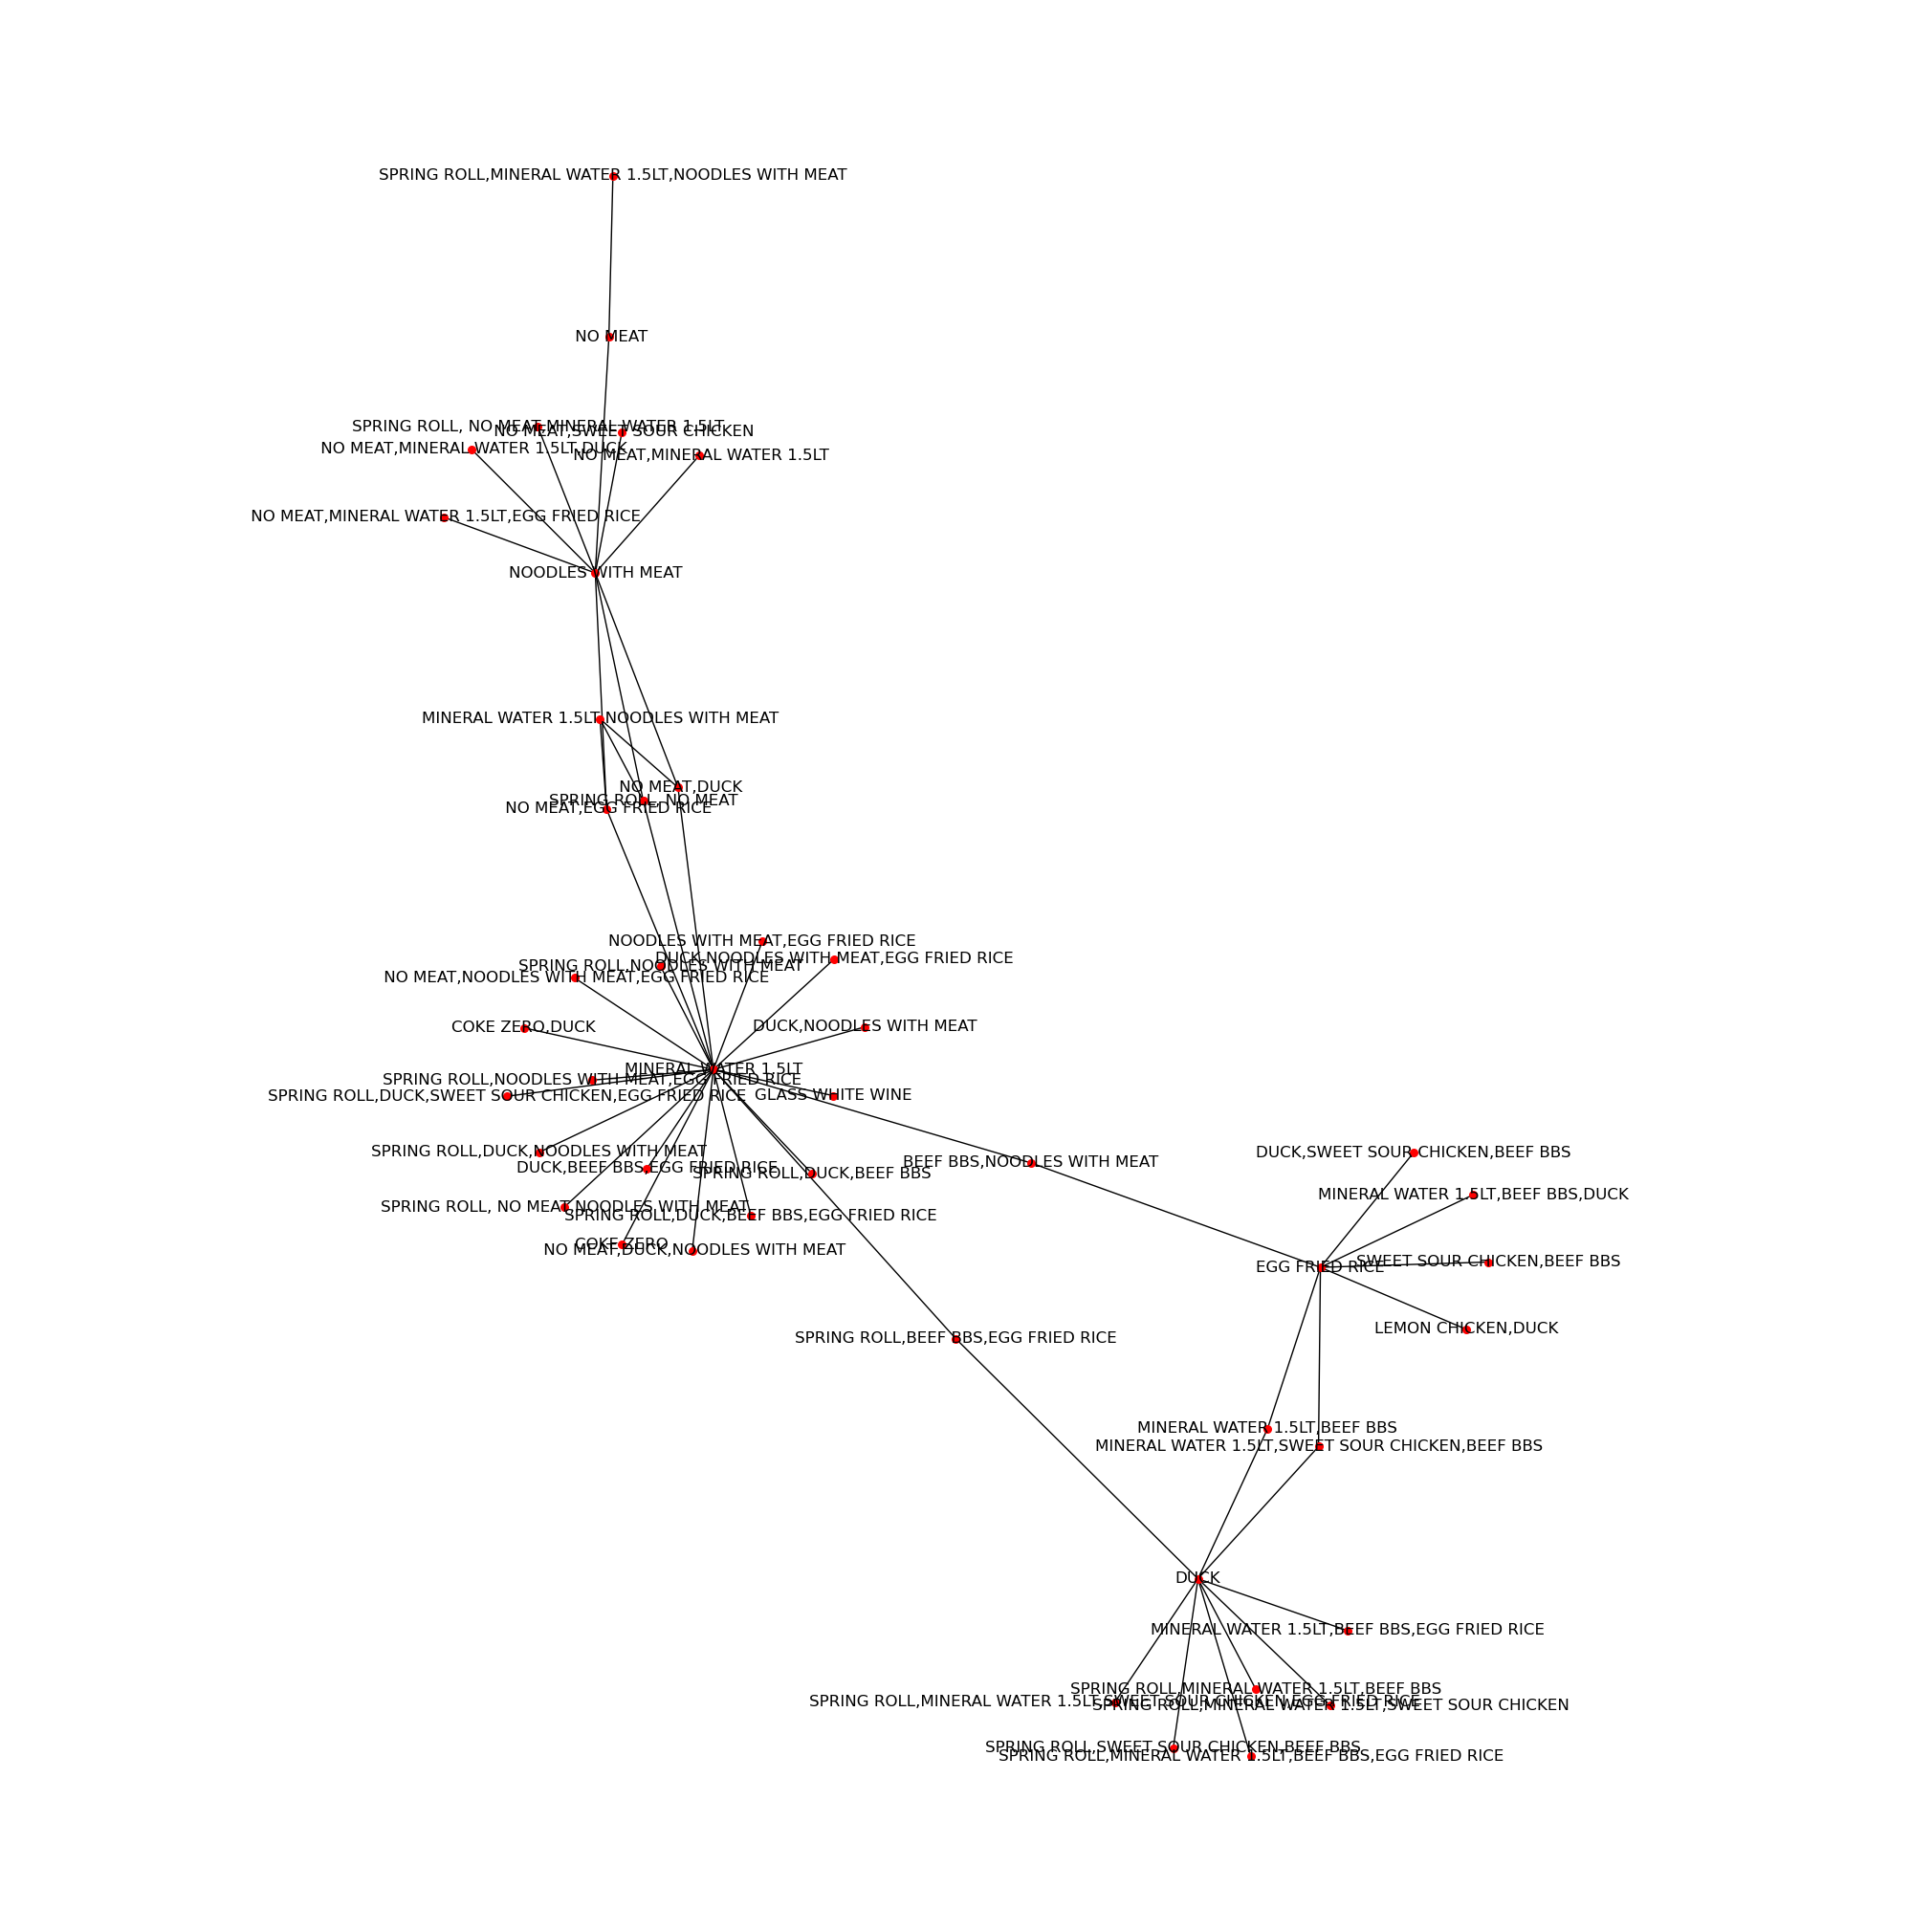

In [294]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="productcat_weekend">
    
### 4.5.2. Using the ProductCategoryII Variable
    
    
</a>

In [295]:
# Pivot the data
pt = pd.pivot_table(ds_weekend[['DocNumber', 'ProductCategoryII']], index='DocNumber', columns='ProductCategoryII', 
                    aggfunc=lambda x: True if len(x)>0 else False).fillna(False)
pt.head()

ProductCategoryII  ALCOHOLIC DRINKS  DESSERT  DESSERT IND  MAIN  MAIN IND  \
DocNumber                                                                   
TK0110000882018               False    False        False  True     False   
TK0110000892018               False    False        False  True     False   
TK0110000902018               False    False        False  True     False   
TK0110000912018                True    False        False  True     False   
TK0110000922018                True    False        False  True     False   

ProductCategoryII  MAIN VEG  MAIN VEG IND  NON-ALCOHOLIC DRINKS  OTHERS  \
DocNumber                                                                 
TK0110000882018        True          True                 False   False   
TK0110000892018       False         False                  True   False   
TK0110000902018       False         False                  True    True   
TK0110000912018       False         False                  True   False   
TK0110000922018       False         False                  True   False   

ProductCategoryII  SIDES  SIDES IND  STARTERS  STARTERS IND  
DocNumber                                                    
TK0110000882018     True       True      True          True  
TK0110000892018     True      False      True         False  
TK0110000902018     True      False      True         False  
TK0110000912018     True      False     False         False  
TK0110000922018     True      False      True         False

In [296]:
# Applying the APRIORI algorithm (rules supported in at least 5% of the transactions)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)

In [297]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(44)

antecedents  \
201    (NON-ALCOHOLIC DRINKS, OTHERS, SIDES, STARTERS)   
142              (NON-ALCOHOLIC DRINKS, OTHERS, SIDES)   
145           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
202     (NON-ALCOHOLIC DRINKS, MAIN, OTHERS, STARTERS)   
48                      (NON-ALCOHOLIC DRINKS, OTHERS)   
141               (MAIN, NON-ALCOHOLIC DRINKS, OTHERS)   
175           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
37                          (ALCOHOLIC DRINKS, OTHERS)   
22                          (ALCOHOLIC DRINKS, OTHERS)   
108                  (ALCOHOLIC DRINKS, SIDES, OTHERS)   
107                   (MAIN, ALCOHOLIC DRINKS, OTHERS)   
84                      (NON-ALCOHOLIC DRINKS, OTHERS)   
205           (NON-ALCOHOLIC DRINKS, STARTERS, OTHERS)   
143                     (NON-ALCOHOLIC DRINKS, OTHERS)   
179  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES...   
112                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
152            (NON-ALCOHOLIC DRINKS, STARTERS, SIDES)   
109                         (ALCOHOLIC DRINKS, OTHERS)   
160                           (MAIN, STARTERS, OTHERS)   
50                       (NON-ALCOHOLIC DRINKS, SIDES)   
95     (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, SIDES)   
24                           (ALCOHOLIC DRINKS, SIDES)   
56                                      (MAIN, OTHERS)   
102  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
27                        (ALCOHOLIC DRINKS, STARTERS)   
29                        (MAIN IND, ALCOHOLIC DRINKS)   
180  (NON-ALCOHOLIC DRINKS, MAIN, ALCOHOLIC DRINKS,...   
111                 (MAIN, ALCOHOLIC DRINKS, STARTERS)   
54                    (NON-ALCOHOLIC DRINKS, STARTERS)   
94                     (MAIN, ALCOHOLIC DRINKS, SIDES)   
181          (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
119                (ALCOHOLIC DRINKS, SIDES, STARTERS)   
101                 (MAIN, ALCOHOLIC DRINKS, STARTERS)   
32                           (ALCOHOLIC DRINKS, SIDES)   
150             (MAIN, STARTERS, NON-ALCOHOLIC DRINKS)   
19                            (MAIN, ALCOHOLIC DRINKS)   
35                        (ALCOHOLIC DRINKS, STARTERS)   
66                                   (STARTERS, SIDES)   
162                          (STARTERS, SIDES, OTHERS)   
57                                     (OTHERS, SIDES)   
1                                   (ALCOHOLIC DRINKS)   
118  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS, START...   
39                        (ALCOHOLIC DRINKS, STARTERS)   
30                          (ALCOHOLIC DRINKS, OTHERS)   

                consequents  antecedent support  consequent support   support  \
201                  (MAIN)            0.111535            0.853013  0.110990   
142                  (MAIN)            0.119716            0.853013  0.118898   
145                  (MAIN)            0.112626            0.853013  0.111808   
202                 (SIDES)            0.111808            0.823561  0.110990   
48                   (MAIN)            0.121080            0.853013  0.119989   
141                 (SIDES)            0.119989            0.823561  0.118898   
175                 (SIDES)            0.112626            0.823561  0.111535   
37                  (SIDES)            0.052904            0.823561  0.052359   
22                   (MAIN)            0.052904            0.853013  0.052359   
108                  (MAIN)            0.052359            0.853013  0.051813   
107                 (SIDES)            0.052359            0.823561  0.051813   
84                  (SIDES)            0.121080            0.823561  0.119716   
205           (MAIN, SIDES)            0.112626            0.779384  0.110990   
143           (MAIN, SIDES)            0.121080            0.779384  0.118898   
179                  (MAIN)            0.174530            0.853013  0.171257   
112                  (MAIN)            0.182165            0.853013  0.178620   
152                  (MAIN)            0.419144        

In [298]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(44)

antecedents  \
94                              (MAIN, MAIN IND)   
97                            (SIDES, SIDES IND)   
95                             (MAIN, SIDES IND)   
96                             (MAIN IND, SIDES)   
104                         (MAIN IND, STARTERS)   
103                            (MAIN, SIDES IND)   
102                             (MAIN, MAIN IND)   
105                        (STARTERS, SIDES IND)   
50                      (MAIN IND, STARTERS IND)   
55                                   (SIDES IND)   
7                                    (SIDES IND)   
6                                 (MAIN VEG IND)   
88              (NON-ALCOHOLIC DRINKS, MAIN IND)   
87                             (MAIN, SIDES IND)   
111             (MAIN IND, NON-ALCOHOLIC DRINKS)   
112                        (STARTERS, SIDES IND)   
110                         (MAIN IND, STARTERS)   
113            (NON-ALCOHOLIC DRINKS, SIDES IND)   
86                              (MAIN, MAIN IND)   
89             (NON-ALCOHOLIC DRINKS, SIDES IND)   
58                                (STARTERS IND)   
57             (NON-ALCOHOLIC DRINKS, SIDES IND)   
36                                    (MAIN IND)   
35             (NON-ALCOHOLIC DRINKS, SIDES IND)   
53                                    (MAIN IND)   
52                     (STARTERS IND, SIDES IND)   
109  (NON-ALCOHOLIC DRINKS, STARTERS, SIDES IND)   
114                                   (MAIN IND)   
90                                    (MAIN IND)   
85       (MAIN, NON-ALCOHOLIC DRINKS, SIDES IND)   
3                                    (SIDES IND)   
2                                     (MAIN IND)   
47                         (STARTERS, SIDES IND)   
48                                    (MAIN IND)   
51                         (MAIN IND, SIDES IND)   
54                                (STARTERS IND)   
32                                    (MAIN IND)   
31                             (MAIN, SIDES IND)   
106                                   (MAIN IND)   
101                  (MAIN, STARTERS, SIDES IND)   
37                                   (SIDES IND)   
34              (MAIN IND, NON-ALCOHOLIC DRINKS)   
93                      (MAIN, SIDES, SIDES IND)   
98                                    (MAIN IND)   

                                     consequents  antecedent support  \
94                            (SIDES, SIDES IND)            0.130079   
97                              (MAIN, MAIN IND)            0.088356   
95                             (MAIN IND, SIDES)            0.098991   
96                             (MAIN, SIDES IND)            0.121080   
104                            (MAIN, SIDES IND)            0.115899   
103                         (MAIN IND, STARTERS)            0.098991   
102                        (STARTERS, SIDES IND)            0.130079   
105                             (MAIN, MAIN IND)            0.091901   
50                                   (SIDES IND)            0.082902   
55                      (MAIN IND, STARTERS IND)            0.195255   
7                                 (MAIN VEG IND)            0.195255   
6                                    (SIDES IND)            0.065449   
88                             (MAIN, SIDES IND)            0.138533   
87              (NON-ALCOHOLIC DRINKS, MAIN IND)            0.098991   
111                        (STARTERS, SIDES IND)            0.138533   
112             (MAIN IND, NON-ALCOHOLIC DRINKS)            0.091901   
110            (NON-ALCOHOLIC DRINKS, SIDES IND)            0.115899   
113                         (MAIN IND, STARTERS)            0.111535   
86             (NON-ALCOHOLIC DRINKS, SIDES IND)            0.130079   
89                              (MAIN, MAIN IND)            0.111535   
58             (NON-ALCOHOLIC DRINKS, SIDES IND)            0.119989   
57                                (STARTERS IND)            0.111535   
36             (NON-ALCOHOLIC DRINKS, SI

In [299]:
# Adding a column to 'frequent_itemsets' with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [300]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

support                                  itemsets  length
10  0.211072                  (MAIN, ALCOHOLIC DRINKS)       2
12  0.220616  (NON-ALCOHOLIC DRINKS, ALCOHOLIC DRINKS)       2
14  0.204254                 (ALCOHOLIC DRINKS, SIDES)       2
17  0.496046              (MAIN, NON-ALCOHOLIC DRINKS)       2
19  0.779384                             (MAIN, SIDES)       2
21  0.704936                          (MAIN, STARTERS)       2
30  0.476957             (NON-ALCOHOLIC DRINKS, SIDES)       2
32  0.446959          (NON-ALCOHOLIC DRINKS, STARTERS)       2
37  0.697846                         (STARTERS, SIDES)       2

In [301]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1.5)]

antecedents  \
29                  (MAIN IND, ALCOHOLIC DRINKS)   
94               (MAIN, ALCOHOLIC DRINKS, SIDES)   
181    (MAIN, ALCOHOLIC DRINKS, SIDES, STARTERS)   
119          (ALCOHOLIC DRINKS, SIDES, STARTERS)   
101           (MAIN, ALCOHOLIC DRINKS, STARTERS)   
32                     (ALCOHOLIC DRINKS, SIDES)   
19                      (MAIN, ALCOHOLIC DRINKS)   
35                  (ALCOHOLIC DRINKS, STARTERS)   
1                             (ALCOHOLIC DRINKS)   
30                    (ALCOHOLIC DRINKS, OTHERS)   
186          (ALCOHOLIC DRINKS, SIDES, STARTERS)   
98                     (ALCOHOLIC DRINKS, SIDES)   
105                 (ALCOHOLIC DRINKS, STARTERS)   
187           (MAIN, ALCOHOLIC DRINKS, STARTERS)   
122                 (ALCOHOLIC DRINKS, STARTERS)   
96                      (MAIN, ALCOHOLIC DRINKS)   
191                 (ALCOHOLIC DRINKS, STARTERS)   
82                      (MAIN IND, STARTERS IND)   
75             (NON-ALCOHOLIC DRINKS, SIDES IND)   
21                            (ALCOHOLIC DRINKS)   
83                     (STARTERS IND, SIDES IND)   
185              (MAIN, ALCOHOLIC DRINKS, SIDES)   
12                                (MAIN VEG IND)   
121                    (ALCOHOLIC DRINKS, SIDES)   
174  (NON-ALCOHOLIC DRINKS, STARTERS, SIDES IND)   
127      (MAIN, NON-ALCOHOLIC DRINKS, SIDES IND)   
33                            (ALCOHOLIC DRINKS)   
103                     (MAIN, ALCOHOLIC DRINKS)   
189                    (ALCOHOLIC DRINKS, SIDES)   
11                                   (SIDES IND)   
99                            (ALCOHOLIC DRINKS)   
81                         (STARTERS, SIDES IND)   
45                             (MAIN, SIDES IND)   
190                     (MAIN, ALCOHOLIC DRINKS)   
139                  (MAIN, STARTERS, SIDES IND)   
36                            (ALCOHOLIC DRINKS)   
133                     (MAIN, SIDES, SIDES IND)   
78                            (SIDES, SIDES IND)   
106                           (ALCOHOLIC DRINKS)   
123                           (ALCOHOLIC DRINKS)   
10                                    (MAIN IND)   
192                           (ALCOHOLIC DRINKS)   
77          (NON-ALCOHOLIC DRINKS, STARTERS IND)   
74              (MAIN IND, NON-ALCOHOLIC DRINKS)   

                                       consequents  antecedent support  \
29                          (NON-ALCOHOLIC DRINKS)            0.062994   
94                          (NON-ALCOHOLIC DRINKS)            0.198527   
181                         (NON-ALCOHOLIC DRINKS)            0.178620   
119                         (NON-ALCOHOLIC DRINKS)            0.182165   
101                         (NON-ALCOHOLIC DRINKS)            0.185438   
32                          (NON-ALCOHOLIC DRINKS)            0.204254   
19                          (NON-ALCOHOLIC DRINKS)            0.211072   
35                          (NON-ALCOHOLIC DRINKS)            0.191983   
1                           (NON-ALCOHOLIC DRINKS)            0.231797   
30                          (NON-ALCOHOLIC DRINKS)            0.052904   
186                   (NON-ALCOHOLIC DRINKS, MAIN)            0.182165   
98                    (MAIN, NON-ALCOHOLIC DRINKS)            0.204254   
105                   (MAIN, NON-ALCOHOLIC DRINKS)            0.191983   
187                  (NON-ALCOHOLIC DRINKS, SIDES)            0.185438   
122                  (NON-ALCOHOLIC DRINKS, SIDES)            0.191983   
96                   (NON-ALCOHOLIC DRINKS, SIDES)            0.211072   
191            (NON-ALCOHOLIC DRINKS, MAIN, SIDES)            0.191983   
82                                     (SIDES IND)            0.082902   
75                                      (MAIN IND)            0.111535   
21                    (MAIN, NON-ALCOHOLIC DRINKS)            0.231797   
83                                      (MAIN IND)            0.083720   
185               (NON-ALCOHOLIC DRINKS, STARTERS)            0.1985

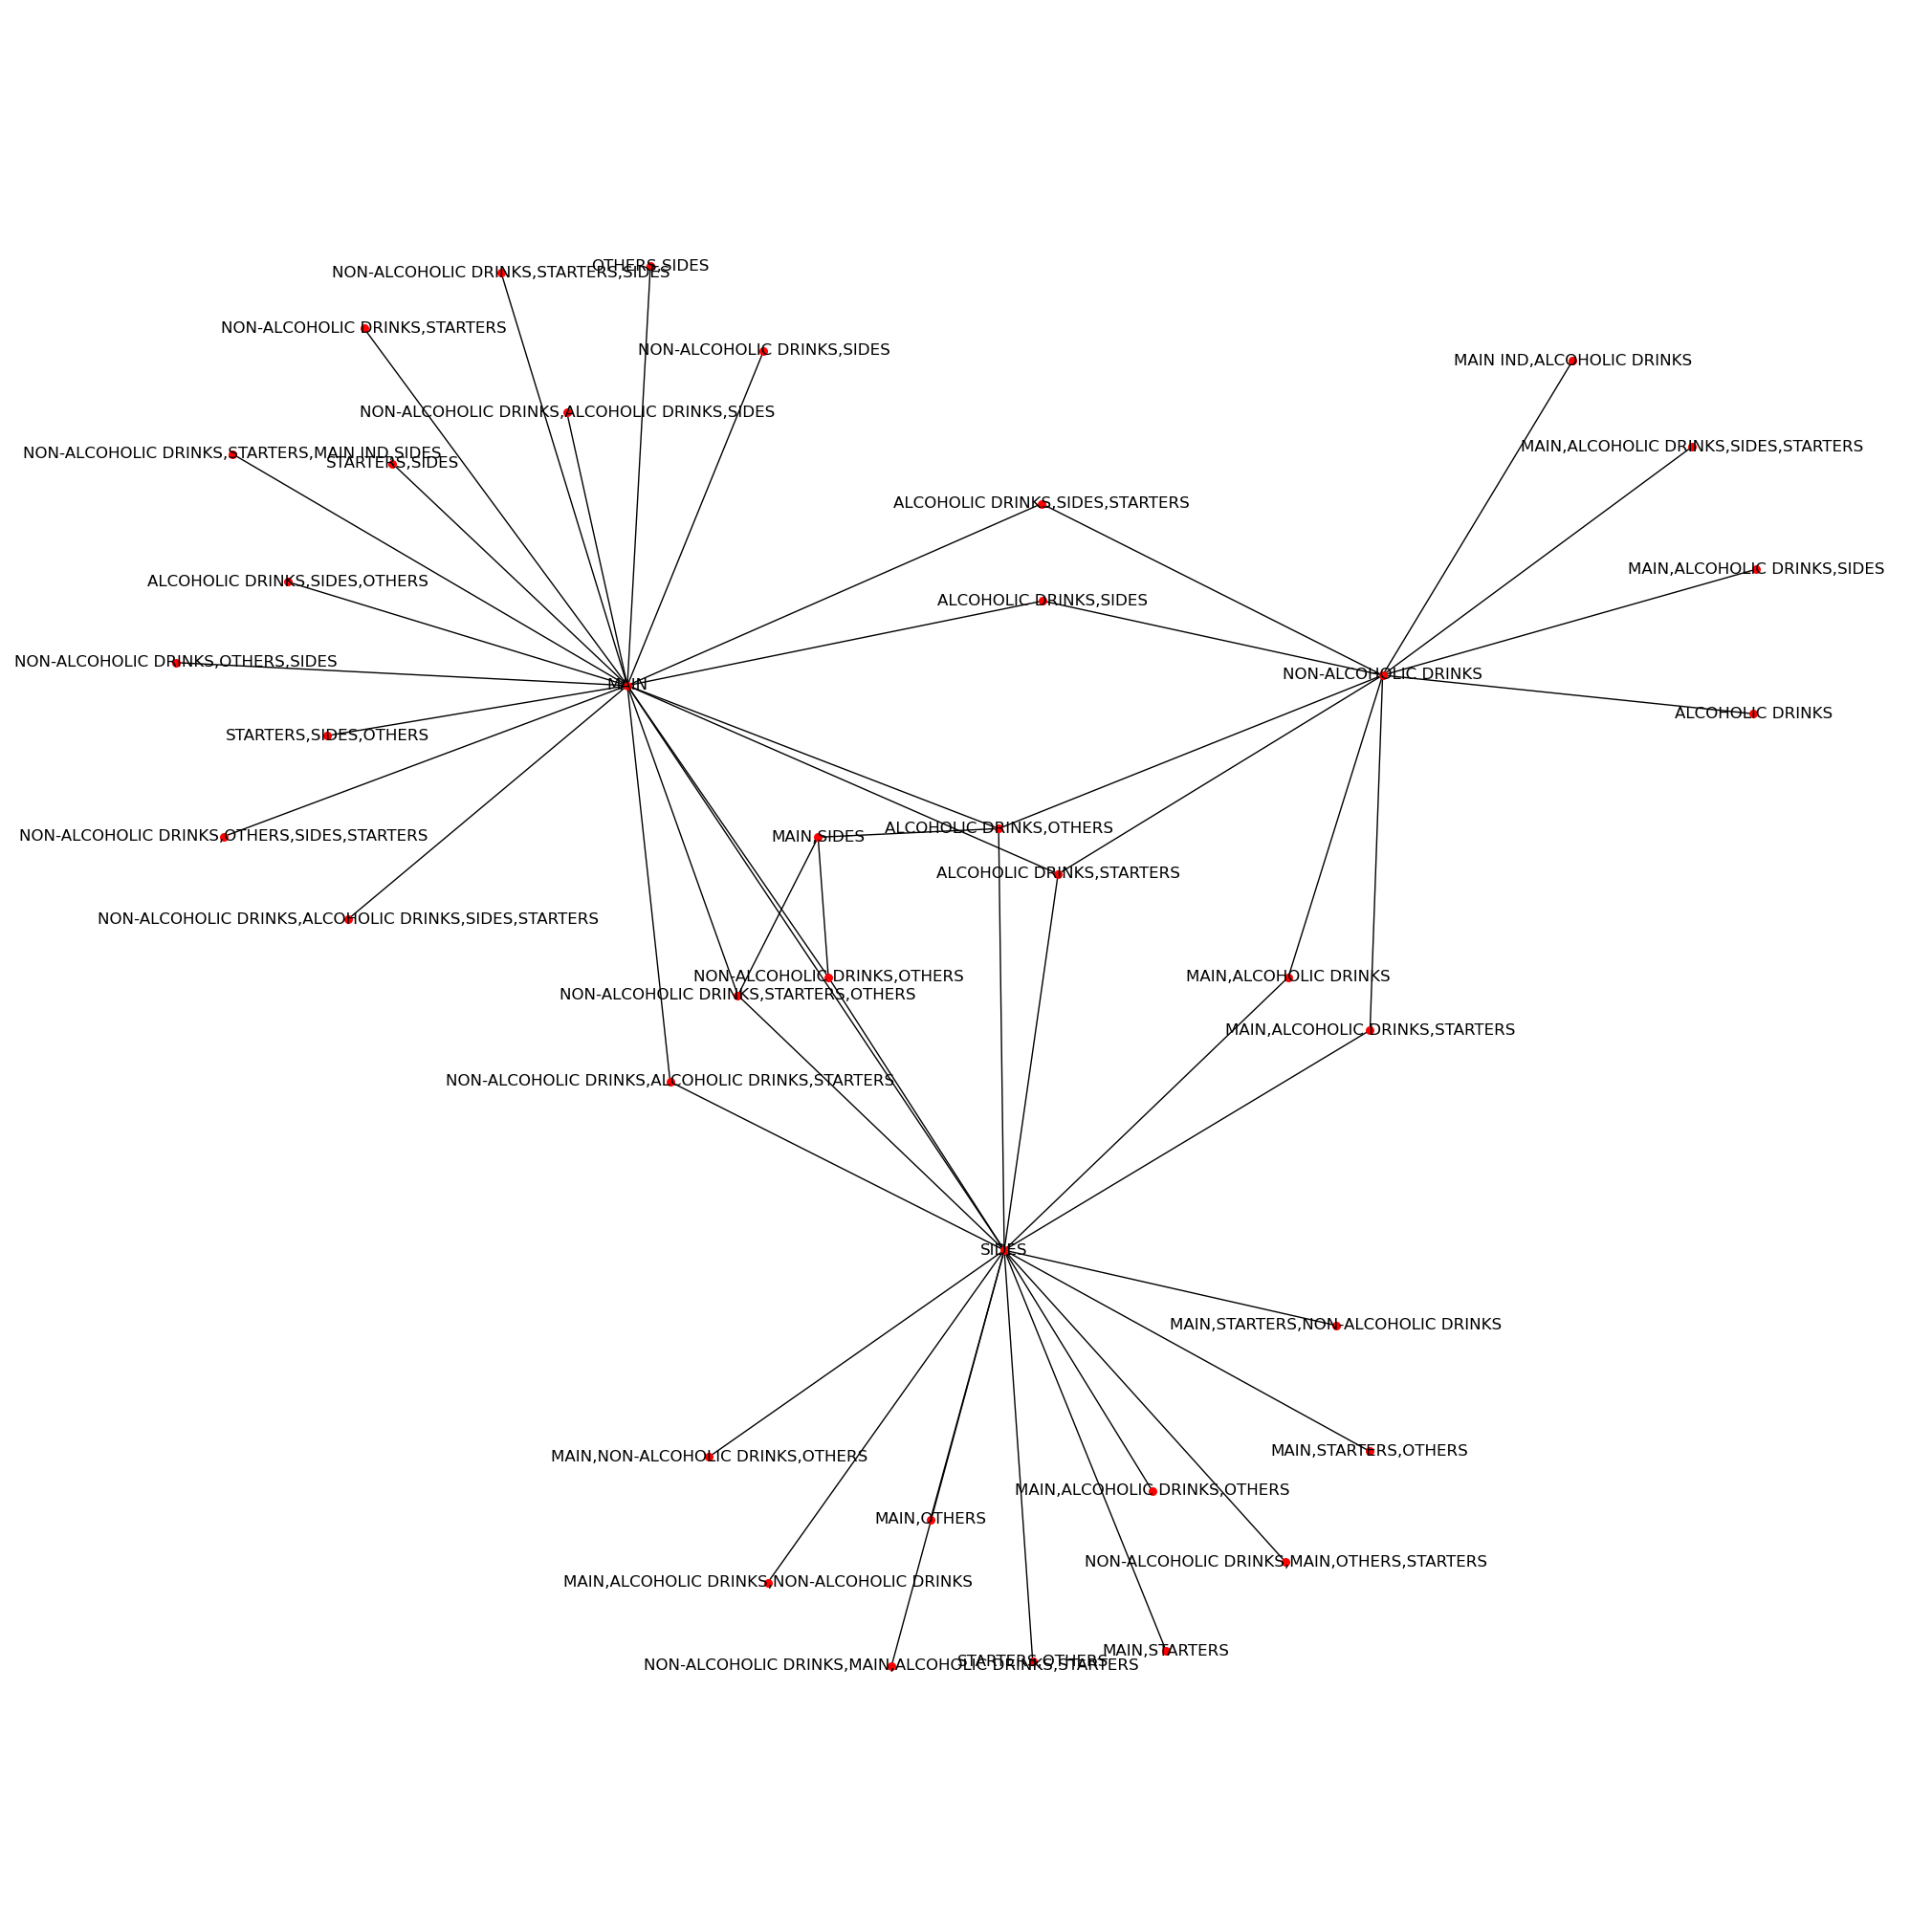

In [302]:
# Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.sort_values(by='confidence',ascending=False).copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()